# The development of our Neural Network

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import load_model
import tensorflow.keras.backend as K

# Task 1: Data Preparation

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.groupby('cycle').describe().transpose()

cycle                      C1          C2          C3          C4          C5  \
irrigation  count  320.000000  309.000000  305.000000  341.000000  301.000000   
            mean     3.739539    3.779189    3.756322    3.734041    3.796886   
            std      0.533088    0.529116    0.494606    0.525260    0.520828   
            min      2.499778    2.228141    2.260197    2.120930    1.954645   
            25%      3.376299    3.450690    3.384111    3.407281    3.474608   
            50%      3.715806    3.764410    3.780668    3.710858    3.801954   
            75%      4.093295    4.120112    4.118582    4.060738    4.136106   
            max      5.209243    5.083232    4.830862    5.080424    5.204062   
sun         count  320.000000  309.000000  305.000000  341.000000  301.000000   
            mean   269.085427  397.073553  542.152301  580.633171  364.010941   
            std    102.344188   87.789622   92.473220  168.221534  104.706577   
            min    124.452650  283.298460  423.519063  367.949774  239.383046   
            25%    127.501416  285.935512  426.322868  370.827799  242.705845   
            50%    341.745297  465.078309  614.697525  714.042358  452.858854   
            75%    342.863827  466.165407  615.720771  715.051558  454.107470   
            max    345.223688  468.385984  618.934808  718.033027  456.539776   
temperature count  320.000000  309.000000  305.000000  341.000000  301.000000   
            mean    20.703753   20.160725   20.289342   20.631018   20.451958   
            std      3.533409    3.498389    3.802839    3.465968    3.540859   
            min     13.380677   13.384729   13.256176   13.345723   13.317420   
            25%     18.122844   17.513169   17.497882   18.233277   17.977288   
            50%     20.657633   20.110514   20.003301   20.471825   20.207689   
            75%     23.059322   22.847221   23.303933   22.963163   22.698086   
            max     30.188868   30.236389   33.795864   30.833689   32.029027   
yield       count  320.000000  309.000000  305.000000  341.000000  301.000000   
            mean     8.481781    8.822783    8.981115    9.281672    8.665714   
            std      2.172549    1.871431    2.013111    2.022750    2.028925   
            min      2.660000    3.450000    4.760000    3.410000    3.700000   
            25%      7.057500    7.670000    7.550000    7.880000    7.330000   
            50%      8.425000    8.600000    8.720000    9.100000    8.510000   
            75%     10.012500   10.130000   10.500000   10.840000   10.290000   
            max     13.200000   13.470000   13.840000   13.870000   13.990000   

cycle                      C6  
irrigation  count  318.000000  
            mean     3.767491  
            std      0.561703  
            min      1.836051  
            25%      3.410670  
            50%      3.766063  
            75%      4.139491  
            max      5.419840  
sun         count  318.000000  
            mean   200.484843  
            std     88.284759  
            min     86.560300  
            25%     89.787509  
            50%    269.531269  
            75%    270.672851  
            max    272.936974  
temperature count  318.000000  
            mean    20.113182  
            std      3.582594  
            min     13.297945  
            25%     17.326189  
            50%     20.118146  
            75%     22.819512  
            max     30.867257  
yield       count  318.000000  
            mean     7.805503  
            std      2.138248  
            min      2.210000  
            25%      6.422500  
            50%      7.635000  
            75%      9.257500  
            max     12.650000

In [5]:
df.groupby('country').describe().transpose()

country            Netherlands        Spain
irrigation  count   729.000000  1165.000000
            mean      3.756803     3.764484
            std       0.534212     0.523972
            min       1.836051     1.954645
            25%       3.394915     3.420641
            50%       3.747738     3.750411
            75%       4.112985     4.117458
            max       5.168533     5.419840
sun         count   729.000000  1165.000000
            mean    259.433134   477.553773
            std     120.084507   154.016663
            min      86.560300   267.715750
            25%     127.058212   342.409488
            50%     283.781423   464.085592
            75%     370.564055   615.585646
            max     428.243977   718.033027
temperature count   729.000000  1165.000000
            mean     20.321487    20.442883
            std       3.543941     3.590880
            min      13.256176    13.332662
            25%      17.746431    17.696088
            50%      20.197504    20.272519
            75%      22.789220    22.994535
            max      31.619920    33.795864
yield       count   729.000000  1165.000000
            mean      7.698422     9.290197
            std       1.974103     1.929107
            min       2.210000     4.240000
            25%       6.330000     7.840000
            50%       7.670000     9.050000
            75%       9.060000    10.790000
            max      11.880000    13.990000

### Transformation of data to dummies

In [6]:
df_onehot = pd.get_dummies(df, columns=['cycle'])
df_onehot.head(5)

country  irrigation         sun  temperature  yield  cycle_C1  cycle_C2  \
0   Spain    2.657004  452.680020    20.450952   7.29         0         0   
1   Spain    4.361300  270.554441    22.211424   7.46         0         0   
2   Spain    3.930734  343.888517    20.479650  11.91         1         0   
3   Spain    3.912525  715.362181    15.710702   9.71         0         0   
4   Spain    2.636221  715.744196    14.974806   7.16         0         0   

   cycle_C3  cycle_C4  cycle_C5  cycle_C6  
0         0         0         1         0  
1         0         0         0         1  
2         0         0         0         0  
3         0         1         0         0  
4         0         1         0         0

In [7]:
df_onehot.loc[df_onehot.loc[:, 'country'] == "Spain", 'country'] = 0
df_onehot.loc[df_onehot.loc[:, 'country'] == "Netherlands", 'country'] = 1
df_onehot.loc[:,'country'] = pd.to_numeric(df_onehot.loc[:,'country'], downcast='unsigned')

In [8]:
df_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 11 columns):
country        1894 non-null uint8
irrigation     1894 non-null float64
sun            1894 non-null float64
temperature    1894 non-null float64
yield          1894 non-null float64
cycle_C1       1894 non-null uint8
cycle_C2       1894 non-null uint8
cycle_C3       1894 non-null uint8
cycle_C4       1894 non-null uint8
cycle_C5       1894 non-null uint8
cycle_C6       1894 non-null uint8
dtypes: float64(4), uint8(7)
memory usage: 72.2 KB


# Task 2: Neural Network
## 1. Separating ``x`` (features) from ``y`` (targets)

In [9]:
# Separate feature columns from target columns
target_columns = ['yield']
# Dropping target columns from the set of columns gives the feature columns
feature_columns = df_onehot.columns.drop(target_columns)

# For convinience later, store number of features
n_features = len(feature_columns)

x = df_onehot.loc[:, feature_columns]
y = df_onehot.loc[:, target_columns]

## 2. Train-test split
After splitting 10% of the whole dataset to create test set, we split 10% of the rest to create validation set. The remaining belongs to training set.

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=0)

## 3. Neural Network
### 1st try

In [16]:
#create model instance
model = Sequential()

#input layer
model.add(Dense(units=32, input_dim=n_features, activation='relu')) 

#hidden layers
model.add(Dense(units=16, input_dim=n_features, activation='relu', 
                      use_bias=True, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(rate=0.2))
model.add(Dense(units=16, input_dim=n_features, activation='relu', 
                      use_bias=True, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(rate=0.2))
#...

#output layer
model.add(Dense(units=1, activation='relu'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
____________________________________________________

In [18]:
# Compile the model using adam as optimizer and custom_loss as the loss. Use MAPE and MSE as metrics
model.compile(optimizer='adam', loss='mse', metrics=['mape'])

### 3.3. Train the model
#### a) Fitting the model to the training data

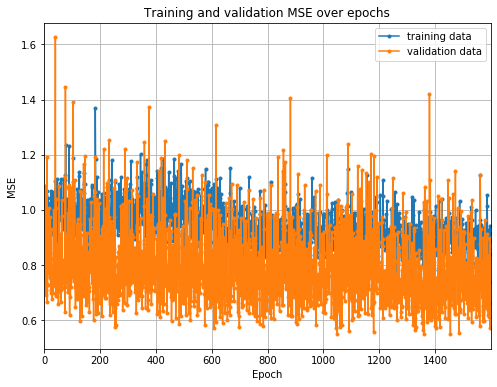

In [52]:
fig, ax = plt.subplots(figsize=(8,6))
result.plot(y=['loss', 'val_loss'], marker='.', ax=ax)
ax.set_xlabel('Epoch')
ax.set_ylabel('MSE')
ax.set_title('Training and validation MSE over epochs')
ax.legend(['training data', 'validation data'])
ax.grid()
fig.savefig('Training and validation MSE over epochs')

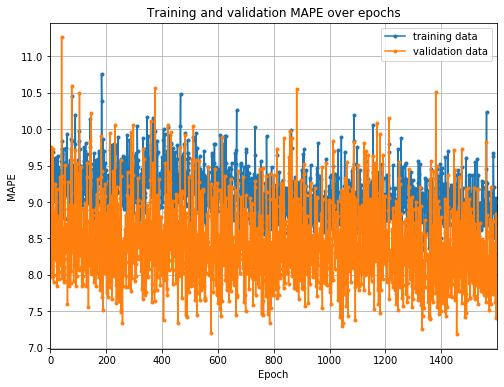

In [53]:
fig, ax = plt.subplots(figsize=(8,6))
result.plot(y=['mape', 'val_mape'], marker='.', ax=ax)
ax.set_xlabel('Epoch')
ax.set_ylabel('MAPE')
ax.set_title('Training and validation MAPE over epochs')
ax.legend(['training data', 'validation data'])
ax.grid()
fig.savefig('Training and validation MAPE over epochs')

In [55]:
train_loss = model.evaluate(x_train, y_train, verbose=0)[0]
train_mape = model.evaluate(x_train, y_train, verbose=0)[1]
#train_mse = model.evaluate(x_train, y_train, verbose=0)[2]
print('training loss (MSE):', train_loss, '\ntraining MAPE:', train_mape, '%\n')
#print('training MSE (custom):', train_mse, '\n')

val_loss = model.evaluate(x_val, y_val, verbose=0)[0]
val_mape = model.evaluate(x_val, y_val, verbose=0)[1]
#val_mse = model.evaluate(x_val, y_val, verbose=0)[2]
print('validation loss (MSE):', val_loss, '\nvalidation MAPE:', val_mape, '%\n')
#print('validation MSE (custom):', val_mse, '\n')

test_loss = model.evaluate(x_test, y_test, verbose=0)[0]
test_mape = model.evaluate(x_test, y_test, verbose=0)[1]
#test_mse = model.evaluate(x_test, y_test, verbose=0)[2]
print('test loss (MSE):', test_loss, '\ntest MAPE:', test_mape, '%')
#print('test MSE (custom):', test_mse, '\n')

training loss (MSE): 0.6703242586083609 
training MAPE: 7.652936 %

validation loss (MSE): 0.738160070620085 
validation MAPE: 8.286112 %

test loss (MSE): 0.783217882482629 
test MAPE: 8.046447 %


### 2nd try

In [70]:
#create model instance
model = Sequential()

#input layer
model.add(Dense(units=32, input_dim=n_features, activation='relu')) 

#hidden layers
model.add(Dense(units=24, input_dim=n_features, activation='relu', 
                      use_bias=True, kernel_regularizer=l2(0.0), bias_regularizer=l2(0.0)))
#model.add(Dropout(rate=0.2))
model.add(Dense(units=16, input_dim=n_features, activation='relu', 
                      use_bias=True, kernel_regularizer=l2(0.0), bias_regularizer=l2(0.0)))
#model.add(Dropout(rate=0.2))
#...

#output layer
model.add(Dense(units=1, activation='relu'))

In [71]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_21 (Dense)             (None, 24)                792       
_________________________________________________________________
dense_22 (Dense)             (None, 16)                400       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 17        
Total params: 1,561
Trainable params: 1,561
Non-trainable params: 0
_________________________________________________________________


In [72]:
# Compile the model using adam as optimizer and custom_loss as the loss. Use MAPE and MSE as metrics
model.compile(optimizer='adam', loss='mse', metrics=['mape'])

In [74]:
# Train the model. use batch_size=32 and train it for 3000 epochs. use x_val and y_val as validation_data
history = model.fit(x_train, y_train, batch_size=64, epochs=3000, validation_data=(x_val, y_val))

Train on 1533 samples, validate on 171 samples
Epoch 1/3000
1533/1533 [==============================] - 0s 31us/sample - loss: 2.4826 - mape: 16.0024 - val_loss: 2.2463 - val_mape: 16.0783
Epoch 2/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.6607 - mape: 16.5375 - val_loss: 2.0741 - val_mape: 14.9471
Epoch 3/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.5762 - mape: 16.3899 - val_loss: 2.0902 - val_mape: 15.0435
Epoch 4/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.4638 - mape: 16.0102 - val_loss: 2.7123 - val_mape: 15.5899
Epoch 5/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.4299 - mape: 15.8698 - val_loss: 2.7847 - val_mape: 15.4213
Epoch 6/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.5672 - mape: 16.2646 - val_loss: 2.0108 - val_mape: 14.4284
Epoch 7/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.4304 - mape:

1533/1533 [==============================] - 0s 24us/sample - loss: 2.1230 - mape: 14.6180 - val_loss: 1.8190 - val_mape: 14.2682
Epoch 58/3000
1533/1533 [==============================] - 0s 24us/sample - loss: 2.2068 - mape: 14.9987 - val_loss: 3.3083 - val_mape: 17.2178
Epoch 59/3000
1533/1533 [==============================] - 0s 24us/sample - loss: 2.2945 - mape: 15.0287 - val_loss: 2.0485 - val_mape: 15.3267
Epoch 60/3000
1533/1533 [==============================] - 0s 25us/sample - loss: 2.2326 - mape: 15.0081 - val_loss: 2.0064 - val_mape: 13.4903
Epoch 61/3000
1533/1533 [==============================] - 0s 24us/sample - loss: 2.2905 - mape: 14.9940 - val_loss: 1.8526 - val_mape: 13.2374
Epoch 62/3000
1533/1533 [==============================] - 0s 24us/sample - loss: 2.1497 - mape: 14.6590 - val_loss: 1.8122 - val_mape: 13.3083
Epoch 63/3000
1533/1533 [==============================] - 0s 24us/sample - loss: 2.1114 - mape: 14.5974 - val_loss: 1.8358 - val_mape: 13.2890
Epoch 

Epoch 114/3000
1533/1533 [==============================] - 0s 23us/sample - loss: 1.9128 - mape: 13.7935 - val_loss: 1.6398 - val_mape: 13.4876
Epoch 115/3000
1533/1533 [==============================] - 0s 22us/sample - loss: 1.8230 - mape: 13.4710 - val_loss: 1.5775 - val_mape: 13.0251
Epoch 116/3000
1533/1533 [==============================] - 0s 24us/sample - loss: 1.7298 - mape: 12.9513 - val_loss: 1.5955 - val_mape: 13.0500
Epoch 117/3000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.8253 - mape: 13.4081 - val_loss: 1.6754 - val_mape: 12.8061
Epoch 118/3000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.9725 - mape: 13.9729 - val_loss: 1.8551 - val_mape: 12.9669
Epoch 119/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.9417 - mape: 13.6819 - val_loss: 1.5782 - val_mape: 12.4598
Epoch 120/3000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.7432 - mape: 13.0917 - val_loss: 1.5126 - val

1533/1533 [==============================] - 0s 21us/sample - loss: 1.5322 - mape: 11.9880 - val_loss: 1.5818 - val_mape: 12.2156
Epoch 171/3000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.5987 - mape: 12.4190 - val_loss: 1.5307 - val_mape: 12.6998
Epoch 172/3000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.5597 - mape: 12.2076 - val_loss: 1.6357 - val_mape: 12.3298
Epoch 173/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.6254 - mape: 12.2106 - val_loss: 2.0040 - val_mape: 14.8410
Epoch 174/3000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.7197 - mape: 12.7614 - val_loss: 1.7700 - val_mape: 14.0259
Epoch 175/3000
1533/1533 [==============================] - 0s 24us/sample - loss: 1.6881 - mape: 12.8549 - val_loss: 1.7270 - val_mape: 12.2164
Epoch 176/3000
1533/1533 [==============================] - 0s 23us/sample - loss: 1.7274 - mape: 12.5715 - val_loss: 1.4121 - val_mape: 12.1332


1533/1533 [==============================] - 0s 25us/sample - loss: 1.7953 - mape: 13.0168 - val_loss: 1.7297 - val_mape: 13.3551
Epoch 227/3000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.5410 - mape: 11.8165 - val_loss: 1.3899 - val_mape: 12.2870
Epoch 228/3000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.4287 - mape: 11.4119 - val_loss: 1.3412 - val_mape: 11.2546
Epoch 229/3000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.3778 - mape: 11.2814 - val_loss: 1.2782 - val_mape: 11.6265
Epoch 230/3000
1533/1533 [==============================] - 0s 24us/sample - loss: 1.4839 - mape: 11.6710 - val_loss: 1.3366 - val_mape: 11.4322
Epoch 231/3000
1533/1533 [==============================] - 0s 23us/sample - loss: 1.4366 - mape: 11.4165 - val_loss: 1.3725 - val_mape: 11.3100
Epoch 232/3000
1533/1533 [==============================] - ETA: 0s - loss: 1.1921 - mape: 9.51 - 0s 23us/sample - loss: 1.4996 - mape: 11.6954 -

Epoch 282/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.2653 - mape: 10.8012 - val_loss: 1.3884 - val_mape: 11.0446
Epoch 283/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3561 - mape: 11.0701 - val_loss: 1.2586 - val_mape: 10.7090
Epoch 284/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.5132 - mape: 11.7199 - val_loss: 1.3196 - val_mape: 10.8899
Epoch 285/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3044 - mape: 10.8557 - val_loss: 1.4375 - val_mape: 12.5253
Epoch 286/3000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.5761 - mape: 12.0922 - val_loss: 1.3078 - val_mape: 11.6918
Epoch 287/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.4915 - mape: 11.6767 - val_loss: 1.2797 - val_mape: 11.3971
Epoch 288/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3915 - mape: 11.2397 - val_loss: 1.3735 - val

1533/1533 [==============================] - 0s 29us/sample - loss: 1.3761 - mape: 11.1363 - val_loss: 1.2329 - val_mape: 11.4980
Epoch 339/3000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.7069 - mape: 12.4531 - val_loss: 1.6309 - val_mape: 11.9474
Epoch 340/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.4956 - mape: 11.5885 - val_loss: 2.2073 - val_mape: 13.4437
Epoch 341/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.6516 - mape: 12.2928 - val_loss: 1.2624 - val_mape: 11.4365
Epoch 342/3000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2510 - mape: 10.5693 - val_loss: 1.1490 - val_mape: 10.5585
Epoch 343/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1899 - mape: 10.2376 - val_loss: 1.1986 - val_mape: 11.0902
Epoch 344/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2120 - mape: 10.5225 - val_loss: 1.2885 - val_mape: 10.7294


1533/1533 [==============================] - 0s 27us/sample - loss: 1.2965 - mape: 10.6537 - val_loss: 1.5817 - val_mape: 12.3466
Epoch 395/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.3200 - mape: 10.9094 - val_loss: 1.1337 - val_mape: 10.0463
Epoch 396/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.0690 - mape: 9.8116 - val_loss: 1.0690 - val_mape: 10.5568
Epoch 397/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1475 - mape: 10.2299 - val_loss: 1.0568 - val_mape: 10.2053
Epoch 398/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.0819 - mape: 9.8551 - val_loss: 1.0379 - val_mape: 10.2598
Epoch 399/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1103 - mape: 9.9974 - val_loss: 1.1316 - val_mape: 10.3103
Epoch 400/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.1961 - mape: 10.3566 - val_loss: 1.5181 - val_mape: 11.4129
Epo

Epoch 451/3000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0950 - mape: 10.0556 - val_loss: 1.2804 - val_mape: 11.0798
Epoch 452/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1687 - mape: 10.3015 - val_loss: 0.9205 - val_mape: 9.2978
Epoch 453/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0280 - mape: 9.6201 - val_loss: 1.1072 - val_mape: 10.4158
Epoch 454/3000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.0811 - mape: 9.9577 - val_loss: 0.9405 - val_mape: 9.4167
Epoch 455/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.3071 - mape: 10.8329 - val_loss: 1.4176 - val_mape: 11.8671
Epoch 456/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.2561 - mape: 10.8359 - val_loss: 1.6776 - val_mape: 12.0105
Epoch 457/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1414 - mape: 10.2109 - val_loss: 1.3050 - val_map

Epoch 508/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0200 - mape: 9.5576 - val_loss: 1.1533 - val_mape: 10.1024
Epoch 509/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.1868 - mape: 10.3742 - val_loss: 1.3293 - val_mape: 10.7483
Epoch 510/3000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.0073 - mape: 9.5109 - val_loss: 0.9207 - val_mape: 9.7557
Epoch 511/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0152 - mape: 9.6588 - val_loss: 1.0895 - val_mape: 10.0035
Epoch 512/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.9875 - mape: 9.5349 - val_loss: 0.9435 - val_mape: 9.6539
Epoch 513/3000
1533/1533 [==============================] - 0s 26us/sample - loss: 0.9167 - mape: 9.0602 - val_loss: 1.0398 - val_mape: 10.2048
Epoch 514/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1671 - mape: 10.3247 - val_loss: 1.4187 - val_mape: 

1533/1533 [==============================] - 0s 27us/sample - loss: 1.0174 - mape: 9.7401 - val_loss: 0.9914 - val_mape: 10.1547
Epoch 565/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.9226 - mape: 9.2349 - val_loss: 0.9080 - val_mape: 9.3605
Epoch 566/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.8303 - mape: 8.7168 - val_loss: 0.8306 - val_mape: 8.9696
Epoch 567/3000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8674 - mape: 8.8995 - val_loss: 0.7673 - val_mape: 8.2972
Epoch 568/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.8401 - mape: 8.8056 - val_loss: 0.7439 - val_mape: 8.2661
Epoch 569/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.8505 - mape: 8.7886 - val_loss: 0.7597 - val_mape: 8.3829
Epoch 570/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.9261 - mape: 9.2377 - val_loss: 1.0240 - val_mape: 9.4801
Epoch 571/300

Epoch 621/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.8511 - mape: 8.8751 - val_loss: 0.7450 - val_mape: 8.3541
Epoch 622/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.9607 - mape: 9.3525 - val_loss: 1.5323 - val_mape: 12.5161
Epoch 623/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.5702 - mape: 11.7860 - val_loss: 1.0038 - val_mape: 10.2570
Epoch 624/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.5648 - mape: 11.8392 - val_loss: 1.3538 - val_mape: 11.2789
Epoch 625/3000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.0654 - mape: 9.7214 - val_loss: 0.9166 - val_mape: 9.7746
Epoch 626/3000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0534 - mape: 9.8485 - val_loss: 0.7632 - val_mape: 8.4668
Epoch 627/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.9014 - mape: 9.1171 - val_loss: 1.0165 - val_mape: 9

Epoch 678/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.9912 - mape: 9.5612 - val_loss: 0.8650 - val_mape: 9.0135
Epoch 679/3000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.9167 - mape: 9.2783 - val_loss: 0.8053 - val_mape: 8.7035
Epoch 680/3000
1533/1533 [==============================] - 0s 25us/sample - loss: 0.8109 - mape: 8.7040 - val_loss: 0.7631 - val_mape: 8.4064
Epoch 681/3000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.8132 - mape: 8.6445 - val_loss: 0.7282 - val_mape: 8.4152
Epoch 682/3000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7809 - mape: 8.5215 - val_loss: 0.7340 - val_mape: 8.2751
Epoch 683/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.8250 - mape: 8.7229 - val_loss: 0.8923 - val_mape: 9.6349
Epoch 684/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.7821 - mape: 8.4967 - val_loss: 0.8141 - val_mape: 8.6297

1533/1533 [==============================] - 0s 28us/sample - loss: 0.8401 - mape: 8.9251 - val_loss: 0.7534 - val_mape: 8.6221
Epoch 736/3000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.9762 - mape: 9.4773 - val_loss: 0.8820 - val_mape: 9.4892
Epoch 737/3000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.8809 - mape: 8.9734 - val_loss: 0.8213 - val_mape: 8.8640
Epoch 738/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.8532 - mape: 8.9363 - val_loss: 1.3314 - val_mape: 11.8975
Epoch 739/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.9416 - mape: 9.3945 - val_loss: 0.8292 - val_mape: 9.3260
Epoch 740/3000
1533/1533 [==============================] - ETA: 0s - loss: 0.5498 - mape: 6.60 - 0s 27us/sample - loss: 0.8449 - mape: 8.8855 - val_loss: 0.7364 - val_mape: 8.3338
Epoch 741/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7586 - mape: 8.4175 - val_loss: 0

1533/1533 [==============================] - 0s 29us/sample - loss: 0.8395 - mape: 8.8465 - val_loss: 0.7611 - val_mape: 8.5597
Epoch 792/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.7637 - mape: 8.4741 - val_loss: 0.7767 - val_mape: 8.5035
Epoch 793/3000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.8641 - mape: 8.9130 - val_loss: 0.9937 - val_mape: 10.0118
Epoch 794/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.9965 - mape: 9.5011 - val_loss: 0.8803 - val_mape: 9.3675
Epoch 795/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.9052 - mape: 9.1072 - val_loss: 0.7188 - val_mape: 8.1947
Epoch 796/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.9075 - mape: 9.0573 - val_loss: 0.9169 - val_mape: 9.6083
Epoch 797/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.8590 - mape: 8.9295 - val_loss: 0.7898 - val_mape: 9.0519
Epoch 798/300

1533/1533 [==============================] - 0s 36us/sample - loss: 0.8051 - mape: 8.6868 - val_loss: 0.7178 - val_mape: 8.1465
Epoch 849/3000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.8476 - mape: 8.8902 - val_loss: 0.7157 - val_mape: 8.2211
Epoch 850/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.9403 - mape: 9.4156 - val_loss: 0.7871 - val_mape: 8.6680
Epoch 851/3000
1533/1533 [==============================] - ETA: 0s - loss: 0.5363 - mape: 7.11 - 0s 30us/sample - loss: 1.0529 - mape: 9.9948 - val_loss: 0.9326 - val_mape: 9.8542
Epoch 852/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.7537 - mape: 8.3772 - val_loss: 0.7702 - val_mape: 8.4839
Epoch 853/3000
1533/1533 [==============================] - 0s 25us/sample - loss: 0.7753 - mape: 8.5117 - val_loss: 0.7134 - val_mape: 8.3847
Epoch 854/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7872 - mape: 8.6312 - val_loss: 0.

1533/1533 [==============================] - 0s 28us/sample - loss: 0.7662 - mape: 8.5287 - val_loss: 1.0631 - val_mape: 10.4288
Epoch 906/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.8636 - mape: 9.0365 - val_loss: 0.7390 - val_mape: 8.8776
Epoch 907/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.7366 - mape: 8.3832 - val_loss: 0.6713 - val_mape: 8.0257
Epoch 908/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.7800 - mape: 8.5321 - val_loss: 0.7178 - val_mape: 8.5433
Epoch 909/3000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7372 - mape: 8.2980 - val_loss: 0.6980 - val_mape: 8.3152
Epoch 910/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.7616 - mape: 8.4274 - val_loss: 0.8274 - val_mape: 9.4250
Epoch 911/3000
1533/1533 [==============================] - 0s 26us/sample - loss: 0.8211 - mape: 8.7849 - val_loss: 0.7338 - val_mape: 8.5878
Epoch 912/300

1533/1533 [==============================] - 0s 30us/sample - loss: 0.6981 - mape: 8.0818 - val_loss: 0.6982 - val_mape: 8.1924
Epoch 963/3000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7519 - mape: 8.5334 - val_loss: 0.7317 - val_mape: 8.1881
Epoch 964/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.7349 - mape: 8.3515 - val_loss: 1.0589 - val_mape: 10.2930
Epoch 965/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.9057 - mape: 9.2618 - val_loss: 0.7407 - val_mape: 8.4653
Epoch 966/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.7109 - mape: 8.1880 - val_loss: 0.8174 - val_mape: 8.8068
Epoch 967/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.7863 - mape: 8.6744 - val_loss: 0.7554 - val_mape: 8.5620
Epoch 968/3000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7466 - mape: 8.3669 - val_loss: 0.6634 - val_mape: 8.0269
Epoch 969/300

Epoch 1019/3000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6758 - mape: 8.0133 - val_loss: 0.7335 - val_mape: 8.3064
Epoch 1020/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.9645 - mape: 9.4582 - val_loss: 0.8990 - val_mape: 9.0430
Epoch 1021/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.9605 - mape: 9.3654 - val_loss: 1.0069 - val_mape: 9.9804
Epoch 1022/3000
1533/1533 [==============================] - ETA: 0s - loss: 0.9032 - mape: 9.04 - 0s 27us/sample - loss: 0.8412 - mape: 8.7893 - val_loss: 0.7406 - val_mape: 8.8417
Epoch 1023/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.8735 - mape: 8.8882 - val_loss: 0.7865 - val_mape: 9.2354
Epoch 1024/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.8216 - mape: 8.7222 - val_loss: 1.1152 - val_mape: 10.6551
Epoch 1025/3000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0296 - mape

1533/1533 [==============================] - 0s 28us/sample - loss: 0.7439 - mape: 8.2956 - val_loss: 1.4039 - val_mape: 11.9862
Epoch 1076/3000
1533/1533 [==============================] - 0s 26us/sample - loss: 0.8036 - mape: 8.5245 - val_loss: 0.6724 - val_mape: 8.1518
Epoch 1077/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7926 - mape: 8.5745 - val_loss: 0.7710 - val_mape: 8.5704
Epoch 1078/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.7741 - mape: 8.6640 - val_loss: 0.6713 - val_mape: 8.1469
Epoch 1079/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6386 - mape: 7.7187 - val_loss: 0.6912 - val_mape: 8.1288
Epoch 1080/3000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6573 - mape: 7.8653 - val_loss: 0.9884 - val_mape: 9.7773
Epoch 1081/3000
1533/1533 [==============================] - 0s 25us/sample - loss: 0.7496 - mape: 8.3948 - val_loss: 0.6895 - val_mape: 8.2873
Epoch 1

Epoch 1132/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.6795 - mape: 8.0263 - val_loss: 0.7702 - val_mape: 8.5731
Epoch 1133/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6803 - mape: 7.9239 - val_loss: 0.6768 - val_mape: 8.2937
Epoch 1134/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.7009 - mape: 8.0965 - val_loss: 0.7895 - val_mape: 9.0885
Epoch 1135/3000
1533/1533 [==============================] - 0s 26us/sample - loss: 0.7317 - mape: 8.1969 - val_loss: 0.7797 - val_mape: 8.6350
Epoch 1136/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.7648 - mape: 8.5185 - val_loss: 0.6708 - val_mape: 8.0626
Epoch 1137/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.6277 - mape: 7.6898 - val_loss: 0.6966 - val_mape: 8.3584
Epoch 1138/3000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6288 - mape: 7.7020 - val_loss: 0.8845 - val_mape:

1533/1533 [==============================] - 0s 28us/sample - loss: 0.6072 - mape: 7.5986 - val_loss: 0.6802 - val_mape: 7.8804
Epoch 1189/3000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6037 - mape: 7.5273 - val_loss: 0.7436 - val_mape: 8.3330
Epoch 1190/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.6827 - mape: 8.0072 - val_loss: 0.6657 - val_mape: 7.9755
Epoch 1191/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.6562 - mape: 7.7933 - val_loss: 0.7036 - val_mape: 8.7171
Epoch 1192/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.6825 - mape: 8.0227 - val_loss: 0.6527 - val_mape: 8.3010
Epoch 1193/3000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6420 - mape: 7.8467 - val_loss: 0.7150 - val_mape: 8.7162
Epoch 1194/3000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7513 - mape: 8.2908 - val_loss: 0.7564 - val_mape: 8.7209
Epoch 11

Epoch 1245/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7512 - mape: 8.2001 - val_loss: 0.9039 - val_mape: 9.7764
Epoch 1246/3000
1533/1533 [==============================] - 0s 26us/sample - loss: 0.6330 - mape: 7.8575 - val_loss: 0.6846 - val_mape: 8.4238
Epoch 1247/3000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6383 - mape: 7.6743 - val_loss: 0.6655 - val_mape: 8.3914
Epoch 1248/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.5752 - mape: 7.4357 - val_loss: 0.6860 - val_mape: 8.2396
Epoch 1249/3000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.5614 - mape: 7.3219 - val_loss: 0.6169 - val_mape: 7.7402
Epoch 1250/3000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.5439 - mape: 7.2052 - val_loss: 0.6410 - val_mape: 7.9674
Epoch 1251/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.6046 - mape: 7.5679 - val_loss: 0.6616 - val_mape:

1533/1533 [==============================] - 0s 27us/sample - loss: 0.6707 - mape: 7.9808 - val_loss: 0.6401 - val_mape: 7.8815
Epoch 1302/3000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6230 - mape: 7.7682 - val_loss: 0.6636 - val_mape: 7.9796
Epoch 1303/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.5709 - mape: 7.3757 - val_loss: 0.6179 - val_mape: 7.7182
Epoch 1304/3000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.5433 - mape: 7.2559 - val_loss: 0.6536 - val_mape: 7.8936
Epoch 1305/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.6195 - mape: 7.5279 - val_loss: 0.7166 - val_mape: 8.2308
Epoch 1306/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6970 - mape: 8.0889 - val_loss: 0.5843 - val_mape: 7.6245
Epoch 1307/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.5560 - mape: 7.2948 - val_loss: 0.7390 - val_mape: 8.4651
Epoch 13

1533/1533 [==============================] - 0s 27us/sample - loss: 0.5994 - mape: 7.4976 - val_loss: 0.6419 - val_mape: 7.8266
Epoch 1358/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.6194 - mape: 7.6434 - val_loss: 0.9557 - val_mape: 9.3822
Epoch 1359/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6478 - mape: 7.7099 - val_loss: 0.5574 - val_mape: 7.4172
Epoch 1360/3000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.5849 - mape: 7.4151 - val_loss: 0.5971 - val_mape: 7.7072
Epoch 1361/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.5671 - mape: 7.2801 - val_loss: 0.6696 - val_mape: 8.3703
Epoch 1362/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.6201 - mape: 7.6737 - val_loss: 0.6360 - val_mape: 8.3141
Epoch 1363/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5849 - mape: 7.4183 - val_loss: 0.6646 - val_mape: 8.1877
Epoch 13

1533/1533 [==============================] - 0s 29us/sample - loss: 0.5182 - mape: 7.0340 - val_loss: 0.6547 - val_mape: 8.0887
Epoch 1415/3000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.5357 - mape: 7.1614 - val_loss: 0.5733 - val_mape: 7.5622
Epoch 1416/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.4934 - mape: 6.8718 - val_loss: 0.5348 - val_mape: 7.3237
Epoch 1417/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5553 - mape: 7.2510 - val_loss: 0.7384 - val_mape: 8.6416
Epoch 1418/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.5418 - mape: 7.2447 - val_loss: 0.5971 - val_mape: 7.8579
Epoch 1419/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5772 - mape: 7.3204 - val_loss: 0.5729 - val_mape: 7.7161
Epoch 1420/3000
1533/1533 [==============================] - 0s 25us/sample - loss: 0.5288 - mape: 7.1207 - val_loss: 0.7723 - val_mape: 8.6053
Epoch 14

Epoch 1471/3000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.5540 - mape: 7.1615 - val_loss: 0.5384 - val_mape: 7.3675
Epoch 1472/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6250 - mape: 7.6526 - val_loss: 0.7307 - val_mape: 8.5891
Epoch 1473/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5355 - mape: 7.1414 - val_loss: 0.7779 - val_mape: 8.6986
Epoch 1474/3000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5341 - mape: 7.0605 - val_loss: 0.8318 - val_mape: 9.1711
Epoch 1475/3000
1533/1533 [==============================] - 0s 26us/sample - loss: 0.6526 - mape: 7.7014 - val_loss: 0.6057 - val_mape: 7.7182
Epoch 1476/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.6978 - mape: 7.9686 - val_loss: 0.7248 - val_mape: 8.5871
Epoch 1477/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.5884 - mape: 7.4129 - val_loss: 0.5214 - val_mape:

1533/1533 [==============================] - 0s 28us/sample - loss: 0.6098 - mape: 7.6246 - val_loss: 0.5479 - val_mape: 7.4552
Epoch 1528/3000
1533/1533 [==============================] - ETA: 0s - loss: 0.5880 - mape: 7.66 - 0s 31us/sample - loss: 0.7158 - mape: 8.1336 - val_loss: 0.8820 - val_mape: 9.6107
Epoch 1529/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.8054 - mape: 8.3930 - val_loss: 0.6459 - val_mape: 8.3744
Epoch 1530/3000
1533/1533 [==============================] - 0s 25us/sample - loss: 0.9356 - mape: 9.2704 - val_loss: 0.5382 - val_mape: 7.5256
Epoch 1531/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.6483 - mape: 7.7538 - val_loss: 0.6690 - val_mape: 8.1470
Epoch 1532/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.5135 - mape: 6.9502 - val_loss: 0.5323 - val_mape: 7.4478
Epoch 1533/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5130 - mape: 6.9986 - val_lo

1533/1533 [==============================] - 0s 29us/sample - loss: 0.4649 - mape: 6.6803 - val_loss: 0.5666 - val_mape: 7.6008
Epoch 1584/3000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5189 - mape: 6.8965 - val_loss: 0.5579 - val_mape: 7.6854
Epoch 1585/3000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.5069 - mape: 6.9367 - val_loss: 0.5532 - val_mape: 7.4000
Epoch 1586/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.4915 - mape: 6.8808 - val_loss: 0.5130 - val_mape: 7.4007
Epoch 1587/3000
1533/1533 [==============================] - 0s 25us/sample - loss: 0.5150 - mape: 6.9890 - val_loss: 0.5350 - val_mape: 7.2752
Epoch 1588/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.4535 - mape: 6.6308 - val_loss: 0.5913 - val_mape: 7.5280
Epoch 1589/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.5147 - mape: 7.0135 - val_loss: 0.5092 - val_mape: 7.1744
Epoch 15

Epoch 1640/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.5206 - mape: 7.0029 - val_loss: 0.7126 - val_mape: 8.3460
Epoch 1641/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.6523 - mape: 7.7580 - val_loss: 0.9277 - val_mape: 9.5842
Epoch 1642/3000
1533/1533 [==============================] - 0s 25us/sample - loss: 0.5939 - mape: 7.4251 - val_loss: 0.5628 - val_mape: 7.8235
Epoch 1643/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6148 - mape: 7.4914 - val_loss: 0.6821 - val_mape: 8.3348
Epoch 1644/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.5262 - mape: 7.0714 - val_loss: 0.6301 - val_mape: 8.4396
Epoch 1645/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.5727 - mape: 7.3172 - val_loss: 0.5152 - val_mape: 7.2972
Epoch 1646/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5400 - mape: 7.1361 - val_loss: 0.6332 - val_mape:

1533/1533 [==============================] - 0s 28us/sample - loss: 0.4262 - mape: 6.4438 - val_loss: 0.5333 - val_mape: 7.4199
Epoch 1697/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.4505 - mape: 6.5483 - val_loss: 0.4712 - val_mape: 7.1364
Epoch 1698/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5010 - mape: 6.8552 - val_loss: 0.7584 - val_mape: 8.8682
Epoch 1699/3000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.4967 - mape: 6.8617 - val_loss: 0.6171 - val_mape: 7.8297
Epoch 1700/3000
1533/1533 [==============================] - 0s 25us/sample - loss: 0.4798 - mape: 6.7973 - val_loss: 0.5247 - val_mape: 7.6378
Epoch 1701/3000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.4397 - mape: 6.5619 - val_loss: 0.5286 - val_mape: 7.3790
Epoch 1702/3000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.4671 - mape: 6.7391 - val_loss: 0.4638 - val_mape: 6.8955
Epoch 17

Epoch 1753/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.4729 - mape: 6.7113 - val_loss: 0.5434 - val_mape: 7.7111
Epoch 1754/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.4523 - mape: 6.6430 - val_loss: 0.4611 - val_mape: 7.1132
Epoch 1755/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.5121 - mape: 6.9671 - val_loss: 0.5005 - val_mape: 7.3131
Epoch 1756/3000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.5169 - mape: 6.9145 - val_loss: 0.6705 - val_mape: 8.7183
Epoch 1757/3000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.4476 - mape: 6.5889 - val_loss: 0.5161 - val_mape: 7.3173
Epoch 1758/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.4607 - mape: 6.6106 - val_loss: 0.4563 - val_mape: 7.0319
Epoch 1759/3000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.4764 - mape: 6.7305 - val_loss: 0.5528 - val_mape:

1533/1533 [==============================] - 0s 27us/sample - loss: 0.6370 - mape: 7.4942 - val_loss: 0.6411 - val_mape: 8.4539
Epoch 1810/3000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.4906 - mape: 6.8000 - val_loss: 0.6282 - val_mape: 8.0057
Epoch 1811/3000
1533/1533 [==============================] - 0s 43us/sample - loss: 0.4664 - mape: 6.6073 - val_loss: 0.4657 - val_mape: 6.9935
Epoch 1812/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.4665 - mape: 6.7052 - val_loss: 0.4464 - val_mape: 6.9032
Epoch 1813/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.5227 - mape: 6.9767 - val_loss: 0.6184 - val_mape: 8.1700
Epoch 1814/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.4957 - mape: 6.8638 - val_loss: 0.5000 - val_mape: 7.4596
Epoch 1815/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.4962 - mape: 6.8979 - val_loss: 0.6501 - val_mape: 7.8431
Epoch 18

Epoch 1866/3000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.4229 - mape: 6.4208 - val_loss: 0.4697 - val_mape: 6.8905
Epoch 1867/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.4360 - mape: 6.4661 - val_loss: 0.4153 - val_mape: 6.8234
Epoch 1868/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.4508 - mape: 6.5688 - val_loss: 0.3983 - val_mape: 6.6295
Epoch 1869/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.4307 - mape: 6.4584 - val_loss: 0.5202 - val_mape: 7.2492
Epoch 1870/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.3836 - mape: 6.1799 - val_loss: 0.4503 - val_mape: 7.0579
Epoch 1871/3000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.4207 - mape: 6.3655 - val_loss: 0.6413 - val_mape: 7.7455
Epoch 1872/3000
1533/1533 [==============================] - 0s 42us/sample - loss: 0.4357 - mape: 6.4771 - val_loss: 0.4659 - val_mape:

1533/1533 [==============================] - 0s 28us/sample - loss: 0.6024 - mape: 7.4618 - val_loss: 0.4530 - val_mape: 7.0772
Epoch 1923/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.6077 - mape: 7.3502 - val_loss: 0.5618 - val_mape: 7.6479
Epoch 1924/3000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.4088 - mape: 6.3291 - val_loss: 0.4460 - val_mape: 6.8447
Epoch 1925/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.4221 - mape: 6.3762 - val_loss: 0.6429 - val_mape: 7.9539
Epoch 1926/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.6342 - mape: 7.5703 - val_loss: 0.4888 - val_mape: 7.4849
Epoch 1927/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.5325 - mape: 7.0987 - val_loss: 0.6733 - val_mape: 8.4613
Epoch 1928/3000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5201 - mape: 7.0294 - val_loss: 0.4223 - val_mape: 6.6331
Epoch 19

1533/1533 [==============================] - 0s 33us/sample - loss: 0.3990 - mape: 6.3130 - val_loss: 0.4479 - val_mape: 6.6720
Epoch 1980/3000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.3853 - mape: 6.2076 - val_loss: 0.5481 - val_mape: 7.2191
Epoch 1981/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.4198 - mape: 6.3279 - val_loss: 0.4407 - val_mape: 6.9076
Epoch 1982/3000
1533/1533 [==============================] - 0s 26us/sample - loss: 0.3850 - mape: 6.1880 - val_loss: 0.5633 - val_mape: 7.3818
Epoch 1983/3000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.3869 - mape: 6.1640 - val_loss: 0.4987 - val_mape: 7.1824
Epoch 1984/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.4231 - mape: 6.3893 - val_loss: 0.4864 - val_mape: 6.9519
Epoch 1985/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.3756 - mape: 6.1092 - val_loss: 0.4423 - val_mape: 6.7991
Epoch 19

Epoch 2036/3000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.4706 - mape: 6.6243 - val_loss: 0.4609 - val_mape: 7.0008
Epoch 2037/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.4423 - mape: 6.5295 - val_loss: 0.4107 - val_mape: 6.6863
Epoch 2038/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.3779 - mape: 6.0908 - val_loss: 0.4698 - val_mape: 7.3615
Epoch 2039/3000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.4274 - mape: 6.4470 - val_loss: 0.3995 - val_mape: 6.3576
Epoch 2040/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.3838 - mape: 6.1430 - val_loss: 0.4732 - val_mape: 6.8520
Epoch 2041/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.3928 - mape: 6.2497 - val_loss: 0.4064 - val_mape: 6.4637
Epoch 2042/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.4210 - mape: 6.4392 - val_loss: 0.4111 - val_mape:

Epoch 2093/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.3549 - mape: 5.9636 - val_loss: 0.4531 - val_mape: 6.9618
Epoch 2094/3000
1533/1533 [==============================] - ETA: 0s - loss: 0.3243 - mape: 5.91 - 0s 29us/sample - loss: 0.3500 - mape: 5.9362 - val_loss: 0.3900 - val_mape: 6.4796
Epoch 2095/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.3819 - mape: 6.1045 - val_loss: 0.3718 - val_mape: 6.3905
Epoch 2096/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.3910 - mape: 6.1708 - val_loss: 0.4592 - val_mape: 7.0706
Epoch 2097/3000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.3813 - mape: 6.1941 - val_loss: 0.5582 - val_mape: 7.1770
Epoch 2098/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5242 - mape: 7.0221 - val_loss: 0.5020 - val_mape: 6.9877
Epoch 2099/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.4140 - mape:

1533/1533 [==============================] - 0s 29us/sample - loss: 0.3600 - mape: 5.9951 - val_loss: 0.5072 - val_mape: 7.0821
Epoch 2150/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.3775 - mape: 6.1053 - val_loss: 0.4581 - val_mape: 6.7629
Epoch 2151/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.3735 - mape: 6.0773 - val_loss: 0.3875 - val_mape: 6.6383
Epoch 2152/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.4086 - mape: 6.2956 - val_loss: 0.4795 - val_mape: 7.1934
Epoch 2153/3000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.4481 - mape: 6.6221 - val_loss: 0.5770 - val_mape: 7.4765
Epoch 2154/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.4033 - mape: 6.2216 - val_loss: 0.4928 - val_mape: 7.1270
Epoch 2155/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.3896 - mape: 6.1761 - val_loss: 0.4649 - val_mape: 6.9077
Epoch 21

1533/1533 [==============================] - 0s 29us/sample - loss: 0.5740 - mape: 7.3130 - val_loss: 0.5669 - val_mape: 7.5113
Epoch 2207/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.4773 - mape: 6.7852 - val_loss: 0.4092 - val_mape: 6.6174
Epoch 2208/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.4081 - mape: 6.3416 - val_loss: 0.4806 - val_mape: 7.1561
Epoch 2209/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.3932 - mape: 6.1867 - val_loss: 0.5481 - val_mape: 7.3723
Epoch 2210/3000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.3861 - mape: 6.1732 - val_loss: 0.4498 - val_mape: 6.9638
Epoch 2211/3000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.3551 - mape: 5.9494 - val_loss: 0.3997 - val_mape: 6.6458
Epoch 2212/3000
1533/1533 [==============================] - 0s 26us/sample - loss: 0.4855 - mape: 6.8546 - val_loss: 0.4689 - val_mape: 7.0871
Epoch 22

1533/1533 [==============================] - 0s 30us/sample - loss: 0.4910 - mape: 6.8023 - val_loss: 0.4724 - val_mape: 6.9043
Epoch 2263/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.4727 - mape: 6.7016 - val_loss: 0.5621 - val_mape: 7.6103
Epoch 2264/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.3892 - mape: 6.1713 - val_loss: 0.4357 - val_mape: 6.5222
Epoch 2265/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.3614 - mape: 5.9180 - val_loss: 0.3861 - val_mape: 6.4990
Epoch 2266/3000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.4156 - mape: 6.3831 - val_loss: 0.4700 - val_mape: 6.9955
Epoch 2267/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.3708 - mape: 6.0596 - val_loss: 0.3676 - val_mape: 6.2462
Epoch 2268/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.4315 - mape: 6.4696 - val_loss: 0.5850 - val_mape: 8.2893
Epoch 22

1533/1533 [==============================] - 0s 25us/sample - loss: 0.3914 - mape: 6.1785 - val_loss: 0.4312 - val_mape: 6.9888
Epoch 2319/3000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.4047 - mape: 6.2347 - val_loss: 0.4217 - val_mape: 6.8570
Epoch 2320/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.3831 - mape: 6.1119 - val_loss: 0.4752 - val_mape: 6.9191
Epoch 2321/3000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.3937 - mape: 6.2325 - val_loss: 0.3912 - val_mape: 6.4694
Epoch 2322/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.4048 - mape: 6.2305 - val_loss: 0.6355 - val_mape: 8.2074
Epoch 2323/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.3901 - mape: 6.2543 - val_loss: 0.5251 - val_mape: 6.9867
Epoch 2324/3000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.3725 - mape: 6.0633 - val_loss: 0.4101 - val_mape: 6.7102
Epoch 23

1533/1533 [==============================] - 0s 31us/sample - loss: 0.3659 - mape: 6.0295 - val_loss: 0.3701 - val_mape: 6.3972
Epoch 2376/3000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.4094 - mape: 6.2951 - val_loss: 0.4845 - val_mape: 6.9836
Epoch 2377/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.4328 - mape: 6.4729 - val_loss: 0.6446 - val_mape: 7.8336
Epoch 2378/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.4549 - mape: 6.5904 - val_loss: 0.4672 - val_mape: 6.7184
Epoch 2379/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.5948 - mape: 7.3727 - val_loss: 0.9214 - val_mape: 9.4273
Epoch 2380/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6067 - mape: 7.4503 - val_loss: 0.5508 - val_mape: 7.9257
Epoch 2381/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.4864 - mape: 6.6897 - val_loss: 0.3655 - val_mape: 6.1233
Epoch 23

Epoch 2432/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.4934 - mape: 6.7100 - val_loss: 0.4943 - val_mape: 7.2985
Epoch 2433/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.5365 - mape: 7.1002 - val_loss: 0.3804 - val_mape: 6.3934
Epoch 2434/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.4245 - mape: 6.3532 - val_loss: 0.3604 - val_mape: 6.1842
Epoch 2435/3000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.4470 - mape: 6.5570 - val_loss: 0.4017 - val_mape: 6.7787
Epoch 2436/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.4497 - mape: 6.5360 - val_loss: 0.3842 - val_mape: 6.5457
Epoch 2437/3000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.3590 - mape: 5.9751 - val_loss: 0.4432 - val_mape: 6.6776
Epoch 2438/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.3616 - mape: 5.9753 - val_loss: 0.3648 - val_mape:

1533/1533 [==============================] - 0s 27us/sample - loss: 0.3527 - mape: 5.9552 - val_loss: 0.4538 - val_mape: 6.7631
Epoch 2489/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.3372 - mape: 5.8169 - val_loss: 0.3630 - val_mape: 6.1603
Epoch 2490/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.3831 - mape: 6.1173 - val_loss: 0.3707 - val_mape: 6.4513
Epoch 2491/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.4247 - mape: 6.3879 - val_loss: 0.4393 - val_mape: 7.2017
Epoch 2492/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.4367 - mape: 6.5096 - val_loss: 0.4243 - val_mape: 6.7815
Epoch 2493/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.3847 - mape: 6.1337 - val_loss: 0.3572 - val_mape: 6.0862
Epoch 2494/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.3306 - mape: 5.7407 - val_loss: 0.3710 - val_mape: 6.1693
Epoch 24

Epoch 2545/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.4237 - mape: 6.3364 - val_loss: 0.3685 - val_mape: 6.2041
Epoch 2546/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.3958 - mape: 6.2317 - val_loss: 0.3879 - val_mape: 6.4029
Epoch 2547/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.3546 - mape: 5.8725 - val_loss: 0.3909 - val_mape: 6.6577
Epoch 2548/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.3254 - mape: 5.7281 - val_loss: 0.3868 - val_mape: 6.4390
Epoch 2549/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.3669 - mape: 5.9675 - val_loss: 0.4017 - val_mape: 6.2733
Epoch 2550/3000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.3958 - mape: 6.1954 - val_loss: 0.4430 - val_mape: 6.6032
Epoch 2551/3000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.4117 - mape: 6.3099 - val_loss: 0.4844 - val_mape:

1533/1533 [==============================] - 0s 28us/sample - loss: 0.3461 - mape: 5.8895 - val_loss: 0.3867 - val_mape: 6.4493
Epoch 2602/3000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.3402 - mape: 5.8273 - val_loss: 0.4108 - val_mape: 6.5832
Epoch 2603/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.3603 - mape: 5.9967 - val_loss: 0.4216 - val_mape: 6.3410
Epoch 2604/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.3337 - mape: 5.7796 - val_loss: 0.4345 - val_mape: 6.5720
Epoch 2605/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.3995 - mape: 6.2771 - val_loss: 0.5761 - val_mape: 7.5594
Epoch 2606/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.4233 - mape: 6.4281 - val_loss: 0.4417 - val_mape: 7.1920
Epoch 2607/3000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.3948 - mape: 6.1611 - val_loss: 0.4672 - val_mape: 6.8408
Epoch 26

Epoch 2658/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.3699 - mape: 6.0595 - val_loss: 0.3365 - val_mape: 6.0440
Epoch 2659/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.3983 - mape: 6.2113 - val_loss: 0.3989 - val_mape: 6.4400
Epoch 2660/3000
1533/1533 [==============================] - 0s 26us/sample - loss: 0.4709 - mape: 6.7016 - val_loss: 0.4238 - val_mape: 6.5734
Epoch 2661/3000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.3581 - mape: 6.0105 - val_loss: 0.3529 - val_mape: 5.9794
Epoch 2662/3000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.3558 - mape: 5.9577 - val_loss: 0.5156 - val_mape: 7.2345
Epoch 2663/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.3713 - mape: 6.0144 - val_loss: 0.3694 - val_mape: 6.4461
Epoch 2664/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.3542 - mape: 5.9979 - val_loss: 0.5669 - val_mape:

1533/1533 [==============================] - 0s 27us/sample - loss: 0.3606 - mape: 5.9352 - val_loss: 0.3703 - val_mape: 6.2118
Epoch 2715/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.4678 - mape: 6.6122 - val_loss: 0.3794 - val_mape: 6.3017
Epoch 2716/3000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.3941 - mape: 6.2439 - val_loss: 0.4036 - val_mape: 6.3125
Epoch 2717/3000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.3934 - mape: 6.2326 - val_loss: 0.4849 - val_mape: 6.8316
Epoch 2718/3000
1533/1533 [==============================] - ETA: 0s - loss: 0.4706 - mape: 6.57 - 0s 29us/sample - loss: 0.3824 - mape: 6.1268 - val_loss: 0.7260 - val_mape: 8.0058
Epoch 2719/3000
1533/1533 [==============================] - 0s 26us/sample - loss: 0.3660 - mape: 5.9970 - val_loss: 0.5189 - val_mape: 7.1424
Epoch 2720/3000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.3966 - mape: 6.2542 - val_lo

Epoch 2771/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.3725 - mape: 6.0801 - val_loss: 0.3532 - val_mape: 6.0431
Epoch 2772/3000
1533/1533 [==============================] - 0s 37us/sample - loss: 0.3647 - mape: 6.0225 - val_loss: 0.6116 - val_mape: 7.5198
Epoch 2773/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.3861 - mape: 6.1366 - val_loss: 0.4018 - val_mape: 6.2365
Epoch 2774/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.3816 - mape: 6.0568 - val_loss: 0.3556 - val_mape: 6.0606
Epoch 2775/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.4713 - mape: 6.6061 - val_loss: 0.4370 - val_mape: 6.7547
Epoch 2776/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.4482 - mape: 6.6434 - val_loss: 0.6876 - val_mape: 7.9995
Epoch 2777/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.4120 - mape: 6.3179 - val_loss: 0.4167 - val_mape:

Epoch 2828/3000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.4767 - mape: 6.6147 - val_loss: 0.4590 - val_mape: 6.7327
Epoch 2829/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.3708 - mape: 6.0249 - val_loss: 0.3956 - val_mape: 6.3699
Epoch 2830/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.3462 - mape: 5.8738 - val_loss: 0.3563 - val_mape: 6.0525
Epoch 2831/3000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.3321 - mape: 5.7136 - val_loss: 0.4526 - val_mape: 6.7082
Epoch 2832/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.3588 - mape: 6.0039 - val_loss: 0.3943 - val_mape: 6.2725
Epoch 2833/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.3439 - mape: 5.8835 - val_loss: 0.4305 - val_mape: 6.4458
Epoch 2834/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.3918 - mape: 6.1690 - val_loss: 0.3443 - val_mape:

1533/1533 [==============================] - 0s 28us/sample - loss: 0.3518 - mape: 5.9235 - val_loss: 0.3824 - val_mape: 6.1272
Epoch 2885/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.3341 - mape: 5.7571 - val_loss: 0.3438 - val_mape: 5.9409
Epoch 2886/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.3115 - mape: 5.6637 - val_loss: 0.3590 - val_mape: 5.9911
Epoch 2887/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.4411 - mape: 6.5097 - val_loss: 0.4641 - val_mape: 7.2460
Epoch 2888/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.3562 - mape: 5.9335 - val_loss: 0.3896 - val_mape: 6.1990
Epoch 2889/3000
1533/1533 [==============================] - 0s 26us/sample - loss: 0.3887 - mape: 6.1653 - val_loss: 0.4083 - val_mape: 6.3238
Epoch 2890/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.4407 - mape: 6.5083 - val_loss: 0.6167 - val_mape: 7.9786
Epoch 28

Epoch 2940/3000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.3412 - mape: 5.8826 - val_loss: 0.4242 - val_mape: 6.5373
Epoch 2941/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.3328 - mape: 5.8000 - val_loss: 0.3360 - val_mape: 5.7802
Epoch 2942/3000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.3141 - mape: 5.6825 - val_loss: 0.3239 - val_mape: 5.8167
Epoch 2943/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.3717 - mape: 5.9849 - val_loss: 0.5680 - val_mape: 7.7284
Epoch 2944/3000
1533/1533 [==============================] - 0s 26us/sample - loss: 0.3857 - mape: 6.1509 - val_loss: 0.4366 - val_mape: 6.6133
Epoch 2945/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.3361 - mape: 5.8304 - val_loss: 0.4291 - val_mape: 6.4531
Epoch 2946/3000
1533/1533 [==============================] - 0s 26us/sample - loss: 0.3429 - mape: 5.8568 - val_loss: 0.4113 - val_mape:

1533/1533 [==============================] - 0s 29us/sample - loss: 0.3630 - mape: 5.9691 - val_loss: 0.3650 - val_mape: 5.9630
Epoch 2997/3000
1533/1533 [==============================] - 0s 26us/sample - loss: 0.4459 - mape: 6.5337 - val_loss: 0.3697 - val_mape: 6.1261
Epoch 2998/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.3482 - mape: 5.8630 - val_loss: 0.4014 - val_mape: 6.6384
Epoch 2999/3000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.3830 - mape: 6.1459 - val_loss: 0.3976 - val_mape: 6.2822
Epoch 3000/3000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.4402 - mape: 6.4435 - val_loss: 0.3993 - val_mape: 6.4863


In [75]:
result = pd.DataFrame(history.history)

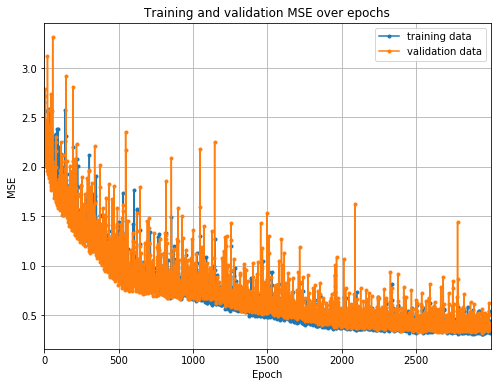

In [76]:
fig, ax = plt.subplots(figsize=(8,6))
result.plot(y=['loss', 'val_loss'], marker='.', ax=ax)
ax.set_xlabel('Epoch')
ax.set_ylabel('MSE')
ax.set_title('Training and validation MSE over epochs')
ax.legend(['training data', 'validation data'])
ax.grid()
fig.savefig('Training and validation MSE over epochs')

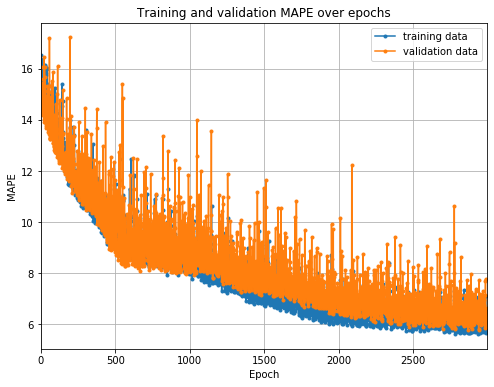

In [77]:
fig, ax = plt.subplots(figsize=(8,6))
result.plot(y=['mape', 'val_mape'], marker='.', ax=ax)
ax.set_xlabel('Epoch')
ax.set_ylabel('MAPE')
ax.set_title('Training and validation MAPE over epochs')
ax.legend(['training data', 'validation data'])
ax.grid()
fig.savefig('Training and validation MAPE over epochs')

In [78]:
train_loss = model.evaluate(x_train, y_train, verbose=0)[0]
train_mape = model.evaluate(x_train, y_train, verbose=0)[1]
#train_mse = model.evaluate(x_train, y_train, verbose=0)[2]
print('training loss (MSE):', train_loss, '\ntraining MAPE:', train_mape, '%\n')
#print('training MSE (custom):', train_mse, '\n')

val_loss = model.evaluate(x_val, y_val, verbose=0)[0]
val_mape = model.evaluate(x_val, y_val, verbose=0)[1]
#val_mse = model.evaluate(x_val, y_val, verbose=0)[2]
print('validation loss (MSE):', val_loss, '\nvalidation MAPE:', val_mape, '%\n')
#print('validation MSE (custom):', val_mse, '\n')

test_loss = model.evaluate(x_test, y_test, verbose=0)[0]
test_mape = model.evaluate(x_test, y_test, verbose=0)[1]
#test_mse = model.evaluate(x_test, y_test, verbose=0)[2]
print('test loss (MSE):', test_loss, '\ntest MAPE:', test_mape, '%')
#print('test MSE (custom):', test_mse, '\n')

training loss (MSE): 0.3704802075477496 
training MAPE: 6.1297727 %

validation loss (MSE): 0.39934056718447053 
validation MAPE: 6.4862976 %

test loss (MSE): 0.4920044026876751 
test MAPE: 6.8814516 %


### 3rd try

In [93]:
#create model instance
model = Sequential()

#input layer
model.add(Dense(units=32, input_dim=n_features, activation='relu')) 

#hidden layers
model.add(Dense(units=24, input_dim=n_features, activation='relu', 
                      use_bias=True, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(rate=0.2))
model.add(Dense(units=16, input_dim=n_features, activation='relu', 
                      use_bias=True, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(rate=0.2))
#...

#output layer
model.add(Dense(units=1, activation='relu'))

In [94]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_33 (Dense)             (None, 24)                792       
_________________________________________________________________
dropout_6 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 16)                400       
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 17        
Total params: 1,561
Trainable params: 1,561
Non-trainable params: 0
____________________________________________________

In [95]:
# Compile the model using adam as optimizer and custom_loss as the loss. Use MAPE and MSE as metrics
model.compile(optimizer='adam', loss='mse', metrics=['mape'])

In [96]:
# Train the model. use batch_size=32 and train it for 3000 epochs. use x_val and y_val as validation_data
history = model.fit(x_train, y_train, batch_size=64, epochs=10000, validation_data=(x_val, y_val))

Train on 1533 samples, validate on 171 samples
Epoch 1/10000
1533/1533 [==============================] - 0s 301us/sample - loss: 173.9107 - mape: 114.1743 - val_loss: 78.7761 - val_mape: 100.0000
Epoch 2/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 82.1199 - mape: 99.9792 - val_loss: 78.7337 - val_mape: 100.0000
Epoch 3/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 83.6630 - mape: 100.6285 - val_loss: 78.6991 - val_mape: 100.0000
Epoch 4/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 81.7970 - mape: 100.1729 - val_loss: 78.6712 - val_mape: 100.0000
Epoch 5/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 80.2175 - mape: 99.4703 - val_loss: 78.6489 - val_mape: 100.0000
Epoch 6/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 83.0919 - mape: 100.3921 - val_loss: 78.6309 - val_mape: 100.0000
Epoch 7/10000
1533/1533 [==============================] - 0s 30u

Epoch 56/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 14.7460 - mape: 36.3791 - val_loss: 11.7003 - val_mape: 32.7608
Epoch 57/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 15.5102 - mape: 37.0800 - val_loss: 12.7211 - val_mape: 34.4005
Epoch 58/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 14.2976 - mape: 35.2561 - val_loss: 12.6573 - val_mape: 34.3127
Epoch 59/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 15.1626 - mape: 35.6480 - val_loss: 11.7121 - val_mape: 32.6558
Epoch 60/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 14.3569 - mape: 35.3806 - val_loss: 12.8263 - val_mape: 34.6340
Epoch 61/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 14.0636 - mape: 34.5271 - val_loss: 10.9472 - val_mape: 31.3621
Epoch 62/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 13.6710 - mape: 34.3323 - val_loss:

1533/1533 [==============================] - 0s 28us/sample - loss: 9.4152 - mape: 28.4294 - val_loss: 8.2299 - val_mape: 26.2342
Epoch 113/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 9.2414 - mape: 28.5397 - val_loss: 7.8195 - val_mape: 25.5289
Epoch 114/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 9.4022 - mape: 28.4886 - val_loss: 7.8655 - val_mape: 25.6256
Epoch 115/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 9.1167 - mape: 28.6185 - val_loss: 7.6562 - val_mape: 25.2913
Epoch 116/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 9.7924 - mape: 29.1418 - val_loss: 8.4804 - val_mape: 26.6371
Epoch 117/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 9.1811 - mape: 27.9641 - val_loss: 8.6576 - val_mape: 26.9432
Epoch 118/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 8.6250 - mape: 27.7924 - val_loss: 8.0330 - val_mape: 25

1533/1533 [==============================] - 0s 32us/sample - loss: 6.8120 - mape: 24.8862 - val_loss: 6.0647 - val_mape: 22.2073
Epoch 169/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 6.6575 - mape: 24.7350 - val_loss: 5.5117 - val_mape: 21.2179
Epoch 170/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 6.4570 - mape: 24.4471 - val_loss: 6.3001 - val_mape: 22.5731
Epoch 171/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 6.9212 - mape: 25.0026 - val_loss: 5.0551 - val_mape: 20.4869
Epoch 172/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 6.5256 - mape: 24.4741 - val_loss: 4.8871 - val_mape: 20.2144
Epoch 173/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 6.8682 - mape: 24.5459 - val_loss: 6.0842 - val_mape: 22.1659
Epoch 174/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 6.8514 - mape: 25.1273 - val_loss: 6.6070 - val_mape: 22

1533/1533 [==============================] - 0s 29us/sample - loss: 5.7415 - mape: 22.7698 - val_loss: 4.8582 - val_mape: 19.7456
Epoch 225/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 5.6173 - mape: 22.6315 - val_loss: 5.3380 - val_mape: 20.6610
Epoch 226/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 5.4212 - mape: 22.6284 - val_loss: 4.5635 - val_mape: 19.3964
Epoch 227/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 5.3994 - mape: 22.8098 - val_loss: 4.5020 - val_mape: 19.2772
Epoch 228/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 5.3867 - mape: 22.5894 - val_loss: 5.2830 - val_mape: 20.4528
Epoch 229/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 5.6208 - mape: 22.9761 - val_loss: 4.7282 - val_mape: 19.5753
Epoch 230/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 5.2094 - mape: 22.0501 - val_loss: 4.7506 - val_mape: 19

1533/1533 [==============================] - 0s 32us/sample - loss: 4.9750 - mape: 21.8935 - val_loss: 4.2287 - val_mape: 18.8900
Epoch 281/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 4.8908 - mape: 21.6845 - val_loss: 4.1537 - val_mape: 18.8032
Epoch 282/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 4.8418 - mape: 21.7874 - val_loss: 4.0859 - val_mape: 18.8167
Epoch 283/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 4.9439 - mape: 21.7708 - val_loss: 4.5444 - val_mape: 19.2818
Epoch 284/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 4.9007 - mape: 21.8852 - val_loss: 4.2404 - val_mape: 18.9631
Epoch 285/10000
1533/1533 [==============================] - 0s 42us/sample - loss: 4.8246 - mape: 21.8757 - val_loss: 4.3576 - val_mape: 18.9706
Epoch 286/10000
1533/1533 [==============================] - 0s 48us/sample - loss: 4.6573 - mape: 21.2388 - val_loss: 4.5760 - val_mape: 19

1533/1533 [==============================] - 0s 27us/sample - loss: 4.2598 - mape: 20.6845 - val_loss: 4.5248 - val_mape: 19.1948
Epoch 336/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 4.4638 - mape: 20.9658 - val_loss: 4.1642 - val_mape: 18.5844
Epoch 337/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 4.5219 - mape: 21.1417 - val_loss: 4.0235 - val_mape: 18.7260
Epoch 338/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 4.4960 - mape: 21.4655 - val_loss: 4.2225 - val_mape: 18.7696
Epoch 339/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 4.5353 - mape: 20.8755 - val_loss: 3.9981 - val_mape: 18.5733
Epoch 340/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 4.3600 - mape: 20.8480 - val_loss: 4.0777 - val_mape: 18.6534
Epoch 341/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 4.3491 - mape: 20.6900 - val_loss: 3.7350 - val_mape: 18

1533/1533 [==============================] - 0s 27us/sample - loss: 4.0510 - mape: 20.3065 - val_loss: 3.4964 - val_mape: 18.3606
Epoch 392/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 4.0252 - mape: 20.0998 - val_loss: 3.4096 - val_mape: 18.2602
Epoch 393/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 4.0320 - mape: 20.3918 - val_loss: 3.6853 - val_mape: 18.3368
Epoch 394/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 4.0724 - mape: 20.1240 - val_loss: 3.4088 - val_mape: 18.3493
Epoch 395/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 4.0987 - mape: 20.5593 - val_loss: 3.8363 - val_mape: 18.3404
Epoch 396/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 4.0986 - mape: 20.0900 - val_loss: 3.6406 - val_mape: 18.2790
Epoch 397/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 4.0943 - mape: 20.2939 - val_loss: 3.5834 - val_mape: 18

1533/1533 [==============================] - 0s 29us/sample - loss: 3.9848 - mape: 20.3602 - val_loss: 3.4934 - val_mape: 18.1148
Epoch 448/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 3.9572 - mape: 19.9730 - val_loss: 3.4275 - val_mape: 18.1935
Epoch 449/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.8304 - mape: 19.8368 - val_loss: 3.3865 - val_mape: 17.9706
Epoch 450/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.9355 - mape: 20.2924 - val_loss: 3.6136 - val_mape: 18.2989
Epoch 451/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.7761 - mape: 19.5374 - val_loss: 3.2754 - val_mape: 18.3079
Epoch 452/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 3.9000 - mape: 20.0765 - val_loss: 3.4042 - val_mape: 17.8922
Epoch 453/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.9346 - mape: 20.0207 - val_loss: 3.5314 - val_mape: 18

1533/1533 [==============================] - 0s 26us/sample - loss: 3.8411 - mape: 20.0521 - val_loss: 3.2316 - val_mape: 18.0149
Epoch 503/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 3.8340 - mape: 19.9346 - val_loss: 3.8754 - val_mape: 18.3687
Epoch 504/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.8558 - mape: 19.7890 - val_loss: 3.7177 - val_mape: 18.2312
Epoch 505/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.7983 - mape: 19.9208 - val_loss: 3.2340 - val_mape: 18.1367
Epoch 506/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 3.8697 - mape: 19.8768 - val_loss: 3.3517 - val_mape: 18.1257
Epoch 507/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.8479 - mape: 19.9505 - val_loss: 3.6316 - val_mape: 18.0373
Epoch 508/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.8552 - mape: 19.6866 - val_loss: 3.3664 - val_mape: 17

1533/1533 [==============================] - 0s 25us/sample - loss: 3.7675 - mape: 19.7167 - val_loss: 3.4021 - val_mape: 17.6936
Epoch 559/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.6398 - mape: 19.5777 - val_loss: 3.2124 - val_mape: 17.7514
Epoch 560/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.6512 - mape: 19.6568 - val_loss: 3.2027 - val_mape: 17.9016
Epoch 561/10000
1533/1533 [==============================] - ETA: 0s - loss: 3.3788 - mape: 20.419 - 0s 26us/sample - loss: 3.6176 - mape: 19.5465 - val_loss: 3.4652 - val_mape: 17.7210
Epoch 562/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.5468 - mape: 19.2748 - val_loss: 3.2183 - val_mape: 17.8440
Epoch 563/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 3.6901 - mape: 19.5857 - val_loss: 3.3169 - val_mape: 17.9300
Epoch 564/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.6116 - mape: 1

1533/1533 [==============================] - 0s 27us/sample - loss: 3.5877 - mape: 19.3451 - val_loss: 3.1387 - val_mape: 17.6632
Epoch 614/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.6193 - mape: 19.6391 - val_loss: 3.1234 - val_mape: 17.5969
Epoch 615/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.6033 - mape: 19.5160 - val_loss: 3.4555 - val_mape: 17.5228
Epoch 616/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.5709 - mape: 19.3903 - val_loss: 3.1989 - val_mape: 17.6467
Epoch 617/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.5823 - mape: 19.4907 - val_loss: 3.3263 - val_mape: 17.6163
Epoch 618/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.5103 - mape: 19.2029 - val_loss: 3.3114 - val_mape: 17.3730
Epoch 619/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.5795 - mape: 19.3572 - val_loss: 3.0476 - val_mape: 17

1533/1533 [==============================] - 0s 35us/sample - loss: 3.5051 - mape: 19.2961 - val_loss: 3.0710 - val_mape: 17.8197
Epoch 670/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 3.5440 - mape: 19.2501 - val_loss: 3.0592 - val_mape: 17.5733
Epoch 671/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 3.4650 - mape: 19.2225 - val_loss: 3.1235 - val_mape: 17.2811
Epoch 672/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 3.4217 - mape: 19.0978 - val_loss: 3.0983 - val_mape: 17.2428
Epoch 673/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 3.5858 - mape: 19.3395 - val_loss: 3.0847 - val_mape: 18.1575
Epoch 674/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 3.4896 - mape: 19.4903 - val_loss: 3.1647 - val_mape: 17.1412
Epoch 675/10000
1533/1533 [==============================] - ETA: 0s - loss: 2.9400 - mape: 17.683 - 0s 33us/sample - loss: 3.5404 - mape: 1

Epoch 725/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 3.4610 - mape: 19.1165 - val_loss: 3.1708 - val_mape: 16.9614
Epoch 726/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 3.4321 - mape: 19.0565 - val_loss: 2.9650 - val_mape: 17.0591
Epoch 727/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.4954 - mape: 19.0716 - val_loss: 3.0566 - val_mape: 17.3161
Epoch 728/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.4527 - mape: 19.1616 - val_loss: 3.0323 - val_mape: 16.7408
Epoch 729/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 3.4921 - mape: 19.3315 - val_loss: 3.0502 - val_mape: 17.0839
Epoch 730/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 3.4326 - mape: 18.8842 - val_loss: 2.9886 - val_mape: 16.9721
Epoch 731/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 3.4609 - mape: 19.0301 - val_loss: 2.981

1533/1533 [==============================] - 0s 27us/sample - loss: 3.4423 - mape: 19.1294 - val_loss: 3.1531 - val_mape: 16.8692
Epoch 782/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.3455 - mape: 18.7651 - val_loss: 2.9155 - val_mape: 16.9041
Epoch 783/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.4384 - mape: 18.9177 - val_loss: 2.8955 - val_mape: 17.0239
Epoch 784/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.3918 - mape: 18.8793 - val_loss: 3.0767 - val_mape: 16.8040
Epoch 785/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.3719 - mape: 18.8199 - val_loss: 2.9368 - val_mape: 16.6804
Epoch 786/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.3900 - mape: 18.8522 - val_loss: 2.9767 - val_mape: 16.6166
Epoch 787/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.3474 - mape: 18.8090 - val_loss: 2.9163 - val_mape: 16

Epoch 837/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.4378 - mape: 19.0121 - val_loss: 2.9297 - val_mape: 16.7974
Epoch 838/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.3171 - mape: 18.5035 - val_loss: 2.8227 - val_mape: 16.7007
Epoch 839/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.2560 - mape: 18.5989 - val_loss: 2.8575 - val_mape: 16.5228
Epoch 840/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.2483 - mape: 18.2268 - val_loss: 2.7981 - val_mape: 16.4312
Epoch 841/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.3903 - mape: 18.7009 - val_loss: 2.8634 - val_mape: 16.6528
Epoch 842/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.3116 - mape: 18.6710 - val_loss: 2.8954 - val_mape: 16.7929
Epoch 843/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.3091 - mape: 18.5311 - val_loss: 2.898

Epoch 893/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.3022 - mape: 18.5098 - val_loss: 2.9098 - val_mape: 16.3269
Epoch 894/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 3.2627 - mape: 18.3411 - val_loss: 2.8175 - val_mape: 16.3282
Epoch 895/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.2361 - mape: 18.2894 - val_loss: 2.8190 - val_mape: 16.0099
Epoch 896/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 3.2500 - mape: 18.1912 - val_loss: 2.8184 - val_mape: 16.3911
Epoch 897/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.3579 - mape: 18.6893 - val_loss: 2.8480 - val_mape: 16.4494
Epoch 898/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.2562 - mape: 18.3041 - val_loss: 2.8206 - val_mape: 16.4305
Epoch 899/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.2411 - mape: 18.5341 - val_loss: 2.815

1533/1533 [==============================] - 0s 26us/sample - loss: 3.1638 - mape: 18.0978 - val_loss: 2.7828 - val_mape: 16.3973
Epoch 950/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.2211 - mape: 18.4040 - val_loss: 2.7498 - val_mape: 16.3472
Epoch 951/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.2193 - mape: 18.2442 - val_loss: 2.7542 - val_mape: 16.3531
Epoch 952/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.2535 - mape: 18.3792 - val_loss: 2.7748 - val_mape: 16.1278
Epoch 953/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.2210 - mape: 18.3440 - val_loss: 2.7772 - val_mape: 16.7223
Epoch 954/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.2300 - mape: 18.1493 - val_loss: 2.7430 - val_mape: 15.6405
Epoch 955/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 3.2237 - mape: 18.0486 - val_loss: 2.7486 - val_mape: 16

1533/1533 [==============================] - 0s 27us/sample - loss: 3.1535 - mape: 17.9419 - val_loss: 2.7221 - val_mape: 15.8735
Epoch 1006/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.2371 - mape: 18.3027 - val_loss: 2.7995 - val_mape: 15.7319
Epoch 1007/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 3.1838 - mape: 18.0239 - val_loss: 2.6761 - val_mape: 15.7596
Epoch 1008/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.0968 - mape: 17.7065 - val_loss: 2.7488 - val_mape: 16.0536
Epoch 1009/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 3.1553 - mape: 18.0880 - val_loss: 2.6707 - val_mape: 16.2010
Epoch 1010/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 3.1721 - mape: 18.1024 - val_loss: 2.6684 - val_mape: 16.1881
Epoch 1011/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.1800 - mape: 17.9287 - val_loss: 2.6171 - val_ma

Epoch 1061/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.0201 - mape: 17.4148 - val_loss: 2.5499 - val_mape: 15.8252
Epoch 1062/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 3.0465 - mape: 17.6772 - val_loss: 2.6332 - val_mape: 15.4542
Epoch 1063/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.0370 - mape: 17.4010 - val_loss: 2.6609 - val_mape: 15.8124
Epoch 1064/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.0000 - mape: 17.3784 - val_loss: 2.5834 - val_mape: 15.6846
Epoch 1065/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.0197 - mape: 17.3637 - val_loss: 2.6124 - val_mape: 15.8433
Epoch 1066/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.0387 - mape: 17.7369 - val_loss: 2.6002 - val_mape: 15.6905
Epoch 1067/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 3.1345 - mape: 17.7999 - val_loss

Epoch 1117/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.9245 - mape: 17.0799 - val_loss: 2.5340 - val_mape: 15.3701
Epoch 1118/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.9925 - mape: 17.2337 - val_loss: 2.4868 - val_mape: 14.9658
Epoch 1119/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 2.9158 - mape: 17.0037 - val_loss: 2.5801 - val_mape: 15.6834
Epoch 1120/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.9476 - mape: 17.2618 - val_loss: 2.5206 - val_mape: 15.4662
Epoch 1121/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.9328 - mape: 17.2435 - val_loss: 2.5880 - val_mape: 15.6993
Epoch 1122/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.0221 - mape: 17.3084 - val_loss: 2.5613 - val_mape: 15.1137
Epoch 1123/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.9295 - mape: 17.0125 - val_loss

Epoch 1173/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.8805 - mape: 16.6495 - val_loss: 2.4225 - val_mape: 14.9315
Epoch 1174/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.9927 - mape: 17.2522 - val_loss: 2.6307 - val_mape: 16.4688
Epoch 1175/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.8954 - mape: 16.9082 - val_loss: 2.4637 - val_mape: 15.6767
Epoch 1176/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.0074 - mape: 17.0703 - val_loss: 2.4269 - val_mape: 15.3666
Epoch 1177/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 2.8640 - mape: 16.8076 - val_loss: 2.4871 - val_mape: 15.6083
Epoch 1178/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.8924 - mape: 16.9078 - val_loss: 2.4045 - val_mape: 14.7411
Epoch 1179/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.9074 - mape: 16.8395 - val_loss

Epoch 1229/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.9044 - mape: 16.6548 - val_loss: 2.3832 - val_mape: 15.1039
Epoch 1230/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.8033 - mape: 16.6502 - val_loss: 2.4685 - val_mape: 15.0438
Epoch 1231/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 2.8361 - mape: 16.6801 - val_loss: 2.4227 - val_mape: 15.0147
Epoch 1232/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.8855 - mape: 16.7927 - val_loss: 2.3638 - val_mape: 14.7277
Epoch 1233/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.8271 - mape: 16.4932 - val_loss: 2.5805 - val_mape: 14.9852
Epoch 1234/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.7283 - mape: 16.4012 - val_loss: 2.3870 - val_mape: 14.7143
Epoch 1235/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.7384 - mape: 16.1694 - val_loss

Epoch 1285/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.8074 - mape: 16.6287 - val_loss: 2.4000 - val_mape: 15.1511
Epoch 1286/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 2.7661 - mape: 16.3789 - val_loss: 2.5651 - val_mape: 14.6013
Epoch 1287/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.8230 - mape: 16.6911 - val_loss: 2.5009 - val_mape: 14.7317
Epoch 1288/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.7602 - mape: 16.4882 - val_loss: 2.3014 - val_mape: 14.5665
Epoch 1289/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.7532 - mape: 16.0396 - val_loss: 2.3358 - val_mape: 15.3398
Epoch 1290/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.7803 - mape: 16.5757 - val_loss: 2.3835 - val_mape: 15.0272
Epoch 1291/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.8085 - mape: 16.6056 - val_loss

Epoch 1341/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.4413 - mape: 15.3937 - val_loss: 2.2330 - val_mape: 14.0011
Epoch 1342/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.5492 - mape: 15.5433 - val_loss: 2.3342 - val_mape: 14.8663
Epoch 1343/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.5288 - mape: 15.5747 - val_loss: 2.1867 - val_mape: 13.7142
Epoch 1344/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.4767 - mape: 15.6539 - val_loss: 2.1750 - val_mape: 14.8356
Epoch 1345/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.5741 - mape: 15.4239 - val_loss: 2.3056 - val_mape: 16.0059
Epoch 1346/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 2.7768 - mape: 16.4777 - val_loss: 2.3642 - val_mape: 16.1624
Epoch 1347/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.5438 - mape: 15.8210 - val_loss

Epoch 1397/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.4866 - mape: 15.4558 - val_loss: 2.1805 - val_mape: 13.8958
Epoch 1398/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.5649 - mape: 15.6035 - val_loss: 2.2133 - val_mape: 13.5775
Epoch 1399/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.4710 - mape: 15.4439 - val_loss: 2.3054 - val_mape: 13.6133
Epoch 1400/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.4313 - mape: 15.1082 - val_loss: 2.1350 - val_mape: 13.9654
Epoch 1401/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.3749 - mape: 14.9193 - val_loss: 2.1086 - val_mape: 14.0769
Epoch 1402/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.4758 - mape: 15.4144 - val_loss: 2.1944 - val_mape: 13.9212
Epoch 1403/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.4870 - mape: 15.4757 - val_loss

Epoch 1453/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 2.2892 - mape: 14.6984 - val_loss: 2.0146 - val_mape: 13.8478
Epoch 1454/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 2.3072 - mape: 14.7597 - val_loss: 2.2282 - val_mape: 15.0114
Epoch 1455/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.3022 - mape: 14.9618 - val_loss: 2.0728 - val_mape: 13.3791
Epoch 1456/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.3363 - mape: 15.0270 - val_loss: 2.0295 - val_mape: 13.8457
Epoch 1457/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.3801 - mape: 15.0374 - val_loss: 2.0023 - val_mape: 13.8713
Epoch 1458/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.3170 - mape: 14.8249 - val_loss: 2.2834 - val_mape: 13.6578
Epoch 1459/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.5057 - mape: 15.3523 - val_loss

Epoch 1509/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.2500 - mape: 14.4443 - val_loss: 1.9058 - val_mape: 14.0878
Epoch 1510/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.4291 - mape: 15.2825 - val_loss: 2.1380 - val_mape: 14.1524
Epoch 1511/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.1501 - mape: 14.2220 - val_loss: 2.0608 - val_mape: 13.6301
Epoch 1512/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.1761 - mape: 14.4172 - val_loss: 1.9553 - val_mape: 13.5403
Epoch 1513/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 2.2260 - mape: 14.3491 - val_loss: 2.0682 - val_mape: 15.0313
Epoch 1514/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 2.3509 - mape: 15.0691 - val_loss: 2.0246 - val_mape: 13.9668
Epoch 1515/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.1814 - mape: 14.4218 - val_loss

Epoch 1565/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.2469 - mape: 14.5734 - val_loss: 1.9828 - val_mape: 13.4147
Epoch 1566/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.2343 - mape: 14.4131 - val_loss: 1.9354 - val_mape: 13.3409
Epoch 1567/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.1082 - mape: 14.1191 - val_loss: 1.8602 - val_mape: 13.4597
Epoch 1568/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 2.2302 - mape: 14.5761 - val_loss: 1.9106 - val_mape: 13.5888
Epoch 1569/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 2.1341 - mape: 14.2060 - val_loss: 2.0119 - val_mape: 13.4318
Epoch 1570/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.2038 - mape: 14.4674 - val_loss: 1.8447 - val_mape: 14.0127
Epoch 1571/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.1958 - mape: 14.4274 - val_loss

Epoch 1621/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.0762 - mape: 14.1390 - val_loss: 1.8483 - val_mape: 13.1178
Epoch 1622/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.0767 - mape: 13.9620 - val_loss: 1.7589 - val_mape: 13.7014
Epoch 1623/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.1841 - mape: 14.5284 - val_loss: 2.1768 - val_mape: 13.1066
Epoch 1624/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.1786 - mape: 14.1249 - val_loss: 1.8721 - val_mape: 12.7532
Epoch 1625/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.1033 - mape: 13.9362 - val_loss: 1.7836 - val_mape: 13.2978
Epoch 1626/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.0250 - mape: 13.8718 - val_loss: 1.8125 - val_mape: 12.8880
Epoch 1627/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.0604 - mape: 13.8459 - val_loss

Epoch 1677/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.0541 - mape: 13.9048 - val_loss: 1.9322 - val_mape: 13.5785
Epoch 1678/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.0369 - mape: 13.8916 - val_loss: 1.6938 - val_mape: 12.5361
Epoch 1679/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.0914 - mape: 13.9081 - val_loss: 1.7394 - val_mape: 12.6032
Epoch 1680/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 2.0937 - mape: 14.0119 - val_loss: 1.9134 - val_mape: 12.7514
Epoch 1681/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.9952 - mape: 13.7219 - val_loss: 1.6595 - val_mape: 12.6550
Epoch 1682/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 2.0999 - mape: 13.8616 - val_loss: 2.0623 - val_mape: 13.1732
Epoch 1683/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.0246 - mape: 13.8193 - val_loss

Epoch 1733/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.9615 - mape: 13.3433 - val_loss: 1.6501 - val_mape: 12.2847
Epoch 1734/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.9847 - mape: 13.4998 - val_loss: 1.6966 - val_mape: 12.4034
Epoch 1735/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.9150 - mape: 13.2007 - val_loss: 1.6363 - val_mape: 12.3188
Epoch 1736/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.8949 - mape: 13.2120 - val_loss: 1.8741 - val_mape: 12.8345
Epoch 1737/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.9027 - mape: 13.3537 - val_loss: 1.6129 - val_mape: 12.8813
Epoch 1738/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.0692 - mape: 13.8925 - val_loss: 1.7875 - val_mape: 13.6685
Epoch 1739/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.0880 - mape: 14.0981 - val_loss

Epoch 1789/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.8566 - mape: 13.0236 - val_loss: 2.0085 - val_mape: 12.7075
Epoch 1790/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.8681 - mape: 13.3413 - val_loss: 1.6536 - val_mape: 12.5057
Epoch 1791/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.9320 - mape: 13.2893 - val_loss: 2.4798 - val_mape: 13.6377
Epoch 1792/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.9057 - mape: 12.9906 - val_loss: 1.5430 - val_mape: 11.7178
Epoch 1793/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.8624 - mape: 13.1041 - val_loss: 1.5482 - val_mape: 11.8896
Epoch 1794/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.7562 - mape: 12.7195 - val_loss: 1.5378 - val_mape: 11.8534
Epoch 1795/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.8163 - mape: 12.7948 - val_loss

Epoch 1845/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.7338 - mape: 12.3824 - val_loss: 2.1013 - val_mape: 12.5520
Epoch 1846/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.8925 - mape: 12.6425 - val_loss: 1.3974 - val_mape: 11.4810
Epoch 1847/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.7505 - mape: 12.5012 - val_loss: 1.5876 - val_mape: 11.4174
Epoch 1848/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.7288 - mape: 12.2954 - val_loss: 1.6714 - val_mape: 11.7082
Epoch 1849/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.6025 - mape: 11.8695 - val_loss: 1.4283 - val_mape: 11.5682
Epoch 1850/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.7390 - mape: 12.3345 - val_loss: 1.4766 - val_mape: 10.8705
Epoch 1851/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.6933 - mape: 12.1542 - val_loss

Epoch 1901/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.6568 - mape: 12.1316 - val_loss: 1.6915 - val_mape: 11.5038
Epoch 1902/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.6645 - mape: 12.2074 - val_loss: 1.5980 - val_mape: 11.0090
Epoch 1903/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.6910 - mape: 12.0995 - val_loss: 1.6766 - val_mape: 11.4914
Epoch 1904/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.6081 - mape: 11.6222 - val_loss: 1.5626 - val_mape: 10.9416
Epoch 1905/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.4689 - mape: 11.4558 - val_loss: 1.4298 - val_mape: 10.9666
Epoch 1906/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.6877 - mape: 12.0320 - val_loss: 1.7307 - val_mape: 11.1618
Epoch 1907/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.5776 - mape: 11.6746 - val_loss

Epoch 1957/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.5400 - mape: 11.4201 - val_loss: 1.4807 - val_mape: 10.7897
Epoch 1958/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.6183 - mape: 11.6738 - val_loss: 1.9111 - val_mape: 11.7766
Epoch 1959/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.6055 - mape: 11.7964 - val_loss: 1.8658 - val_mape: 11.8352
Epoch 1960/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.5318 - mape: 11.4547 - val_loss: 1.6893 - val_mape: 11.0135
Epoch 1961/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.6439 - mape: 11.7437 - val_loss: 2.0184 - val_mape: 12.0917
Epoch 1962/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.5307 - mape: 11.4788 - val_loss: 1.5719 - val_mape: 10.6585
Epoch 1963/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.4932 - mape: 11.6567 - val_loss

Epoch 2013/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 1.5147 - mape: 11.1651 - val_loss: 1.2698 - val_mape: 10.4418
Epoch 2014/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 1.5764 - mape: 11.5929 - val_loss: 1.1471 - val_mape: 9.8748
Epoch 2015/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.4375 - mape: 11.1069 - val_loss: 1.8153 - val_mape: 11.5336
Epoch 2016/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.4922 - mape: 11.2768 - val_loss: 1.9435 - val_mape: 11.4843
Epoch 2017/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.5393 - mape: 11.3154 - val_loss: 1.1082 - val_mape: 10.1603
Epoch 2018/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.5953 - mape: 11.7965 - val_loss: 1.3071 - val_mape: 10.4457
Epoch 2019/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.5769 - mape: 11.8658 - val_loss:

Epoch 2069/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.4477 - mape: 10.9182 - val_loss: 1.3726 - val_mape: 10.3781
Epoch 2070/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.4485 - mape: 11.0143 - val_loss: 1.9044 - val_mape: 11.6026
Epoch 2071/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.5058 - mape: 11.4732 - val_loss: 1.8738 - val_mape: 11.8331
Epoch 2072/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.5268 - mape: 11.3724 - val_loss: 1.4380 - val_mape: 10.4266
Epoch 2073/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.4482 - mape: 10.7959 - val_loss: 1.4219 - val_mape: 10.3112
Epoch 2074/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.3738 - mape: 10.8555 - val_loss: 1.2777 - val_mape: 10.0155
Epoch 2075/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.3492 - mape: 10.7886 - val_loss

Epoch 2125/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.4919 - mape: 11.1104 - val_loss: 1.2287 - val_mape: 10.6460
Epoch 2126/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.6627 - mape: 11.7668 - val_loss: 2.1181 - val_mape: 11.7507
Epoch 2127/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.4746 - mape: 11.2842 - val_loss: 1.5896 - val_mape: 10.5711
Epoch 2128/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.4216 - mape: 11.3541 - val_loss: 1.4908 - val_mape: 10.7138
Epoch 2129/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.5669 - mape: 11.5860 - val_loss: 1.5107 - val_mape: 10.9330
Epoch 2130/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.3659 - mape: 10.7334 - val_loss: 1.3932 - val_mape: 10.3330
Epoch 2131/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2991 - mape: 10.5777 - val_loss

Epoch 2181/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2944 - mape: 10.4752 - val_loss: 1.5843 - val_mape: 10.3366
Epoch 2182/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.3087 - mape: 10.5006 - val_loss: 1.7697 - val_mape: 10.8229
Epoch 2183/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.3993 - mape: 10.8864 - val_loss: 1.2108 - val_mape: 9.6970
Epoch 2184/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.4075 - mape: 10.7823 - val_loss: 1.7978 - val_mape: 11.0502
Epoch 2185/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3780 - mape: 10.6127 - val_loss: 1.4750 - val_mape: 10.5272
Epoch 2186/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3184 - mape: 10.3714 - val_loss: 1.2005 - val_mape: 9.5668
Epoch 2187/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3056 - mape: 10.4401 - val_loss: 

1533/1533 [==============================] - 0s 26us/sample - loss: 1.3100 - mape: 10.5593 - val_loss: 1.1120 - val_mape: 9.5062
Epoch 2237/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2342 - mape: 10.3282 - val_loss: 1.4310 - val_mape: 10.1991
Epoch 2238/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.2743 - mape: 10.2494 - val_loss: 1.4564 - val_mape: 10.1496
Epoch 2239/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2923 - mape: 10.4053 - val_loss: 1.4001 - val_mape: 10.0023
Epoch 2240/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2627 - mape: 10.2342 - val_loss: 1.2521 - val_mape: 9.7308
Epoch 2241/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2776 - mape: 10.4476 - val_loss: 1.9794 - val_mape: 11.6396
Epoch 2242/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2083 - mape: 10.0859 - val_loss: 1.6437 - val_mape

Epoch 2292/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 1.2446 - mape: 10.3531 - val_loss: 1.5066 - val_mape: 10.4776
Epoch 2293/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 1.1918 - mape: 10.0894 - val_loss: 1.3370 - val_mape: 10.1926
Epoch 2294/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 1.2284 - mape: 10.1356 - val_loss: 1.1898 - val_mape: 9.5474
Epoch 2295/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 1.4674 - mape: 10.8256 - val_loss: 1.8930 - val_mape: 11.4827
Epoch 2296/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.5709 - mape: 11.4435 - val_loss: 2.3710 - val_mape: 12.6168
Epoch 2297/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 1.3047 - mape: 10.6674 - val_loss: 1.6361 - val_mape: 10.7917
Epoch 2298/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.2600 - mape: 10.2800 - val_loss:

Epoch 2348/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3111 - mape: 10.5275 - val_loss: 1.3093 - val_mape: 10.0997
Epoch 2349/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.2491 - mape: 10.3538 - val_loss: 1.6962 - val_mape: 11.1572
Epoch 2350/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3504 - mape: 10.5705 - val_loss: 1.1822 - val_mape: 9.6263
Epoch 2351/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.2980 - mape: 10.5852 - val_loss: 1.7625 - val_mape: 10.9173
Epoch 2352/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 1.2170 - mape: 10.3097 - val_loss: 1.9948 - val_mape: 11.4741
Epoch 2353/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.3080 - mape: 10.6721 - val_loss: 1.3112 - val_mape: 9.7557
Epoch 2354/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.2335 - mape: 10.2553 - val_loss: 

Epoch 2404/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2306 - mape: 10.3755 - val_loss: 1.9057 - val_mape: 11.2488
Epoch 2405/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1967 - mape: 9.8797 - val_loss: 1.5653 - val_mape: 10.7088
Epoch 2406/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3650 - mape: 10.6313 - val_loss: 1.0667 - val_mape: 9.4808
Epoch 2407/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2356 - mape: 10.2450 - val_loss: 1.1056 - val_mape: 9.4756
Epoch 2408/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.3218 - mape: 10.4588 - val_loss: 1.8607 - val_mape: 11.2846
Epoch 2409/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.4283 - mape: 11.0733 - val_loss: 2.3162 - val_mape: 12.4999
Epoch 2410/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.3827 - mape: 10.7331 - val_loss: 1

Epoch 2460/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2665 - mape: 10.2640 - val_loss: 1.5160 - val_mape: 10.6770
Epoch 2461/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.1333 - mape: 9.6876 - val_loss: 1.3133 - val_mape: 9.9006
Epoch 2462/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3452 - mape: 10.4379 - val_loss: 1.8139 - val_mape: 11.1391
Epoch 2463/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.4460 - mape: 10.8995 - val_loss: 1.7809 - val_mape: 11.2757
Epoch 2464/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.3719 - mape: 10.6292 - val_loss: 1.3873 - val_mape: 10.2985
Epoch 2465/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2069 - mape: 10.1790 - val_loss: 2.2895 - val_mape: 12.4372
Epoch 2466/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2374 - mape: 10.0580 - val_loss: 

1533/1533 [==============================] - 0s 27us/sample - loss: 1.3306 - mape: 10.4267 - val_loss: 1.2235 - val_mape: 9.8507
Epoch 2516/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.4430 - mape: 11.0585 - val_loss: 1.4142 - val_mape: 10.3309
Epoch 2517/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3060 - mape: 10.4259 - val_loss: 1.4646 - val_mape: 10.2694
Epoch 2518/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2551 - mape: 10.1800 - val_loss: 1.3079 - val_mape: 9.9128
Epoch 2519/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.2192 - mape: 9.9427 - val_loss: 1.5137 - val_mape: 10.1442
Epoch 2520/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.2540 - mape: 9.9887 - val_loss: 0.9688 - val_mape: 9.1792
Epoch 2521/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.3034 - mape: 10.4114 - val_loss: 2.1954 - val_mape: 1

1533/1533 [==============================] - 0s 25us/sample - loss: 1.2881 - mape: 10.3752 - val_loss: 1.5174 - val_mape: 10.3559
Epoch 2572/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1536 - mape: 9.9723 - val_loss: 1.5479 - val_mape: 10.4390
Epoch 2573/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2209 - mape: 9.8214 - val_loss: 1.2139 - val_mape: 9.9644
Epoch 2574/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2746 - mape: 10.3350 - val_loss: 1.7244 - val_mape: 10.9737
Epoch 2575/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2484 - mape: 10.1026 - val_loss: 1.2869 - val_mape: 9.6787
Epoch 2576/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2128 - mape: 10.2145 - val_loss: 1.2825 - val_mape: 9.7793
Epoch 2577/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.1677 - mape: 10.1142 - val_loss: 1.5740 - val_mape: 1

1533/1533 [==============================] - 0s 26us/sample - loss: 1.2704 - mape: 10.1657 - val_loss: 1.0844 - val_mape: 9.6632
Epoch 2628/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.4002 - mape: 10.7963 - val_loss: 1.4582 - val_mape: 10.5771
Epoch 2629/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3015 - mape: 10.4959 - val_loss: 1.1810 - val_mape: 9.6180
Epoch 2630/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2091 - mape: 10.0356 - val_loss: 1.5476 - val_mape: 10.8159
Epoch 2631/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.1871 - mape: 9.8605 - val_loss: 1.4870 - val_mape: 10.5137
Epoch 2632/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.1494 - mape: 9.9793 - val_loss: 1.3750 - val_mape: 10.4083
Epoch 2633/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.1075 - mape: 9.6621 - val_loss: 1.5946 - val_mape: 1

1533/1533 [==============================] - 0s 25us/sample - loss: 1.2781 - mape: 10.5093 - val_loss: 1.2542 - val_mape: 9.7127
Epoch 2684/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.1767 - mape: 9.9930 - val_loss: 1.4034 - val_mape: 10.2767
Epoch 2685/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2528 - mape: 10.3428 - val_loss: 1.2819 - val_mape: 9.7273
Epoch 2686/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.1645 - mape: 9.7703 - val_loss: 1.4357 - val_mape: 10.1286
Epoch 2687/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.1765 - mape: 10.0873 - val_loss: 1.8902 - val_mape: 11.1716
Epoch 2688/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1385 - mape: 9.7287 - val_loss: 1.4643 - val_mape: 10.6458
Epoch 2689/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.6664 - mape: 11.8519 - val_loss: 1.1818 - val_mape: 1

Epoch 2739/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.2483 - mape: 10.2859 - val_loss: 1.3802 - val_mape: 9.9657
Epoch 2740/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1832 - mape: 10.0331 - val_loss: 1.7032 - val_mape: 10.7159
Epoch 2741/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1959 - mape: 10.0463 - val_loss: 1.2208 - val_mape: 9.5311
Epoch 2742/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2598 - mape: 10.3861 - val_loss: 1.5635 - val_mape: 10.3218
Epoch 2743/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2852 - mape: 10.3057 - val_loss: 1.0784 - val_mape: 9.1256
Epoch 2744/10000
1533/1533 [==============================] - 0s 24us/sample - loss: 1.2717 - mape: 10.5826 - val_loss: 1.7046 - val_mape: 10.5017
Epoch 2745/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2850 - mape: 10.4766 - val_loss: 1

1533/1533 [==============================] - 0s 26us/sample - loss: 1.1713 - mape: 9.7213 - val_loss: 1.1273 - val_mape: 9.2593
Epoch 2795/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2179 - mape: 10.2582 - val_loss: 1.6386 - val_mape: 10.6244
Epoch 2796/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1905 - mape: 10.1954 - val_loss: 1.6403 - val_mape: 10.8248
Epoch 2797/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1510 - mape: 9.7878 - val_loss: 1.7052 - val_mape: 11.0185
Epoch 2798/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1748 - mape: 9.8103 - val_loss: 1.6655 - val_mape: 10.6350
Epoch 2799/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1973 - mape: 10.0346 - val_loss: 1.2409 - val_mape: 9.6214
Epoch 2800/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.1196 - mape: 9.6279 - val_loss: 2.3362 - val_mape: 12

1533/1533 [==============================] - 0s 27us/sample - loss: 1.1102 - mape: 9.4437 - val_loss: 1.2057 - val_mape: 9.6559
Epoch 2851/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1778 - mape: 9.7250 - val_loss: 1.4947 - val_mape: 10.3397
Epoch 2852/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1697 - mape: 9.8276 - val_loss: 1.4659 - val_mape: 10.1755
Epoch 2853/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1620 - mape: 9.8688 - val_loss: 1.8633 - val_mape: 11.2986
Epoch 2854/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1065 - mape: 9.6951 - val_loss: 1.4493 - val_mape: 10.0740
Epoch 2855/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.1874 - mape: 9.7965 - val_loss: 1.2672 - val_mape: 9.7047
Epoch 2856/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1410 - mape: 9.7534 - val_loss: 1.5177 - val_mape: 10.52

1533/1533 [==============================] - 0s 26us/sample - loss: 1.1268 - mape: 9.7095 - val_loss: 1.3256 - val_mape: 9.8877
Epoch 2907/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0785 - mape: 9.7054 - val_loss: 1.6983 - val_mape: 10.9388
Epoch 2908/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.1531 - mape: 9.7653 - val_loss: 1.2571 - val_mape: 9.7769
Epoch 2909/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.0929 - mape: 9.3846 - val_loss: 1.7216 - val_mape: 10.6593
Epoch 2910/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.1553 - mape: 9.9233 - val_loss: 1.5759 - val_mape: 10.7852
Epoch 2911/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2661 - mape: 10.1329 - val_loss: 1.2545 - val_mape: 9.9173
Epoch 2912/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.2094 - mape: 10.0370 - val_loss: 1.3340 - val_mape: 9.98

1533/1533 [==============================] - 0s 32us/sample - loss: 1.1596 - mape: 9.8299 - val_loss: 1.4350 - val_mape: 10.1336
Epoch 2963/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0964 - mape: 9.7530 - val_loss: 1.4770 - val_mape: 10.5397
Epoch 2964/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1604 - mape: 9.8664 - val_loss: 1.5191 - val_mape: 10.4860
Epoch 2965/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1191 - mape: 9.6217 - val_loss: 1.1438 - val_mape: 9.4539
Epoch 2966/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.1431 - mape: 9.6482 - val_loss: 1.3411 - val_mape: 10.2119
Epoch 2967/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.3159 - mape: 10.3786 - val_loss: 2.2320 - val_mape: 12.0862
Epoch 2968/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.3068 - mape: 10.4624 - val_loss: 1.7821 - val_mape: 11

Epoch 3018/10000
1533/1533 [==============================] - 0s 47us/sample - loss: 1.0719 - mape: 9.3787 - val_loss: 1.3556 - val_mape: 10.1205
Epoch 3019/10000
1533/1533 [==============================] - 0s 62us/sample - loss: 1.1743 - mape: 9.8719 - val_loss: 1.3512 - val_mape: 10.5503
Epoch 3020/10000
1533/1533 [==============================] - 0s 45us/sample - loss: 1.2863 - mape: 10.4520 - val_loss: 1.2506 - val_mape: 9.8492
Epoch 3021/10000
1533/1533 [==============================] - 0s 41us/sample - loss: 1.0301 - mape: 9.2453 - val_loss: 1.2737 - val_mape: 9.9387
Epoch 3022/10000
1533/1533 [==============================] - 0s 47us/sample - loss: 1.0394 - mape: 9.4566 - val_loss: 1.0900 - val_mape: 9.4513
Epoch 3023/10000
1533/1533 [==============================] - 0s 42us/sample - loss: 1.1464 - mape: 9.6463 - val_loss: 1.0475 - val_mape: 9.0196
Epoch 3024/10000
1533/1533 [==============================] - 0s 41us/sample - loss: 1.0412 - mape: 9.5098 - val_loss: 1.7841 -

1533/1533 [==============================] - 0s 30us/sample - loss: 1.0603 - mape: 9.5674 - val_loss: 1.1712 - val_mape: 9.5386
Epoch 3075/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0796 - mape: 9.7725 - val_loss: 1.4329 - val_mape: 10.7498
Epoch 3076/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 1.0751 - mape: 9.5612 - val_loss: 2.0351 - val_mape: 11.9679
Epoch 3077/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 1.4486 - mape: 10.8629 - val_loss: 1.1159 - val_mape: 10.3378
Epoch 3078/10000
1533/1533 [==============================] - ETA: 0s - loss: 1.2493 - mape: 10.519 - 0s 55us/sample - loss: 1.2266 - mape: 10.4028 - val_loss: 1.2037 - val_mape: 9.4476
Epoch 3079/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 1.1856 - mape: 10.1757 - val_loss: 1.5342 - val_mape: 10.4187
Epoch 3080/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 1.2005 - mape: 

Epoch 3130/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.1092 - mape: 9.7451 - val_loss: 1.1672 - val_mape: 9.4394
Epoch 3131/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 1.0756 - mape: 9.4296 - val_loss: 2.0388 - val_mape: 11.7381
Epoch 3132/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1123 - mape: 9.6176 - val_loss: 1.4921 - val_mape: 10.4026
Epoch 3133/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.0981 - mape: 9.7395 - val_loss: 1.0619 - val_mape: 9.0395
Epoch 3134/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.2730 - mape: 10.4238 - val_loss: 1.3355 - val_mape: 10.0969
Epoch 3135/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0774 - mape: 9.4699 - val_loss: 1.5927 - val_mape: 10.6273
Epoch 3136/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 1.0380 - mape: 9.2765 - val_loss: 1.5455

1533/1533 [==============================] - 0s 31us/sample - loss: 1.0353 - mape: 9.3321 - val_loss: 1.3735 - val_mape: 10.1002
Epoch 3187/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.0560 - mape: 9.4970 - val_loss: 1.7154 - val_mape: 11.0749
Epoch 3188/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.1580 - mape: 10.1350 - val_loss: 1.3335 - val_mape: 10.2240
Epoch 3189/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 1.1801 - mape: 9.9184 - val_loss: 1.4225 - val_mape: 10.1548
Epoch 3190/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.3764 - mape: 10.7132 - val_loss: 1.6140 - val_mape: 10.7150
Epoch 3191/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.2745 - mape: 10.2584 - val_loss: 1.6902 - val_mape: 10.7913
Epoch 3192/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.1014 - mape: 9.9087 - val_loss: 1.7916 - val_mape: 

1533/1533 [==============================] - 0s 31us/sample - loss: 1.0658 - mape: 9.2923 - val_loss: 1.4491 - val_mape: 10.6097
Epoch 3243/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.2113 - mape: 9.9105 - val_loss: 1.4601 - val_mape: 10.4391
Epoch 3244/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0561 - mape: 9.4568 - val_loss: 1.4301 - val_mape: 10.3049
Epoch 3245/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.0780 - mape: 9.6268 - val_loss: 1.0807 - val_mape: 9.2002
Epoch 3246/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0825 - mape: 9.3135 - val_loss: 1.3285 - val_mape: 9.6383
Epoch 3247/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.1282 - mape: 9.6801 - val_loss: 1.6181 - val_mape: 10.9759
Epoch 3248/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 1.0826 - mape: 9.5002 - val_loss: 1.2495 - val_mape: 9.882

1533/1533 [==============================] - 0s 34us/sample - loss: 1.1736 - mape: 9.9730 - val_loss: 1.4444 - val_mape: 10.7066
Epoch 3299/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.0715 - mape: 9.5708 - val_loss: 1.3413 - val_mape: 10.0144
Epoch 3300/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0378 - mape: 9.2734 - val_loss: 1.6423 - val_mape: 10.5005
Epoch 3301/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0693 - mape: 9.5691 - val_loss: 1.5752 - val_mape: 10.5113
Epoch 3302/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.1033 - mape: 9.5808 - val_loss: 1.9179 - val_mape: 11.5884
Epoch 3303/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.3073 - mape: 10.4066 - val_loss: 1.2320 - val_mape: 9.8511
Epoch 3304/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.1964 - mape: 10.3162 - val_loss: 1.4488 - val_mape: 10

1533/1533 [==============================] - 0s 30us/sample - loss: 1.1070 - mape: 9.9282 - val_loss: 1.2933 - val_mape: 9.9724
Epoch 3355/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 1.0463 - mape: 9.3388 - val_loss: 1.3801 - val_mape: 10.2285
Epoch 3356/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.9878 - mape: 9.0531 - val_loss: 1.3134 - val_mape: 9.8561
Epoch 3357/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.9961 - mape: 9.1235 - val_loss: 1.3659 - val_mape: 10.2175
Epoch 3358/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.0805 - mape: 9.5800 - val_loss: 1.8466 - val_mape: 11.4005
Epoch 3359/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.1278 - mape: 9.8087 - val_loss: 1.8002 - val_mape: 11.4143
Epoch 3360/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.0808 - mape: 9.5800 - val_loss: 1.4741 - val_mape: 10.96

1533/1533 [==============================] - 0s 31us/sample - loss: 1.0385 - mape: 9.4301 - val_loss: 1.2273 - val_mape: 9.8728
Epoch 3411/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.0251 - mape: 9.2775 - val_loss: 1.7941 - val_mape: 11.2997
Epoch 3412/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.2051 - mape: 9.9013 - val_loss: 1.7120 - val_mape: 11.6419
Epoch 3413/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.1739 - mape: 9.8602 - val_loss: 1.3112 - val_mape: 9.8475
Epoch 3414/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 1.0122 - mape: 9.3725 - val_loss: 1.1710 - val_mape: 9.8120
Epoch 3415/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.1033 - mape: 9.5954 - val_loss: 1.2072 - val_mape: 9.5212
Epoch 3416/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.2057 - mape: 9.9243 - val_loss: 1.5653 - val_mape: 10.7213

1533/1533 [==============================] - 0s 33us/sample - loss: 1.1388 - mape: 9.6066 - val_loss: 1.4137 - val_mape: 10.3421
Epoch 3467/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.9940 - mape: 9.1097 - val_loss: 1.3809 - val_mape: 10.2145
Epoch 3468/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.1374 - mape: 9.9866 - val_loss: 1.0842 - val_mape: 9.3375
Epoch 3469/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.1336 - mape: 9.8296 - val_loss: 1.4050 - val_mape: 10.2732
Epoch 3470/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.0708 - mape: 9.6254 - val_loss: 1.2895 - val_mape: 9.7794
Epoch 3471/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0858 - mape: 9.6699 - val_loss: 1.4361 - val_mape: 10.5696
Epoch 3472/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.0435 - mape: 9.3918 - val_loss: 1.4568 - val_mape: 10.45

Epoch 3522/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 1.0542 - mape: 9.3640 - val_loss: 1.2914 - val_mape: 10.0075
Epoch 3523/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.0065 - mape: 9.3781 - val_loss: 1.4894 - val_mape: 10.7853
Epoch 3524/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.9043 - mape: 8.8707 - val_loss: 1.4272 - val_mape: 10.2401
Epoch 3525/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.1482 - mape: 9.5151 - val_loss: 1.2545 - val_mape: 9.8638
Epoch 3526/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 0.9841 - mape: 9.2554 - val_loss: 1.1041 - val_mape: 9.0410
Epoch 3527/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0253 - mape: 9.0658 - val_loss: 0.9792 - val_mape: 9.1910
Epoch 3528/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.1426 - mape: 9.7869 - val_loss: 1.2585 -

1533/1533 [==============================] - 0s 33us/sample - loss: 1.1072 - mape: 9.8538 - val_loss: 1.9384 - val_mape: 11.5661
Epoch 3579/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.0989 - mape: 9.8752 - val_loss: 1.4859 - val_mape: 10.9799
Epoch 3580/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.1005 - mape: 9.8043 - val_loss: 1.7025 - val_mape: 10.8273
Epoch 3581/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 1.0310 - mape: 9.1460 - val_loss: 1.3414 - val_mape: 9.9335
Epoch 3582/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0577 - mape: 9.5731 - val_loss: 1.4692 - val_mape: 10.4034
Epoch 3583/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0146 - mape: 9.3699 - val_loss: 1.2770 - val_mape: 9.9598
Epoch 3584/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.0150 - mape: 9.1712 - val_loss: 1.1478 - val_mape: 9.654

1533/1533 [==============================] - 0s 30us/sample - loss: 1.0563 - mape: 9.3985 - val_loss: 1.2140 - val_mape: 9.8133
Epoch 3635/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.2530 - mape: 10.2885 - val_loss: 1.9012 - val_mape: 11.6720
Epoch 3636/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0448 - mape: 9.4810 - val_loss: 0.9998 - val_mape: 9.0133
Epoch 3637/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0618 - mape: 9.3749 - val_loss: 1.7168 - val_mape: 11.2723
Epoch 3638/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.9867 - mape: 8.9942 - val_loss: 1.6298 - val_mape: 10.7932
Epoch 3639/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0360 - mape: 9.3935 - val_loss: 1.0952 - val_mape: 9.6900
Epoch 3640/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 1.3804 - mape: 10.9107 - val_loss: 1.0864 - val_mape: 9.88

Epoch 3690/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.9915 - mape: 8.9577 - val_loss: 1.2855 - val_mape: 9.8966
Epoch 3691/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.0088 - mape: 9.1866 - val_loss: 1.3890 - val_mape: 10.1929
Epoch 3692/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.0619 - mape: 9.7516 - val_loss: 1.8790 - val_mape: 11.3472
Epoch 3693/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.2694 - mape: 10.0405 - val_loss: 1.2948 - val_mape: 9.9692
Epoch 3694/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.0884 - mape: 9.7263 - val_loss: 1.5237 - val_mape: 10.8217
Epoch 3695/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.9480 - mape: 9.0661 - val_loss: 1.1728 - val_mape: 9.7414
Epoch 3696/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0582 - mape: 9.4071 - val_loss: 1.3594 

1533/1533 [==============================] - 0s 31us/sample - loss: 1.0102 - mape: 9.1383 - val_loss: 1.3103 - val_mape: 10.2889
Epoch 3747/10000
1533/1533 [==============================] - 0s 39us/sample - loss: 1.0481 - mape: 9.3862 - val_loss: 1.5619 - val_mape: 10.8800
Epoch 3748/10000
1533/1533 [==============================] - 0s 39us/sample - loss: 1.0636 - mape: 9.5975 - val_loss: 1.3719 - val_mape: 10.1805
Epoch 3749/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0276 - mape: 9.6262 - val_loss: 1.0680 - val_mape: 9.3502
Epoch 3750/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.1155 - mape: 9.4402 - val_loss: 1.5409 - val_mape: 10.7030
Epoch 3751/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.0185 - mape: 9.2821 - val_loss: 1.3209 - val_mape: 10.1371
Epoch 3752/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 1.0730 - mape: 9.5811 - val_loss: 1.1365 - val_mape: 9.57

1533/1533 [==============================] - 0s 42us/sample - loss: 1.0756 - mape: 9.5604 - val_loss: 1.7702 - val_mape: 11.2422
Epoch 3803/10000
1533/1533 [==============================] - 0s 47us/sample - loss: 1.0547 - mape: 9.4727 - val_loss: 1.2476 - val_mape: 9.9972
Epoch 3804/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1544 - mape: 9.8673 - val_loss: 1.0777 - val_mape: 10.0834
Epoch 3805/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.2219 - mape: 10.0395 - val_loss: 1.4328 - val_mape: 10.5887
Epoch 3806/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.1748 - mape: 9.7479 - val_loss: 1.5978 - val_mape: 10.3324
Epoch 3807/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0304 - mape: 9.3148 - val_loss: 1.5993 - val_mape: 10.9256
Epoch 3808/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.1391 - mape: 9.8850 - val_loss: 1.6157 - val_mape: 10.

Epoch 3858/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 1.0666 - mape: 9.4524 - val_loss: 1.0576 - val_mape: 9.3403
Epoch 3859/10000
1533/1533 [==============================] - 0s 42us/sample - loss: 1.0578 - mape: 9.0749 - val_loss: 1.6094 - val_mape: 10.7028
Epoch 3860/10000
1533/1533 [==============================] - 0s 39us/sample - loss: 1.0253 - mape: 9.4245 - val_loss: 1.0933 - val_mape: 10.2177
Epoch 3861/10000
1533/1533 [==============================] - 0s 57us/sample - loss: 1.2758 - mape: 10.4576 - val_loss: 1.2827 - val_mape: 10.1530
Epoch 3862/10000
1533/1533 [==============================] - 0s 41us/sample - loss: 1.0902 - mape: 9.7159 - val_loss: 1.2422 - val_mape: 10.0162
Epoch 3863/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0380 - mape: 9.3778 - val_loss: 1.3741 - val_mape: 10.0953
Epoch 3864/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.0291 - mape: 9.4078 - val_loss: 0.996

1533/1533 [==============================] - 0s 40us/sample - loss: 0.9812 - mape: 9.0413 - val_loss: 1.3696 - val_mape: 10.2476
Epoch 3915/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.9638 - mape: 8.9416 - val_loss: 1.2782 - val_mape: 9.8838
Epoch 3916/10000
1533/1533 [==============================] - ETA: 0s - loss: 0.9471 - mape: 8.52 - 0s 35us/sample - loss: 1.1156 - mape: 9.7510 - val_loss: 1.7440 - val_mape: 11.0840
Epoch 3917/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.3674 - mape: 10.5939 - val_loss: 1.1109 - val_mape: 9.3343
Epoch 3918/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 1.2019 - mape: 9.8863 - val_loss: 1.0908 - val_mape: 9.0904
Epoch 3919/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0065 - mape: 9.3111 - val_loss: 1.2570 - val_mape: 9.5913
Epoch 3920/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.9760 - mape: 9.2011

Epoch 3970/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.0082 - mape: 9.4065 - val_loss: 1.2981 - val_mape: 9.7946
Epoch 3971/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.9964 - mape: 9.2325 - val_loss: 1.5036 - val_mape: 10.8048
Epoch 3972/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0493 - mape: 9.5718 - val_loss: 1.2365 - val_mape: 9.6223
Epoch 3973/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.9678 - mape: 9.0287 - val_loss: 1.1112 - val_mape: 9.5234
Epoch 3974/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.9732 - mape: 9.0400 - val_loss: 1.0788 - val_mape: 9.4674
Epoch 3975/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0648 - mape: 9.4882 - val_loss: 1.4263 - val_mape: 10.6654
Epoch 3976/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.0142 - mape: 9.3344 - val_loss: 1.4216 - 

1533/1533 [==============================] - 0s 31us/sample - loss: 1.3785 - mape: 10.8176 - val_loss: 1.7594 - val_mape: 11.1917
Epoch 4027/10000
1533/1533 [==============================] - 0s 44us/sample - loss: 1.2845 - mape: 10.3138 - val_loss: 1.7076 - val_mape: 11.1170
Epoch 4028/10000
1533/1533 [==============================] - 0s 47us/sample - loss: 1.0561 - mape: 9.3834 - val_loss: 1.1220 - val_mape: 9.3782
Epoch 4029/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 1.0503 - mape: 9.5586 - val_loss: 1.3958 - val_mape: 10.5150
Epoch 4030/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.9414 - mape: 9.1065 - val_loss: 1.4004 - val_mape: 10.2074
Epoch 4031/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0029 - mape: 9.1791 - val_loss: 1.4399 - val_mape: 10.8545
Epoch 4032/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0875 - mape: 9.5488 - val_loss: 1.5155 - val_mape: 10

Epoch 4082/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.1033 - mape: 9.6688 - val_loss: 1.0678 - val_mape: 9.1680
Epoch 4083/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 1.0667 - mape: 9.6785 - val_loss: 1.3011 - val_mape: 9.8043
Epoch 4084/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.0670 - mape: 9.6496 - val_loss: 1.1165 - val_mape: 9.4553
Epoch 4085/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 1.0405 - mape: 9.5485 - val_loss: 1.2654 - val_mape: 9.9173
Epoch 4086/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.1015 - mape: 9.6646 - val_loss: 1.3379 - val_mape: 9.9947
Epoch 4087/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.1067 - mape: 9.8918 - val_loss: 1.8247 - val_mape: 11.5004
Epoch 4088/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0026 - mape: 9.4856 - val_loss: 1.4668 - v

1533/1533 [==============================] - 0s 32us/sample - loss: 0.9805 - mape: 9.2416 - val_loss: 1.3665 - val_mape: 10.1018
Epoch 4139/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.9972 - mape: 9.4023 - val_loss: 1.2977 - val_mape: 10.1482
Epoch 4140/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.9855 - mape: 9.1967 - val_loss: 0.9972 - val_mape: 9.0498
Epoch 4141/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.1498 - mape: 9.9166 - val_loss: 1.1775 - val_mape: 9.6443
Epoch 4142/10000
1533/1533 [==============================] - 0s 51us/sample - loss: 1.0617 - mape: 9.5593 - val_loss: 1.4027 - val_mape: 10.1557
Epoch 4143/10000
1533/1533 [==============================] - 0s 44us/sample - loss: 0.9877 - mape: 9.0010 - val_loss: 1.3403 - val_mape: 10.2567
Epoch 4144/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 1.0762 - mape: 9.6214 - val_loss: 1.0499 - val_mape: 9.448

1533/1533 [==============================] - 0s 29us/sample - loss: 0.9722 - mape: 9.2444 - val_loss: 1.6565 - val_mape: 10.8921
Epoch 4195/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0429 - mape: 9.5067 - val_loss: 1.6444 - val_mape: 11.0697
Epoch 4196/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.9983 - mape: 9.2790 - val_loss: 1.0919 - val_mape: 9.5328
Epoch 4197/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 1.0819 - mape: 9.5432 - val_loss: 1.6007 - val_mape: 10.6029
Epoch 4198/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.0512 - mape: 9.5162 - val_loss: 1.5339 - val_mape: 10.3916
Epoch 4199/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.0677 - mape: 9.6053 - val_loss: 1.0821 - val_mape: 9.2714
Epoch 4200/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.9313 - mape: 9.1252 - val_loss: 1.3165 - val_mape: 10.12

Epoch 4250/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.9891 - mape: 9.2303 - val_loss: 1.3882 - val_mape: 10.0054
Epoch 4251/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.9959 - mape: 9.1706 - val_loss: 1.5589 - val_mape: 10.7582
Epoch 4252/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.0122 - mape: 9.3136 - val_loss: 1.0044 - val_mape: 9.3323
Epoch 4253/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.0586 - mape: 9.4642 - val_loss: 1.1895 - val_mape: 10.0516
Epoch 4254/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.1498 - mape: 9.9693 - val_loss: 1.3280 - val_mape: 9.9910
Epoch 4255/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.0340 - mape: 9.3851 - val_loss: 1.4223 - val_mape: 10.4643
Epoch 4256/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 1.0077 - mape: 9.2697 - val_loss: 1.1466 

1533/1533 [==============================] - 0s 32us/sample - loss: 0.9481 - mape: 9.1310 - val_loss: 1.2237 - val_mape: 9.9857
Epoch 4307/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0848 - mape: 9.4306 - val_loss: 1.4096 - val_mape: 10.2340
Epoch 4308/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.0529 - mape: 9.3806 - val_loss: 1.6505 - val_mape: 10.9486
Epoch 4309/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0921 - mape: 9.6240 - val_loss: 1.0894 - val_mape: 9.7666
Epoch 4310/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1122 - mape: 9.6271 - val_loss: 0.8818 - val_mape: 9.0549
Epoch 4311/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.1154 - mape: 9.7165 - val_loss: 1.3883 - val_mape: 10.4187
Epoch 4312/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.9384 - mape: 8.8160 - val_loss: 1.1179 - val_mape: 9.3499

1533/1533 [==============================] - 0s 33us/sample - loss: 1.3192 - mape: 10.4527 - val_loss: 1.3352 - val_mape: 10.2221
Epoch 4363/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.9836 - mape: 9.2315 - val_loss: 1.1850 - val_mape: 9.7551
Epoch 4364/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.9627 - mape: 9.2036 - val_loss: 1.5550 - val_mape: 10.7552
Epoch 4365/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.9512 - mape: 8.9936 - val_loss: 1.0896 - val_mape: 9.2973
Epoch 4366/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.9772 - mape: 9.1381 - val_loss: 1.1192 - val_mape: 9.5707
Epoch 4367/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.0245 - mape: 9.4419 - val_loss: 1.1037 - val_mape: 9.3268
Epoch 4368/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.9720 - mape: 9.2427 - val_loss: 1.4435 - val_mape: 10.014

1533/1533 [==============================] - 0s 31us/sample - loss: 0.9830 - mape: 9.2651 - val_loss: 1.3193 - val_mape: 10.3575
Epoch 4419/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.0108 - mape: 9.3604 - val_loss: 1.2867 - val_mape: 10.3626
Epoch 4420/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0318 - mape: 9.4310 - val_loss: 1.1147 - val_mape: 9.2806
Epoch 4421/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.0642 - mape: 9.6555 - val_loss: 1.2970 - val_mape: 10.1770
Epoch 4422/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 0.9722 - mape: 9.1418 - val_loss: 1.2840 - val_mape: 9.8767
Epoch 4423/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.0801 - mape: 9.4743 - val_loss: 1.0361 - val_mape: 9.5128
Epoch 4424/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.0262 - mape: 9.3988 - val_loss: 1.3066 - val_mape: 10.037

1533/1533 [==============================] - 0s 31us/sample - loss: 1.0832 - mape: 9.7652 - val_loss: 1.1015 - val_mape: 9.4590
Epoch 4475/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.9586 - mape: 9.0025 - val_loss: 0.9472 - val_mape: 9.1646
Epoch 4476/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.0469 - mape: 9.5539 - val_loss: 1.4480 - val_mape: 10.4026
Epoch 4477/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.0343 - mape: 9.4176 - val_loss: 1.1397 - val_mape: 9.5053
Epoch 4478/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.0711 - mape: 9.7145 - val_loss: 1.2718 - val_mape: 9.9325
Epoch 4479/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.9863 - mape: 9.0562 - val_loss: 1.4273 - val_mape: 10.3018
Epoch 4480/10000
1533/1533 [==============================] - 0s 39us/sample - loss: 1.0060 - mape: 9.3249 - val_loss: 0.9766 - val_mape: 8.9896


Epoch 4530/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.9322 - mape: 8.9095 - val_loss: 1.0175 - val_mape: 9.0450
Epoch 4531/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 0.9894 - mape: 9.3576 - val_loss: 1.3654 - val_mape: 10.1832
Epoch 4532/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0519 - mape: 9.5726 - val_loss: 0.9788 - val_mape: 8.9643
Epoch 4533/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.9967 - mape: 9.2186 - val_loss: 1.0889 - val_mape: 9.3782
Epoch 4534/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.0572 - mape: 9.6657 - val_loss: 1.3724 - val_mape: 10.2706
Epoch 4535/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.9537 - mape: 9.0687 - val_loss: 1.0314 - val_mape: 9.2580
Epoch 4536/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.0051 - mape: 9.1986 - val_loss: 1.5238 - 

1533/1533 [==============================] - 0s 31us/sample - loss: 0.9450 - mape: 9.1292 - val_loss: 1.0863 - val_mape: 9.3344
Epoch 4587/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.0417 - mape: 9.4818 - val_loss: 1.7752 - val_mape: 11.2671
Epoch 4588/10000
1533/1533 [==============================] - 0s 39us/sample - loss: 1.1152 - mape: 9.7398 - val_loss: 1.3787 - val_mape: 10.2674
Epoch 4589/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0693 - mape: 9.4587 - val_loss: 1.1060 - val_mape: 9.3766
Epoch 4590/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.9583 - mape: 9.1099 - val_loss: 1.0695 - val_mape: 9.4757
Epoch 4591/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.9921 - mape: 9.3551 - val_loss: 1.0212 - val_mape: 9.2829
Epoch 4592/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1256 - mape: 9.7202 - val_loss: 0.9361 - val_mape: 8.9758


1533/1533 [==============================] - 0s 33us/sample - loss: 0.9296 - mape: 8.9021 - val_loss: 1.4827 - val_mape: 10.5018
Epoch 4643/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.0434 - mape: 9.4850 - val_loss: 1.7571 - val_mape: 11.2978
Epoch 4644/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.9163 - mape: 8.9022 - val_loss: 1.0293 - val_mape: 9.1560
Epoch 4645/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.9705 - mape: 9.2024 - val_loss: 1.0487 - val_mape: 9.1300
Epoch 4646/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.9674 - mape: 9.0787 - val_loss: 1.4480 - val_mape: 10.7701
Epoch 4647/10000
1533/1533 [==============================] - 0s 42us/sample - loss: 1.0137 - mape: 9.3373 - val_loss: 1.4521 - val_mape: 10.3161
Epoch 4648/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.0366 - mape: 9.5506 - val_loss: 1.1148 - val_mape: 9.669

1533/1533 [==============================] - 0s 32us/sample - loss: 1.0678 - mape: 9.4835 - val_loss: 1.4266 - val_mape: 10.2468
Epoch 4699/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.0763 - mape: 9.6416 - val_loss: 1.0356 - val_mape: 9.3622
Epoch 4700/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.9970 - mape: 9.4529 - val_loss: 1.1654 - val_mape: 9.5329
Epoch 4701/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0320 - mape: 9.3479 - val_loss: 0.9614 - val_mape: 9.1331
Epoch 4702/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.1052 - mape: 9.7301 - val_loss: 0.9585 - val_mape: 8.7837
Epoch 4703/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.0854 - mape: 9.6666 - val_loss: 1.7410 - val_mape: 11.2226
Epoch 4704/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.9943 - mape: 9.3047 - val_loss: 1.2384 - val_mape: 10.2759

1533/1533 [==============================] - 0s 32us/sample - loss: 1.0241 - mape: 9.5520 - val_loss: 1.5231 - val_mape: 10.9634
Epoch 4755/10000
1533/1533 [==============================] - 0s 44us/sample - loss: 0.9736 - mape: 9.1360 - val_loss: 1.1506 - val_mape: 9.5080
Epoch 4756/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.0038 - mape: 9.2377 - val_loss: 1.4749 - val_mape: 10.4280
Epoch 4757/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.9819 - mape: 9.1227 - val_loss: 1.0538 - val_mape: 9.5641
Epoch 4758/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.9945 - mape: 9.2207 - val_loss: 1.2603 - val_mape: 9.8270
Epoch 4759/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.9406 - mape: 9.0355 - val_loss: 1.2577 - val_mape: 9.8292
Epoch 4760/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.0031 - mape: 9.0181 - val_loss: 1.2058 - val_mape: 9.6740


1533/1533 [==============================] - 0s 30us/sample - loss: 0.9768 - mape: 9.2813 - val_loss: 1.5212 - val_mape: 10.7626
Epoch 4811/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.9035 - mape: 8.9879 - val_loss: 1.2573 - val_mape: 9.6683
Epoch 4812/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.0692 - mape: 9.5329 - val_loss: 1.1981 - val_mape: 9.9106
Epoch 4813/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.9152 - mape: 8.7936 - val_loss: 1.1229 - val_mape: 9.5269
Epoch 4814/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 0.9993 - mape: 9.0743 - val_loss: 1.2558 - val_mape: 9.7289
Epoch 4815/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0414 - mape: 9.3488 - val_loss: 1.4461 - val_mape: 10.5355
Epoch 4816/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.0615 - mape: 9.5538 - val_loss: 1.4361 - val_mape: 10.2776

Epoch 4866/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.9874 - mape: 9.1865 - val_loss: 1.6829 - val_mape: 11.0225
Epoch 4867/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.9310 - mape: 9.0066 - val_loss: 1.2327 - val_mape: 9.9192
Epoch 4868/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.9721 - mape: 9.1347 - val_loss: 1.0363 - val_mape: 9.4177
Epoch 4869/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 0.9799 - mape: 9.1027 - val_loss: 1.5891 - val_mape: 10.9965
Epoch 4870/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.0578 - mape: 9.2821 - val_loss: 1.0065 - val_mape: 8.9755
Epoch 4871/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.1280 - mape: 9.7370 - val_loss: 1.7549 - val_mape: 11.0253
Epoch 4872/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.0698 - mape: 9.7915 - val_loss: 1.2233 -

1533/1533 [==============================] - 0s 31us/sample - loss: 0.9463 - mape: 9.1437 - val_loss: 1.5684 - val_mape: 11.2036
Epoch 4922/10000
1533/1533 [==============================] - 0s 39us/sample - loss: 1.0289 - mape: 9.3479 - val_loss: 1.2949 - val_mape: 10.4457
Epoch 4923/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.9727 - mape: 9.3938 - val_loss: 1.5562 - val_mape: 10.3772
Epoch 4924/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 1.0575 - mape: 9.3791 - val_loss: 1.3375 - val_mape: 10.2068
Epoch 4925/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.0131 - mape: 9.3970 - val_loss: 1.0350 - val_mape: 9.0632
Epoch 4926/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 1.0063 - mape: 9.2008 - val_loss: 1.1307 - val_mape: 9.4620
Epoch 4927/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.9476 - mape: 9.0746 - val_loss: 1.0986 - val_mape: 9.288

1533/1533 [==============================] - 0s 33us/sample - loss: 1.0125 - mape: 9.2855 - val_loss: 1.3795 - val_mape: 10.3766
Epoch 4978/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.9595 - mape: 9.2838 - val_loss: 1.5481 - val_mape: 10.9329
Epoch 4979/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.1445 - mape: 9.7403 - val_loss: 1.5440 - val_mape: 10.2934
Epoch 4980/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.9705 - mape: 9.1054 - val_loss: 1.1527 - val_mape: 8.9917
Epoch 4981/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.9018 - mape: 8.8749 - val_loss: 1.2029 - val_mape: 9.4841
Epoch 4982/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.9521 - mape: 9.0492 - val_loss: 1.0612 - val_mape: 8.8965
Epoch 4983/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.9939 - mape: 9.1535 - val_loss: 1.3165 - val_mape: 9.7858

Epoch 5033/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.8546 - mape: 8.5217 - val_loss: 0.9633 - val_mape: 8.8935
Epoch 5034/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.8816 - mape: 8.9801 - val_loss: 0.8699 - val_mape: 8.4930
Epoch 5035/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.9356 - mape: 9.0355 - val_loss: 1.6130 - val_mape: 10.5646
Epoch 5036/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0241 - mape: 9.3348 - val_loss: 1.2578 - val_mape: 9.6350
Epoch 5037/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.9573 - mape: 9.1249 - val_loss: 1.3251 - val_mape: 9.9724
Epoch 5038/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.9264 - mape: 8.9189 - val_loss: 1.2585 - val_mape: 9.6046
Epoch 5039/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8909 - mape: 8.8457 - val_loss: 1.4122 - v

1533/1533 [==============================] - 0s 31us/sample - loss: 0.9592 - mape: 9.0341 - val_loss: 1.3527 - val_mape: 9.9167
Epoch 5090/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.9650 - mape: 8.9803 - val_loss: 0.8637 - val_mape: 8.4597
Epoch 5091/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.0072 - mape: 9.3277 - val_loss: 1.4824 - val_mape: 10.3028
Epoch 5092/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.0852 - mape: 9.6289 - val_loss: 1.6157 - val_mape: 10.4624
Epoch 5093/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.9198 - mape: 8.9895 - val_loss: 1.2309 - val_mape: 9.5767
Epoch 5094/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.9206 - mape: 8.7900 - val_loss: 1.2502 - val_mape: 9.8322
Epoch 5095/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.9286 - mape: 9.2144 - val_loss: 0.8978 - val_mape: 8.4195


1533/1533 [==============================] - 0s 29us/sample - loss: 0.9812 - mape: 9.1025 - val_loss: 0.9472 - val_mape: 8.6427
Epoch 5146/10000
1533/1533 [==============================] - ETA: 0s - loss: 0.9300 - mape: 10.184 - 0s 31us/sample - loss: 0.8896 - mape: 8.7660 - val_loss: 1.4114 - val_mape: 10.1096
Epoch 5147/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.8557 - mape: 8.7431 - val_loss: 0.9847 - val_mape: 8.9277
Epoch 5148/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.9513 - mape: 9.1063 - val_loss: 0.9893 - val_mape: 9.3147
Epoch 5149/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.9031 - mape: 8.8693 - val_loss: 1.2060 - val_mape: 9.5735
Epoch 5150/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.8581 - mape: 8.6242 - val_loss: 0.9765 - val_mape: 8.8111
Epoch 5151/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0071 - mape: 9.2282

1533/1533 [==============================] - 0s 36us/sample - loss: 0.8719 - mape: 8.6613 - val_loss: 1.0203 - val_mape: 8.7550
Epoch 5202/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.8715 - mape: 8.4928 - val_loss: 1.1202 - val_mape: 9.5668
Epoch 5203/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8287 - mape: 8.6038 - val_loss: 1.1615 - val_mape: 9.0872
Epoch 5204/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.8309 - mape: 8.6686 - val_loss: 1.2917 - val_mape: 10.0277
Epoch 5205/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.9111 - mape: 9.1094 - val_loss: 0.9559 - val_mape: 8.8739
Epoch 5206/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.9838 - mape: 9.3154 - val_loss: 1.2517 - val_mape: 9.5789
Epoch 5207/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 0.9637 - mape: 9.1411 - val_loss: 0.8838 - val_mape: 8.6686
E

1533/1533 [==============================] - 0s 35us/sample - loss: 0.9163 - mape: 8.9035 - val_loss: 1.2319 - val_mape: 9.4424
Epoch 5258/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8603 - mape: 8.6733 - val_loss: 1.4038 - val_mape: 9.6905
Epoch 5259/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.9279 - mape: 8.7674 - val_loss: 1.0047 - val_mape: 8.6266
Epoch 5260/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.9182 - mape: 9.0144 - val_loss: 1.2083 - val_mape: 9.9327
Epoch 5261/10000
1533/1533 [==============================] - ETA: 0s - loss: 1.3725 - mape: 10.710 - 0s 29us/sample - loss: 1.0051 - mape: 9.3357 - val_loss: 1.2561 - val_mape: 9.7218
Epoch 5262/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.8744 - mape: 8.8359 - val_loss: 1.2024 - val_mape: 9.5022
Epoch 5263/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.9022 - mape: 8.7908 

1533/1533 [==============================] - 0s 29us/sample - loss: 0.8636 - mape: 8.7607 - val_loss: 1.1035 - val_mape: 9.1012
Epoch 5314/10000
1533/1533 [==============================] - 0s 43us/sample - loss: 0.7942 - mape: 8.4944 - val_loss: 0.8143 - val_mape: 8.1591
Epoch 5315/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.8969 - mape: 8.8648 - val_loss: 1.1422 - val_mape: 9.2016
Epoch 5316/10000
1533/1533 [==============================] - 0s 64us/sample - loss: 0.8986 - mape: 8.9837 - val_loss: 0.9165 - val_mape: 8.3476
Epoch 5317/10000
1533/1533 [==============================] - 0s 52us/sample - loss: 0.9294 - mape: 8.8895 - val_loss: 1.0728 - val_mape: 9.4028
Epoch 5318/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8725 - mape: 8.6749 - val_loss: 0.9313 - val_mape: 8.7580
Epoch 5319/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 0.8887 - mape: 8.7980 - val_loss: 1.3589 - val_mape: 10.0238
E

1533/1533 [==============================] - 0s 32us/sample - loss: 0.9609 - mape: 8.8801 - val_loss: 1.4314 - val_mape: 10.2163
Epoch 5370/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8915 - mape: 8.8384 - val_loss: 1.4560 - val_mape: 9.8785
Epoch 5371/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.9431 - mape: 9.0009 - val_loss: 1.1929 - val_mape: 9.7276
Epoch 5372/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.9473 - mape: 9.0785 - val_loss: 1.1630 - val_mape: 9.4949
Epoch 5373/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 0.8604 - mape: 8.6506 - val_loss: 1.1383 - val_mape: 9.3681
Epoch 5374/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.9108 - mape: 8.8461 - val_loss: 1.1027 - val_mape: 9.0269
Epoch 5375/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.9775 - mape: 9.2970 - val_loss: 1.1858 - val_mape: 9.7778
E

1533/1533 [==============================] - 0s 36us/sample - loss: 1.0191 - mape: 9.3114 - val_loss: 1.4489 - val_mape: 10.0371
Epoch 5426/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.9266 - mape: 8.9496 - val_loss: 0.7927 - val_mape: 7.9979
Epoch 5427/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.9082 - mape: 8.8903 - val_loss: 1.1043 - val_mape: 9.3409
Epoch 5428/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.8514 - mape: 8.4834 - val_loss: 1.2436 - val_mape: 9.6944
Epoch 5429/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.8677 - mape: 8.7403 - val_loss: 1.0288 - val_mape: 8.8679
Epoch 5430/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.8323 - mape: 8.5348 - val_loss: 0.9296 - val_mape: 8.4617
Epoch 5431/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 0.9975 - mape: 9.4372 - val_loss: 0.9476 - val_mape: 8.5371
E

1533/1533 [==============================] - 0s 31us/sample - loss: 0.8968 - mape: 8.8924 - val_loss: 1.3283 - val_mape: 9.5963
Epoch 5482/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.8955 - mape: 8.7553 - val_loss: 0.8282 - val_mape: 8.2864
Epoch 5483/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.9526 - mape: 8.9999 - val_loss: 1.0022 - val_mape: 8.5688
Epoch 5484/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.0244 - mape: 9.4879 - val_loss: 1.2537 - val_mape: 10.0367
Epoch 5485/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.9626 - mape: 9.2094 - val_loss: 1.2193 - val_mape: 9.3899
Epoch 5486/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.8908 - mape: 8.9004 - val_loss: 0.7952 - val_mape: 8.0594
Epoch 5487/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 0.8843 - mape: 8.6614 - val_loss: 0.8552 - val_mape: 8.2762
E

1533/1533 [==============================] - 0s 35us/sample - loss: 0.8448 - mape: 8.6120 - val_loss: 1.4219 - val_mape: 10.5928
Epoch 5538/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.9092 - mape: 8.9831 - val_loss: 0.9769 - val_mape: 8.6956
Epoch 5539/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.8274 - mape: 8.5863 - val_loss: 1.0096 - val_mape: 8.7763
Epoch 5540/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7844 - mape: 8.2280 - val_loss: 1.1544 - val_mape: 9.4070
Epoch 5541/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8898 - mape: 9.0651 - val_loss: 1.3471 - val_mape: 10.0270
Epoch 5542/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.8587 - mape: 8.6142 - val_loss: 1.2767 - val_mape: 9.6779
Epoch 5543/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7720 - mape: 8.2575 - val_loss: 0.8594 - val_mape: 8.3414


1533/1533 [==============================] - 0s 32us/sample - loss: 0.8461 - mape: 8.4520 - val_loss: 1.2041 - val_mape: 9.4980
Epoch 5594/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.8320 - mape: 8.5922 - val_loss: 1.2564 - val_mape: 9.8743
Epoch 5595/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.0465 - mape: 9.3974 - val_loss: 1.0916 - val_mape: 8.9302
Epoch 5596/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8621 - mape: 8.7697 - val_loss: 1.0459 - val_mape: 8.7839
Epoch 5597/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8057 - mape: 8.5420 - val_loss: 0.7990 - val_mape: 8.0476
Epoch 5598/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8245 - mape: 8.5800 - val_loss: 1.1273 - val_mape: 9.1328
Epoch 5599/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.8517 - mape: 8.5882 - val_loss: 1.4191 - val_mape: 10.2852
E

1533/1533 [==============================] - 0s 31us/sample - loss: 0.7870 - mape: 8.2887 - val_loss: 1.1181 - val_mape: 8.8908
Epoch 5650/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8841 - mape: 8.6645 - val_loss: 0.9915 - val_mape: 8.9666
Epoch 5651/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 0.9294 - mape: 9.0173 - val_loss: 0.7977 - val_mape: 7.7225
Epoch 5652/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.8246 - mape: 8.5492 - val_loss: 1.2112 - val_mape: 9.1387
Epoch 5653/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8820 - mape: 8.6644 - val_loss: 0.8779 - val_mape: 8.0874
Epoch 5654/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.9281 - mape: 8.9866 - val_loss: 1.2295 - val_mape: 9.4590
Epoch 5655/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8720 - mape: 8.6044 - val_loss: 0.8058 - val_mape: 8.3325
Ep

1533/1533 [==============================] - 0s 31us/sample - loss: 0.8499 - mape: 8.6009 - val_loss: 1.3395 - val_mape: 9.7168
Epoch 5706/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8044 - mape: 8.3368 - val_loss: 0.7981 - val_mape: 8.0312
Epoch 5707/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.9582 - mape: 9.2464 - val_loss: 1.0490 - val_mape: 9.3819
Epoch 5708/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.1439 - mape: 9.9292 - val_loss: 0.8483 - val_mape: 8.5223
Epoch 5709/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.9653 - mape: 9.2889 - val_loss: 0.7944 - val_mape: 7.9617
Epoch 5710/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 0.9533 - mape: 9.3525 - val_loss: 1.1734 - val_mape: 9.3835
Epoch 5711/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.9239 - mape: 9.0385 - val_loss: 1.2952 - val_mape: 9.6212
Ep

1533/1533 [==============================] - 0s 37us/sample - loss: 0.7709 - mape: 8.2745 - val_loss: 1.5531 - val_mape: 10.6015
Epoch 5762/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.8722 - mape: 8.8451 - val_loss: 1.3151 - val_mape: 9.4779
Epoch 5763/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.8688 - mape: 8.7254 - val_loss: 0.9048 - val_mape: 7.9146
Epoch 5764/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 0.8769 - mape: 8.6453 - val_loss: 1.0348 - val_mape: 8.8130
Epoch 5765/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8270 - mape: 8.5129 - val_loss: 1.1058 - val_mape: 8.9029
Epoch 5766/10000
1533/1533 [==============================] - 0s 41us/sample - loss: 0.8898 - mape: 8.8354 - val_loss: 0.8775 - val_mape: 8.1171
Epoch 5767/10000
1533/1533 [==============================] - 0s 59us/sample - loss: 0.7788 - mape: 8.3260 - val_loss: 1.0046 - val_mape: 8.9237
E

1533/1533 [==============================] - 0s 33us/sample - loss: 0.8946 - mape: 8.7631 - val_loss: 0.8170 - val_mape: 8.4556
Epoch 5818/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7891 - mape: 8.2953 - val_loss: 0.8720 - val_mape: 8.8538
Epoch 5819/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.9843 - mape: 9.2468 - val_loss: 1.0213 - val_mape: 9.0326
Epoch 5820/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.9025 - mape: 8.7225 - val_loss: 0.7698 - val_mape: 8.2366
Epoch 5821/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8067 - mape: 8.4441 - val_loss: 1.2103 - val_mape: 9.6980
Epoch 5822/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.9033 - mape: 8.8507 - val_loss: 0.9198 - val_mape: 8.9487
Epoch 5823/10000
1533/1533 [==============================] - 0s 39us/sample - loss: 0.9329 - mape: 9.0737 - val_loss: 1.4063 - val_mape: 9.8541
Ep

1533/1533 [==============================] - 0s 36us/sample - loss: 0.8772 - mape: 8.7792 - val_loss: 1.1524 - val_mape: 9.6483
Epoch 5874/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 0.8128 - mape: 8.3521 - val_loss: 1.1540 - val_mape: 9.5501
Epoch 5875/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8184 - mape: 8.6693 - val_loss: 1.1682 - val_mape: 9.1657
Epoch 5876/10000
1533/1533 [==============================] - 0s 49us/sample - loss: 0.7956 - mape: 8.3500 - val_loss: 0.7925 - val_mape: 7.9556
Epoch 5877/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.8430 - mape: 8.6658 - val_loss: 0.9352 - val_mape: 8.3929
Epoch 5878/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.9730 - mape: 9.0666 - val_loss: 1.3005 - val_mape: 9.6765
Epoch 5879/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.8237 - mape: 8.4987 - val_loss: 1.1242 - val_mape: 9.1281
Ep

1533/1533 [==============================] - 0s 31us/sample - loss: 0.7560 - mape: 8.1302 - val_loss: 1.0344 - val_mape: 8.9087
Epoch 5930/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8531 - mape: 8.4700 - val_loss: 0.8266 - val_mape: 8.2398
Epoch 5931/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8209 - mape: 8.4928 - val_loss: 0.8952 - val_mape: 8.4459
Epoch 5932/10000
1533/1533 [==============================] - 0s 47us/sample - loss: 0.8806 - mape: 8.7032 - val_loss: 1.5207 - val_mape: 10.5094
Epoch 5933/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.8392 - mape: 8.5297 - val_loss: 1.1902 - val_mape: 9.2275
Epoch 5934/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8650 - mape: 8.5619 - val_loss: 0.6643 - val_mape: 7.7653
Epoch 5935/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.9464 - mape: 9.0728 - val_loss: 1.0057 - val_mape: 8.9577
E

1533/1533 [==============================] - 0s 32us/sample - loss: 1.0629 - mape: 9.3308 - val_loss: 1.6476 - val_mape: 10.4737
Epoch 5986/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.9255 - mape: 9.1657 - val_loss: 1.7199 - val_mape: 10.6109
Epoch 5987/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.9577 - mape: 9.0580 - val_loss: 1.0534 - val_mape: 9.1873
Epoch 5988/10000
1533/1533 [==============================] - 0s 42us/sample - loss: 0.9161 - mape: 9.0436 - val_loss: 0.8167 - val_mape: 8.2617
Epoch 5989/10000
1533/1533 [==============================] - 0s 52us/sample - loss: 0.8448 - mape: 8.6453 - val_loss: 1.2428 - val_mape: 9.7250
Epoch 5990/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8699 - mape: 8.7446 - val_loss: 0.9402 - val_mape: 8.6692
Epoch 5991/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8904 - mape: 8.9480 - val_loss: 0.8863 - val_mape: 9.1318


1533/1533 [==============================] - 0s 34us/sample - loss: 0.8101 - mape: 8.5129 - val_loss: 1.2135 - val_mape: 9.7754
Epoch 6042/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8130 - mape: 8.4155 - val_loss: 1.1039 - val_mape: 9.3625
Epoch 6043/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.8519 - mape: 8.7574 - val_loss: 0.9950 - val_mape: 8.7906
Epoch 6044/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.8270 - mape: 8.5096 - val_loss: 0.8756 - val_mape: 8.2467
Epoch 6045/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.7944 - mape: 8.2994 - val_loss: 1.0066 - val_mape: 8.9042
Epoch 6046/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.8220 - mape: 8.5158 - val_loss: 1.2870 - val_mape: 9.6529
Epoch 6047/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8145 - mape: 8.4977 - val_loss: 0.8480 - val_mape: 8.2186
Ep

1533/1533 [==============================] - 0s 31us/sample - loss: 0.9749 - mape: 9.1222 - val_loss: 1.4709 - val_mape: 10.1251
Epoch 6098/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8761 - mape: 8.9494 - val_loss: 1.3782 - val_mape: 9.7600
Epoch 6099/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.8520 - mape: 8.6793 - val_loss: 0.9953 - val_mape: 8.8781
Epoch 6100/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.8309 - mape: 8.4130 - val_loss: 1.1202 - val_mape: 9.6642
Epoch 6101/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.8340 - mape: 8.5329 - val_loss: 1.0512 - val_mape: 8.9389
Epoch 6102/10000
1533/1533 [==============================] - 0s 42us/sample - loss: 0.8765 - mape: 8.8134 - val_loss: 1.3818 - val_mape: 9.7525
Epoch 6103/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.9530 - mape: 9.0903 - val_loss: 1.5745 - val_mape: 10.6694


1533/1533 [==============================] - 0s 38us/sample - loss: 0.8903 - mape: 8.7318 - val_loss: 0.7747 - val_mape: 8.1180
Epoch 6154/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.9489 - mape: 9.0535 - val_loss: 1.3246 - val_mape: 9.6031
Epoch 6155/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.9740 - mape: 9.3104 - val_loss: 1.2226 - val_mape: 9.1216
Epoch 6156/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.8726 - mape: 8.7500 - val_loss: 1.2571 - val_mape: 9.8895
Epoch 6157/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8157 - mape: 8.3052 - val_loss: 0.7914 - val_mape: 8.2402
Epoch 6158/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0747 - mape: 9.7517 - val_loss: 1.0561 - val_mape: 9.7360
Epoch 6159/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8538 - mape: 8.7338 - val_loss: 1.0909 - val_mape: 9.3684
Ep

1533/1533 [==============================] - 0s 39us/sample - loss: 0.8348 - mape: 8.6269 - val_loss: 0.8709 - val_mape: 8.6943
Epoch 6210/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8163 - mape: 8.4952 - val_loss: 0.8370 - val_mape: 8.2191
Epoch 6211/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 0.7860 - mape: 8.3466 - val_loss: 1.0648 - val_mape: 8.7505
Epoch 6212/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.8597 - mape: 8.6430 - val_loss: 1.0644 - val_mape: 8.8997
Epoch 6213/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.8473 - mape: 8.6715 - val_loss: 1.2755 - val_mape: 9.8445
Epoch 6214/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8649 - mape: 8.7562 - val_loss: 1.1957 - val_mape: 9.3678
Epoch 6215/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8063 - mape: 8.5282 - val_loss: 1.0660 - val_mape: 9.2338
Ep

1533/1533 [==============================] - 0s 33us/sample - loss: 0.8852 - mape: 8.8261 - val_loss: 0.9347 - val_mape: 8.7660
Epoch 6266/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.8034 - mape: 8.5528 - val_loss: 0.9617 - val_mape: 9.1250
Epoch 6267/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.8507 - mape: 8.7001 - val_loss: 1.1452 - val_mape: 9.2176
Epoch 6268/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.8456 - mape: 8.6957 - val_loss: 0.9216 - val_mape: 8.6825
Epoch 6269/10000
1533/1533 [==============================] - 0s 39us/sample - loss: 0.8596 - mape: 8.5307 - val_loss: 0.8178 - val_mape: 8.4629
Epoch 6270/10000
1533/1533 [==============================] - 0s 46us/sample - loss: 0.8596 - mape: 8.3527 - val_loss: 0.8794 - val_mape: 8.3376
Epoch 6271/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 0.8041 - mape: 8.3697 - val_loss: 1.1692 - val_mape: 9.6425
Ep

1533/1533 [==============================] - 0s 35us/sample - loss: 0.8666 - mape: 8.8139 - val_loss: 1.2435 - val_mape: 9.6177
Epoch 6322/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8114 - mape: 8.3186 - val_loss: 1.0504 - val_mape: 8.6164
Epoch 6323/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8647 - mape: 8.8103 - val_loss: 1.1053 - val_mape: 9.7291
Epoch 6324/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.8023 - mape: 8.5338 - val_loss: 0.9834 - val_mape: 9.1767
Epoch 6325/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 0.8179 - mape: 8.4959 - val_loss: 0.9404 - val_mape: 8.6506
Epoch 6326/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8326 - mape: 8.5469 - val_loss: 0.8157 - val_mape: 8.1261
Epoch 6327/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.8591 - mape: 8.6716 - val_loss: 1.3117 - val_mape: 9.4132
Ep

1533/1533 [==============================] - 0s 35us/sample - loss: 0.8248 - mape: 8.5077 - val_loss: 0.8304 - val_mape: 8.4415
Epoch 6378/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7902 - mape: 8.3810 - val_loss: 1.0387 - val_mape: 8.8791
Epoch 6379/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8274 - mape: 8.4626 - val_loss: 0.6736 - val_mape: 7.8013
Epoch 6380/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7932 - mape: 8.4542 - val_loss: 0.9319 - val_mape: 8.6991
Epoch 6381/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.8616 - mape: 8.7483 - val_loss: 1.2654 - val_mape: 10.2035
Epoch 6382/10000
1533/1533 [==============================] - 0s 39us/sample - loss: 0.7773 - mape: 8.3322 - val_loss: 0.7648 - val_mape: 8.1784
Epoch 6383/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7926 - mape: 8.2585 - val_loss: 0.9479 - val_mape: 8.3967
E

1533/1533 [==============================] - 0s 32us/sample - loss: 0.9501 - mape: 9.1202 - val_loss: 0.8446 - val_mape: 8.8394
Epoch 6434/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8731 - mape: 8.8035 - val_loss: 0.7513 - val_mape: 8.2571
Epoch 6435/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7638 - mape: 8.2748 - val_loss: 0.9745 - val_mape: 8.7797
Epoch 6436/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7714 - mape: 8.0475 - val_loss: 0.8651 - val_mape: 8.6920
Epoch 6437/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.8412 - mape: 8.5420 - val_loss: 0.9880 - val_mape: 8.5595
Epoch 6438/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7850 - mape: 8.5034 - val_loss: 0.9039 - val_mape: 8.4392
Epoch 6439/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 0.8557 - mape: 8.5906 - val_loss: 1.1171 - val_mape: 9.4763
Ep

1533/1533 [==============================] - 0s 36us/sample - loss: 0.9784 - mape: 9.0839 - val_loss: 1.2516 - val_mape: 9.8905
Epoch 6490/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.8739 - mape: 8.9242 - val_loss: 1.0116 - val_mape: 8.7648
Epoch 6491/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.8225 - mape: 8.6134 - val_loss: 0.9578 - val_mape: 9.3371
Epoch 6492/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8582 - mape: 8.6848 - val_loss: 1.1782 - val_mape: 9.4964
Epoch 6493/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.8656 - mape: 8.7598 - val_loss: 1.3305 - val_mape: 9.8239
Epoch 6494/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8600 - mape: 8.6613 - val_loss: 1.2747 - val_mape: 9.4056
Epoch 6495/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8792 - mape: 8.6588 - val_loss: 1.1183 - val_mape: 9.1721
Ep

1533/1533 [==============================] - 0s 33us/sample - loss: 0.8155 - mape: 8.4749 - val_loss: 0.8981 - val_mape: 8.4947
Epoch 6546/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 0.8344 - mape: 8.7206 - val_loss: 1.0092 - val_mape: 8.8725
Epoch 6547/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8287 - mape: 8.6199 - val_loss: 1.4311 - val_mape: 10.0251
Epoch 6548/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 0.8802 - mape: 8.7905 - val_loss: 0.9344 - val_mape: 8.8487
Epoch 6549/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7719 - mape: 8.2238 - val_loss: 1.0074 - val_mape: 9.4521
Epoch 6550/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.7998 - mape: 8.4834 - val_loss: 0.9273 - val_mape: 8.6555
Epoch 6551/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7991 - mape: 8.4281 - val_loss: 1.1506 - val_mape: 9.0688
E

1533/1533 [==============================] - 0s 37us/sample - loss: 0.8968 - mape: 8.9003 - val_loss: 0.8730 - val_mape: 8.4133
Epoch 6602/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8607 - mape: 8.7027 - val_loss: 0.9148 - val_mape: 8.9638
Epoch 6603/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.8195 - mape: 8.4485 - val_loss: 0.7145 - val_mape: 7.9174
Epoch 6604/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 0.7366 - mape: 8.1034 - val_loss: 0.8731 - val_mape: 8.1293
Epoch 6605/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.8745 - mape: 8.8220 - val_loss: 0.9573 - val_mape: 8.7010
Epoch 6606/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.9084 - mape: 9.0852 - val_loss: 0.9411 - val_mape: 8.9758
Epoch 6607/10000
1533/1533 [==============================] - ETA: 0s - loss: 0.5699 - mape: 7.22 - 0s 31us/sample - loss: 0.7791 - mape: 8.4856 - 

1533/1533 [==============================] - 0s 33us/sample - loss: 0.7904 - mape: 8.5267 - val_loss: 0.9158 - val_mape: 8.9570
Epoch 6658/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7718 - mape: 8.3030 - val_loss: 0.8361 - val_mape: 8.3149
Epoch 6659/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7884 - mape: 8.3417 - val_loss: 0.9627 - val_mape: 8.7173
Epoch 6660/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7581 - mape: 8.2070 - val_loss: 0.7378 - val_mape: 7.8148
Epoch 6661/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.8364 - mape: 8.6827 - val_loss: 1.1211 - val_mape: 9.3265
Epoch 6662/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.7524 - mape: 8.2965 - val_loss: 1.3653 - val_mape: 9.6730
Epoch 6663/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.7982 - mape: 8.5987 - val_loss: 1.3437 - val_mape: 9.8627
Ep

1533/1533 [==============================] - 0s 33us/sample - loss: 0.7744 - mape: 8.2253 - val_loss: 0.8900 - val_mape: 8.5159
Epoch 6714/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.7867 - mape: 8.2286 - val_loss: 1.2675 - val_mape: 9.5482
Epoch 6715/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.9127 - mape: 9.0131 - val_loss: 0.9793 - val_mape: 8.8271
Epoch 6716/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8295 - mape: 8.4149 - val_loss: 0.8428 - val_mape: 7.8704
Epoch 6717/10000
1533/1533 [==============================] - 0s 45us/sample - loss: 0.7996 - mape: 8.2616 - val_loss: 0.9148 - val_mape: 8.4140
Epoch 6718/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 0.8392 - mape: 8.7086 - val_loss: 0.7903 - val_mape: 8.0798
Epoch 6719/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8472 - mape: 8.2891 - val_loss: 0.7870 - val_mape: 8.2074
Ep

1533/1533 [==============================] - 0s 27us/sample - loss: 0.8958 - mape: 9.0541 - val_loss: 0.8803 - val_mape: 8.5339
Epoch 6770/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.8870 - mape: 8.8266 - val_loss: 1.0408 - val_mape: 9.5305
Epoch 6771/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7966 - mape: 8.5607 - val_loss: 0.7443 - val_mape: 8.2353
Epoch 6772/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.8538 - mape: 8.6675 - val_loss: 0.7331 - val_mape: 8.2924
Epoch 6773/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.8355 - mape: 8.7812 - val_loss: 1.1069 - val_mape: 9.2356
Epoch 6774/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.8359 - mape: 8.5034 - val_loss: 0.9438 - val_mape: 8.5646
Epoch 6775/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7878 - mape: 8.2880 - val_loss: 0.9807 - val_mape: 8.6954
Ep

1533/1533 [==============================] - 0s 36us/sample - loss: 0.7477 - mape: 7.9830 - val_loss: 0.8953 - val_mape: 9.0193
Epoch 6826/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8558 - mape: 8.5363 - val_loss: 1.2922 - val_mape: 10.1240
Epoch 6827/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7792 - mape: 8.3744 - val_loss: 0.7436 - val_mape: 8.4403
Epoch 6828/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8224 - mape: 8.5735 - val_loss: 1.0248 - val_mape: 9.2907
Epoch 6829/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8738 - mape: 8.9057 - val_loss: 0.7444 - val_mape: 7.8363
Epoch 6830/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.8724 - mape: 8.8355 - val_loss: 0.8705 - val_mape: 8.4187
Epoch 6831/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7426 - mape: 8.1512 - val_loss: 0.9762 - val_mape: 8.7290
E

1533/1533 [==============================] - 0s 35us/sample - loss: 0.8231 - mape: 8.6660 - val_loss: 1.1734 - val_mape: 9.2926
Epoch 6882/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7867 - mape: 8.3889 - val_loss: 0.9353 - val_mape: 8.5857
Epoch 6883/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8383 - mape: 8.4989 - val_loss: 1.2008 - val_mape: 9.9360
Epoch 6884/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8582 - mape: 8.7693 - val_loss: 1.1947 - val_mape: 9.5759
Epoch 6885/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7544 - mape: 8.1220 - val_loss: 1.0455 - val_mape: 9.5260
Epoch 6886/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7911 - mape: 8.3332 - val_loss: 1.2963 - val_mape: 9.7457
Epoch 6887/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.9026 - mape: 8.8728 - val_loss: 0.9271 - val_mape: 8.2772
Ep

1533/1533 [==============================] - 0s 30us/sample - loss: 0.8034 - mape: 8.5812 - val_loss: 1.0245 - val_mape: 8.9262
Epoch 6938/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 0.7822 - mape: 8.2037 - val_loss: 1.6643 - val_mape: 10.6190
Epoch 6939/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.9147 - mape: 9.1368 - val_loss: 1.1906 - val_mape: 9.4694
Epoch 6940/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8660 - mape: 8.6276 - val_loss: 0.6845 - val_mape: 7.8142
Epoch 6941/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.9017 - mape: 8.9169 - val_loss: 0.7324 - val_mape: 7.9977
Epoch 6942/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7832 - mape: 8.2445 - val_loss: 0.8007 - val_mape: 8.2776
Epoch 6943/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7814 - mape: 8.3526 - val_loss: 1.0400 - val_mape: 8.7375
E

1533/1533 [==============================] - 0s 30us/sample - loss: 0.7904 - mape: 8.3365 - val_loss: 0.7930 - val_mape: 8.0110
Epoch 6994/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.7614 - mape: 8.3232 - val_loss: 1.0984 - val_mape: 9.4279
Epoch 6995/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.8035 - mape: 8.5193 - val_loss: 0.8958 - val_mape: 8.7514
Epoch 6996/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7488 - mape: 8.2444 - val_loss: 0.9822 - val_mape: 9.4930
Epoch 6997/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7387 - mape: 8.1134 - val_loss: 1.1011 - val_mape: 8.8300
Epoch 6998/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7662 - mape: 8.2323 - val_loss: 0.9915 - val_mape: 9.2752
Epoch 6999/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7537 - mape: 8.1846 - val_loss: 1.1326 - val_mape: 9.2176
Ep

1533/1533 [==============================] - 0s 29us/sample - loss: 0.8460 - mape: 8.6599 - val_loss: 1.1192 - val_mape: 8.9112
Epoch 7050/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.8707 - mape: 8.6524 - val_loss: 0.7472 - val_mape: 8.1047
Epoch 7051/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.9272 - mape: 8.8487 - val_loss: 1.0914 - val_mape: 9.0934
Epoch 7052/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.8617 - mape: 8.5900 - val_loss: 1.1618 - val_mape: 9.6819
Epoch 7053/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7715 - mape: 8.1859 - val_loss: 1.0337 - val_mape: 9.1007
Epoch 7054/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7668 - mape: 8.1808 - val_loss: 1.0803 - val_mape: 9.0953
Epoch 7055/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8157 - mape: 8.4076 - val_loss: 1.1021 - val_mape: 9.4625
Ep

1533/1533 [==============================] - 0s 36us/sample - loss: 0.8003 - mape: 8.6243 - val_loss: 0.9423 - val_mape: 9.0292
Epoch 7106/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.7569 - mape: 8.2694 - val_loss: 0.8803 - val_mape: 8.7410
Epoch 7107/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.8473 - mape: 8.5699 - val_loss: 0.8543 - val_mape: 8.4530
Epoch 7108/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8308 - mape: 8.5488 - val_loss: 1.0759 - val_mape: 9.1383
Epoch 7109/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7880 - mape: 8.3049 - val_loss: 1.1886 - val_mape: 9.7273
Epoch 7110/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7798 - mape: 8.3564 - val_loss: 1.0100 - val_mape: 8.7124
Epoch 7111/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 0.8035 - mape: 8.3136 - val_loss: 1.2391 - val_mape: 9.3191
Ep

1533/1533 [==============================] - 0s 30us/sample - loss: 0.8513 - mape: 8.3662 - val_loss: 1.5928 - val_mape: 10.7242
Epoch 7162/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8878 - mape: 9.1370 - val_loss: 1.2660 - val_mape: 9.5683
Epoch 7163/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.8212 - mape: 8.4720 - val_loss: 1.0826 - val_mape: 9.0410
Epoch 7164/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7521 - mape: 8.1449 - val_loss: 0.7797 - val_mape: 7.9734
Epoch 7165/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7631 - mape: 8.1954 - val_loss: 1.0896 - val_mape: 9.4542
Epoch 7166/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7667 - mape: 8.3762 - val_loss: 0.8758 - val_mape: 8.4686
Epoch 7167/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.8036 - mape: 8.4838 - val_loss: 1.0320 - val_mape: 9.1998
E

1533/1533 [==============================] - 0s 31us/sample - loss: 0.7827 - mape: 8.4116 - val_loss: 0.8200 - val_mape: 7.9624
Epoch 7218/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7325 - mape: 8.0472 - val_loss: 0.9431 - val_mape: 8.8048
Epoch 7219/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7694 - mape: 8.2299 - val_loss: 1.2060 - val_mape: 9.2214
Epoch 7220/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.8169 - mape: 8.3469 - val_loss: 1.0619 - val_mape: 9.0399
Epoch 7221/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7606 - mape: 8.2845 - val_loss: 0.8278 - val_mape: 8.3850
Epoch 7222/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.8171 - mape: 8.3564 - val_loss: 1.1818 - val_mape: 9.3459
Epoch 7223/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7491 - mape: 8.2519 - val_loss: 1.0026 - val_mape: 8.7869
Ep

1533/1533 [==============================] - 0s 30us/sample - loss: 0.8823 - mape: 8.4816 - val_loss: 0.9922 - val_mape: 8.4819
Epoch 7274/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.8527 - mape: 8.8087 - val_loss: 1.2035 - val_mape: 9.3236
Epoch 7275/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7873 - mape: 8.3862 - val_loss: 0.9734 - val_mape: 9.1039
Epoch 7276/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.7887 - mape: 8.3523 - val_loss: 0.9952 - val_mape: 8.9038
Epoch 7277/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.8088 - mape: 8.4025 - val_loss: 0.9205 - val_mape: 8.6763
Epoch 7278/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.8033 - mape: 8.3482 - val_loss: 1.0909 - val_mape: 9.0831
Epoch 7279/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8975 - mape: 8.8213 - val_loss: 0.8694 - val_mape: 8.8855
Ep

1533/1533 [==============================] - 0s 33us/sample - loss: 0.7093 - mape: 8.1496 - val_loss: 0.9642 - val_mape: 9.1154
Epoch 7330/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8290 - mape: 8.4943 - val_loss: 1.2785 - val_mape: 9.3539
Epoch 7331/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.8822 - mape: 8.8599 - val_loss: 1.1180 - val_mape: 9.6488
Epoch 7332/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7957 - mape: 8.4643 - val_loss: 1.1907 - val_mape: 9.4127
Epoch 7333/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 0.7829 - mape: 8.5442 - val_loss: 1.1044 - val_mape: 8.9563
Epoch 7334/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8436 - mape: 8.6762 - val_loss: 0.9556 - val_mape: 8.9920
Epoch 7335/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7367 - mape: 8.0639 - val_loss: 0.9411 - val_mape: 8.7534
Ep

1533/1533 [==============================] - 0s 31us/sample - loss: 0.8359 - mape: 8.5522 - val_loss: 0.8895 - val_mape: 9.1113
Epoch 7386/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.2271 - mape: 10.2374 - val_loss: 0.9975 - val_mape: 9.3498
Epoch 7387/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.9717 - mape: 9.1870 - val_loss: 0.9750 - val_mape: 8.5220
Epoch 7388/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.0461 - mape: 9.4948 - val_loss: 1.0529 - val_mape: 9.3040
Epoch 7389/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.8016 - mape: 8.3784 - val_loss: 0.8415 - val_mape: 8.5820
Epoch 7390/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.8193 - mape: 8.5505 - val_loss: 1.1157 - val_mape: 9.3120
Epoch 7391/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.8235 - mape: 8.5934 - val_loss: 0.7827 - val_mape: 8.0550
E

1533/1533 [==============================] - 0s 33us/sample - loss: 0.8386 - mape: 8.8177 - val_loss: 0.8688 - val_mape: 8.6157
Epoch 7442/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.7493 - mape: 8.1753 - val_loss: 1.2863 - val_mape: 9.8342
Epoch 7443/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8227 - mape: 8.5116 - val_loss: 1.0045 - val_mape: 9.1439
Epoch 7444/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.7939 - mape: 8.4582 - val_loss: 1.2082 - val_mape: 9.3962
Epoch 7445/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.8077 - mape: 8.2854 - val_loss: 0.7702 - val_mape: 7.8687
Epoch 7446/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7793 - mape: 8.3032 - val_loss: 1.0238 - val_mape: 9.0815
Epoch 7447/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7692 - mape: 8.4254 - val_loss: 0.9242 - val_mape: 8.6179
Ep

1533/1533 [==============================] - 0s 34us/sample - loss: 0.8515 - mape: 8.6536 - val_loss: 1.0501 - val_mape: 9.2628
Epoch 7498/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 0.8040 - mape: 8.4751 - val_loss: 0.9819 - val_mape: 9.1504
Epoch 7499/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.8054 - mape: 8.6242 - val_loss: 0.8055 - val_mape: 8.5416
Epoch 7500/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.8039 - mape: 8.3896 - val_loss: 0.8301 - val_mape: 8.7018
Epoch 7501/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.8055 - mape: 8.3424 - val_loss: 0.9783 - val_mape: 9.2090
Epoch 7502/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.7662 - mape: 8.2935 - val_loss: 1.0081 - val_mape: 8.8482
Epoch 7503/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7693 - mape: 8.2561 - val_loss: 1.0284 - val_mape: 9.3263
Ep

1533/1533 [==============================] - 0s 33us/sample - loss: 0.8881 - mape: 8.8644 - val_loss: 0.9444 - val_mape: 8.7335
Epoch 7554/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.7903 - mape: 8.4561 - val_loss: 0.9529 - val_mape: 8.5244
Epoch 7555/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7648 - mape: 8.3370 - val_loss: 1.0623 - val_mape: 8.9350
Epoch 7556/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.7706 - mape: 8.1361 - val_loss: 0.9152 - val_mape: 8.5836
Epoch 7557/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7506 - mape: 8.1381 - val_loss: 1.1049 - val_mape: 9.1950
Epoch 7558/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.7378 - mape: 8.1643 - val_loss: 0.8343 - val_mape: 8.6011
Epoch 7559/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7854 - mape: 8.3534 - val_loss: 0.7633 - val_mape: 7.9310
Ep

1533/1533 [==============================] - 0s 38us/sample - loss: 0.8009 - mape: 8.3279 - val_loss: 0.6914 - val_mape: 7.8181
Epoch 7610/10000
1533/1533 [==============================] - 0s 42us/sample - loss: 0.8295 - mape: 8.4910 - val_loss: 0.9647 - val_mape: 9.1303
Epoch 7611/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7582 - mape: 8.1688 - val_loss: 0.7062 - val_mape: 8.1124
Epoch 7612/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8509 - mape: 8.7186 - val_loss: 0.8163 - val_mape: 8.0352
Epoch 7613/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7586 - mape: 8.2291 - val_loss: 0.7885 - val_mape: 8.1638
Epoch 7614/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.8297 - mape: 8.5298 - val_loss: 1.0180 - val_mape: 8.9746
Epoch 7615/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7674 - mape: 8.3754 - val_loss: 1.0101 - val_mape: 8.9678
Ep

1533/1533 [==============================] - 0s 52us/sample - loss: 0.7910 - mape: 8.3002 - val_loss: 1.1890 - val_mape: 9.9367
Epoch 7666/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 0.7729 - mape: 8.2972 - val_loss: 1.0301 - val_mape: 8.9573
Epoch 7667/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 0.7700 - mape: 8.3560 - val_loss: 1.0318 - val_mape: 9.4473
Epoch 7668/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7122 - mape: 8.0436 - val_loss: 1.0141 - val_mape: 8.9403
Epoch 7669/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7699 - mape: 8.2756 - val_loss: 0.9081 - val_mape: 8.7839
Epoch 7670/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.7379 - mape: 8.0559 - val_loss: 0.7067 - val_mape: 7.5817
Epoch 7671/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7953 - mape: 8.5884 - val_loss: 1.1123 - val_mape: 9.4562
Ep

1533/1533 [==============================] - 0s 33us/sample - loss: 0.8047 - mape: 8.4547 - val_loss: 0.7584 - val_mape: 8.2945
Epoch 7722/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 0.8642 - mape: 8.9054 - val_loss: 1.4449 - val_mape: 10.1702
Epoch 7723/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.8573 - mape: 8.7805 - val_loss: 1.3460 - val_mape: 10.1532
Epoch 7724/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.9811 - mape: 9.2424 - val_loss: 1.3237 - val_mape: 10.2688
Epoch 7725/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.9053 - mape: 8.9034 - val_loss: 1.6081 - val_mape: 10.3077
Epoch 7726/10000
1533/1533 [==============================] - 0s 47us/sample - loss: 0.8303 - mape: 8.4332 - val_loss: 0.9699 - val_mape: 8.5236
Epoch 7727/10000
1533/1533 [==============================] - 0s 42us/sample - loss: 0.7729 - mape: 8.2795 - val_loss: 0.9219 - val_mape: 8.579

1533/1533 [==============================] - 0s 33us/sample - loss: 0.8023 - mape: 8.3432 - val_loss: 0.9689 - val_mape: 8.5946
Epoch 7778/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7816 - mape: 8.3350 - val_loss: 1.1748 - val_mape: 9.4432
Epoch 7779/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.8248 - mape: 8.5766 - val_loss: 0.6880 - val_mape: 7.8904
Epoch 7780/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.9412 - mape: 9.0266 - val_loss: 1.0563 - val_mape: 9.3494
Epoch 7781/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.8572 - mape: 8.5540 - val_loss: 0.8469 - val_mape: 8.4886
Epoch 7782/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7555 - mape: 8.2417 - val_loss: 0.9018 - val_mape: 8.5652
Epoch 7783/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7395 - mape: 8.1687 - val_loss: 0.8589 - val_mape: 8.3844
Ep

1533/1533 [==============================] - 0s 36us/sample - loss: 0.8013 - mape: 8.5652 - val_loss: 1.1436 - val_mape: 9.2016
Epoch 7834/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7720 - mape: 8.3435 - val_loss: 0.7823 - val_mape: 8.1517
Epoch 7835/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7837 - mape: 8.3304 - val_loss: 0.8959 - val_mape: 8.9579
Epoch 7836/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7190 - mape: 7.9477 - val_loss: 1.2031 - val_mape: 9.7143
Epoch 7837/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.9001 - mape: 8.8407 - val_loss: 1.2699 - val_mape: 9.4459
Epoch 7838/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8249 - mape: 8.5360 - val_loss: 0.9654 - val_mape: 8.9431
Epoch 7839/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.8196 - mape: 8.4635 - val_loss: 1.2257 - val_mape: 9.4265
Ep

1533/1533 [==============================] - 0s 31us/sample - loss: 0.9130 - mape: 8.8505 - val_loss: 0.8153 - val_mape: 8.4366
Epoch 7890/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7537 - mape: 8.3724 - val_loss: 1.1042 - val_mape: 9.2781
Epoch 7891/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7938 - mape: 8.2886 - val_loss: 0.8717 - val_mape: 8.3061
Epoch 7892/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7961 - mape: 8.3307 - val_loss: 0.7889 - val_mape: 8.0908
Epoch 7893/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7931 - mape: 8.3667 - val_loss: 0.8029 - val_mape: 7.9287
Epoch 7894/10000
1533/1533 [==============================] - ETA: 0s - loss: 0.9822 - mape: 9.41 - 0s 29us/sample - loss: 0.7610 - mape: 8.2909 - val_loss: 0.7729 - val_mape: 7.8427
Epoch 7895/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7576 - mape: 8.3345 - 

1533/1533 [==============================] - 0s 31us/sample - loss: 0.8737 - mape: 8.8539 - val_loss: 1.6072 - val_mape: 10.6025
Epoch 7946/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8255 - mape: 8.6765 - val_loss: 0.7881 - val_mape: 8.1916
Epoch 7947/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7993 - mape: 8.3591 - val_loss: 1.1966 - val_mape: 9.5291
Epoch 7948/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7854 - mape: 8.3578 - val_loss: 0.8231 - val_mape: 8.3407
Epoch 7949/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8943 - mape: 8.9712 - val_loss: 1.4067 - val_mape: 10.3279
Epoch 7950/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.9105 - mape: 9.0399 - val_loss: 1.0856 - val_mape: 9.3328
Epoch 7951/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.8131 - mape: 8.3401 - val_loss: 0.9343 - val_mape: 8.9769


1533/1533 [==============================] - 0s 33us/sample - loss: 0.7775 - mape: 8.3180 - val_loss: 0.7686 - val_mape: 7.8520
Epoch 8002/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7696 - mape: 8.2836 - val_loss: 0.8194 - val_mape: 8.2687
Epoch 8003/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7772 - mape: 8.3425 - val_loss: 0.9889 - val_mape: 9.0096
Epoch 8004/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.9364 - mape: 9.1405 - val_loss: 0.8439 - val_mape: 8.6754
Epoch 8005/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8100 - mape: 8.6006 - val_loss: 0.8869 - val_mape: 8.4405
Epoch 8006/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7905 - mape: 8.5256 - val_loss: 0.9791 - val_mape: 8.9046
Epoch 8007/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6776 - mape: 8.0276 - val_loss: 1.2415 - val_mape: 9.3460
Ep

1533/1533 [==============================] - 0s 32us/sample - loss: 0.8443 - mape: 8.6433 - val_loss: 1.1837 - val_mape: 9.5301
Epoch 8058/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7477 - mape: 8.1948 - val_loss: 0.8520 - val_mape: 8.4996
Epoch 8059/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7737 - mape: 8.3518 - val_loss: 0.6897 - val_mape: 7.7257
Epoch 8060/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.7616 - mape: 8.2524 - val_loss: 0.8911 - val_mape: 8.4537
Epoch 8061/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7710 - mape: 8.3017 - val_loss: 0.8113 - val_mape: 8.4100
Epoch 8062/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7239 - mape: 8.0714 - val_loss: 0.9340 - val_mape: 8.9383
Epoch 8063/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7813 - mape: 8.5557 - val_loss: 0.7925 - val_mape: 8.7117
Ep

1533/1533 [==============================] - 0s 35us/sample - loss: 0.7423 - mape: 8.0909 - val_loss: 0.9375 - val_mape: 8.8705
Epoch 8114/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7626 - mape: 8.3016 - val_loss: 0.9486 - val_mape: 8.8973
Epoch 8115/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7904 - mape: 8.3256 - val_loss: 1.0063 - val_mape: 9.0861
Epoch 8116/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8362 - mape: 8.5703 - val_loss: 0.6898 - val_mape: 7.9211
Epoch 8117/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.9485 - mape: 9.0881 - val_loss: 0.7738 - val_mape: 8.6955
Epoch 8118/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.9719 - mape: 9.2024 - val_loss: 0.7826 - val_mape: 8.7589
Epoch 8119/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7693 - mape: 8.3884 - val_loss: 0.9386 - val_mape: 9.0471
Ep

1533/1533 [==============================] - 0s 31us/sample - loss: 0.7843 - mape: 8.4369 - val_loss: 0.7944 - val_mape: 8.4109
Epoch 8170/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7586 - mape: 8.2031 - val_loss: 0.8479 - val_mape: 8.4603
Epoch 8171/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7615 - mape: 8.3332 - val_loss: 0.9980 - val_mape: 9.0483
Epoch 8172/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.7463 - mape: 7.9548 - val_loss: 1.1352 - val_mape: 9.3955
Epoch 8173/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.9194 - mape: 9.0556 - val_loss: 0.8638 - val_mape: 8.8082
Epoch 8174/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.8235 - mape: 8.6376 - val_loss: 1.1374 - val_mape: 9.6935
Epoch 8175/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8046 - mape: 8.4855 - val_loss: 1.0355 - val_mape: 9.1239
Ep

1533/1533 [==============================] - 0s 31us/sample - loss: 0.7815 - mape: 8.4649 - val_loss: 1.1262 - val_mape: 9.3505
Epoch 8226/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7518 - mape: 8.2120 - val_loss: 0.9827 - val_mape: 8.8688
Epoch 8227/10000
1533/1533 [==============================] - ETA: 0s - loss: 0.6502 - mape: 7.69 - 0s 32us/sample - loss: 0.7236 - mape: 8.0918 - val_loss: 0.9994 - val_mape: 8.8542
Epoch 8228/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.8315 - mape: 8.7000 - val_loss: 0.8883 - val_mape: 8.9027
Epoch 8229/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7590 - mape: 8.3095 - val_loss: 1.2786 - val_mape: 9.9121
Epoch 8230/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8398 - mape: 8.6480 - val_loss: 0.6654 - val_mape: 7.8104
Epoch 8231/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.8539 - mape: 8.6133 - 

Epoch 8281/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.8201 - mape: 8.4737 - val_loss: 1.1798 - val_mape: 9.6652
Epoch 8282/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.8301 - mape: 8.7228 - val_loss: 1.1186 - val_mape: 9.5807
Epoch 8283/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7841 - mape: 8.4044 - val_loss: 0.9931 - val_mape: 8.9801
Epoch 8284/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.8101 - mape: 8.4591 - val_loss: 1.0004 - val_mape: 8.8839
Epoch 8285/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7468 - mape: 8.0637 - val_loss: 0.6995 - val_mape: 7.7186
Epoch 8286/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.7550 - mape: 8.2468 - val_loss: 0.7576 - val_mape: 8.0963
Epoch 8287/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7997 - mape: 8.3620 - val_loss: 1.2468 - va

1533/1533 [==============================] - 0s 30us/sample - loss: 0.8521 - mape: 8.7604 - val_loss: 1.2919 - val_mape: 10.0951
Epoch 8338/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.8976 - mape: 8.9917 - val_loss: 1.5360 - val_mape: 10.4304
Epoch 8339/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8497 - mape: 8.6341 - val_loss: 0.8493 - val_mape: 8.6122
Epoch 8340/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7843 - mape: 8.3600 - val_loss: 1.0480 - val_mape: 9.0900
Epoch 8341/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8118 - mape: 8.4565 - val_loss: 0.9481 - val_mape: 8.8648
Epoch 8342/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.7095 - mape: 8.0167 - val_loss: 1.0045 - val_mape: 9.1173
Epoch 8343/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7238 - mape: 8.1031 - val_loss: 0.9705 - val_mape: 8.9574


1533/1533 [==============================] - 0s 30us/sample - loss: 0.7641 - mape: 8.3384 - val_loss: 0.8312 - val_mape: 8.6402
Epoch 8394/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8070 - mape: 8.5969 - val_loss: 1.1633 - val_mape: 9.8010
Epoch 8395/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7527 - mape: 8.3725 - val_loss: 0.9781 - val_mape: 8.9849
Epoch 8396/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8279 - mape: 8.4621 - val_loss: 1.4659 - val_mape: 10.6649
Epoch 8397/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7995 - mape: 8.4798 - val_loss: 0.9599 - val_mape: 8.8905
Epoch 8398/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7564 - mape: 8.3504 - val_loss: 0.7498 - val_mape: 7.9222
Epoch 8399/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7859 - mape: 8.2679 - val_loss: 0.8750 - val_mape: 8.5562
E

1533/1533 [==============================] - 0s 31us/sample - loss: 0.8136 - mape: 8.5918 - val_loss: 1.1960 - val_mape: 9.5600
Epoch 8450/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7509 - mape: 8.1928 - val_loss: 0.8571 - val_mape: 8.1630
Epoch 8451/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7153 - mape: 8.0575 - val_loss: 1.0979 - val_mape: 9.4979
Epoch 8452/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7350 - mape: 8.4639 - val_loss: 1.0963 - val_mape: 9.5046
Epoch 8453/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7638 - mape: 8.2110 - val_loss: 0.7243 - val_mape: 7.9975
Epoch 8454/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7779 - mape: 8.4687 - val_loss: 1.1222 - val_mape: 9.4591
Epoch 8455/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7267 - mape: 8.0894 - val_loss: 0.9398 - val_mape: 9.1313
Ep

1533/1533 [==============================] - 0s 31us/sample - loss: 0.8000 - mape: 8.3953 - val_loss: 0.6772 - val_mape: 7.8965
Epoch 8506/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7883 - mape: 8.3144 - val_loss: 0.7450 - val_mape: 7.9396
Epoch 8507/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.7123 - mape: 8.1087 - val_loss: 0.9377 - val_mape: 8.8310
Epoch 8508/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.7751 - mape: 8.3444 - val_loss: 0.8271 - val_mape: 8.4518
Epoch 8509/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8367 - mape: 8.7509 - val_loss: 0.9200 - val_mape: 8.7771
Epoch 8510/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7344 - mape: 7.8858 - val_loss: 0.8211 - val_mape: 8.2871
Epoch 8511/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7499 - mape: 8.1580 - val_loss: 1.1252 - val_mape: 9.5717
Ep

1533/1533 [==============================] - 0s 32us/sample - loss: 0.7370 - mape: 8.2505 - val_loss: 1.0925 - val_mape: 9.5169
Epoch 8562/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.7733 - mape: 8.4677 - val_loss: 0.8353 - val_mape: 8.4887
Epoch 8563/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.7127 - mape: 7.9992 - val_loss: 0.8189 - val_mape: 8.3597
Epoch 8564/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7489 - mape: 8.0869 - val_loss: 0.7739 - val_mape: 8.2456
Epoch 8565/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7344 - mape: 7.9537 - val_loss: 1.1620 - val_mape: 9.5335
Epoch 8566/10000
1533/1533 [==============================] - ETA: 0s - loss: 0.9133 - mape: 10.661 - 0s 31us/sample - loss: 0.8589 - mape: 8.8146 - val_loss: 1.1364 - val_mape: 9.1837
Epoch 8567/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7428 - mape: 8.2734 

1533/1533 [==============================] - 0s 30us/sample - loss: 0.7149 - mape: 7.9629 - val_loss: 0.7680 - val_mape: 7.8516
Epoch 8618/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7180 - mape: 8.1033 - val_loss: 0.7655 - val_mape: 8.0605
Epoch 8619/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7632 - mape: 8.3011 - val_loss: 1.1174 - val_mape: 9.6626
Epoch 8620/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7361 - mape: 8.0534 - val_loss: 0.9083 - val_mape: 8.4252
Epoch 8621/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7323 - mape: 8.2176 - val_loss: 0.7964 - val_mape: 8.0333
Epoch 8622/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7872 - mape: 8.3955 - val_loss: 0.8511 - val_mape: 8.7972
Epoch 8623/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7693 - mape: 8.2283 - val_loss: 1.0100 - val_mape: 9.1606
Ep

1533/1533 [==============================] - 0s 31us/sample - loss: 0.7466 - mape: 8.2620 - val_loss: 1.0389 - val_mape: 9.2361
Epoch 8674/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7295 - mape: 8.1575 - val_loss: 0.6528 - val_mape: 7.5477
Epoch 8675/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7652 - mape: 8.2167 - val_loss: 0.7950 - val_mape: 8.4467
Epoch 8676/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7068 - mape: 8.0010 - val_loss: 1.1181 - val_mape: 9.6022
Epoch 8677/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7758 - mape: 8.4108 - val_loss: 0.9085 - val_mape: 8.2865
Epoch 8678/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7546 - mape: 8.3657 - val_loss: 0.8670 - val_mape: 7.9768
Epoch 8679/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.7523 - mape: 8.2392 - val_loss: 0.7392 - val_mape: 8.2635
Ep

1533/1533 [==============================] - 0s 33us/sample - loss: 0.7701 - mape: 8.3216 - val_loss: 0.7909 - val_mape: 8.4278
Epoch 8730/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7695 - mape: 8.1296 - val_loss: 1.2314 - val_mape: 9.8665
Epoch 8731/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.7224 - mape: 8.0537 - val_loss: 0.9000 - val_mape: 8.4749
Epoch 8732/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8477 - mape: 8.6228 - val_loss: 0.6834 - val_mape: 8.1684
Epoch 8733/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7629 - mape: 8.3674 - val_loss: 1.0542 - val_mape: 8.8833
Epoch 8734/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7215 - mape: 8.0167 - val_loss: 0.9857 - val_mape: 8.7671
Epoch 8735/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.8303 - mape: 8.4513 - val_loss: 0.8444 - val_mape: 8.1981
Ep

1533/1533 [==============================] - 0s 32us/sample - loss: 0.7376 - mape: 8.2179 - val_loss: 0.6764 - val_mape: 7.6876
Epoch 8786/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.9266 - mape: 9.0854 - val_loss: 0.7428 - val_mape: 7.8998
Epoch 8787/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8280 - mape: 8.6867 - val_loss: 0.7222 - val_mape: 7.9106
Epoch 8788/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6986 - mape: 7.9785 - val_loss: 0.8974 - val_mape: 8.7851
Epoch 8789/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7888 - mape: 8.4622 - val_loss: 0.8173 - val_mape: 8.5129
Epoch 8790/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7670 - mape: 8.3899 - val_loss: 0.8171 - val_mape: 8.0704
Epoch 8791/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.8036 - mape: 8.4896 - val_loss: 0.9859 - val_mape: 9.0723
Ep

1533/1533 [==============================] - 0s 32us/sample - loss: 0.7534 - mape: 8.2101 - val_loss: 0.8721 - val_mape: 8.4500
Epoch 8842/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7380 - mape: 8.0713 - val_loss: 0.9717 - val_mape: 8.8449
Epoch 8843/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8171 - mape: 8.5840 - val_loss: 0.9109 - val_mape: 8.6954
Epoch 8844/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.7059 - mape: 8.0729 - val_loss: 0.7456 - val_mape: 8.0908
Epoch 8845/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7992 - mape: 8.4169 - val_loss: 1.0346 - val_mape: 9.1467
Epoch 8846/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7331 - mape: 8.1568 - val_loss: 0.8408 - val_mape: 8.3620
Epoch 8847/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.7593 - mape: 8.3927 - val_loss: 0.9039 - val_mape: 8.6699
Ep

1533/1533 [==============================] - 0s 33us/sample - loss: 0.7946 - mape: 8.2715 - val_loss: 0.7372 - val_mape: 7.7491
Epoch 8898/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7667 - mape: 8.2760 - val_loss: 1.0908 - val_mape: 9.2177
Epoch 8899/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7384 - mape: 8.1732 - val_loss: 0.7331 - val_mape: 7.7158
Epoch 8900/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.7552 - mape: 8.1625 - val_loss: 1.0223 - val_mape: 9.1759
Epoch 8901/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7369 - mape: 8.1898 - val_loss: 0.9157 - val_mape: 8.4476
Epoch 8902/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.9060 - mape: 8.9425 - val_loss: 1.2937 - val_mape: 9.7280
Epoch 8903/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.8180 - mape: 8.4015 - val_loss: 1.0603 - val_mape: 9.2795
Ep

1533/1533 [==============================] - 0s 31us/sample - loss: 0.6999 - mape: 7.9768 - val_loss: 0.9204 - val_mape: 8.5075
Epoch 8954/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6800 - mape: 7.8461 - val_loss: 0.6310 - val_mape: 7.1185
Epoch 8955/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7958 - mape: 8.3499 - val_loss: 0.8614 - val_mape: 8.3436
Epoch 8956/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.6819 - mape: 7.8618 - val_loss: 0.7588 - val_mape: 7.9400
Epoch 8957/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7036 - mape: 8.0277 - val_loss: 0.9137 - val_mape: 8.3880
Epoch 8958/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7552 - mape: 8.1649 - val_loss: 0.8143 - val_mape: 8.3236
Epoch 8959/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7828 - mape: 8.3574 - val_loss: 0.5755 - val_mape: 7.1269
Ep

1533/1533 [==============================] - 0s 31us/sample - loss: 0.7607 - mape: 8.3504 - val_loss: 1.1916 - val_mape: 9.7825
Epoch 9010/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.7986 - mape: 8.4519 - val_loss: 1.0386 - val_mape: 9.1629
Epoch 9011/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7936 - mape: 8.5662 - val_loss: 0.9091 - val_mape: 8.8263
Epoch 9012/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.8033 - mape: 8.4954 - val_loss: 0.7784 - val_mape: 8.0611
Epoch 9013/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7427 - mape: 8.1318 - val_loss: 0.7823 - val_mape: 8.0259
Epoch 9014/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7528 - mape: 8.2254 - val_loss: 0.7331 - val_mape: 7.9386
Epoch 9015/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7664 - mape: 8.4353 - val_loss: 1.1557 - val_mape: 9.3066
Ep

1533/1533 [==============================] - 0s 33us/sample - loss: 0.7378 - mape: 8.2928 - val_loss: 0.9862 - val_mape: 8.6001
Epoch 9066/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8140 - mape: 8.5981 - val_loss: 0.6131 - val_mape: 7.2509
Epoch 9067/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7320 - mape: 8.0048 - val_loss: 0.8555 - val_mape: 8.6411
Epoch 9068/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6949 - mape: 7.8936 - val_loss: 0.8164 - val_mape: 7.8868
Epoch 9069/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7365 - mape: 8.1962 - val_loss: 1.0390 - val_mape: 8.9452
Epoch 9070/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7102 - mape: 7.9997 - val_loss: 0.7859 - val_mape: 8.2979
Epoch 9071/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7390 - mape: 8.0965 - val_loss: 0.7991 - val_mape: 8.3395
Ep

1533/1533 [==============================] - 0s 30us/sample - loss: 0.7465 - mape: 8.2839 - val_loss: 0.9692 - val_mape: 8.7515
Epoch 9122/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7698 - mape: 8.2973 - val_loss: 0.9085 - val_mape: 8.5102
Epoch 9123/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8304 - mape: 8.5487 - val_loss: 0.6488 - val_mape: 7.7533
Epoch 9124/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.9102 - mape: 8.9996 - val_loss: 0.7016 - val_mape: 8.0950
Epoch 9125/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.8241 - mape: 8.6043 - val_loss: 0.6899 - val_mape: 8.0135
Epoch 9126/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.8387 - mape: 8.6354 - val_loss: 0.7612 - val_mape: 8.1487
Epoch 9127/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7295 - mape: 8.1302 - val_loss: 0.8765 - val_mape: 8.1814
Ep

1533/1533 [==============================] - 0s 33us/sample - loss: 0.8053 - mape: 8.5124 - val_loss: 1.1732 - val_mape: 9.2396
Epoch 9178/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8201 - mape: 8.6782 - val_loss: 0.7241 - val_mape: 7.8648
Epoch 9179/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7730 - mape: 8.3442 - val_loss: 0.7351 - val_mape: 8.0039
Epoch 9180/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6954 - mape: 7.8920 - val_loss: 1.0046 - val_mape: 9.0045
Epoch 9181/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6964 - mape: 8.0227 - val_loss: 0.9957 - val_mape: 8.9381
Epoch 9182/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7341 - mape: 8.0633 - val_loss: 0.9728 - val_mape: 8.6969
Epoch 9183/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7521 - mape: 8.1654 - val_loss: 1.1357 - val_mape: 9.2314
Ep

1533/1533 [==============================] - 0s 31us/sample - loss: 0.8421 - mape: 8.6344 - val_loss: 1.3852 - val_mape: 10.0007
Epoch 9234/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8394 - mape: 8.6858 - val_loss: 1.0485 - val_mape: 9.1940
Epoch 9235/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7620 - mape: 8.3619 - val_loss: 0.7688 - val_mape: 7.8367
Epoch 9236/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.7109 - mape: 7.7649 - val_loss: 1.0030 - val_mape: 9.0810
Epoch 9237/10000
1533/1533 [==============================] - ETA: 0s - loss: 0.6450 - mape: 9.09 - 0s 31us/sample - loss: 0.7352 - mape: 8.1747 - val_loss: 1.0076 - val_mape: 8.9760
Epoch 9238/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7219 - mape: 8.1767 - val_loss: 0.8933 - val_mape: 8.7273
Epoch 9239/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7216 - mape: 8.0528 -

1533/1533 [==============================] - 0s 33us/sample - loss: 0.7619 - mape: 8.3323 - val_loss: 0.7228 - val_mape: 8.0950
Epoch 9290/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.8271 - mape: 8.5627 - val_loss: 0.6768 - val_mape: 7.4083
Epoch 9291/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7352 - mape: 8.1338 - val_loss: 1.1013 - val_mape: 9.1928
Epoch 9292/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7452 - mape: 8.3076 - val_loss: 0.6915 - val_mape: 7.8304
Epoch 9293/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6956 - mape: 7.9458 - val_loss: 0.7892 - val_mape: 8.0417
Epoch 9294/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7274 - mape: 8.0516 - val_loss: 0.7482 - val_mape: 8.2296
Epoch 9295/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6699 - mape: 7.8339 - val_loss: 0.8219 - val_mape: 8.2606
Ep

1533/1533 [==============================] - 0s 33us/sample - loss: 0.8044 - mape: 8.3388 - val_loss: 0.6180 - val_mape: 7.5546
Epoch 9346/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.9205 - mape: 9.0974 - val_loss: 0.9060 - val_mape: 9.0690
Epoch 9347/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.8852 - mape: 8.8252 - val_loss: 0.8242 - val_mape: 8.4645
Epoch 9348/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.7620 - mape: 8.2106 - val_loss: 0.7574 - val_mape: 8.1118
Epoch 9349/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7352 - mape: 8.2157 - val_loss: 0.7905 - val_mape: 8.0511
Epoch 9350/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7061 - mape: 8.0443 - val_loss: 0.7882 - val_mape: 8.1053
Epoch 9351/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6779 - mape: 7.8087 - val_loss: 0.6331 - val_mape: 7.2206
Ep

1533/1533 [==============================] - 0s 31us/sample - loss: 0.7451 - mape: 8.1458 - val_loss: 1.2059 - val_mape: 9.5012
Epoch 9402/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7141 - mape: 8.0320 - val_loss: 0.9294 - val_mape: 8.5626
Epoch 9403/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7590 - mape: 8.1871 - val_loss: 0.6959 - val_mape: 7.6462
Epoch 9404/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7254 - mape: 7.9745 - val_loss: 0.9097 - val_mape: 8.7065
Epoch 9405/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7543 - mape: 8.1938 - val_loss: 1.2389 - val_mape: 9.3947
Epoch 9406/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.7268 - mape: 8.1937 - val_loss: 1.0080 - val_mape: 9.0087
Epoch 9407/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7856 - mape: 8.5130 - val_loss: 0.8291 - val_mape: 8.2629
Ep

1533/1533 [==============================] - 0s 32us/sample - loss: 0.6847 - mape: 7.7824 - val_loss: 1.0068 - val_mape: 8.9323
Epoch 9458/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.6916 - mape: 7.9841 - val_loss: 0.7744 - val_mape: 8.1901
Epoch 9459/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7576 - mape: 8.2357 - val_loss: 0.8559 - val_mape: 8.5411
Epoch 9460/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8204 - mape: 8.5546 - val_loss: 0.8871 - val_mape: 8.9287
Epoch 9461/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7461 - mape: 8.4005 - val_loss: 1.0644 - val_mape: 9.2301
Epoch 9462/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.8361 - mape: 8.5703 - val_loss: 0.9756 - val_mape: 8.4643
Epoch 9463/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7485 - mape: 8.1863 - val_loss: 0.6864 - val_mape: 7.7144
Ep

1533/1533 [==============================] - 0s 32us/sample - loss: 0.7235 - mape: 8.2320 - val_loss: 1.0196 - val_mape: 9.2501
Epoch 9514/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7240 - mape: 8.1420 - val_loss: 0.8943 - val_mape: 8.6163
Epoch 9515/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.9340 - mape: 9.1550 - val_loss: 0.8089 - val_mape: 8.6885
Epoch 9516/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.8653 - mape: 8.7366 - val_loss: 1.0266 - val_mape: 8.8714
Epoch 9517/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8577 - mape: 8.6697 - val_loss: 1.2882 - val_mape: 10.1447
Epoch 9518/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7181 - mape: 8.0566 - val_loss: 0.8424 - val_mape: 8.4544
Epoch 9519/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.6860 - mape: 7.8293 - val_loss: 0.7369 - val_mape: 7.9532
E

1533/1533 [==============================] - 0s 33us/sample - loss: 0.7169 - mape: 7.9700 - val_loss: 0.7907 - val_mape: 8.3280
Epoch 9570/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6896 - mape: 8.0611 - val_loss: 0.7844 - val_mape: 7.9225
Epoch 9571/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7794 - mape: 8.4407 - val_loss: 0.7346 - val_mape: 8.1941
Epoch 9572/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8022 - mape: 8.2456 - val_loss: 0.6483 - val_mape: 7.6683
Epoch 9573/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.8734 - mape: 8.7889 - val_loss: 0.7932 - val_mape: 8.2368
Epoch 9574/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7373 - mape: 8.2596 - val_loss: 0.9042 - val_mape: 8.4269
Epoch 9575/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7216 - mape: 7.9396 - val_loss: 1.0095 - val_mape: 9.0149
Ep

1533/1533 [==============================] - 0s 33us/sample - loss: 0.8680 - mape: 8.7052 - val_loss: 0.8830 - val_mape: 9.0944
Epoch 9626/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7427 - mape: 8.3211 - val_loss: 0.7598 - val_mape: 8.0263
Epoch 9627/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.8451 - mape: 8.7057 - val_loss: 1.2640 - val_mape: 9.8164
Epoch 9628/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7790 - mape: 8.2955 - val_loss: 0.9318 - val_mape: 8.4235
Epoch 9629/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7529 - mape: 8.0790 - val_loss: 1.0223 - val_mape: 8.6108
Epoch 9630/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7733 - mape: 8.4637 - val_loss: 0.6969 - val_mape: 7.5629
Epoch 9631/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7396 - mape: 8.1630 - val_loss: 0.7178 - val_mape: 7.8370
Ep

1533/1533 [==============================] - 0s 33us/sample - loss: 0.7952 - mape: 8.4776 - val_loss: 1.0205 - val_mape: 9.1156
Epoch 9682/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6822 - mape: 7.9959 - val_loss: 0.7556 - val_mape: 7.9649
Epoch 9683/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7640 - mape: 8.3469 - val_loss: 0.9322 - val_mape: 8.5656
Epoch 9684/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7013 - mape: 8.0177 - val_loss: 0.8097 - val_mape: 8.0433
Epoch 9685/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.6721 - mape: 7.7948 - val_loss: 1.0170 - val_mape: 9.0240
Epoch 9686/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6820 - mape: 7.7784 - val_loss: 0.7634 - val_mape: 7.9409
Epoch 9687/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7256 - mape: 7.8777 - val_loss: 0.9353 - val_mape: 8.7179
Ep

1533/1533 [==============================] - 0s 31us/sample - loss: 0.6957 - mape: 7.9013 - val_loss: 0.8654 - val_mape: 8.3220
Epoch 9738/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7603 - mape: 8.2875 - val_loss: 0.8277 - val_mape: 8.4319
Epoch 9739/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7179 - mape: 7.9979 - val_loss: 0.9455 - val_mape: 8.8620
Epoch 9740/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6987 - mape: 7.9152 - val_loss: 0.7627 - val_mape: 8.4627
Epoch 9741/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6771 - mape: 7.8349 - val_loss: 0.6596 - val_mape: 7.4803
Epoch 9742/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6913 - mape: 7.9097 - val_loss: 0.7953 - val_mape: 7.9907
Epoch 9743/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6409 - mape: 7.4848 - val_loss: 0.7506 - val_mape: 8.1232
Ep

1533/1533 [==============================] - 0s 32us/sample - loss: 0.7159 - mape: 8.1146 - val_loss: 0.7836 - val_mape: 8.2399
Epoch 9794/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6594 - mape: 7.8246 - val_loss: 0.9504 - val_mape: 8.7838
Epoch 9795/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7401 - mape: 8.1994 - val_loss: 0.8677 - val_mape: 8.6077
Epoch 9796/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6851 - mape: 7.7472 - val_loss: 0.7923 - val_mape: 7.9989
Epoch 9797/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7291 - mape: 8.0071 - val_loss: 0.6249 - val_mape: 7.4555
Epoch 9798/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7019 - mape: 7.9348 - val_loss: 0.7219 - val_mape: 7.5624
Epoch 9799/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6700 - mape: 7.5971 - val_loss: 0.6305 - val_mape: 7.4398
Ep

1533/1533 [==============================] - 0s 31us/sample - loss: 0.7177 - mape: 8.2450 - val_loss: 0.7753 - val_mape: 8.2088
Epoch 9850/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7113 - mape: 7.9886 - val_loss: 0.7664 - val_mape: 8.1733
Epoch 9851/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7182 - mape: 8.1420 - val_loss: 0.7753 - val_mape: 8.0929
Epoch 9852/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7192 - mape: 8.1819 - val_loss: 0.8343 - val_mape: 8.5837
Epoch 9853/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6564 - mape: 7.7236 - val_loss: 0.9712 - val_mape: 8.5854
Epoch 9854/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7123 - mape: 8.0877 - val_loss: 0.6999 - val_mape: 7.6796
Epoch 9855/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6484 - mape: 7.5263 - val_loss: 0.6857 - val_mape: 7.7627
Ep

Epoch 9905/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7225 - mape: 8.1663 - val_loss: 0.7849 - val_mape: 8.2366
Epoch 9906/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7729 - mape: 8.3355 - val_loss: 0.7766 - val_mape: 8.0476
Epoch 9907/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7734 - mape: 8.3461 - val_loss: 0.8169 - val_mape: 8.4247
Epoch 9908/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7116 - mape: 8.0933 - val_loss: 0.6540 - val_mape: 7.5133
Epoch 9909/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6866 - mape: 7.7452 - val_loss: 0.5955 - val_mape: 7.1977
Epoch 9910/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6821 - mape: 8.0680 - val_loss: 0.6278 - val_mape: 7.4206
Epoch 9911/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7887 - mape: 8.3904 - val_loss: 0.7588 - va

1533/1533 [==============================] - 0s 32us/sample - loss: 0.7317 - mape: 7.9702 - val_loss: 0.7162 - val_mape: 7.8964
Epoch 9962/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6068 - mape: 7.4755 - val_loss: 0.7951 - val_mape: 8.2460
Epoch 9963/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6497 - mape: 7.6648 - val_loss: 0.8014 - val_mape: 8.0878
Epoch 9964/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7004 - mape: 7.9278 - val_loss: 0.7345 - val_mape: 7.8688
Epoch 9965/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6989 - mape: 8.0250 - val_loss: 0.5312 - val_mape: 7.1522
Epoch 9966/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7021 - mape: 8.0011 - val_loss: 0.6447 - val_mape: 7.6002
Epoch 9967/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7022 - mape: 7.6666 - val_loss: 0.6094 - val_mape: 7.2608
Ep

In [97]:
result = pd.DataFrame(history.history)

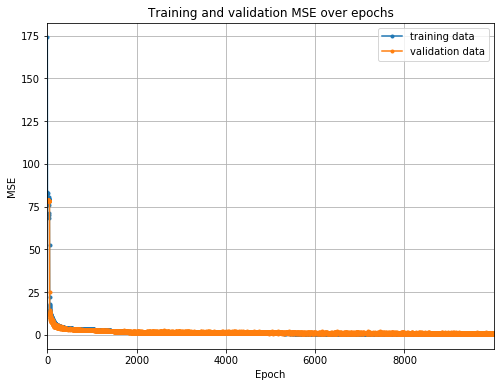

In [98]:
fig, ax = plt.subplots(figsize=(8,6))
result.plot(y=['loss', 'val_loss'], marker='.', ax=ax)
ax.set_xlabel('Epoch')
ax.set_ylabel('MSE')
ax.set_title('Training and validation MSE over epochs')
ax.legend(['training data', 'validation data'])
ax.grid()
fig.savefig('Training and validation MSE over epochs')

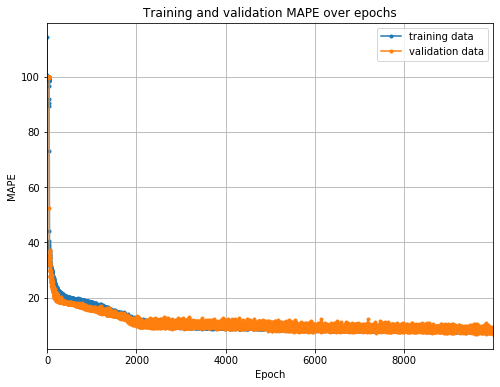

In [99]:
fig, ax = plt.subplots(figsize=(8,6))
result.plot(y=['mape', 'val_mape'], marker='.', ax=ax)
ax.set_xlabel('Epoch')
ax.set_ylabel('MAPE')
ax.set_title('Training and validation MAPE over epochs')
ax.legend(['training data', 'validation data'])
ax.grid()
fig.savefig('Training and validation MAPE over epochs')

In [100]:
train_loss = model.evaluate(x_train, y_train, verbose=0)[0]
train_mape = model.evaluate(x_train, y_train, verbose=0)[1]
#train_mse = model.evaluate(x_train, y_train, verbose=0)[2]
print('training loss (MSE):', train_loss, '\ntraining MAPE:', train_mape, '%\n')
#print('training MSE (custom):', train_mse, '\n')

val_loss = model.evaluate(x_val, y_val, verbose=0)[0]
val_mape = model.evaluate(x_val, y_val, verbose=0)[1]
#val_mse = model.evaluate(x_val, y_val, verbose=0)[2]
print('validation loss (MSE):', val_loss, '\nvalidation MAPE:', val_mape, '%\n')
#print('validation MSE (custom):', val_mse, '\n')

test_loss = model.evaluate(x_test, y_test, verbose=0)[0]
test_mape = model.evaluate(x_test, y_test, verbose=0)[1]
#test_mse = model.evaluate(x_test, y_test, verbose=0)[2]
print('test loss (MSE):', test_loss, '\ntest MAPE:', test_mape, '%')
#print('test MSE (custom):', test_mse, '\n')

training loss (MSE): 0.5926596654526797 
training MAPE: 7.1849437 %

validation loss (MSE): 0.6312716878645601 
validation MAPE: 7.4196963 %

test loss (MSE): 0.6816599155727185 
test MAPE: 7.3745637 %


### 4th try

In [101]:
#create model instance
model = Sequential()

#input layer
model.add(Dense(units=32, input_dim=n_features, activation='relu')) 

#hidden layers
model.add(Dense(units=24, input_dim=n_features, activation='relu', 
                      use_bias=True, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(rate=0.2))
model.add(Dense(units=16, input_dim=n_features, activation='relu', 
                      use_bias=True, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(rate=0.2))
#...

#output layer
model.add(Dense(units=1, activation='relu'))

In [102]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_37 (Dense)             (None, 24)                792       
_________________________________________________________________
dropout_8 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 16)                400       
_________________________________________________________________
dropout_9 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 17        
Total params: 1,561
Trainable params: 1,561
Non-trainable params: 0
____________________________________________________

In [103]:
# Compile the model using adam as optimizer and custom_loss as the loss. Use MAPE and MSE as metrics
model.compile(optimizer='adam', loss='mse', metrics=['mape'])

In [104]:
# Train the model. use batch_size=32 and train it for 3000 epochs. use x_val and y_val as validation_data
history = model.fit(x_train, y_train, batch_size=64, epochs=10000, validation_data=(x_val, y_val))

Train on 1533 samples, validate on 171 samples
Epoch 1/10000
1533/1533 [==============================] - 0s 286us/sample - loss: 675.1796 - mape: 189.6570 - val_loss: 78.3961 - val_mape: 100.0000
Epoch 2/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 96.2325 - mape: 100.9137 - val_loss: 78.3915 - val_mape: 100.0000
Epoch 3/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 83.0198 - mape: 98.8722 - val_loss: 78.3877 - val_mape: 100.0000
Epoch 4/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 78.1024 - mape: 97.3650 - val_loss: 78.3846 - val_mape: 100.0000
Epoch 5/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 77.9386 - mape: 97.8490 - val_loss: 78.3821 - val_mape: 100.0000
Epoch 6/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 79.1280 - mape: 97.9060 - val_loss: 78.3800 - val_mape: 100.0000
Epoch 7/10000
1533/1533 [==============================] - 0s 30us/

1533/1533 [==============================] - 0s 27us/sample - loss: 9.4712 - mape: 29.3865 - val_loss: 6.3367 - val_mape: 23.8883
Epoch 56/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 9.4182 - mape: 28.8947 - val_loss: 7.4113 - val_mape: 25.7150
Epoch 57/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 10.1016 - mape: 30.2078 - val_loss: 7.3140 - val_mape: 25.4936
Epoch 58/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 9.5289 - mape: 29.4649 - val_loss: 8.2169 - val_mape: 26.9224
Epoch 59/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 9.9970 - mape: 30.1242 - val_loss: 6.4488 - val_mape: 23.9769
Epoch 60/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 9.2311 - mape: 28.9861 - val_loss: 5.6305 - val_mape: 22.7066
Epoch 61/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 9.1207 - mape: 28.6941 - val_loss: 7.7753 - val_mape: 26.2234

1533/1533 [==============================] - 0s 27us/sample - loss: 6.5178 - mape: 25.0299 - val_loss: 5.5782 - val_mape: 21.8433
Epoch 112/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 6.9759 - mape: 25.8448 - val_loss: 4.8307 - val_mape: 20.6650
Epoch 113/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 6.8010 - mape: 25.9231 - val_loss: 6.1821 - val_mape: 22.8520
Epoch 114/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 6.8473 - mape: 25.7895 - val_loss: 6.5735 - val_mape: 23.4921
Epoch 115/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 6.9190 - mape: 25.4761 - val_loss: 4.7732 - val_mape: 20.5138
Epoch 116/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 6.6890 - mape: 25.6883 - val_loss: 6.4191 - val_mape: 23.1773
Epoch 117/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 6.8539 - mape: 25.5710 - val_loss: 6.7279 - val_mape: 23

1533/1533 [==============================] - 0s 28us/sample - loss: 5.3132 - mape: 22.9958 - val_loss: 4.2821 - val_mape: 19.2141
Epoch 168/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 5.5713 - mape: 23.6451 - val_loss: 3.8479 - val_mape: 18.6583
Epoch 169/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 5.3283 - mape: 22.8171 - val_loss: 3.5207 - val_mape: 18.5042
Epoch 170/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 5.8169 - mape: 23.6272 - val_loss: 3.7211 - val_mape: 18.5496
Epoch 171/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 5.7098 - mape: 23.5238 - val_loss: 4.4505 - val_mape: 19.3825
Epoch 172/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 5.7278 - mape: 23.4805 - val_loss: 4.1144 - val_mape: 18.8767
Epoch 173/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 5.5947 - mape: 23.3541 - val_loss: 4.3945 - val_mape: 19

Epoch 223/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 5.0813 - mape: 22.6435 - val_loss: 3.8788 - val_mape: 18.7148
Epoch 224/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 5.2718 - mape: 22.9904 - val_loss: 3.8036 - val_mape: 18.6361
Epoch 225/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 4.9504 - mape: 22.4370 - val_loss: 4.0405 - val_mape: 18.8940
Epoch 226/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 5.0466 - mape: 22.6607 - val_loss: 3.7190 - val_mape: 18.6625
Epoch 227/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 4.9757 - mape: 22.5784 - val_loss: 4.2384 - val_mape: 19.0585
Epoch 228/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 5.0237 - mape: 22.5698 - val_loss: 3.9703 - val_mape: 18.7167
Epoch 229/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 5.1452 - mape: 22.4850 - val_loss: 4.339

Epoch 279/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 4.9038 - mape: 22.4656 - val_loss: 3.6755 - val_mape: 18.2754
Epoch 280/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 4.7567 - mape: 21.6881 - val_loss: 3.7746 - val_mape: 18.4219
Epoch 281/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 4.4302 - mape: 21.3569 - val_loss: 3.5509 - val_mape: 18.2435
Epoch 282/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 4.8168 - mape: 21.7429 - val_loss: 3.6159 - val_mape: 18.2472
Epoch 283/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 4.7924 - mape: 21.9957 - val_loss: 3.4104 - val_mape: 18.1963
Epoch 284/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 4.6466 - mape: 21.9893 - val_loss: 3.4735 - val_mape: 18.2218
Epoch 285/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 4.7134 - mape: 21.9673 - val_loss: 3.497

1533/1533 [==============================] - 0s 29us/sample - loss: 4.5285 - mape: 21.5920 - val_loss: 3.4404 - val_mape: 18.4438
Epoch 335/10000
1533/1533 [==============================] - ETA: 0s - loss: 6.1715 - mape: 23.985 - 0s 29us/sample - loss: 4.4983 - mape: 21.7090 - val_loss: 3.7831 - val_mape: 18.6342
Epoch 336/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 4.5204 - mape: 21.5019 - val_loss: 3.9180 - val_mape: 18.6004
Epoch 337/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 4.4520 - mape: 21.3115 - val_loss: 3.3496 - val_mape: 18.6962
Epoch 338/10000
1533/1533 [==============================] - ETA: 0s - loss: 4.0992 - mape: 22.276 - 0s 27us/sample - loss: 4.6026 - mape: 22.0588 - val_loss: 3.4757 - val_mape: 18.6172
Epoch 339/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 4.5442 - mape: 21.8067 - val_loss: 3.6644 - val_mape: 18.3416
Epoch 340/10000
1533/1533 [==============================] -

1533/1533 [==============================] - 0s 29us/sample - loss: 4.4039 - mape: 21.5108 - val_loss: 3.2691 - val_mape: 18.6331
Epoch 390/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 4.4948 - mape: 21.7229 - val_loss: 3.4521 - val_mape: 18.0390
Epoch 391/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 4.1347 - mape: 20.7929 - val_loss: 3.3713 - val_mape: 18.1051
Epoch 392/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 4.2137 - mape: 21.1662 - val_loss: 3.3779 - val_mape: 18.4150
Epoch 393/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 4.2282 - mape: 20.6841 - val_loss: 3.5460 - val_mape: 18.4023
Epoch 394/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 4.2893 - mape: 21.1554 - val_loss: 3.3808 - val_mape: 18.0861
Epoch 395/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 4.2930 - mape: 21.3904 - val_loss: 3.4026 - val_mape: 18

1533/1533 [==============================] - 0s 28us/sample - loss: 4.1059 - mape: 20.7011 - val_loss: 3.3868 - val_mape: 18.6047
Epoch 446/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 4.1073 - mape: 20.9206 - val_loss: 3.2298 - val_mape: 17.9084
Epoch 447/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 3.9506 - mape: 20.2053 - val_loss: 3.2627 - val_mape: 17.9281
Epoch 448/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.9103 - mape: 19.9122 - val_loss: 3.1786 - val_mape: 18.2477
Epoch 449/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 3.8215 - mape: 20.1939 - val_loss: 3.5538 - val_mape: 17.8498
Epoch 450/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 4.0728 - mape: 20.4120 - val_loss: 3.4208 - val_mape: 17.8497
Epoch 451/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 4.1421 - mape: 20.5556 - val_loss: 3.1823 - val_mape: 17

1533/1533 [==============================] - 0s 27us/sample - loss: 3.8527 - mape: 20.0893 - val_loss: 3.1815 - val_mape: 17.4234
Epoch 502/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.7829 - mape: 19.8845 - val_loss: 3.1727 - val_mape: 17.3405
Epoch 503/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.8806 - mape: 19.8079 - val_loss: 3.0388 - val_mape: 17.8680
Epoch 504/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.9392 - mape: 20.0939 - val_loss: 3.2639 - val_mape: 18.1885
Epoch 505/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.9534 - mape: 20.3482 - val_loss: 3.2828 - val_mape: 17.9103
Epoch 506/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.9616 - mape: 20.3090 - val_loss: 3.1505 - val_mape: 17.8536
Epoch 507/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.8002 - mape: 20.0394 - val_loss: 3.1107 - val_mape: 17

1533/1533 [==============================] - 0s 27us/sample - loss: 3.7833 - mape: 19.9578 - val_loss: 3.1211 - val_mape: 17.6094
Epoch 558/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.8008 - mape: 19.8607 - val_loss: 3.1984 - val_mape: 18.0520
Epoch 559/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.8615 - mape: 20.1189 - val_loss: 3.0750 - val_mape: 18.0587
Epoch 560/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.7550 - mape: 19.6816 - val_loss: 3.1448 - val_mape: 17.6543
Epoch 561/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 3.7916 - mape: 19.9819 - val_loss: 3.1571 - val_mape: 17.1132
Epoch 562/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 3.7800 - mape: 19.9180 - val_loss: 3.0746 - val_mape: 17.3192
Epoch 563/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.7919 - mape: 19.9694 - val_loss: 3.1778 - val_mape: 17

1533/1533 [==============================] - 0s 29us/sample - loss: 3.6689 - mape: 19.5272 - val_loss: 3.0604 - val_mape: 16.9824
Epoch 614/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.7149 - mape: 19.5033 - val_loss: 3.0775 - val_mape: 16.9769
Epoch 615/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.7502 - mape: 19.5933 - val_loss: 3.0867 - val_mape: 17.1155
Epoch 616/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.8103 - mape: 19.8594 - val_loss: 3.1167 - val_mape: 17.1312
Epoch 617/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.6012 - mape: 19.4800 - val_loss: 3.3033 - val_mape: 16.9595
Epoch 618/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.6453 - mape: 19.4993 - val_loss: 3.1036 - val_mape: 16.9243
Epoch 619/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 3.7046 - mape: 19.2083 - val_loss: 3.2077 - val_mape: 17

1533/1533 [==============================] - 0s 29us/sample - loss: 3.7599 - mape: 19.7551 - val_loss: 3.0118 - val_mape: 16.9476
Epoch 670/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.6699 - mape: 19.6152 - val_loss: 3.4268 - val_mape: 17.7640
Epoch 671/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.7011 - mape: 19.4837 - val_loss: 3.2350 - val_mape: 17.4184
Epoch 672/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.5853 - mape: 19.4605 - val_loss: 3.2871 - val_mape: 17.0643
Epoch 673/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.7510 - mape: 19.7069 - val_loss: 3.0400 - val_mape: 17.3808
Epoch 674/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.5753 - mape: 19.2904 - val_loss: 3.1221 - val_mape: 17.3347
Epoch 675/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.5736 - mape: 19.4866 - val_loss: 3.1989 - val_mape: 17

1533/1533 [==============================] - 0s 28us/sample - loss: 3.5608 - mape: 19.3233 - val_loss: 3.0075 - val_mape: 17.2002
Epoch 726/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.5610 - mape: 19.1762 - val_loss: 3.0118 - val_mape: 16.6934
Epoch 727/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.6840 - mape: 19.5996 - val_loss: 3.0685 - val_mape: 17.1865
Epoch 728/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.5402 - mape: 19.1716 - val_loss: 3.0157 - val_mape: 17.3189
Epoch 729/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.6500 - mape: 19.5351 - val_loss: 3.0653 - val_mape: 17.5164
Epoch 730/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 3.5390 - mape: 19.4006 - val_loss: 3.2618 - val_mape: 17.7499
Epoch 731/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.5814 - mape: 19.3479 - val_loss: 3.0522 - val_mape: 17

1533/1533 [==============================] - 0s 26us/sample - loss: 3.6137 - mape: 19.4432 - val_loss: 3.1537 - val_mape: 17.1808
Epoch 782/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.5469 - mape: 18.9952 - val_loss: 3.2890 - val_mape: 17.2605
Epoch 783/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.6443 - mape: 19.4922 - val_loss: 3.1052 - val_mape: 16.5954
Epoch 784/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.5837 - mape: 19.4414 - val_loss: 3.1401 - val_mape: 16.5719
Epoch 785/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 3.6383 - mape: 19.4485 - val_loss: 2.9570 - val_mape: 17.1105
Epoch 786/10000
1533/1533 [==============================] - 0s 58us/sample - loss: 3.5331 - mape: 19.4127 - val_loss: 2.9387 - val_mape: 16.7522
Epoch 787/10000
1533/1533 [==============================] - 0s 41us/sample - loss: 3.5159 - mape: 19.3449 - val_loss: 2.9072 - val_mape: 16

1533/1533 [==============================] - 0s 26us/sample - loss: 3.5286 - mape: 18.9940 - val_loss: 2.8630 - val_mape: 17.0305
Epoch 837/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.4974 - mape: 19.2241 - val_loss: 2.8960 - val_mape: 16.5711
Epoch 838/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.5226 - mape: 19.2520 - val_loss: 2.8829 - val_mape: 16.5234
Epoch 839/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.4177 - mape: 19.0409 - val_loss: 3.1398 - val_mape: 16.5824
Epoch 840/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.5142 - mape: 19.0730 - val_loss: 2.8791 - val_mape: 16.6658
Epoch 841/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 3.4467 - mape: 19.0135 - val_loss: 3.0735 - val_mape: 16.7834
Epoch 842/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.4906 - mape: 19.0089 - val_loss: 2.8886 - val_mape: 16

1533/1533 [==============================] - 0s 29us/sample - loss: 3.4682 - mape: 18.9532 - val_loss: 2.8915 - val_mape: 17.4028
Epoch 893/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 3.4707 - mape: 19.0639 - val_loss: 2.9225 - val_mape: 17.1057
Epoch 894/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.5026 - mape: 19.1616 - val_loss: 2.9679 - val_mape: 16.2991
Epoch 895/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 3.6191 - mape: 20.0381 - val_loss: 3.0423 - val_mape: 17.3398
Epoch 896/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.4623 - mape: 18.7839 - val_loss: 2.8779 - val_mape: 16.9476
Epoch 897/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 3.4531 - mape: 19.1002 - val_loss: 3.0160 - val_mape: 16.7415
Epoch 898/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.4871 - mape: 19.2660 - val_loss: 2.9386 - val_mape: 17

1533/1533 [==============================] - 0s 31us/sample - loss: 3.3934 - mape: 18.8543 - val_loss: 2.8045 - val_mape: 16.2236
Epoch 949/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 3.4352 - mape: 19.2847 - val_loss: 2.8063 - val_mape: 16.1599
Epoch 950/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.5723 - mape: 19.5562 - val_loss: 3.0087 - val_mape: 16.2990
Epoch 951/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 3.4665 - mape: 18.9125 - val_loss: 2.8392 - val_mape: 16.7842
Epoch 952/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 3.4534 - mape: 19.1462 - val_loss: 2.8625 - val_mape: 16.8499
Epoch 953/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 3.4524 - mape: 19.1756 - val_loss: 2.9420 - val_mape: 16.7400
Epoch 954/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 3.3764 - mape: 18.7677 - val_loss: 2.8982 - val_mape: 16

Epoch 1004/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 3.4454 - mape: 18.9060 - val_loss: 2.7490 - val_mape: 16.1565
Epoch 1005/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.3718 - mape: 19.0004 - val_loss: 2.8582 - val_mape: 16.1973
Epoch 1006/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 3.2589 - mape: 18.5505 - val_loss: 2.6935 - val_mape: 16.2980
Epoch 1007/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 3.3724 - mape: 18.9243 - val_loss: 2.8178 - val_mape: 16.3773
Epoch 1008/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 3.4950 - mape: 19.3807 - val_loss: 2.7563 - val_mape: 16.3431
Epoch 1009/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 3.3367 - mape: 18.6957 - val_loss: 2.6990 - val_mape: 16.1158
Epoch 1010/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 3.4397 - mape: 19.0708 - val_loss

1533/1533 [==============================] - 0s 33us/sample - loss: 3.3557 - mape: 19.0986 - val_loss: 2.9946 - val_mape: 16.2655
Epoch 1060/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 3.3664 - mape: 18.7373 - val_loss: 2.7608 - val_mape: 15.8971
Epoch 1061/10000
1533/1533 [==============================] - ETA: 0s - loss: 4.0444 - mape: 21.584 - 0s 30us/sample - loss: 3.3550 - mape: 18.8730 - val_loss: 2.7881 - val_mape: 16.0389
Epoch 1062/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 3.3633 - mape: 18.8075 - val_loss: 2.7839 - val_mape: 16.9020
Epoch 1063/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 3.4415 - mape: 19.0733 - val_loss: 2.7904 - val_mape: 16.2221
Epoch 1064/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 3.3528 - mape: 18.8050 - val_loss: 2.9058 - val_mape: 16.5242
Epoch 1065/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 3.3544 - m

1533/1533 [==============================] - 0s 31us/sample - loss: 3.3053 - mape: 18.5797 - val_loss: 2.7629 - val_mape: 16.2620
Epoch 1115/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 3.3686 - mape: 18.8188 - val_loss: 2.9737 - val_mape: 17.1777
Epoch 1116/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 3.2786 - mape: 18.7554 - val_loss: 2.6131 - val_mape: 16.2288
Epoch 1117/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 3.3469 - mape: 18.6707 - val_loss: 2.7011 - val_mape: 15.8383
Epoch 1118/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.3104 - mape: 18.8903 - val_loss: 3.0795 - val_mape: 16.1665
Epoch 1119/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 3.4270 - mape: 19.1203 - val_loss: 2.9810 - val_mape: 16.4879
Epoch 1120/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 3.3035 - mape: 18.7612 - val_loss: 2.8496 - val_ma

1533/1533 [==============================] - 0s 30us/sample - loss: 3.5043 - mape: 19.6460 - val_loss: 2.8840 - val_mape: 16.9944
Epoch 1170/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 3.2285 - mape: 18.5827 - val_loss: 2.8102 - val_mape: 16.2159
Epoch 1171/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 3.3336 - mape: 18.8320 - val_loss: 2.7796 - val_mape: 16.6901
Epoch 1172/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 3.2950 - mape: 18.7662 - val_loss: 2.8943 - val_mape: 16.7750
Epoch 1173/10000
1533/1533 [==============================] - ETA: 0s - loss: 3.0741 - mape: 18.791 - 0s 31us/sample - loss: 3.3009 - mape: 18.7372 - val_loss: 2.7296 - val_mape: 15.6783
Epoch 1174/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 3.2536 - mape: 18.4985 - val_loss: 2.8603 - val_mape: 15.8060
Epoch 1175/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.3080 - m

1533/1533 [==============================] - 0s 33us/sample - loss: 3.2619 - mape: 18.5656 - val_loss: 2.6782 - val_mape: 15.5613
Epoch 1225/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 3.3276 - mape: 18.7668 - val_loss: 2.5784 - val_mape: 15.7284
Epoch 1226/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.3702 - mape: 19.1704 - val_loss: 2.6412 - val_mape: 15.5254
Epoch 1227/10000
1533/1533 [==============================] - ETA: 0s - loss: 2.8257 - mape: 17.430 - 0s 34us/sample - loss: 3.2288 - mape: 18.3676 - val_loss: 2.6726 - val_mape: 16.0204
Epoch 1228/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 3.3307 - mape: 18.8917 - val_loss: 2.7405 - val_mape: 15.8331
Epoch 1229/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 3.2947 - mape: 18.5834 - val_loss: 2.8071 - val_mape: 15.9286
Epoch 1230/10000
1533/1533 [==============================] - 0s 53us/sample - loss: 3.2045 - m

1533/1533 [==============================] - 0s 30us/sample - loss: 3.1492 - mape: 18.2607 - val_loss: 2.6267 - val_mape: 16.4959
Epoch 1280/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 3.2240 - mape: 18.6157 - val_loss: 3.1045 - val_mape: 16.7890
Epoch 1281/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 3.2178 - mape: 18.5028 - val_loss: 2.5526 - val_mape: 15.6839
Epoch 1282/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 3.1828 - mape: 18.5251 - val_loss: 2.7279 - val_mape: 15.6909
Epoch 1283/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 3.1504 - mape: 18.1458 - val_loss: 2.5722 - val_mape: 15.4389
Epoch 1284/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 3.0898 - mape: 18.1366 - val_loss: 2.6414 - val_mape: 15.9641
Epoch 1285/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 3.1719 - mape: 18.0984 - val_loss: 2.6039 - val_ma

1533/1533 [==============================] - 0s 30us/sample - loss: 3.1806 - mape: 18.2040 - val_loss: 2.8976 - val_mape: 15.8280
Epoch 1335/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 3.1262 - mape: 18.2170 - val_loss: 2.4575 - val_mape: 15.4822
Epoch 1336/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 3.0464 - mape: 17.9563 - val_loss: 2.6892 - val_mape: 15.9394
Epoch 1337/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 3.3317 - mape: 18.7516 - val_loss: 2.5016 - val_mape: 16.5874
Epoch 1338/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.2072 - mape: 18.4948 - val_loss: 2.4439 - val_mape: 15.9502
Epoch 1339/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 3.1378 - mape: 18.2960 - val_loss: 2.7549 - val_mape: 15.7674
Epoch 1340/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 3.1770 - mape: 18.3218 - val_loss: 2.7538 - val_ma

1533/1533 [==============================] - 0s 25us/sample - loss: 3.0453 - mape: 17.9917 - val_loss: 2.6207 - val_mape: 15.0102
Epoch 1390/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 3.0604 - mape: 18.2391 - val_loss: 2.7729 - val_mape: 15.7705
Epoch 1391/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 3.2157 - mape: 18.1749 - val_loss: 2.4714 - val_mape: 16.0040
Epoch 1392/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 3.0702 - mape: 17.7480 - val_loss: 2.5434 - val_mape: 15.0202
Epoch 1393/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 2.9902 - mape: 17.7803 - val_loss: 2.9933 - val_mape: 15.4113
Epoch 1394/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.9908 - mape: 17.8977 - val_loss: 3.1477 - val_mape: 15.8396
Epoch 1395/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.0883 - mape: 18.1602 - val_loss: 2.7347 - val_ma

Epoch 1445/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.9460 - mape: 17.7761 - val_loss: 2.5457 - val_mape: 15.4236
Epoch 1446/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.8049 - mape: 17.1195 - val_loss: 2.6969 - val_mape: 15.1927
Epoch 1447/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 3.0137 - mape: 17.7976 - val_loss: 2.4407 - val_mape: 14.8748
Epoch 1448/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.9246 - mape: 17.5466 - val_loss: 2.3198 - val_mape: 14.8739
Epoch 1449/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.0263 - mape: 17.8506 - val_loss: 2.8827 - val_mape: 16.0353
Epoch 1450/10000
1533/1533 [==============================] - 0s 24us/sample - loss: 2.8941 - mape: 17.2424 - val_loss: 2.5478 - val_mape: 15.4460
Epoch 1451/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.0217 - mape: 17.7303 - val_loss

1533/1533 [==============================] - 0s 27us/sample - loss: 2.7394 - mape: 16.7786 - val_loss: 3.0495 - val_mape: 16.1318
Epoch 1501/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.7206 - mape: 16.6798 - val_loss: 3.0308 - val_mape: 15.9612
Epoch 1502/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 2.7446 - mape: 16.7100 - val_loss: 3.1204 - val_mape: 15.8657
Epoch 1503/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 2.7344 - mape: 16.5806 - val_loss: 2.3791 - val_mape: 14.8621
Epoch 1504/10000
1533/1533 [==============================] - 0s 24us/sample - loss: 2.6778 - mape: 16.6104 - val_loss: 3.0407 - val_mape: 15.5520
Epoch 1505/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 2.8218 - mape: 17.0716 - val_loss: 2.6991 - val_mape: 14.8330
Epoch 1506/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 2.7303 - mape: 16.6590 - val_loss: 2.6517 - val_ma

1533/1533 [==============================] - 0s 50us/sample - loss: 2.5772 - mape: 16.0342 - val_loss: 3.0626 - val_mape: 15.6214
Epoch 1556/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 2.7709 - mape: 16.6946 - val_loss: 2.6057 - val_mape: 14.6600
Epoch 1557/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 3.0172 - mape: 17.2649 - val_loss: 2.1098 - val_mape: 14.1966
Epoch 1558/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.7889 - mape: 16.5569 - val_loss: 3.5601 - val_mape: 16.5639
Epoch 1559/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.6835 - mape: 16.5407 - val_loss: 3.0918 - val_mape: 15.9905
Epoch 1560/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.5670 - mape: 15.8631 - val_loss: 2.3441 - val_mape: 14.3997
Epoch 1561/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.5916 - mape: 16.3749 - val_loss: 2.6340 - val_ma

Epoch 1611/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.7062 - mape: 16.7141 - val_loss: 2.5061 - val_mape: 14.3549
Epoch 1612/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.4685 - mape: 15.8937 - val_loss: 2.9273 - val_mape: 15.2027
Epoch 1613/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.5596 - mape: 15.8679 - val_loss: 2.4764 - val_mape: 14.0615
Epoch 1614/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 2.5589 - mape: 15.9414 - val_loss: 2.3075 - val_mape: 13.8921
Epoch 1615/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.4990 - mape: 15.7399 - val_loss: 2.8369 - val_mape: 14.9877
Epoch 1616/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.5912 - mape: 16.3245 - val_loss: 2.7493 - val_mape: 14.9170
Epoch 1617/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 2.5569 - mape: 16.0073 - val_loss

Epoch 1667/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.4848 - mape: 15.6032 - val_loss: 3.0867 - val_mape: 15.4403
Epoch 1668/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.3983 - mape: 15.4417 - val_loss: 2.9388 - val_mape: 15.1999
Epoch 1669/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 2.3727 - mape: 15.1418 - val_loss: 3.2357 - val_mape: 15.7978
Epoch 1670/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.4012 - mape: 15.1718 - val_loss: 2.4797 - val_mape: 14.2359
Epoch 1671/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 2.3459 - mape: 15.2172 - val_loss: 2.9260 - val_mape: 15.4790
Epoch 1672/10000
1533/1533 [==============================] - 0s 60us/sample - loss: 2.3657 - mape: 15.3221 - val_loss: 2.6795 - val_mape: 14.5951
Epoch 1673/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.4356 - mape: 15.3844 - val_loss

1533/1533 [==============================] - 0s 47us/sample - loss: 2.3289 - mape: 14.9680 - val_loss: 3.3282 - val_mape: 16.0368
Epoch 1723/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 2.4960 - mape: 15.4984 - val_loss: 3.0966 - val_mape: 15.3793
Epoch 1724/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.3081 - mape: 14.8469 - val_loss: 3.0116 - val_mape: 15.1141
Epoch 1725/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.2230 - mape: 14.7015 - val_loss: 2.1525 - val_mape: 13.1546
Epoch 1726/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.2946 - mape: 14.8913 - val_loss: 2.6948 - val_mape: 14.6386
Epoch 1727/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.3832 - mape: 15.3630 - val_loss: 2.9500 - val_mape: 15.0195
Epoch 1728/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.3052 - mape: 14.8356 - val_loss: 3.2109 - val_ma

1533/1533 [==============================] - 0s 31us/sample - loss: 2.3891 - mape: 15.1204 - val_loss: 3.3880 - val_mape: 16.0272
Epoch 1778/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 2.3560 - mape: 14.7250 - val_loss: 3.5589 - val_mape: 16.3581
Epoch 1779/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 2.3973 - mape: 15.1626 - val_loss: 4.3404 - val_mape: 18.0484
Epoch 1780/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 2.2659 - mape: 14.8833 - val_loss: 3.3891 - val_mape: 16.1198
Epoch 1781/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 2.1924 - mape: 14.6492 - val_loss: 2.9594 - val_mape: 15.2031
Epoch 1782/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 2.2714 - mape: 14.7740 - val_loss: 2.1925 - val_mape: 13.2891
Epoch 1783/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 2.2322 - mape: 14.6118 - val_loss: 3.5329 - val_ma

Epoch 1833/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.2589 - mape: 14.6748 - val_loss: 3.4009 - val_mape: 15.9697
Epoch 1834/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.2923 - mape: 14.8388 - val_loss: 3.8861 - val_mape: 16.9628
Epoch 1835/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 2.2065 - mape: 14.5136 - val_loss: 3.1921 - val_mape: 15.6057
Epoch 1836/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 2.2593 - mape: 14.6529 - val_loss: 3.8124 - val_mape: 16.8847
Epoch 1837/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 2.2079 - mape: 14.2188 - val_loss: 2.1559 - val_mape: 13.0369
Epoch 1838/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 2.4847 - mape: 15.3640 - val_loss: 2.7022 - val_mape: 14.3080
Epoch 1839/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 2.2576 - mape: 14.6343 - val_loss

1533/1533 [==============================] - 0s 30us/sample - loss: 2.2569 - mape: 14.5462 - val_loss: 3.2552 - val_mape: 15.6765
Epoch 1889/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 2.2187 - mape: 14.5450 - val_loss: 2.7112 - val_mape: 14.4414
Epoch 1890/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 2.0021 - mape: 13.7621 - val_loss: 3.1791 - val_mape: 15.4671
Epoch 1891/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.2571 - mape: 14.3296 - val_loss: 2.7529 - val_mape: 14.5495
Epoch 1892/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 2.1311 - mape: 14.2123 - val_loss: 3.3322 - val_mape: 16.2269
Epoch 1893/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 2.1411 - mape: 14.1335 - val_loss: 2.6315 - val_mape: 14.2211
Epoch 1894/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.1278 - mape: 14.3053 - val_loss: 2.7528 - val_ma

1533/1533 [==============================] - 0s 35us/sample - loss: 2.1081 - mape: 13.9951 - val_loss: 3.5868 - val_mape: 16.6157
Epoch 1944/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 2.1851 - mape: 14.4387 - val_loss: 3.2835 - val_mape: 15.9540
Epoch 1945/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 2.1094 - mape: 13.7928 - val_loss: 3.3559 - val_mape: 16.1219
Epoch 1946/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.1130 - mape: 14.1138 - val_loss: 4.2545 - val_mape: 17.8591
Epoch 1947/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 2.1796 - mape: 14.3368 - val_loss: 3.8563 - val_mape: 17.0808
Epoch 1948/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 2.1142 - mape: 14.0763 - val_loss: 3.5471 - val_mape: 16.5713
Epoch 1949/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 2.1641 - mape: 14.1534 - val_loss: 3.1582 - val_ma

1533/1533 [==============================] - 0s 30us/sample - loss: 2.1715 - mape: 14.1866 - val_loss: 2.8646 - val_mape: 15.0142
Epoch 1999/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 2.1344 - mape: 14.1959 - val_loss: 4.6712 - val_mape: 18.7872
Epoch 2000/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.0220 - mape: 13.5750 - val_loss: 2.4678 - val_mape: 13.8701
Epoch 2001/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.9826 - mape: 13.4470 - val_loss: 3.5774 - val_mape: 16.6143
Epoch 2002/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 2.6277 - mape: 15.5206 - val_loss: 2.1807 - val_mape: 13.3681
Epoch 2003/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 2.5681 - mape: 15.7403 - val_loss: 3.2145 - val_mape: 15.8101
Epoch 2004/10000
1533/1533 [==============================] - 0s 46us/sample - loss: 2.2469 - mape: 14.4946 - val_loss: 4.0935 - val_ma

Epoch 2054/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 2.1196 - mape: 14.0914 - val_loss: 3.7405 - val_mape: 17.0452
Epoch 2055/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 2.2563 - mape: 14.6514 - val_loss: 3.9281 - val_mape: 17.4232
Epoch 2056/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.9515 - mape: 13.3838 - val_loss: 3.7848 - val_mape: 17.1354
Epoch 2057/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 2.0471 - mape: 13.9161 - val_loss: 3.3227 - val_mape: 16.0745
Epoch 2058/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 2.0579 - mape: 13.9694 - val_loss: 2.1830 - val_mape: 13.1280
Epoch 2059/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 2.4650 - mape: 15.0442 - val_loss: 3.2941 - val_mape: 16.1474
Epoch 2060/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.9897 - mape: 13.6201 - val_loss

1533/1533 [==============================] - 0s 31us/sample - loss: 2.2744 - mape: 14.4947 - val_loss: 2.2854 - val_mape: 13.4255
Epoch 2110/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.9970 - mape: 13.7002 - val_loss: 3.4482 - val_mape: 16.1718
Epoch 2111/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.9958 - mape: 13.6669 - val_loss: 4.3981 - val_mape: 18.2525
Epoch 2112/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 2.1076 - mape: 14.0434 - val_loss: 3.5313 - val_mape: 16.5733
Epoch 2113/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.9132 - mape: 13.2652 - val_loss: 3.1501 - val_mape: 15.7105
Epoch 2114/10000
1533/1533 [==============================] - 0s 39us/sample - loss: 1.9976 - mape: 13.5876 - val_loss: 2.7038 - val_mape: 14.5918
Epoch 2115/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.1201 - mape: 14.0726 - val_loss: 5.1429 - val_ma

1533/1533 [==============================] - 0s 44us/sample - loss: 2.0260 - mape: 13.6528 - val_loss: 3.8871 - val_mape: 17.4824
Epoch 2165/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 2.0435 - mape: 14.0047 - val_loss: 4.0493 - val_mape: 17.6550
Epoch 2166/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 2.2722 - mape: 14.4072 - val_loss: 4.8852 - val_mape: 19.0771
Epoch 2167/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.3217 - mape: 14.5580 - val_loss: 3.6038 - val_mape: 16.7075
Epoch 2168/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.0273 - mape: 13.6758 - val_loss: 4.2191 - val_mape: 17.9128
Epoch 2169/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 2.0390 - mape: 13.7131 - val_loss: 3.1485 - val_mape: 15.6904
Epoch 2170/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.9552 - mape: 13.3214 - val_loss: 3.9897 - val_ma

1533/1533 [==============================] - 0s 33us/sample - loss: 1.8556 - mape: 13.0360 - val_loss: 4.4701 - val_mape: 18.3727
Epoch 2220/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 2.1534 - mape: 14.0864 - val_loss: 2.8819 - val_mape: 15.0078
Epoch 2221/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.2151 - mape: 14.2313 - val_loss: 4.3267 - val_mape: 18.0820
Epoch 2222/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.8907 - mape: 13.1553 - val_loss: 2.9682 - val_mape: 15.2974
Epoch 2223/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.0507 - mape: 13.7030 - val_loss: 3.7632 - val_mape: 17.0823
Epoch 2224/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 1.9860 - mape: 13.5294 - val_loss: 3.4497 - val_mape: 16.5207
Epoch 2225/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.0067 - mape: 13.6652 - val_loss: 4.4651 - val_ma

1533/1533 [==============================] - 0s 38us/sample - loss: 1.8244 - mape: 12.9817 - val_loss: 3.8934 - val_mape: 17.2952
Epoch 2275/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.0298 - mape: 13.7580 - val_loss: 3.8704 - val_mape: 17.3153
Epoch 2276/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.8836 - mape: 13.0843 - val_loss: 3.4894 - val_mape: 16.7907
Epoch 2277/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.9681 - mape: 13.3154 - val_loss: 4.0904 - val_mape: 17.5318
Epoch 2278/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.9111 - mape: 13.2356 - val_loss: 3.2854 - val_mape: 15.9927
Epoch 2279/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.9435 - mape: 13.4276 - val_loss: 4.4041 - val_mape: 18.2446
Epoch 2280/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 2.1053 - mape: 14.2962 - val_loss: 3.0427 - val_ma

1533/1533 [==============================] - 0s 33us/sample - loss: 1.9917 - mape: 13.7511 - val_loss: 3.2499 - val_mape: 16.6164
Epoch 2330/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.8980 - mape: 13.1797 - val_loss: 3.8260 - val_mape: 17.2870
Epoch 2331/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.9253 - mape: 13.1993 - val_loss: 3.0714 - val_mape: 15.4153
Epoch 2332/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 2.0192 - mape: 13.5830 - val_loss: 4.0037 - val_mape: 17.4748
Epoch 2333/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 2.2260 - mape: 14.2809 - val_loss: 3.1917 - val_mape: 15.7747
Epoch 2334/10000
1533/1533 [==============================] - ETA: 0s - loss: 1.7614 - mape: 14.738 - 0s 33us/sample - loss: 1.8673 - mape: 13.3609 - val_loss: 3.4174 - val_mape: 16.2759
Epoch 2335/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 1.8721 - m

1533/1533 [==============================] - 0s 27us/sample - loss: 1.8356 - mape: 12.8000 - val_loss: 3.0956 - val_mape: 15.3750
Epoch 2385/10000
1533/1533 [==============================] - 0s 53us/sample - loss: 1.8346 - mape: 12.8005 - val_loss: 3.3215 - val_mape: 16.0748
Epoch 2386/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.9658 - mape: 13.2586 - val_loss: 4.3347 - val_mape: 18.0550
Epoch 2387/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.0476 - mape: 13.5601 - val_loss: 4.6614 - val_mape: 18.5705
Epoch 2388/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.0276 - mape: 13.5057 - val_loss: 3.6266 - val_mape: 16.6540
Epoch 2389/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.8491 - mape: 12.7713 - val_loss: 4.5677 - val_mape: 18.8331
Epoch 2390/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.0434 - mape: 13.9436 - val_loss: 2.5105 - val_ma

Epoch 2440/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.7830 - mape: 12.4231 - val_loss: 3.4441 - val_mape: 16.2119
Epoch 2441/10000
1533/1533 [==============================] - 0s 42us/sample - loss: 1.8730 - mape: 13.0644 - val_loss: 4.9047 - val_mape: 18.7808
Epoch 2442/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.0190 - mape: 13.6467 - val_loss: 3.0053 - val_mape: 15.6804
Epoch 2443/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.9464 - mape: 13.4145 - val_loss: 3.5682 - val_mape: 16.4513
Epoch 2444/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.8095 - mape: 12.5320 - val_loss: 3.8233 - val_mape: 16.9336
Epoch 2445/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.0982 - mape: 13.6837 - val_loss: 3.9195 - val_mape: 17.0711
Epoch 2446/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 2.3820 - mape: 14.6153 - val_loss

1533/1533 [==============================] - 0s 27us/sample - loss: 1.6877 - mape: 11.9792 - val_loss: 3.7383 - val_mape: 16.7136
Epoch 2496/10000
1533/1533 [==============================] - 0s 48us/sample - loss: 1.4733 - mape: 11.4196 - val_loss: 4.2954 - val_mape: 17.5331
Epoch 2497/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 1.6702 - mape: 11.9849 - val_loss: 3.3451 - val_mape: 16.0490
Epoch 2498/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.5268 - mape: 11.7052 - val_loss: 3.4215 - val_mape: 16.1990
Epoch 2499/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.5461 - mape: 11.7454 - val_loss: 4.3396 - val_mape: 17.5763
Epoch 2500/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.7750 - mape: 12.8644 - val_loss: 2.8325 - val_mape: 14.4868
Epoch 2501/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.7833 - mape: 12.4150 - val_loss: 3.6255 - val_ma

Epoch 2551/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.8802 - mape: 13.0808 - val_loss: 3.7808 - val_mape: 18.0925
Epoch 2552/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 2.0507 - mape: 14.0329 - val_loss: 3.7745 - val_mape: 16.5441
Epoch 2553/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.8367 - mape: 12.7469 - val_loss: 2.9094 - val_mape: 14.9461
Epoch 2554/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.4995 - mape: 11.3788 - val_loss: 3.3752 - val_mape: 15.8585
Epoch 2555/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.3494 - mape: 10.8842 - val_loss: 3.4135 - val_mape: 16.0955
Epoch 2556/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.5117 - mape: 11.5070 - val_loss: 3.4914 - val_mape: 16.3304
Epoch 2557/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.5511 - mape: 11.5170 - val_loss

Epoch 2607/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.7594 - mape: 12.6129 - val_loss: 3.2672 - val_mape: 16.8464
Epoch 2608/10000
1533/1533 [==============================] - 0s 48us/sample - loss: 1.6239 - mape: 12.0913 - val_loss: 2.9080 - val_mape: 15.0408
Epoch 2609/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.5290 - mape: 11.5410 - val_loss: 4.2771 - val_mape: 17.5442
Epoch 2610/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.5302 - mape: 11.5983 - val_loss: 4.3847 - val_mape: 17.8060
Epoch 2611/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.4911 - mape: 11.3293 - val_loss: 3.4663 - val_mape: 16.0399
Epoch 2612/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.5055 - mape: 11.5683 - val_loss: 3.6935 - val_mape: 16.6305
Epoch 2613/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.5117 - mape: 11.4774 - val_loss

1533/1533 [==============================] - 0s 26us/sample - loss: 1.4233 - mape: 11.1011 - val_loss: 3.2241 - val_mape: 15.7802
Epoch 2663/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.5212 - mape: 11.3610 - val_loss: 3.3542 - val_mape: 15.9615
Epoch 2664/10000
1533/1533 [==============================] - 0s 44us/sample - loss: 1.3224 - mape: 10.6990 - val_loss: 3.4738 - val_mape: 16.1941
Epoch 2665/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.4158 - mape: 11.1585 - val_loss: 3.7784 - val_mape: 16.5512
Epoch 2666/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.5288 - mape: 11.4389 - val_loss: 4.0172 - val_mape: 16.9931
Epoch 2667/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.5923 - mape: 11.7054 - val_loss: 4.2421 - val_mape: 17.9986
Epoch 2668/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.5349 - mape: 11.5510 - val_loss: 3.4734 - val_ma

1533/1533 [==============================] - 0s 25us/sample - loss: 1.7221 - mape: 12.4626 - val_loss: 3.3868 - val_mape: 15.9064
Epoch 2718/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.3279 - mape: 10.6053 - val_loss: 3.3298 - val_mape: 15.8473
Epoch 2719/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.5125 - mape: 11.2682 - val_loss: 3.7260 - val_mape: 16.5400
Epoch 2720/10000
1533/1533 [==============================] - 0s 42us/sample - loss: 1.4631 - mape: 11.2276 - val_loss: 3.1863 - val_mape: 15.7316
Epoch 2721/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.7062 - mape: 12.3253 - val_loss: 3.3154 - val_mape: 16.4857
Epoch 2722/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.5875 - mape: 11.8907 - val_loss: 3.0125 - val_mape: 15.2393
Epoch 2723/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.5516 - mape: 11.6179 - val_loss: 3.9988 - val_ma

Epoch 2773/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.5246 - mape: 11.4395 - val_loss: 3.9232 - val_mape: 16.8128
Epoch 2774/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.5766 - mape: 11.5482 - val_loss: 4.4045 - val_mape: 17.4325
Epoch 2775/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.4373 - mape: 11.0732 - val_loss: 4.1997 - val_mape: 17.2754
Epoch 2776/10000
1533/1533 [==============================] - 0s 39us/sample - loss: 1.5942 - mape: 11.8154 - val_loss: 4.1298 - val_mape: 17.0785
Epoch 2777/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.3384 - mape: 10.8493 - val_loss: 3.8104 - val_mape: 16.5602
Epoch 2778/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.4960 - mape: 11.2752 - val_loss: 3.6121 - val_mape: 16.6484
Epoch 2779/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.4842 - mape: 11.5101 - val_loss

Epoch 2829/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 1.3556 - mape: 10.6817 - val_loss: 3.5101 - val_mape: 16.3111
Epoch 2830/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.4555 - mape: 11.1751 - val_loss: 3.2567 - val_mape: 15.8576
Epoch 2831/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3710 - mape: 11.0172 - val_loss: 4.1095 - val_mape: 17.8143
Epoch 2832/10000
1533/1533 [==============================] - 0s 44us/sample - loss: 1.3212 - mape: 10.7450 - val_loss: 3.2846 - val_mape: 15.8622
Epoch 2833/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.5058 - mape: 11.1588 - val_loss: 3.2322 - val_mape: 15.9483
Epoch 2834/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.4133 - mape: 11.0946 - val_loss: 3.1136 - val_mape: 15.4292
Epoch 2835/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.4205 - mape: 11.0902 - val_loss

Epoch 2885/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.4516 - mape: 11.2039 - val_loss: 3.8110 - val_mape: 16.7100
Epoch 2886/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.3843 - mape: 10.9126 - val_loss: 2.5649 - val_mape: 14.3607
Epoch 2887/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.5182 - mape: 11.4271 - val_loss: 3.1699 - val_mape: 16.2460
Epoch 2888/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 1.4395 - mape: 11.4057 - val_loss: 3.9223 - val_mape: 16.8374
Epoch 2889/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 1.3984 - mape: 10.8544 - val_loss: 2.8785 - val_mape: 15.4443
Epoch 2890/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.4316 - mape: 11.2011 - val_loss: 3.3196 - val_mape: 15.9526
Epoch 2891/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3248 - mape: 10.6425 - val_loss

Epoch 2941/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.6111 - mape: 11.4528 - val_loss: 2.7393 - val_mape: 14.6714
Epoch 2942/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.4543 - mape: 11.3810 - val_loss: 3.6379 - val_mape: 16.3930
Epoch 2943/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.4296 - mape: 10.9559 - val_loss: 3.4816 - val_mape: 16.1888
Epoch 2944/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.5134 - mape: 11.1606 - val_loss: 3.5240 - val_mape: 16.5250
Epoch 2945/10000
1533/1533 [==============================] - 0s 39us/sample - loss: 1.5155 - mape: 11.4396 - val_loss: 3.0140 - val_mape: 15.2705
Epoch 2946/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 1.5650 - mape: 11.6532 - val_loss: 4.1970 - val_mape: 18.3481
Epoch 2947/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.4233 - mape: 11.0592 - val_loss

Epoch 2997/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.3499 - mape: 10.8100 - val_loss: 3.5591 - val_mape: 16.2173
Epoch 2998/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.5403 - mape: 11.4287 - val_loss: 3.7743 - val_mape: 16.5532
Epoch 2999/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.4166 - mape: 10.9915 - val_loss: 3.8815 - val_mape: 17.8494
Epoch 3000/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.3749 - mape: 10.8509 - val_loss: 3.8175 - val_mape: 16.7781
Epoch 3001/10000
1533/1533 [==============================] - 0s 42us/sample - loss: 1.3814 - mape: 10.8928 - val_loss: 3.7979 - val_mape: 16.6541
Epoch 3002/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.3848 - mape: 10.8085 - val_loss: 3.3598 - val_mape: 16.3671
Epoch 3003/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.4285 - mape: 11.1665 - val_loss

Epoch 3053/10000
1533/1533 [==============================] - ETA: 0s - loss: 1.5000 - mape: 10.353 - 0s 32us/sample - loss: 1.6693 - mape: 11.9620 - val_loss: 3.7718 - val_mape: 17.2821
Epoch 3054/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.4084 - mape: 11.0792 - val_loss: 3.5905 - val_mape: 16.3956
Epoch 3055/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.3096 - mape: 10.6906 - val_loss: 2.9484 - val_mape: 15.1785
Epoch 3056/10000
1533/1533 [==============================] - 0s 44us/sample - loss: 1.5057 - mape: 11.2466 - val_loss: 3.7324 - val_mape: 16.6663
Epoch 3057/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.3317 - mape: 10.5346 - val_loss: 4.2784 - val_mape: 17.3248
Epoch 3058/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.4066 - mape: 10.8171 - val_loss: 3.8174 - val_mape: 16.8436
Epoch 3059/10000
1533/1533 [==============================] - 0s 26us/sample -

1533/1533 [==============================] - 0s 32us/sample - loss: 1.4113 - mape: 10.8784 - val_loss: 3.3131 - val_mape: 16.2604
Epoch 3109/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.4711 - mape: 11.2250 - val_loss: 2.8487 - val_mape: 15.3510
Epoch 3110/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.5511 - mape: 11.8981 - val_loss: 3.5751 - val_mape: 16.3030
Epoch 3111/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.3477 - mape: 10.8632 - val_loss: 3.4098 - val_mape: 16.0647
Epoch 3112/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.4564 - mape: 11.2245 - val_loss: 3.7050 - val_mape: 17.2691
Epoch 3113/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.4511 - mape: 11.1435 - val_loss: 4.1189 - val_mape: 17.1319
Epoch 3114/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.3937 - mape: 10.8557 - val_loss: 3.5211 - val_ma

Epoch 3164/10000
1533/1533 [==============================] - 0s 54us/sample - loss: 1.3601 - mape: 10.7246 - val_loss: 3.8301 - val_mape: 16.7172
Epoch 3165/10000
1533/1533 [==============================] - 0s 53us/sample - loss: 1.4564 - mape: 11.1085 - val_loss: 4.1363 - val_mape: 17.7370
Epoch 3166/10000
1533/1533 [==============================] - 0s 46us/sample - loss: 1.4643 - mape: 11.1799 - val_loss: 3.2549 - val_mape: 15.6876
Epoch 3167/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.2272 - mape: 10.4823 - val_loss: 3.8865 - val_mape: 16.8165
Epoch 3168/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.4725 - mape: 11.1171 - val_loss: 4.0901 - val_mape: 17.4329
Epoch 3169/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.4991 - mape: 11.2442 - val_loss: 3.5888 - val_mape: 16.5037
Epoch 3170/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.5741 - mape: 11.7329 - val_loss

Epoch 3220/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 1.4957 - mape: 11.3599 - val_loss: 4.7573 - val_mape: 17.8603
Epoch 3221/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 1.4746 - mape: 11.2708 - val_loss: 4.5207 - val_mape: 18.5227
Epoch 3222/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.4513 - mape: 11.0876 - val_loss: 3.7425 - val_mape: 17.3078
Epoch 3223/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3361 - mape: 10.5320 - val_loss: 3.3607 - val_mape: 15.9980
Epoch 3224/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3186 - mape: 10.6757 - val_loss: 4.0791 - val_mape: 17.3628
Epoch 3225/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3791 - mape: 10.7961 - val_loss: 3.8303 - val_mape: 17.9353
Epoch 3226/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.3991 - mape: 10.9575 - val_loss

Epoch 3276/10000
1533/1533 [==============================] - 0s 46us/sample - loss: 1.3234 - mape: 10.7888 - val_loss: 3.5525 - val_mape: 16.4691
Epoch 3277/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.5666 - mape: 11.6404 - val_loss: 3.4216 - val_mape: 16.3649
Epoch 3278/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.4263 - mape: 10.8599 - val_loss: 3.9508 - val_mape: 16.9327
Epoch 3279/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.4336 - mape: 10.9568 - val_loss: 4.5220 - val_mape: 18.1854
Epoch 3280/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.4684 - mape: 11.3368 - val_loss: 4.3386 - val_mape: 17.7696
Epoch 3281/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.4561 - mape: 11.2864 - val_loss: 3.4598 - val_mape: 16.3249
Epoch 3282/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.4081 - mape: 10.8475 - val_loss

1533/1533 [==============================] - 0s 46us/sample - loss: 1.3431 - mape: 10.7097 - val_loss: 3.9363 - val_mape: 16.9746
Epoch 3332/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 1.3232 - mape: 10.7130 - val_loss: 4.1536 - val_mape: 17.6492
Epoch 3333/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.3225 - mape: 10.5383 - val_loss: 3.4724 - val_mape: 16.5379
Epoch 3334/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.4721 - mape: 11.1673 - val_loss: 3.5608 - val_mape: 16.4312
Epoch 3335/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.4213 - mape: 11.0701 - val_loss: 3.9742 - val_mape: 17.2385
Epoch 3336/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.3823 - mape: 11.1475 - val_loss: 4.0994 - val_mape: 18.2701
Epoch 3337/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3036 - mape: 10.4101 - val_loss: 3.7186 - val_ma

Epoch 3387/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3699 - mape: 10.8582 - val_loss: 3.7128 - val_mape: 16.7216
Epoch 3388/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3714 - mape: 10.8354 - val_loss: 3.2656 - val_mape: 16.0564
Epoch 3389/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.5224 - mape: 11.4363 - val_loss: 3.9398 - val_mape: 16.9082
Epoch 3390/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.4227 - mape: 10.8489 - val_loss: 3.6615 - val_mape: 17.0667
Epoch 3391/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2937 - mape: 10.4441 - val_loss: 4.1716 - val_mape: 17.4275
Epoch 3392/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3665 - mape: 10.9242 - val_loss: 3.9082 - val_mape: 17.0635
Epoch 3393/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.3737 - mape: 10.6730 - val_loss

Epoch 3443/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2832 - mape: 10.5842 - val_loss: 4.2356 - val_mape: 17.8271
Epoch 3444/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.4198 - mape: 11.1148 - val_loss: 3.2050 - val_mape: 15.7888
Epoch 3445/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.4203 - mape: 11.1514 - val_loss: 3.7887 - val_mape: 17.2161
Epoch 3446/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.5449 - mape: 11.4634 - val_loss: 3.1786 - val_mape: 15.6920
Epoch 3447/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3677 - mape: 10.9643 - val_loss: 3.9363 - val_mape: 17.3624
Epoch 3448/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2785 - mape: 10.5165 - val_loss: 4.0414 - val_mape: 17.2835
Epoch 3449/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.4175 - mape: 10.9475 - val_loss

Epoch 3499/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2844 - mape: 10.3394 - val_loss: 3.9841 - val_mape: 17.2860
Epoch 3500/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.2937 - mape: 10.3620 - val_loss: 4.2146 - val_mape: 17.2735
Epoch 3501/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.4503 - mape: 11.1405 - val_loss: 4.2627 - val_mape: 17.5718
Epoch 3502/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3280 - mape: 10.5582 - val_loss: 4.0529 - val_mape: 17.5622
Epoch 3503/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.3570 - mape: 10.7081 - val_loss: 4.1606 - val_mape: 17.7105
Epoch 3504/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.3117 - mape: 10.3446 - val_loss: 4.8545 - val_mape: 17.9573
Epoch 3505/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.5161 - mape: 11.5804 - val_loss

1533/1533 [==============================] - 0s 26us/sample - loss: 1.5313 - mape: 11.4380 - val_loss: 4.2396 - val_mape: 17.3573
Epoch 3555/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2843 - mape: 10.4643 - val_loss: 4.0815 - val_mape: 17.7957
Epoch 3556/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3032 - mape: 10.5320 - val_loss: 3.0331 - val_mape: 15.3740
Epoch 3557/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.5057 - mape: 11.4688 - val_loss: 4.2964 - val_mape: 17.7217
Epoch 3558/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3206 - mape: 10.6781 - val_loss: 3.5647 - val_mape: 16.5664
Epoch 3559/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3061 - mape: 10.5268 - val_loss: 4.5178 - val_mape: 18.4823
Epoch 3560/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.3418 - mape: 10.7115 - val_loss: 4.5586 - val_ma

Epoch 3610/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2822 - mape: 10.3915 - val_loss: 4.0992 - val_mape: 17.2479
Epoch 3611/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.4113 - mape: 11.0272 - val_loss: 3.0333 - val_mape: 15.4676
Epoch 3612/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.4221 - mape: 10.8811 - val_loss: 3.7684 - val_mape: 16.9515
Epoch 3613/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.2460 - mape: 10.5298 - val_loss: 4.3864 - val_mape: 17.7404
Epoch 3614/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.4075 - mape: 10.9012 - val_loss: 3.9758 - val_mape: 17.2010
Epoch 3615/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2829 - mape: 10.4318 - val_loss: 3.8605 - val_mape: 16.8857
Epoch 3616/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3362 - mape: 10.7575 - val_loss

1533/1533 [==============================] - 0s 32us/sample - loss: 1.2340 - mape: 10.2978 - val_loss: 4.1302 - val_mape: 17.4157
Epoch 3666/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 1.2715 - mape: 10.4173 - val_loss: 4.1583 - val_mape: 17.3896
Epoch 3667/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.2944 - mape: 10.5684 - val_loss: 4.2039 - val_mape: 17.4795
Epoch 3668/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.2871 - mape: 10.4297 - val_loss: 4.3906 - val_mape: 17.4980
Epoch 3669/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.3441 - mape: 10.6840 - val_loss: 4.0108 - val_mape: 17.7629
Epoch 3670/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.3937 - mape: 10.9900 - val_loss: 3.9455 - val_mape: 16.8624
Epoch 3671/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.1905 - mape: 9.9298 - val_loss: 4.2189 - val_map

1533/1533 [==============================] - 0s 32us/sample - loss: 1.6253 - mape: 11.6536 - val_loss: 4.0296 - val_mape: 17.0921
Epoch 3721/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.6529 - mape: 11.9045 - val_loss: 4.2814 - val_mape: 18.3418
Epoch 3722/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.3148 - mape: 10.5296 - val_loss: 3.9517 - val_mape: 17.7634
Epoch 3723/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.3323 - mape: 10.7593 - val_loss: 4.5149 - val_mape: 18.3058
Epoch 3724/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.3110 - mape: 10.4182 - val_loss: 4.2084 - val_mape: 17.8178
Epoch 3725/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.3914 - mape: 10.7137 - val_loss: 3.3221 - val_mape: 16.3933
Epoch 3726/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 1.2489 - mape: 10.1678 - val_loss: 3.7530 - val_ma

1533/1533 [==============================] - 0s 34us/sample - loss: 1.2617 - mape: 10.3324 - val_loss: 3.6853 - val_mape: 17.2974
Epoch 3776/10000
1533/1533 [==============================] - 0s 39us/sample - loss: 1.2587 - mape: 10.4154 - val_loss: 3.5078 - val_mape: 16.8013
Epoch 3777/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.6115 - mape: 11.8186 - val_loss: 4.6258 - val_mape: 17.9474
Epoch 3778/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.4247 - mape: 11.1678 - val_loss: 3.8519 - val_mape: 16.9364
Epoch 3779/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 1.4345 - mape: 11.1964 - val_loss: 4.5919 - val_mape: 17.7401
Epoch 3780/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.2690 - mape: 10.2909 - val_loss: 3.5949 - val_mape: 17.1878
Epoch 3781/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.4299 - mape: 11.0477 - val_loss: 4.0906 - val_ma

1533/1533 [==============================] - 0s 33us/sample - loss: 1.5708 - mape: 11.4092 - val_loss: 4.8344 - val_mape: 17.8180
Epoch 3831/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.4742 - mape: 11.0935 - val_loss: 3.0537 - val_mape: 15.2880
Epoch 3832/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.4602 - mape: 11.1786 - val_loss: 3.9701 - val_mape: 16.8780
Epoch 3833/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.2144 - mape: 10.2274 - val_loss: 3.8725 - val_mape: 17.3584
Epoch 3834/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.3304 - mape: 10.5481 - val_loss: 3.8369 - val_mape: 17.3294
Epoch 3835/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 1.2458 - mape: 10.1920 - val_loss: 4.1141 - val_mape: 17.2509
Epoch 3836/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.0912 - mape: 9.6737 - val_loss: 3.7210 - val_map

1533/1533 [==============================] - 0s 38us/sample - loss: 1.1806 - mape: 9.8401 - val_loss: 4.0131 - val_mape: 17.6063
Epoch 3886/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.2779 - mape: 10.4224 - val_loss: 4.0426 - val_mape: 17.0828
Epoch 3887/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.2719 - mape: 10.2857 - val_loss: 4.3679 - val_mape: 17.5667
Epoch 3888/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.3299 - mape: 10.5682 - val_loss: 4.4575 - val_mape: 18.0735
Epoch 3889/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.3307 - mape: 10.7811 - val_loss: 4.1336 - val_mape: 17.0877
Epoch 3890/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.4681 - mape: 11.0982 - val_loss: 4.7263 - val_mape: 17.7830
Epoch 3891/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.4719 - mape: 11.1275 - val_loss: 4.2250 - val_map

Epoch 3941/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.2527 - mape: 10.2296 - val_loss: 4.5281 - val_mape: 17.9843
Epoch 3942/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.3344 - mape: 10.5943 - val_loss: 3.7295 - val_mape: 16.7716
Epoch 3943/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.4143 - mape: 11.0962 - val_loss: 4.5748 - val_mape: 18.1812
Epoch 3944/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.3128 - mape: 10.5052 - val_loss: 4.3425 - val_mape: 17.8550
Epoch 3945/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 1.5721 - mape: 11.4346 - val_loss: 4.0064 - val_mape: 17.2332
Epoch 3946/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.6297 - mape: 11.7385 - val_loss: 3.7764 - val_mape: 17.0697
Epoch 3947/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.2762 - mape: 10.4554 - val_loss

1533/1533 [==============================] - 0s 40us/sample - loss: 1.3646 - mape: 10.7977 - val_loss: 4.7651 - val_mape: 18.4604
Epoch 3996/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 1.2904 - mape: 10.4282 - val_loss: 4.3640 - val_mape: 17.6983
Epoch 3997/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.3620 - mape: 10.8527 - val_loss: 3.3821 - val_mape: 16.0003
Epoch 3998/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.2879 - mape: 10.5577 - val_loss: 3.9071 - val_mape: 17.1049
Epoch 3999/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.2636 - mape: 10.4910 - val_loss: 3.5953 - val_mape: 16.7474
Epoch 4000/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.3976 - mape: 10.9891 - val_loss: 3.5038 - val_mape: 16.6974
Epoch 4001/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 1.3257 - mape: 10.8127 - val_loss: 3.9776 - val_ma

Epoch 4051/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 1.2484 - mape: 10.0662 - val_loss: 4.1686 - val_mape: 17.2142
Epoch 4052/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 1.2842 - mape: 10.4519 - val_loss: 4.2529 - val_mape: 17.4233
Epoch 4053/10000
1533/1533 [==============================] - 0s 52us/sample - loss: 1.4060 - mape: 10.8674 - val_loss: 4.7463 - val_mape: 18.6752
Epoch 4054/10000
1533/1533 [==============================] - 0s 39us/sample - loss: 1.4747 - mape: 11.2552 - val_loss: 4.2804 - val_mape: 17.2524
Epoch 4055/10000
1533/1533 [==============================] - 0s 41us/sample - loss: 1.1803 - mape: 9.8422 - val_loss: 4.4273 - val_mape: 17.6073
Epoch 4056/10000
1533/1533 [==============================] - 0s 39us/sample - loss: 1.1784 - mape: 10.0081 - val_loss: 4.1600 - val_mape: 17.4431
Epoch 4057/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 1.0232 - mape: 9.2712 - val_loss: 

1533/1533 [==============================] - 0s 33us/sample - loss: 1.1928 - mape: 9.9466 - val_loss: 4.2089 - val_mape: 17.3304
Epoch 4107/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.2959 - mape: 10.3082 - val_loss: 4.4337 - val_mape: 18.3812
Epoch 4108/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.1628 - mape: 9.8520 - val_loss: 4.0142 - val_mape: 17.6356
Epoch 4109/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 1.1938 - mape: 10.0193 - val_loss: 4.3423 - val_mape: 17.2547
Epoch 4110/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.2749 - mape: 10.4236 - val_loss: 3.9132 - val_mape: 17.1980
Epoch 4111/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 1.1421 - mape: 9.8077 - val_loss: 3.6735 - val_mape: 16.8101
Epoch 4112/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.2135 - mape: 10.1297 - val_loss: 3.9376 - val_mape:

1533/1533 [==============================] - 0s 32us/sample - loss: 1.1699 - mape: 9.9912 - val_loss: 4.1290 - val_mape: 17.3829
Epoch 4162/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.2749 - mape: 10.0799 - val_loss: 4.0248 - val_mape: 17.6216
Epoch 4163/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1796 - mape: 10.0376 - val_loss: 4.1955 - val_mape: 17.5893
Epoch 4164/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.3208 - mape: 10.5621 - val_loss: 4.4372 - val_mape: 18.4304
Epoch 4165/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.3398 - mape: 10.5638 - val_loss: 4.6663 - val_mape: 17.9022
Epoch 4166/10000
1533/1533 [==============================] - 0s 45us/sample - loss: 1.3754 - mape: 10.7202 - val_loss: 4.2462 - val_mape: 17.5809
Epoch 4167/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.2579 - mape: 10.4804 - val_loss: 4.7875 - val_map

Epoch 4217/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 1.2218 - mape: 10.0366 - val_loss: 3.8749 - val_mape: 17.0875
Epoch 4218/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.1447 - mape: 9.7532 - val_loss: 3.6707 - val_mape: 17.3143
Epoch 4219/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.4953 - mape: 11.1245 - val_loss: 3.6059 - val_mape: 16.8092
Epoch 4220/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.2996 - mape: 10.2876 - val_loss: 3.6943 - val_mape: 16.8223
Epoch 4221/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.2212 - mape: 9.9279 - val_loss: 4.0015 - val_mape: 17.8189
Epoch 4222/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.1667 - mape: 9.9417 - val_loss: 4.1699 - val_mape: 17.9855
Epoch 4223/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.4534 - mape: 11.2923 - val_loss: 3

1533/1533 [==============================] - 0s 31us/sample - loss: 1.3959 - mape: 10.6883 - val_loss: 4.0942 - val_mape: 17.2782
Epoch 4273/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.3161 - mape: 10.5184 - val_loss: 4.0141 - val_mape: 17.0867
Epoch 4274/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.7180 - mape: 12.4438 - val_loss: 4.9962 - val_mape: 19.1900
Epoch 4275/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.2185 - mape: 10.1904 - val_loss: 4.3266 - val_mape: 17.3127
Epoch 4276/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.2057 - mape: 9.8997 - val_loss: 3.7710 - val_mape: 16.8181
Epoch 4277/10000
1533/1533 [==============================] - 0s 43us/sample - loss: 1.4175 - mape: 11.1453 - val_loss: 4.8008 - val_mape: 19.4567
Epoch 4278/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.3329 - mape: 10.4329 - val_loss: 4.1872 - val_map

Epoch 4328/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.1843 - mape: 9.7968 - val_loss: 4.5978 - val_mape: 17.9256
Epoch 4329/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.2814 - mape: 10.3419 - val_loss: 4.4391 - val_mape: 17.5191
Epoch 4330/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1360 - mape: 9.7112 - val_loss: 4.2091 - val_mape: 17.2151
Epoch 4331/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.3165 - mape: 10.3778 - val_loss: 4.7278 - val_mape: 17.9788
Epoch 4332/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.1487 - mape: 9.7447 - val_loss: 4.3196 - val_mape: 17.3787
Epoch 4333/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.3302 - mape: 10.3352 - val_loss: 4.2380 - val_mape: 17.6165
Epoch 4334/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.1993 - mape: 9.9107 - val_loss: 3.

1533/1533 [==============================] - 0s 31us/sample - loss: 1.1306 - mape: 9.3740 - val_loss: 3.8919 - val_mape: 17.3592
Epoch 4384/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.2162 - mape: 10.0634 - val_loss: 3.9310 - val_mape: 17.6222
Epoch 4385/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.2875 - mape: 10.3638 - val_loss: 4.1980 - val_mape: 17.1309
Epoch 4386/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.2130 - mape: 9.7985 - val_loss: 4.2084 - val_mape: 17.4237
Epoch 4387/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.2172 - mape: 9.9095 - val_loss: 3.9877 - val_mape: 17.2982
Epoch 4388/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.2008 - mape: 10.0050 - val_loss: 3.5241 - val_mape: 16.6258
Epoch 4389/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.1945 - mape: 9.9907 - val_loss: 3.7906 - val_mape: 

Epoch 4439/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.1873 - mape: 9.8314 - val_loss: 4.1616 - val_mape: 17.2497
Epoch 4440/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.2779 - mape: 10.3330 - val_loss: 4.2299 - val_mape: 17.6576
Epoch 4441/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.1805 - mape: 9.6950 - val_loss: 4.1488 - val_mape: 17.3497
Epoch 4442/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1864 - mape: 10.0844 - val_loss: 4.1208 - val_mape: 17.5467
Epoch 4443/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 1.2761 - mape: 10.1991 - val_loss: 4.1584 - val_mape: 17.0384
Epoch 4444/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.2609 - mape: 10.2459 - val_loss: 3.8123 - val_mape: 16.8437
Epoch 4445/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.2534 - mape: 10.4484 - val_loss: 

1533/1533 [==============================] - 0s 31us/sample - loss: 1.3837 - mape: 10.9004 - val_loss: 3.7234 - val_mape: 16.6903
Epoch 4495/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.2047 - mape: 10.3531 - val_loss: 3.5733 - val_mape: 16.7848
Epoch 4496/10000
1533/1533 [==============================] - 0s 39us/sample - loss: 1.2587 - mape: 10.2764 - val_loss: 4.1019 - val_mape: 17.1689
Epoch 4497/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 1.2154 - mape: 10.0469 - val_loss: 3.6962 - val_mape: 16.7673
Epoch 4498/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.3006 - mape: 10.2527 - val_loss: 3.6199 - val_mape: 17.2106
Epoch 4499/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.2366 - mape: 10.0690 - val_loss: 3.3745 - val_mape: 16.8616
Epoch 4500/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.2943 - mape: 10.6247 - val_loss: 3.7191 - val_ma

Epoch 4550/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.2493 - mape: 10.5272 - val_loss: 4.4895 - val_mape: 17.3637
Epoch 4551/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.2535 - mape: 10.2193 - val_loss: 4.3245 - val_mape: 17.7352
Epoch 4552/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.1780 - mape: 9.8077 - val_loss: 3.9859 - val_mape: 17.5177
Epoch 4553/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.2096 - mape: 9.8213 - val_loss: 3.7197 - val_mape: 16.5662
Epoch 4554/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.1368 - mape: 9.7060 - val_loss: 4.0028 - val_mape: 17.5560
Epoch 4555/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.2566 - mape: 10.3844 - val_loss: 3.9748 - val_mape: 16.9473
Epoch 4556/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 1.2845 - mape: 10.2642 - val_loss: 3

Epoch 4606/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 1.2471 - mape: 10.3446 - val_loss: 4.3730 - val_mape: 17.2439
Epoch 4607/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.2437 - mape: 10.2032 - val_loss: 4.1423 - val_mape: 17.4066
Epoch 4608/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.2247 - mape: 10.1729 - val_loss: 3.8136 - val_mape: 17.0352
Epoch 4609/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.2731 - mape: 10.3651 - val_loss: 3.8030 - val_mape: 17.5339
Epoch 4610/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3223 - mape: 10.4515 - val_loss: 3.9825 - val_mape: 17.0507
Epoch 4611/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.2356 - mape: 10.1524 - val_loss: 3.9637 - val_mape: 17.5842
Epoch 4612/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.1614 - mape: 9.6338 - val_loss:

1533/1533 [==============================] - 0s 33us/sample - loss: 1.1526 - mape: 9.5912 - val_loss: 4.2557 - val_mape: 17.7412
Epoch 4662/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1314 - mape: 9.7061 - val_loss: 3.6934 - val_mape: 17.4546
Epoch 4663/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.2139 - mape: 10.3801 - val_loss: 4.3802 - val_mape: 18.1336
Epoch 4664/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.2294 - mape: 10.0213 - val_loss: 3.7251 - val_mape: 17.2633
Epoch 4665/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 1.3580 - mape: 10.5238 - val_loss: 4.1198 - val_mape: 17.7177
Epoch 4666/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.1984 - mape: 9.9784 - val_loss: 3.7774 - val_mape: 16.9319
Epoch 4667/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.4126 - mape: 10.9658 - val_loss: 3.7063 - val_mape:

Epoch 4717/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.2172 - mape: 9.9242 - val_loss: 4.5478 - val_mape: 18.4094
Epoch 4718/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.4555 - mape: 11.1724 - val_loss: 4.6689 - val_mape: 18.0723
Epoch 4719/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.1910 - mape: 9.8613 - val_loss: 3.5395 - val_mape: 16.5658
Epoch 4720/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.4046 - mape: 10.9003 - val_loss: 3.6943 - val_mape: 17.1898
Epoch 4721/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.2347 - mape: 9.9564 - val_loss: 4.0472 - val_mape: 17.3209
Epoch 4722/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.1504 - mape: 9.5996 - val_loss: 4.0297 - val_mape: 17.2973
Epoch 4723/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.1524 - mape: 9.4822 - val_loss: 3.9

Epoch 4773/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.1667 - mape: 9.7994 - val_loss: 4.0549 - val_mape: 16.8870
Epoch 4774/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.2089 - mape: 9.9895 - val_loss: 4.2811 - val_mape: 17.7458
Epoch 4775/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 1.3357 - mape: 10.7681 - val_loss: 3.8579 - val_mape: 17.1393
Epoch 4776/10000
1533/1533 [==============================] - ETA: 0s - loss: 1.1940 - mape: 9.92 - 0s 29us/sample - loss: 1.3512 - mape: 10.7902 - val_loss: 4.6228 - val_mape: 17.8640
Epoch 4777/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.2616 - mape: 10.1567 - val_loss: 4.6134 - val_mape: 17.5598
Epoch 4778/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.5520 - mape: 11.5190 - val_loss: 3.5027 - val_mape: 16.4109
Epoch 4779/10000
1533/1533 [==============================] - 0s 31us/sample - los

1533/1533 [==============================] - 0s 27us/sample - loss: 1.3434 - mape: 10.5411 - val_loss: 4.5618 - val_mape: 17.4514
Epoch 4829/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2605 - mape: 10.2337 - val_loss: 4.5186 - val_mape: 17.4887
Epoch 4830/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2270 - mape: 9.9898 - val_loss: 3.6491 - val_mape: 16.6422
Epoch 4831/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.1685 - mape: 9.7824 - val_loss: 3.6610 - val_mape: 16.7966
Epoch 4832/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1729 - mape: 9.9639 - val_loss: 4.0444 - val_mape: 17.7912
Epoch 4833/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1880 - mape: 9.9302 - val_loss: 4.0003 - val_mape: 17.5960
Epoch 4834/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2415 - mape: 10.2123 - val_loss: 3.7551 - val_mape: 

1533/1533 [==============================] - 0s 26us/sample - loss: 1.3377 - mape: 10.4788 - val_loss: 4.7046 - val_mape: 18.5512
Epoch 4885/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2266 - mape: 10.1140 - val_loss: 3.9620 - val_mape: 17.6075
Epoch 4886/10000
1533/1533 [==============================] - ETA: 0s - loss: 1.1339 - mape: 11.143 - 0s 26us/sample - loss: 1.1551 - mape: 9.7515 - val_loss: 4.0692 - val_mape: 17.1205
Epoch 4887/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.0995 - mape: 9.4040 - val_loss: 4.3658 - val_mape: 18.2456
Epoch 4888/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.3432 - mape: 10.4398 - val_loss: 4.1531 - val_mape: 17.1140
Epoch 4889/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.1155 - mape: 9.6684 - val_loss: 4.3267 - val_mape: 17.9755
Epoch 4890/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1786 - mape

Epoch 4940/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.1956 - mape: 9.8501 - val_loss: 3.9010 - val_mape: 17.2285
Epoch 4941/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2009 - mape: 9.8314 - val_loss: 4.4394 - val_mape: 17.8073
Epoch 4942/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2314 - mape: 10.1255 - val_loss: 4.2556 - val_mape: 17.1956
Epoch 4943/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.3012 - mape: 10.5295 - val_loss: 4.3906 - val_mape: 17.2052
Epoch 4944/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2580 - mape: 10.3123 - val_loss: 4.3934 - val_mape: 18.2415
Epoch 4945/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1841 - mape: 9.8540 - val_loss: 3.8003 - val_mape: 17.8549
Epoch 4946/10000
1533/1533 [==============================] - 0s 47us/sample - loss: 1.3523 - mape: 10.9920 - val_loss: 4

1533/1533 [==============================] - 0s 25us/sample - loss: 1.1918 - mape: 9.8860 - val_loss: 4.0620 - val_mape: 17.5456
Epoch 4996/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.1785 - mape: 9.8100 - val_loss: 4.4659 - val_mape: 17.9298
Epoch 4997/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.1685 - mape: 9.9128 - val_loss: 4.1787 - val_mape: 17.5915
Epoch 4998/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.1614 - mape: 9.9317 - val_loss: 3.9876 - val_mape: 17.5504
Epoch 4999/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2833 - mape: 10.3881 - val_loss: 4.2500 - val_mape: 17.4452
Epoch 5000/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 1.1275 - mape: 9.6090 - val_loss: 3.6760 - val_mape: 16.7198
Epoch 5001/10000
1533/1533 [==============================] - 0s 41us/sample - loss: 1.2220 - mape: 10.0507 - val_loss: 4.1920 - val_mape: 1

1533/1533 [==============================] - 0s 27us/sample - loss: 1.1694 - mape: 9.8373 - val_loss: 4.1952 - val_mape: 18.1770
Epoch 5052/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3013 - mape: 10.5498 - val_loss: 3.9567 - val_mape: 17.1121
Epoch 5053/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2763 - mape: 10.3031 - val_loss: 4.1608 - val_mape: 17.9441
Epoch 5054/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.4146 - mape: 10.7884 - val_loss: 4.5589 - val_mape: 17.5174
Epoch 5055/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1923 - mape: 9.7473 - val_loss: 3.7892 - val_mape: 16.8990
Epoch 5056/10000
1533/1533 [==============================] - 0s 51us/sample - loss: 1.2184 - mape: 10.0414 - val_loss: 4.1084 - val_mape: 17.5491
Epoch 5057/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.1301 - mape: 9.6117 - val_loss: 4.1638 - val_mape:

Epoch 5107/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.2629 - mape: 10.2410 - val_loss: 4.2294 - val_mape: 17.3035
Epoch 5108/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.3233 - mape: 10.4677 - val_loss: 3.9246 - val_mape: 16.7589
Epoch 5109/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 1.2247 - mape: 9.9886 - val_loss: 3.5082 - val_mape: 16.6226
Epoch 5110/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.2756 - mape: 10.2458 - val_loss: 3.7054 - val_mape: 16.9333
Epoch 5111/10000
1533/1533 [==============================] - 0s 43us/sample - loss: 1.1502 - mape: 9.6961 - val_loss: 4.1434 - val_mape: 17.1093
Epoch 5112/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.4544 - mape: 10.8715 - val_loss: 4.0419 - val_mape: 17.7162
Epoch 5113/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.3061 - mape: 10.5229 - val_loss: 

1533/1533 [==============================] - 0s 33us/sample - loss: 1.2091 - mape: 10.0348 - val_loss: 4.1194 - val_mape: 17.6253
Epoch 5163/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.2571 - mape: 10.3264 - val_loss: 4.1622 - val_mape: 17.7961
Epoch 5164/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.1112 - mape: 9.4049 - val_loss: 4.2108 - val_mape: 17.7316
Epoch 5165/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.2648 - mape: 10.2836 - val_loss: 4.1366 - val_mape: 17.2505
Epoch 5166/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.2803 - mape: 10.3451 - val_loss: 4.7559 - val_mape: 17.6941
Epoch 5167/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.5675 - mape: 11.6389 - val_loss: 3.6303 - val_mape: 16.4325
Epoch 5168/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.3505 - mape: 10.8383 - val_loss: 3.7069 - val_map

Epoch 5218/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.1887 - mape: 9.9047 - val_loss: 3.8167 - val_mape: 16.8432
Epoch 5219/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.1184 - mape: 9.7328 - val_loss: 3.7770 - val_mape: 17.0157
Epoch 5220/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.2577 - mape: 10.1867 - val_loss: 3.8795 - val_mape: 17.0005
Epoch 5221/10000
1533/1533 [==============================] - ETA: 0s - loss: 1.5208 - mape: 10.879 - 0s 31us/sample - loss: 1.1934 - mape: 9.9221 - val_loss: 3.6649 - val_mape: 17.3271
Epoch 5222/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.8201 - mape: 12.7587 - val_loss: 4.7517 - val_mape: 19.2987
Epoch 5223/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.6497 - mape: 12.0595 - val_loss: 4.4798 - val_mape: 18.8025
Epoch 5224/10000
1533/1533 [==============================] - 0s 32us/sample - lo

1533/1533 [==============================] - 0s 25us/sample - loss: 1.2521 - mape: 9.9088 - val_loss: 4.0190 - val_mape: 17.4910
Epoch 5274/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2675 - mape: 10.2351 - val_loss: 4.0526 - val_mape: 17.0204
Epoch 5275/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.0575 - mape: 9.4157 - val_loss: 4.1662 - val_mape: 17.3501
Epoch 5276/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2772 - mape: 10.2080 - val_loss: 4.1562 - val_mape: 17.7346
Epoch 5277/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1833 - mape: 9.9794 - val_loss: 4.1159 - val_mape: 17.6417
Epoch 5278/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2832 - mape: 10.2604 - val_loss: 4.5644 - val_mape: 17.8556
Epoch 5279/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.2470 - mape: 10.0869 - val_loss: 4.1426 - val_mape:

1533/1533 [==============================] - 0s 25us/sample - loss: 1.2680 - mape: 10.2145 - val_loss: 4.3344 - val_mape: 17.9461
Epoch 5330/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2227 - mape: 9.9305 - val_loss: 4.0570 - val_mape: 17.2794
Epoch 5331/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3105 - mape: 10.5481 - val_loss: 4.7167 - val_mape: 18.3315
Epoch 5332/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1281 - mape: 9.7868 - val_loss: 4.2586 - val_mape: 17.4802
Epoch 5333/10000
1533/1533 [==============================] - 0s 43us/sample - loss: 1.1837 - mape: 9.7689 - val_loss: 4.0116 - val_mape: 17.5034
Epoch 5334/10000
1533/1533 [==============================] - 0s 53us/sample - loss: 1.2766 - mape: 10.1840 - val_loss: 4.0878 - val_mape: 17.3477
Epoch 5335/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.2044 - mape: 9.8731 - val_loss: 3.8096 - val_mape: 

1533/1533 [==============================] - 0s 25us/sample - loss: 1.3418 - mape: 10.7384 - val_loss: 3.7251 - val_mape: 17.0235
Epoch 5386/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1349 - mape: 9.6126 - val_loss: 4.1487 - val_mape: 17.7659
Epoch 5387/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2137 - mape: 9.9367 - val_loss: 3.4977 - val_mape: 17.0045
Epoch 5388/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.2175 - mape: 9.9908 - val_loss: 3.1638 - val_mape: 15.9240
Epoch 5389/10000
1533/1533 [==============================] - 0s 54us/sample - loss: 1.2316 - mape: 10.0762 - val_loss: 4.0430 - val_mape: 17.5793
Epoch 5390/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.0806 - mape: 9.4619 - val_loss: 4.4872 - val_mape: 18.1028
Epoch 5391/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.3878 - mape: 10.8152 - val_loss: 4.1099 - val_mape: 

1533/1533 [==============================] - 0s 26us/sample - loss: 1.1776 - mape: 9.9423 - val_loss: 4.5838 - val_mape: 18.0177
Epoch 5442/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1344 - mape: 9.7090 - val_loss: 3.8878 - val_mape: 17.1675
Epoch 5443/10000
1533/1533 [==============================] - 0s 43us/sample - loss: 1.1377 - mape: 9.5821 - val_loss: 3.8691 - val_mape: 17.0226
Epoch 5444/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.1890 - mape: 9.9238 - val_loss: 3.8890 - val_mape: 17.2061
Epoch 5445/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2473 - mape: 10.1966 - val_loss: 3.9433 - val_mape: 17.3501
Epoch 5446/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.1605 - mape: 9.7105 - val_loss: 3.5871 - val_mape: 16.8857
Epoch 5447/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2004 - mape: 10.0453 - val_loss: 4.1917 - val_mape: 1

Epoch 5497/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2124 - mape: 9.9332 - val_loss: 4.5400 - val_mape: 17.8507
Epoch 5498/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.2471 - mape: 10.2810 - val_loss: 4.4303 - val_mape: 17.5167
Epoch 5499/10000
1533/1533 [==============================] - 0s 42us/sample - loss: 1.2232 - mape: 9.9432 - val_loss: 4.3663 - val_mape: 17.4917
Epoch 5500/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1893 - mape: 9.8976 - val_loss: 4.0832 - val_mape: 17.4891
Epoch 5501/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.2021 - mape: 9.9724 - val_loss: 4.2458 - val_mape: 17.2843
Epoch 5502/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3138 - mape: 10.3417 - val_loss: 4.1875 - val_mape: 17.4658
Epoch 5503/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1791 - mape: 9.8032 - val_loss: 3.9

Epoch 5553/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 1.1872 - mape: 9.8089 - val_loss: 3.8827 - val_mape: 17.4338
Epoch 5554/10000
1533/1533 [==============================] - 0s 48us/sample - loss: 1.2162 - mape: 10.0689 - val_loss: 4.2060 - val_mape: 17.2242
Epoch 5555/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.1973 - mape: 9.8546 - val_loss: 4.5097 - val_mape: 17.5160
Epoch 5556/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.3608 - mape: 10.6847 - val_loss: 4.4072 - val_mape: 17.9332
Epoch 5557/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.1516 - mape: 9.9135 - val_loss: 4.1326 - val_mape: 17.0459
Epoch 5558/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1401 - mape: 9.8467 - val_loss: 3.7647 - val_mape: 16.4336
Epoch 5559/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.2473 - mape: 10.2922 - val_loss: 3.

Epoch 5609/10000
1533/1533 [==============================] - 0s 44us/sample - loss: 1.1434 - mape: 9.7512 - val_loss: 4.0021 - val_mape: 17.6393
Epoch 5610/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.3298 - mape: 10.5169 - val_loss: 4.0261 - val_mape: 17.0364
Epoch 5611/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.1508 - mape: 9.6399 - val_loss: 3.8097 - val_mape: 16.7558
Epoch 5612/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.0893 - mape: 9.6754 - val_loss: 4.1529 - val_mape: 17.6086
Epoch 5613/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1556 - mape: 9.8561 - val_loss: 3.7496 - val_mape: 16.5122
Epoch 5614/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1375 - mape: 9.8642 - val_loss: 3.6260 - val_mape: 16.8641
Epoch 5615/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1773 - mape: 9.9766 - val_loss: 3.38

Epoch 5665/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.3318 - mape: 10.8464 - val_loss: 4.1389 - val_mape: 16.7679
Epoch 5666/10000
1533/1533 [==============================] - 0s 24us/sample - loss: 1.2886 - mape: 10.5580 - val_loss: 3.4516 - val_mape: 16.3476
Epoch 5667/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2324 - mape: 10.2872 - val_loss: 4.2192 - val_mape: 18.0367
Epoch 5668/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2769 - mape: 10.2023 - val_loss: 4.0863 - val_mape: 17.3668
Epoch 5669/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2307 - mape: 10.0256 - val_loss: 3.7625 - val_mape: 17.0948
Epoch 5670/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1369 - mape: 9.5787 - val_loss: 4.1067 - val_mape: 17.0853
Epoch 5671/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1749 - mape: 9.8012 - val_loss: 

Epoch 5721/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1566 - mape: 9.8571 - val_loss: 3.7225 - val_mape: 16.8539
Epoch 5722/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2128 - mape: 10.0336 - val_loss: 3.9416 - val_mape: 17.4466
Epoch 5723/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.1176 - mape: 9.6780 - val_loss: 4.0732 - val_mape: 17.1308
Epoch 5724/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1852 - mape: 9.8438 - val_loss: 4.1605 - val_mape: 17.4676
Epoch 5725/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1535 - mape: 9.7987 - val_loss: 3.8751 - val_mape: 16.9651
Epoch 5726/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2139 - mape: 9.9882 - val_loss: 3.7187 - val_mape: 16.9638
Epoch 5727/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.2044 - mape: 9.8536 - val_loss: 3.69

Epoch 5777/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.2513 - mape: 10.4822 - val_loss: 3.8752 - val_mape: 17.3554
Epoch 5778/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.1901 - mape: 10.0894 - val_loss: 3.4430 - val_mape: 17.2572
Epoch 5779/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.2505 - mape: 10.3847 - val_loss: 4.0947 - val_mape: 17.4918
Epoch 5780/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 1.3333 - mape: 10.6801 - val_loss: 4.0572 - val_mape: 17.3708
Epoch 5781/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.2558 - mape: 10.0211 - val_loss: 4.0237 - val_mape: 17.9731
Epoch 5782/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.1467 - mape: 9.8012 - val_loss: 3.8336 - val_mape: 17.0437
Epoch 5783/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1760 - mape: 9.9218 - val_loss: 

Epoch 5833/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.4001 - mape: 11.0031 - val_loss: 4.1696 - val_mape: 17.1209
Epoch 5834/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.3598 - mape: 10.6002 - val_loss: 3.6697 - val_mape: 17.0385
Epoch 5835/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.1803 - mape: 9.7504 - val_loss: 4.2113 - val_mape: 17.7472
Epoch 5836/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.1636 - mape: 10.0142 - val_loss: 4.4419 - val_mape: 17.8593
Epoch 5837/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.2386 - mape: 10.0980 - val_loss: 3.8404 - val_mape: 17.4716
Epoch 5838/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.2777 - mape: 10.2898 - val_loss: 4.1446 - val_mape: 18.1132
Epoch 5839/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.2794 - mape: 10.5022 - val_loss:

1533/1533 [==============================] - 0s 34us/sample - loss: 1.1352 - mape: 9.8445 - val_loss: 4.5645 - val_mape: 18.1323
Epoch 5889/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.2668 - mape: 10.1547 - val_loss: 4.4430 - val_mape: 17.9886
Epoch 5890/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.2885 - mape: 10.4401 - val_loss: 3.5104 - val_mape: 16.7487
Epoch 5891/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.1433 - mape: 9.9817 - val_loss: 3.5286 - val_mape: 16.5658
Epoch 5892/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1258 - mape: 9.6303 - val_loss: 3.9527 - val_mape: 17.6784
Epoch 5893/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1907 - mape: 10.0535 - val_loss: 4.2644 - val_mape: 17.8049
Epoch 5894/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.1584 - mape: 9.8786 - val_loss: 4.3925 - val_mape: 

Epoch 5944/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.1970 - mape: 10.0630 - val_loss: 4.2884 - val_mape: 17.6506
Epoch 5945/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.1667 - mape: 9.9698 - val_loss: 4.1136 - val_mape: 17.0518
Epoch 5946/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.2764 - mape: 10.3087 - val_loss: 3.6478 - val_mape: 16.9573
Epoch 5947/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 1.1153 - mape: 9.4922 - val_loss: 4.1802 - val_mape: 17.4463
Epoch 5948/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.2615 - mape: 10.1717 - val_loss: 4.1286 - val_mape: 17.7416
Epoch 5949/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.1496 - mape: 9.7907 - val_loss: 3.8170 - val_mape: 17.2602
Epoch 5950/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.3422 - mape: 10.4491 - val_loss: 3

1533/1533 [==============================] - 0s 37us/sample - loss: 1.0550 - mape: 9.1399 - val_loss: 4.2247 - val_mape: 17.5336
Epoch 6000/10000
1533/1533 [==============================] - ETA: 0s - loss: 1.1161 - mape: 9.33 - 0s 31us/sample - loss: 1.0890 - mape: 9.3451 - val_loss: 4.2061 - val_mape: 17.2427
Epoch 6001/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.2346 - mape: 10.2346 - val_loss: 3.8170 - val_mape: 16.7581
Epoch 6002/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.1910 - mape: 10.0556 - val_loss: 3.5786 - val_mape: 16.4965
Epoch 6003/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.3636 - mape: 10.5483 - val_loss: 3.8321 - val_mape: 17.6921
Epoch 6004/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.2782 - mape: 10.3300 - val_loss: 4.0213 - val_mape: 17.0600
Epoch 6005/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.1762 - mape:

Epoch 6055/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.1380 - mape: 9.7622 - val_loss: 4.2636 - val_mape: 17.2219
Epoch 6056/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.1407 - mape: 9.7222 - val_loss: 4.2152 - val_mape: 17.6354
Epoch 6057/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.1214 - mape: 9.5458 - val_loss: 4.1254 - val_mape: 17.1781
Epoch 6058/10000
1533/1533 [==============================] - 0s 45us/sample - loss: 1.0010 - mape: 9.2139 - val_loss: 3.7486 - val_mape: 16.7093
Epoch 6059/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.0943 - mape: 9.6020 - val_loss: 3.9783 - val_mape: 17.2519
Epoch 6060/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.1203 - mape: 9.6987 - val_loss: 3.7334 - val_mape: 17.1094
Epoch 6061/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.2254 - mape: 10.0053 - val_loss: 3.62

Epoch 6111/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.0862 - mape: 9.3347 - val_loss: 3.9897 - val_mape: 17.5727
Epoch 6112/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.2136 - mape: 10.0998 - val_loss: 4.2939 - val_mape: 17.6462
Epoch 6113/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.1103 - mape: 9.7329 - val_loss: 3.7445 - val_mape: 16.6511
Epoch 6114/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.9977 - mape: 9.2227 - val_loss: 4.1373 - val_mape: 17.7133
Epoch 6115/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2246 - mape: 10.1383 - val_loss: 4.0000 - val_mape: 17.6990
Epoch 6116/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2435 - mape: 10.1659 - val_loss: 3.7507 - val_mape: 17.0741
Epoch 6117/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1528 - mape: 9.7471 - val_loss: 4.

1533/1533 [==============================] - 0s 26us/sample - loss: 1.2327 - mape: 9.9871 - val_loss: 4.2136 - val_mape: 17.6563
Epoch 6167/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.0669 - mape: 9.3590 - val_loss: 3.7438 - val_mape: 16.6556
Epoch 6168/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.0619 - mape: 9.3812 - val_loss: 3.7682 - val_mape: 16.6498
Epoch 6169/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.1110 - mape: 9.8300 - val_loss: 3.6576 - val_mape: 16.6294
Epoch 6170/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.2092 - mape: 10.0149 - val_loss: 3.5262 - val_mape: 17.0147
Epoch 6171/10000
1533/1533 [==============================] - 0s 49us/sample - loss: 1.1449 - mape: 9.9010 - val_loss: 4.2516 - val_mape: 17.0905
Epoch 6172/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2631 - mape: 10.0140 - val_loss: 4.1347 - val_mape: 1

1533/1533 [==============================] - 0s 26us/sample - loss: 1.3652 - mape: 10.6959 - val_loss: 4.6349 - val_mape: 18.2077
Epoch 6223/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.3208 - mape: 10.4073 - val_loss: 3.8479 - val_mape: 17.1857
Epoch 6224/10000
1533/1533 [==============================] - 0s 44us/sample - loss: 1.1491 - mape: 9.8715 - val_loss: 4.1328 - val_mape: 16.9416
Epoch 6225/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 1.1687 - mape: 9.6661 - val_loss: 3.9816 - val_mape: 17.0466
Epoch 6226/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1184 - mape: 9.6371 - val_loss: 4.3882 - val_mape: 18.2409
Epoch 6227/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1168 - mape: 9.6948 - val_loss: 3.8302 - val_mape: 17.4586
Epoch 6228/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1390 - mape: 9.5575 - val_loss: 4.1407 - val_mape: 1

1533/1533 [==============================] - 0s 49us/sample - loss: 1.2175 - mape: 10.1704 - val_loss: 3.6443 - val_mape: 16.5990
Epoch 6279/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.1467 - mape: 9.6661 - val_loss: 3.8859 - val_mape: 16.9360
Epoch 6280/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.0986 - mape: 9.5371 - val_loss: 3.8936 - val_mape: 17.5294
Epoch 6281/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.1108 - mape: 9.3437 - val_loss: 4.1368 - val_mape: 17.5360
Epoch 6282/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1343 - mape: 9.5405 - val_loss: 4.4118 - val_mape: 17.5984
Epoch 6283/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2101 - mape: 9.8584 - val_loss: 3.7322 - val_mape: 17.1882
Epoch 6284/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.0982 - mape: 9.7329 - val_loss: 3.7176 - val_mape: 17

Epoch 6334/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.1467 - mape: 9.7199 - val_loss: 3.9492 - val_mape: 17.4333
Epoch 6335/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2010 - mape: 9.6243 - val_loss: 4.0925 - val_mape: 17.5479
Epoch 6336/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1477 - mape: 9.6362 - val_loss: 4.1113 - val_mape: 17.0282
Epoch 6337/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.4357 - mape: 11.0730 - val_loss: 3.8160 - val_mape: 16.5521
Epoch 6338/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2588 - mape: 10.1906 - val_loss: 3.4322 - val_mape: 16.0934
Epoch 6339/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1967 - mape: 9.8113 - val_loss: 4.5630 - val_mape: 17.9073
Epoch 6340/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1468 - mape: 9.6967 - val_loss: 4.2

Epoch 6390/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.0427 - mape: 9.2293 - val_loss: 4.4284 - val_mape: 17.8487
Epoch 6391/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1466 - mape: 9.6837 - val_loss: 4.1052 - val_mape: 17.4124
Epoch 6392/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.0324 - mape: 9.3805 - val_loss: 3.9842 - val_mape: 17.0540
Epoch 6393/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2362 - mape: 9.9330 - val_loss: 3.8994 - val_mape: 17.3459
Epoch 6394/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1061 - mape: 9.4911 - val_loss: 3.3669 - val_mape: 16.3344
Epoch 6395/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 1.0081 - mape: 9.2617 - val_loss: 4.2295 - val_mape: 17.8091
Epoch 6396/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0974 - mape: 9.4775 - val_loss: 4.291

Epoch 6446/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.0888 - mape: 9.4041 - val_loss: 4.1766 - val_mape: 17.6739
Epoch 6447/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.1563 - mape: 9.6920 - val_loss: 3.7473 - val_mape: 17.1223
Epoch 6448/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1498 - mape: 9.6848 - val_loss: 4.4905 - val_mape: 17.4221
Epoch 6449/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3603 - mape: 10.6544 - val_loss: 4.1141 - val_mape: 17.8203
Epoch 6450/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1688 - mape: 9.8586 - val_loss: 4.2617 - val_mape: 17.7135
Epoch 6451/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1452 - mape: 9.6362 - val_loss: 4.0905 - val_mape: 17.5370
Epoch 6452/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.0254 - mape: 9.1480 - val_loss: 3.91

Epoch 6502/10000
1533/1533 [==============================] - 0s 24us/sample - loss: 1.0665 - mape: 9.3831 - val_loss: 3.9172 - val_mape: 17.1987
Epoch 6503/10000
1533/1533 [==============================] - ETA: 0s - loss: 0.7493 - mape: 8.14 - 0s 27us/sample - loss: 1.0468 - mape: 9.1923 - val_loss: 4.2037 - val_mape: 17.5985
Epoch 6504/10000
1533/1533 [==============================] - 0s 24us/sample - loss: 1.1883 - mape: 9.7644 - val_loss: 4.4207 - val_mape: 17.8290
Epoch 6505/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.1670 - mape: 9.8267 - val_loss: 4.5017 - val_mape: 17.7810
Epoch 6506/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.1833 - mape: 9.8315 - val_loss: 4.3359 - val_mape: 17.5543
Epoch 6507/10000
1533/1533 [==============================] - 0s 53us/sample - loss: 1.1075 - mape: 9.4658 - val_loss: 4.6211 - val_mape: 18.5722
Epoch 6508/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1

Epoch 6558/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.0031 - mape: 9.2112 - val_loss: 4.1320 - val_mape: 17.3251
Epoch 6559/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.1052 - mape: 9.3221 - val_loss: 4.1805 - val_mape: 17.3000
Epoch 6560/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0837 - mape: 9.5714 - val_loss: 4.0659 - val_mape: 17.5147
Epoch 6561/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.1581 - mape: 9.8790 - val_loss: 3.9514 - val_mape: 17.3291
Epoch 6562/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.1750 - mape: 9.6959 - val_loss: 4.1302 - val_mape: 17.2843
Epoch 6563/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.2174 - mape: 10.0346 - val_loss: 4.3898 - val_mape: 17.8563
Epoch 6564/10000
1533/1533 [==============================] - 0s 47us/sample - loss: 1.4923 - mape: 11.0355 - val_loss: 2.8

1533/1533 [==============================] - 0s 27us/sample - loss: 1.2747 - mape: 9.9859 - val_loss: 4.0881 - val_mape: 17.2551
Epoch 6615/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.0663 - mape: 9.2622 - val_loss: 3.4878 - val_mape: 16.8870
Epoch 6616/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2026 - mape: 9.9878 - val_loss: 3.8935 - val_mape: 17.8608
Epoch 6617/10000
1533/1533 [==============================] - 0s 42us/sample - loss: 1.1132 - mape: 9.5786 - val_loss: 3.7554 - val_mape: 16.5617
Epoch 6618/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 1.1254 - mape: 9.6265 - val_loss: 3.7341 - val_mape: 16.6417
Epoch 6619/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.1120 - mape: 9.4927 - val_loss: 3.5142 - val_mape: 16.5854
Epoch 6620/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.0219 - mape: 9.0843 - val_loss: 4.1667 - val_mape: 17.

1533/1533 [==============================] - 0s 31us/sample - loss: 1.1087 - mape: 9.4466 - val_loss: 3.7738 - val_mape: 17.1328
Epoch 6670/10000
1533/1533 [==============================] - 0s 51us/sample - loss: 1.1621 - mape: 9.7732 - val_loss: 4.0100 - val_mape: 17.2378
Epoch 6671/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.0559 - mape: 9.5047 - val_loss: 3.7228 - val_mape: 16.9018
Epoch 6672/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1363 - mape: 9.7065 - val_loss: 3.7866 - val_mape: 17.0481
Epoch 6673/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.1637 - mape: 9.8428 - val_loss: 3.9870 - val_mape: 17.7077
Epoch 6674/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.2757 - mape: 10.1524 - val_loss: 4.5980 - val_mape: 18.1762
Epoch 6675/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3313 - mape: 10.7732 - val_loss: 4.6510 - val_mape: 1

1533/1533 [==============================] - 0s 26us/sample - loss: 1.1053 - mape: 9.4148 - val_loss: 3.8062 - val_mape: 17.3031
Epoch 6726/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.2927 - mape: 10.5896 - val_loss: 4.3812 - val_mape: 18.4017
Epoch 6727/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2567 - mape: 10.2312 - val_loss: 4.4410 - val_mape: 17.5015
Epoch 6728/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.2076 - mape: 9.8542 - val_loss: 4.3809 - val_mape: 17.5761
Epoch 6729/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1365 - mape: 9.5795 - val_loss: 4.4454 - val_mape: 17.5117
Epoch 6730/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1740 - mape: 9.8580 - val_loss: 4.0711 - val_mape: 17.4669
Epoch 6731/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.1049 - mape: 9.3554 - val_loss: 4.3842 - val_mape: 1

1533/1533 [==============================] - 0s 26us/sample - loss: 1.2634 - mape: 10.2252 - val_loss: 3.8449 - val_mape: 17.1924
Epoch 6782/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.2029 - mape: 9.9648 - val_loss: 3.9004 - val_mape: 16.8662
Epoch 6783/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 0.9863 - mape: 9.0604 - val_loss: 4.0311 - val_mape: 17.1926
Epoch 6784/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.0102 - mape: 9.2136 - val_loss: 4.1233 - val_mape: 16.8680
Epoch 6785/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2401 - mape: 10.0720 - val_loss: 3.6906 - val_mape: 16.5660
Epoch 6786/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1615 - mape: 9.7709 - val_loss: 3.8068 - val_mape: 17.5958
Epoch 6787/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2648 - mape: 10.1777 - val_loss: 4.0817 - val_mape: 

1533/1533 [==============================] - 0s 27us/sample - loss: 1.3694 - mape: 10.9568 - val_loss: 3.9270 - val_mape: 18.0617
Epoch 6838/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.2694 - mape: 10.1201 - val_loss: 3.9183 - val_mape: 16.9012
Epoch 6839/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.2059 - mape: 9.7563 - val_loss: 3.7838 - val_mape: 16.6598
Epoch 6840/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2142 - mape: 9.9150 - val_loss: 4.0355 - val_mape: 17.3262
Epoch 6841/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.0529 - mape: 9.1404 - val_loss: 4.2569 - val_mape: 17.7530
Epoch 6842/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1997 - mape: 9.8899 - val_loss: 3.8937 - val_mape: 17.5410
Epoch 6843/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1242 - mape: 9.5632 - val_loss: 4.2494 - val_mape: 1

1533/1533 [==============================] - 0s 27us/sample - loss: 1.1451 - mape: 9.5185 - val_loss: 4.0376 - val_mape: 16.8274
Epoch 6894/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1197 - mape: 9.6266 - val_loss: 4.0084 - val_mape: 16.9527
Epoch 6895/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.0504 - mape: 9.2553 - val_loss: 4.1118 - val_mape: 17.1695
Epoch 6896/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.0115 - mape: 9.0198 - val_loss: 3.8273 - val_mape: 16.9626
Epoch 6897/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.1886 - mape: 9.9799 - val_loss: 4.2087 - val_mape: 17.7522
Epoch 6898/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1430 - mape: 9.5285 - val_loss: 3.9047 - val_mape: 17.3450
Epoch 6899/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.2311 - mape: 9.9023 - val_loss: 3.5242 - val_mape: 16.

Epoch 6949/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.1450 - mape: 9.4968 - val_loss: 4.1934 - val_mape: 17.4472
Epoch 6950/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.2943 - mape: 10.5117 - val_loss: 4.5921 - val_mape: 17.5245
Epoch 6951/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.3344 - mape: 10.6266 - val_loss: 4.1793 - val_mape: 17.4417
Epoch 6952/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 1.1302 - mape: 9.4580 - val_loss: 4.2824 - val_mape: 17.3046
Epoch 6953/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.2183 - mape: 10.0846 - val_loss: 4.4156 - val_mape: 17.6094
Epoch 6954/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.1707 - mape: 9.8259 - val_loss: 4.4399 - val_mape: 17.8403
Epoch 6955/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.0568 - mape: 9.3933 - val_loss: 4.

Epoch 7005/10000
1533/1533 [==============================] - ETA: 0s - loss: 0.8623 - mape: 8.54 - 0s 31us/sample - loss: 1.1423 - mape: 9.6768 - val_loss: 4.2200 - val_mape: 17.6246
Epoch 7006/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 1.1469 - mape: 9.7597 - val_loss: 3.4524 - val_mape: 16.5008
Epoch 7007/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.2695 - mape: 10.1788 - val_loss: 3.9436 - val_mape: 17.4209
Epoch 7008/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.2306 - mape: 10.1018 - val_loss: 4.5880 - val_mape: 17.9361
Epoch 7009/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.2758 - mape: 10.3443 - val_loss: 3.9845 - val_mape: 17.5533
Epoch 7010/10000
1533/1533 [==============================] - 0s 43us/sample - loss: 1.2865 - mape: 10.3037 - val_loss: 4.0753 - val_mape: 17.6884
Epoch 7011/10000
1533/1533 [==============================] - 0s 33us/sample - los

Epoch 7061/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.1888 - mape: 9.8770 - val_loss: 4.1464 - val_mape: 17.4052
Epoch 7062/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.1475 - mape: 9.6209 - val_loss: 4.3706 - val_mape: 17.9699
Epoch 7063/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.2513 - mape: 10.1854 - val_loss: 3.8258 - val_mape: 16.7726
Epoch 7064/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.1951 - mape: 9.9492 - val_loss: 3.7965 - val_mape: 16.9017
Epoch 7065/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.0950 - mape: 9.5216 - val_loss: 4.5985 - val_mape: 17.6939
Epoch 7066/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.1467 - mape: 9.7692 - val_loss: 3.6077 - val_mape: 16.6472
Epoch 7067/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.1201 - mape: 9.5710 - val_loss: 4.58

Epoch 7117/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.2195 - mape: 10.0260 - val_loss: 4.2014 - val_mape: 17.7826
Epoch 7118/10000
1533/1533 [==============================] - 0s 41us/sample - loss: 1.0535 - mape: 9.1316 - val_loss: 4.1799 - val_mape: 17.6090
Epoch 7119/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.1296 - mape: 9.6163 - val_loss: 3.8607 - val_mape: 17.3395
Epoch 7120/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.1105 - mape: 9.4553 - val_loss: 3.8888 - val_mape: 17.0774
Epoch 7121/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.0740 - mape: 9.3768 - val_loss: 3.9178 - val_mape: 17.5836
Epoch 7122/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.1661 - mape: 9.5591 - val_loss: 4.0749 - val_mape: 17.5441
Epoch 7123/10000
1533/1533 [==============================] - ETA: 0s - loss: 0.8281 - mape: 7.58 - 0s 31us/sample - loss: 

Epoch 7173/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.2521 - mape: 10.0306 - val_loss: 4.1143 - val_mape: 17.1526
Epoch 7174/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.0686 - mape: 9.1713 - val_loss: 3.8355 - val_mape: 17.5252
Epoch 7175/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.1101 - mape: 9.7519 - val_loss: 3.9745 - val_mape: 17.2468
Epoch 7176/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 1.1158 - mape: 9.6603 - val_loss: 4.2653 - val_mape: 17.8691
Epoch 7177/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 1.0883 - mape: 9.4494 - val_loss: 4.1306 - val_mape: 17.0946
Epoch 7178/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.1047 - mape: 9.6036 - val_loss: 3.9920 - val_mape: 17.5027
Epoch 7179/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.1942 - mape: 10.0219 - val_loss: 3.9

1533/1533 [==============================] - 0s 65us/sample - loss: 1.1536 - mape: 9.5769 - val_loss: 3.9304 - val_mape: 17.3150
Epoch 7230/10000
1533/1533 [==============================] - 0s 49us/sample - loss: 1.2984 - mape: 10.2919 - val_loss: 3.8977 - val_mape: 17.2731
Epoch 7231/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.3270 - mape: 10.7088 - val_loss: 3.9918 - val_mape: 17.6054
Epoch 7232/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2301 - mape: 10.3333 - val_loss: 4.7059 - val_mape: 17.5593
Epoch 7233/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.4623 - mape: 11.0893 - val_loss: 3.6940 - val_mape: 17.0612
Epoch 7234/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.1701 - mape: 9.7809 - val_loss: 4.4140 - val_mape: 17.6824
Epoch 7235/10000
1533/1533 [==============================] - 0s 48us/sample - loss: 1.1835 - mape: 9.9025 - val_loss: 3.7574 - val_mape:

Epoch 7285/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.2163 - mape: 10.1428 - val_loss: 3.4424 - val_mape: 17.0720
Epoch 7286/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.3232 - mape: 10.5661 - val_loss: 4.4850 - val_mape: 17.8249
Epoch 7287/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.2451 - mape: 10.2920 - val_loss: 3.7679 - val_mape: 16.9052
Epoch 7288/10000
1533/1533 [==============================] - 0s 47us/sample - loss: 1.0604 - mape: 9.3791 - val_loss: 3.8174 - val_mape: 17.2362
Epoch 7289/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0944 - mape: 9.3548 - val_loss: 4.0131 - val_mape: 17.3724
Epoch 7290/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.9636 - mape: 8.9628 - val_loss: 4.1858 - val_mape: 17.7908
Epoch 7291/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1115 - mape: 9.6148 - val_loss: 4.

1533/1533 [==============================] - 0s 42us/sample - loss: 1.0965 - mape: 9.4551 - val_loss: 4.2217 - val_mape: 17.4896
Epoch 7342/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0573 - mape: 9.3360 - val_loss: 3.8575 - val_mape: 16.9294
Epoch 7343/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0981 - mape: 9.5472 - val_loss: 4.0233 - val_mape: 17.2912
Epoch 7344/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.2127 - mape: 9.9353 - val_loss: 3.8865 - val_mape: 17.6077
Epoch 7345/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2684 - mape: 10.0483 - val_loss: 3.9568 - val_mape: 17.3629
Epoch 7346/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1125 - mape: 9.5836 - val_loss: 3.5147 - val_mape: 16.6598
Epoch 7347/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.2482 - mape: 10.1073 - val_loss: 4.0978 - val_mape: 1

Epoch 7397/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.1463 - mape: 9.8314 - val_loss: 4.1210 - val_mape: 16.9761
Epoch 7398/10000
1533/1533 [==============================] - 0s 39us/sample - loss: 1.2370 - mape: 10.2859 - val_loss: 4.1730 - val_mape: 17.6948
Epoch 7399/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1792 - mape: 9.7649 - val_loss: 3.6540 - val_mape: 17.3536
Epoch 7400/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.4544 - mape: 11.0162 - val_loss: 3.2556 - val_mape: 16.7827
Epoch 7401/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.2740 - mape: 10.5640 - val_loss: 3.5723 - val_mape: 16.5362
Epoch 7402/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3568 - mape: 10.7185 - val_loss: 3.3400 - val_mape: 16.4251
Epoch 7403/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 1.1487 - mape: 9.8913 - val_loss: 3

1533/1533 [==============================] - 0s 29us/sample - loss: 1.0653 - mape: 9.3984 - val_loss: 4.2733 - val_mape: 17.7859
Epoch 7454/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0959 - mape: 9.4948 - val_loss: 4.1644 - val_mape: 17.5169
Epoch 7455/10000
1533/1533 [==============================] - 0s 39us/sample - loss: 1.1125 - mape: 9.5268 - val_loss: 4.2031 - val_mape: 17.9372
Epoch 7456/10000
1533/1533 [==============================] - 0s 44us/sample - loss: 1.2508 - mape: 9.9287 - val_loss: 3.9651 - val_mape: 16.9690
Epoch 7457/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1583 - mape: 9.5434 - val_loss: 3.8656 - val_mape: 17.1808
Epoch 7458/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0721 - mape: 9.3219 - val_loss: 4.1319 - val_mape: 17.5761
Epoch 7459/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.2019 - mape: 9.9487 - val_loss: 4.2479 - val_mape: 17.

1533/1533 [==============================] - 0s 29us/sample - loss: 1.7850 - mape: 12.2041 - val_loss: 4.0259 - val_mape: 17.7175
Epoch 7510/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.2422 - mape: 10.0557 - val_loss: 4.1552 - val_mape: 17.1939
Epoch 7511/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1343 - mape: 9.6419 - val_loss: 3.9485 - val_mape: 17.1721
Epoch 7512/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.1610 - mape: 9.7643 - val_loss: 3.8541 - val_mape: 17.2315
Epoch 7513/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1934 - mape: 10.0167 - val_loss: 4.3007 - val_mape: 17.3608
Epoch 7514/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.1664 - mape: 9.6326 - val_loss: 4.0049 - val_mape: 16.9006
Epoch 7515/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.0937 - mape: 9.3480 - val_loss: 3.9871 - val_mape: 

1533/1533 [==============================] - 0s 29us/sample - loss: 1.1051 - mape: 9.5326 - val_loss: 3.4914 - val_mape: 16.4578
Epoch 7566/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.1983 - mape: 9.9181 - val_loss: 4.6148 - val_mape: 17.5711
Epoch 7567/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.2043 - mape: 9.8897 - val_loss: 4.2153 - val_mape: 17.9358
Epoch 7568/10000
1533/1533 [==============================] - 0s 53us/sample - loss: 1.3221 - mape: 10.7876 - val_loss: 4.0205 - val_mape: 18.0486
Epoch 7569/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.2402 - mape: 10.3894 - val_loss: 4.4645 - val_mape: 18.4135
Epoch 7570/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.2460 - mape: 9.9252 - val_loss: 4.5453 - val_mape: 17.6937
Epoch 7571/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.2101 - mape: 9.9387 - val_loss: 4.1295 - val_mape: 1

1533/1533 [==============================] - 0s 34us/sample - loss: 1.2431 - mape: 10.0377 - val_loss: 4.1220 - val_mape: 16.9226
Epoch 7622/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0179 - mape: 9.1907 - val_loss: 4.0205 - val_mape: 17.2044
Epoch 7623/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1679 - mape: 10.0260 - val_loss: 4.2701 - val_mape: 16.9814
Epoch 7624/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.0181 - mape: 9.2509 - val_loss: 3.6610 - val_mape: 16.9538
Epoch 7625/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.2975 - mape: 10.2031 - val_loss: 4.2310 - val_mape: 17.4954
Epoch 7626/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0638 - mape: 9.3877 - val_loss: 4.2743 - val_mape: 17.1438
Epoch 7627/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.4088 - mape: 10.7325 - val_loss: 3.6811 - val_mape:

1533/1533 [==============================] - 0s 30us/sample - loss: 1.0926 - mape: 9.5069 - val_loss: 4.0058 - val_mape: 17.2651
Epoch 7678/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0897 - mape: 9.4903 - val_loss: 3.8448 - val_mape: 16.9780
Epoch 7679/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1078 - mape: 9.6245 - val_loss: 4.2464 - val_mape: 17.2507
Epoch 7680/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.0527 - mape: 9.3817 - val_loss: 3.8825 - val_mape: 17.0573
Epoch 7681/10000
1533/1533 [==============================] - 0s 42us/sample - loss: 1.1430 - mape: 9.7223 - val_loss: 4.3166 - val_mape: 17.4014
Epoch 7682/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 1.1899 - mape: 9.9095 - val_loss: 4.2835 - val_mape: 17.5839
Epoch 7683/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.0934 - mape: 9.3927 - val_loss: 4.0707 - val_mape: 16.

1533/1533 [==============================] - 0s 48us/sample - loss: 1.2048 - mape: 9.9553 - val_loss: 4.0138 - val_mape: 17.1512
Epoch 7734/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.1535 - mape: 9.8610 - val_loss: 4.2973 - val_mape: 17.9353
Epoch 7735/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.2173 - mape: 9.8869 - val_loss: 4.5346 - val_mape: 17.8867
Epoch 7736/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.0757 - mape: 9.5786 - val_loss: 3.7902 - val_mape: 16.8347
Epoch 7737/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0451 - mape: 9.0722 - val_loss: 4.2820 - val_mape: 17.7804
Epoch 7738/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1084 - mape: 9.5695 - val_loss: 4.3580 - val_mape: 17.6203
Epoch 7739/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.2663 - mape: 10.0509 - val_loss: 3.6646 - val_mape: 16

Epoch 7789/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1602 - mape: 9.5733 - val_loss: 3.9348 - val_mape: 17.0603
Epoch 7790/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.2129 - mape: 9.9549 - val_loss: 4.0540 - val_mape: 17.1229
Epoch 7791/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.0365 - mape: 8.9699 - val_loss: 3.7068 - val_mape: 16.8131
Epoch 7792/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1621 - mape: 9.9740 - val_loss: 4.1355 - val_mape: 17.2956
Epoch 7793/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.1629 - mape: 9.9825 - val_loss: 4.2668 - val_mape: 17.2354
Epoch 7794/10000
1533/1533 [==============================] - 0s 48us/sample - loss: 1.1735 - mape: 9.9438 - val_loss: 3.9471 - val_mape: 17.4337
Epoch 7795/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.1700 - mape: 9.5733 - val_loss: 3.872

1533/1533 [==============================] - 0s 35us/sample - loss: 1.3564 - mape: 10.7348 - val_loss: 3.3125 - val_mape: 16.3392
Epoch 7846/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.0834 - mape: 9.4268 - val_loss: 3.6071 - val_mape: 16.5680
Epoch 7847/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.1321 - mape: 9.4576 - val_loss: 4.0531 - val_mape: 17.4082
Epoch 7848/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.2351 - mape: 9.8746 - val_loss: 4.3347 - val_mape: 17.5218
Epoch 7849/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.1358 - mape: 9.6570 - val_loss: 3.8501 - val_mape: 17.0717
Epoch 7850/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0500 - mape: 9.2452 - val_loss: 3.7517 - val_mape: 17.1009
Epoch 7851/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.1263 - mape: 9.4455 - val_loss: 3.8976 - val_mape: 16

1533/1533 [==============================] - 0s 36us/sample - loss: 1.0233 - mape: 9.2584 - val_loss: 4.1180 - val_mape: 17.5668
Epoch 7902/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.9961 - mape: 8.9804 - val_loss: 3.7826 - val_mape: 16.9127
Epoch 7903/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.0431 - mape: 9.1519 - val_loss: 3.8594 - val_mape: 17.1673
Epoch 7904/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.1457 - mape: 9.6733 - val_loss: 4.0063 - val_mape: 17.2967
Epoch 7905/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 0.9961 - mape: 8.7939 - val_loss: 4.1315 - val_mape: 17.6010
Epoch 7906/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.2304 - mape: 10.0075 - val_loss: 3.8834 - val_mape: 17.3577
Epoch 7907/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0306 - mape: 9.3447 - val_loss: 4.1921 - val_mape: 17

1533/1533 [==============================] - 0s 35us/sample - loss: 1.0411 - mape: 9.1961 - val_loss: 3.9213 - val_mape: 17.0156
Epoch 7958/10000
1533/1533 [==============================] - 0s 44us/sample - loss: 1.0548 - mape: 9.3222 - val_loss: 3.9751 - val_mape: 17.3742
Epoch 7959/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0598 - mape: 9.3617 - val_loss: 4.0808 - val_mape: 17.5533
Epoch 7960/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0780 - mape: 9.3422 - val_loss: 4.0589 - val_mape: 16.9931
Epoch 7961/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 1.2568 - mape: 10.1960 - val_loss: 3.5097 - val_mape: 16.3786
Epoch 7962/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.4098 - mape: 10.8746 - val_loss: 3.8957 - val_mape: 17.0563
Epoch 7963/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.1965 - mape: 10.0094 - val_loss: 3.5289 - val_mape: 

1533/1533 [==============================] - 0s 36us/sample - loss: 1.1003 - mape: 9.4257 - val_loss: 3.6546 - val_mape: 16.9699
Epoch 8014/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 1.0163 - mape: 9.0120 - val_loss: 3.4555 - val_mape: 16.4740
Epoch 8015/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 1.1601 - mape: 9.9698 - val_loss: 3.5055 - val_mape: 16.8127
Epoch 8016/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0902 - mape: 9.6215 - val_loss: 3.7185 - val_mape: 16.9524
Epoch 8017/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.1243 - mape: 9.7386 - val_loss: 4.0253 - val_mape: 16.9119
Epoch 8018/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.1591 - mape: 9.5763 - val_loss: 3.8997 - val_mape: 17.3202
Epoch 8019/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.0842 - mape: 9.6495 - val_loss: 4.3644 - val_mape: 17.

Epoch 8069/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 1.1497 - mape: 9.6342 - val_loss: 3.6481 - val_mape: 16.7582
Epoch 8070/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.1283 - mape: 9.6626 - val_loss: 3.5758 - val_mape: 16.8862
Epoch 8071/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.2322 - mape: 10.3355 - val_loss: 4.4368 - val_mape: 17.5768
Epoch 8072/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 1.3613 - mape: 10.6837 - val_loss: 4.1973 - val_mape: 16.8845
Epoch 8073/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.0243 - mape: 9.1254 - val_loss: 4.1454 - val_mape: 17.3545
Epoch 8074/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.1319 - mape: 9.5276 - val_loss: 4.0537 - val_mape: 17.1483
Epoch 8075/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.1146 - mape: 9.5930 - val_loss: 3.8

Epoch 8125/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 1.0322 - mape: 9.0771 - val_loss: 3.8356 - val_mape: 16.7844
Epoch 8126/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.0834 - mape: 9.4103 - val_loss: 3.9661 - val_mape: 16.6719
Epoch 8127/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.2227 - mape: 10.0946 - val_loss: 4.7019 - val_mape: 17.6576
Epoch 8128/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.4626 - mape: 11.0271 - val_loss: 3.6040 - val_mape: 16.3514
Epoch 8129/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 1.2735 - mape: 10.4842 - val_loss: 4.1319 - val_mape: 17.3628
Epoch 8130/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.9978 - mape: 9.1732 - val_loss: 3.9024 - val_mape: 16.9275
Epoch 8131/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.1823 - mape: 10.0662 - val_loss: 3

1533/1533 [==============================] - 0s 35us/sample - loss: 1.2651 - mape: 10.2829 - val_loss: 4.4558 - val_mape: 17.4848
Epoch 8182/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 1.2260 - mape: 10.1838 - val_loss: 3.3128 - val_mape: 16.3471
Epoch 8183/10000
1533/1533 [==============================] - 0s 70us/sample - loss: 1.1565 - mape: 9.7266 - val_loss: 4.1530 - val_mape: 17.1855
Epoch 8184/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.1720 - mape: 9.8232 - val_loss: 3.6912 - val_mape: 17.0819
Epoch 8185/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.1570 - mape: 9.7320 - val_loss: 3.8978 - val_mape: 17.2697
Epoch 8186/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.1079 - mape: 9.4030 - val_loss: 4.0421 - val_mape: 17.0218
Epoch 8187/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.2900 - mape: 10.3978 - val_loss: 3.8097 - val_mape: 

Epoch 8237/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.1114 - mape: 9.4434 - val_loss: 3.8653 - val_mape: 17.1042
Epoch 8238/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.0438 - mape: 8.9475 - val_loss: 4.2631 - val_mape: 17.4365
Epoch 8239/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.1525 - mape: 9.9653 - val_loss: 4.0619 - val_mape: 17.3776
Epoch 8240/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0373 - mape: 9.1834 - val_loss: 4.2195 - val_mape: 17.8859
Epoch 8241/10000
1533/1533 [==============================] - 0s 45us/sample - loss: 1.1213 - mape: 9.5857 - val_loss: 3.7779 - val_mape: 17.0005
Epoch 8242/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 1.1126 - mape: 9.5871 - val_loss: 4.1673 - val_mape: 17.4240
Epoch 8243/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.1046 - mape: 9.3324 - val_loss: 4.371

1533/1533 [==============================] - 0s 29us/sample - loss: 1.0080 - mape: 9.0814 - val_loss: 4.1738 - val_mape: 17.3736
Epoch 8294/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.1701 - mape: 9.6547 - val_loss: 4.6247 - val_mape: 17.6925
Epoch 8295/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.2013 - mape: 9.9306 - val_loss: 3.8150 - val_mape: 16.7370
Epoch 8296/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0463 - mape: 9.1462 - val_loss: 4.0310 - val_mape: 17.0641
Epoch 8297/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.1257 - mape: 9.8137 - val_loss: 3.9365 - val_mape: 17.1463
Epoch 8298/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 1.1453 - mape: 9.5967 - val_loss: 4.1816 - val_mape: 17.5150
Epoch 8299/10000
1533/1533 [==============================] - 0s 42us/sample - loss: 1.0372 - mape: 9.1121 - val_loss: 3.8328 - val_mape: 17.

1533/1533 [==============================] - 0s 30us/sample - loss: 1.2139 - mape: 10.1025 - val_loss: 3.7563 - val_mape: 16.8397
Epoch 8350/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0326 - mape: 9.3637 - val_loss: 3.9099 - val_mape: 17.0063
Epoch 8351/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.2050 - mape: 9.7715 - val_loss: 3.7502 - val_mape: 16.6351
Epoch 8352/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.0318 - mape: 9.1311 - val_loss: 3.6954 - val_mape: 16.6663
Epoch 8353/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1945 - mape: 9.8795 - val_loss: 4.0837 - val_mape: 17.2476
Epoch 8354/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.2996 - mape: 10.3719 - val_loss: 4.4843 - val_mape: 17.6316
Epoch 8355/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0653 - mape: 9.5551 - val_loss: 3.9120 - val_mape: 1

1533/1533 [==============================] - 0s 27us/sample - loss: 1.2781 - mape: 10.3404 - val_loss: 4.3482 - val_mape: 17.4049
Epoch 8406/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1203 - mape: 9.6507 - val_loss: 3.8573 - val_mape: 17.4256
Epoch 8407/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1494 - mape: 9.7190 - val_loss: 3.9062 - val_mape: 16.9956
Epoch 8408/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.0630 - mape: 9.2652 - val_loss: 3.7097 - val_mape: 16.9955
Epoch 8409/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2711 - mape: 10.2035 - val_loss: 4.7521 - val_mape: 18.3381
Epoch 8410/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.5666 - mape: 11.7023 - val_loss: 3.3875 - val_mape: 15.8292
Epoch 8411/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.4315 - mape: 11.2687 - val_loss: 3.8397 - val_mape:

Epoch 8461/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0035 - mape: 9.0528 - val_loss: 4.1755 - val_mape: 17.5952
Epoch 8462/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.1216 - mape: 9.4400 - val_loss: 3.9553 - val_mape: 16.9813
Epoch 8463/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.1279 - mape: 9.6573 - val_loss: 3.9062 - val_mape: 16.7860
Epoch 8464/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0731 - mape: 9.4238 - val_loss: 3.7769 - val_mape: 16.8288
Epoch 8465/10000
1533/1533 [==============================] - 0s 51us/sample - loss: 1.1390 - mape: 9.7042 - val_loss: 4.2443 - val_mape: 17.3380
Epoch 8466/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.2421 - mape: 10.0566 - val_loss: 4.5489 - val_mape: 18.0938
Epoch 8467/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.2510 - mape: 10.1258 - val_loss: 3.9

1533/1533 [==============================] - 0s 28us/sample - loss: 1.2561 - mape: 10.2287 - val_loss: 4.0233 - val_mape: 17.4115
Epoch 8518/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1322 - mape: 9.7028 - val_loss: 4.0026 - val_mape: 16.9968
Epoch 8519/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1602 - mape: 9.7307 - val_loss: 4.0758 - val_mape: 17.0548
Epoch 8520/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.1516 - mape: 9.7566 - val_loss: 3.8859 - val_mape: 17.1532
Epoch 8521/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1844 - mape: 9.7454 - val_loss: 4.0970 - val_mape: 17.3234
Epoch 8522/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.1545 - mape: 9.7539 - val_loss: 3.7014 - val_mape: 16.4660
Epoch 8523/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0850 - mape: 9.2484 - val_loss: 3.7975 - val_mape: 16

1533/1533 [==============================] - 0s 29us/sample - loss: 1.2034 - mape: 9.9979 - val_loss: 4.3506 - val_mape: 17.6516
Epoch 8574/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.1223 - mape: 9.4376 - val_loss: 4.2134 - val_mape: 17.3840
Epoch 8575/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.1303 - mape: 9.6321 - val_loss: 4.4821 - val_mape: 17.4878
Epoch 8576/10000
1533/1533 [==============================] - 0s 51us/sample - loss: 1.4746 - mape: 11.2075 - val_loss: 3.6382 - val_mape: 16.8063
Epoch 8577/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 1.1562 - mape: 9.7775 - val_loss: 3.9778 - val_mape: 16.9055
Epoch 8578/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.2067 - mape: 9.8905 - val_loss: 3.6278 - val_mape: 16.7634
Epoch 8579/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0778 - mape: 9.5010 - val_loss: 3.8969 - val_mape: 16

1533/1533 [==============================] - 0s 28us/sample - loss: 1.1705 - mape: 9.6325 - val_loss: 4.4664 - val_mape: 17.6284
Epoch 8630/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1432 - mape: 9.7976 - val_loss: 4.1797 - val_mape: 17.4656
Epoch 8631/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1565 - mape: 9.7110 - val_loss: 3.8013 - val_mape: 17.1116
Epoch 8632/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1121 - mape: 9.5197 - val_loss: 4.1243 - val_mape: 17.1787
Epoch 8633/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.9686 - mape: 8.8077 - val_loss: 4.1632 - val_mape: 17.1900
Epoch 8634/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0833 - mape: 9.5787 - val_loss: 3.5203 - val_mape: 16.7581
Epoch 8635/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1582 - mape: 9.5813 - val_loss: 3.9451 - val_mape: 17.

Epoch 8685/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.2231 - mape: 9.6971 - val_loss: 4.0179 - val_mape: 17.2850
Epoch 8686/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 1.2166 - mape: 10.1269 - val_loss: 3.9522 - val_mape: 17.2831
Epoch 8687/10000
1533/1533 [==============================] - 0s 49us/sample - loss: 1.1134 - mape: 9.3674 - val_loss: 4.1669 - val_mape: 17.3447
Epoch 8688/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.0282 - mape: 9.1730 - val_loss: 3.9942 - val_mape: 17.0834
Epoch 8689/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.0698 - mape: 9.4905 - val_loss: 4.5620 - val_mape: 17.8893
Epoch 8690/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.0902 - mape: 9.5167 - val_loss: 3.9044 - val_mape: 16.9855
Epoch 8691/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.1652 - mape: 9.6211 - val_loss: 3.96

1533/1533 [==============================] - 0s 29us/sample - loss: 1.0696 - mape: 9.3798 - val_loss: 4.1378 - val_mape: 17.7517
Epoch 8742/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.0674 - mape: 9.1834 - val_loss: 4.0883 - val_mape: 17.1208
Epoch 8743/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.0117 - mape: 9.3922 - val_loss: 4.1001 - val_mape: 17.4346
Epoch 8744/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0908 - mape: 9.4533 - val_loss: 3.8205 - val_mape: 17.1726
Epoch 8745/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.1223 - mape: 9.7132 - val_loss: 3.8530 - val_mape: 17.1409
Epoch 8746/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.0991 - mape: 9.4893 - val_loss: 3.9310 - val_mape: 16.9484
Epoch 8747/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1221 - mape: 9.6392 - val_loss: 4.0824 - val_mape: 17.

1533/1533 [==============================] - 0s 29us/sample - loss: 1.1677 - mape: 9.7386 - val_loss: 3.8408 - val_mape: 17.2711
Epoch 8798/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1787 - mape: 9.7752 - val_loss: 3.8332 - val_mape: 16.6445
Epoch 8799/10000
1533/1533 [==============================] - ETA: 0s - loss: 1.2671 - mape: 9.24 - 0s 29us/sample - loss: 1.1383 - mape: 9.7558 - val_loss: 4.1039 - val_mape: 17.3809
Epoch 8800/10000
1533/1533 [==============================] - 0s 46us/sample - loss: 1.1325 - mape: 9.8397 - val_loss: 4.2802 - val_mape: 17.5323
Epoch 8801/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 1.0853 - mape: 9.5337 - val_loss: 3.9400 - val_mape: 17.1567
Epoch 8802/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0815 - mape: 9.4375 - val_loss: 4.1791 - val_mape: 17.5064
Epoch 8803/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.0123 - mape: 9.0

1533/1533 [==============================] - 0s 33us/sample - loss: 1.1690 - mape: 10.0899 - val_loss: 4.4572 - val_mape: 17.9271
Epoch 8853/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2226 - mape: 9.9928 - val_loss: 3.3571 - val_mape: 16.3478
Epoch 8854/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.3631 - mape: 10.5414 - val_loss: 4.6236 - val_mape: 17.6235
Epoch 8855/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.4791 - mape: 11.1620 - val_loss: 3.2545 - val_mape: 16.5145
Epoch 8856/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.2009 - mape: 10.0137 - val_loss: 3.7931 - val_mape: 16.9569
Epoch 8857/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.0034 - mape: 8.9656 - val_loss: 3.8176 - val_mape: 16.9498
Epoch 8858/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.0763 - mape: 9.2899 - val_loss: 4.0750 - val_mape:

1533/1533 [==============================] - 0s 29us/sample - loss: 1.1344 - mape: 9.7600 - val_loss: 3.6130 - val_mape: 16.6900
Epoch 8909/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.0770 - mape: 9.3219 - val_loss: 4.0867 - val_mape: 17.2610
Epoch 8910/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.0131 - mape: 9.1737 - val_loss: 3.9411 - val_mape: 17.0781
Epoch 8911/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.0620 - mape: 9.0725 - val_loss: 4.4972 - val_mape: 17.7361
Epoch 8912/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1417 - mape: 9.6812 - val_loss: 4.0384 - val_mape: 17.4665
Epoch 8913/10000
1533/1533 [==============================] - 0s 44us/sample - loss: 1.1174 - mape: 9.4452 - val_loss: 4.4872 - val_mape: 17.9520
Epoch 8914/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 1.2482 - mape: 9.9409 - val_loss: 3.8964 - val_mape: 17.

Epoch 8964/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.3113 - mape: 10.4275 - val_loss: 4.5335 - val_mape: 18.3198
Epoch 8965/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.0989 - mape: 9.5352 - val_loss: 3.7590 - val_mape: 17.0341
Epoch 8966/10000
1533/1533 [==============================] - 0s 39us/sample - loss: 0.9770 - mape: 9.0037 - val_loss: 3.6484 - val_mape: 16.7643
Epoch 8967/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.0898 - mape: 9.5499 - val_loss: 3.7351 - val_mape: 17.0179
Epoch 8968/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.9858 - mape: 8.9703 - val_loss: 4.4743 - val_mape: 18.2819
Epoch 8969/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.1899 - mape: 9.8739 - val_loss: 3.6388 - val_mape: 17.2213
Epoch 8970/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.3523 - mape: 10.8374 - val_loss: 4.3

Epoch 9020/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1088 - mape: 9.4807 - val_loss: 3.4559 - val_mape: 16.6179
Epoch 9021/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.3275 - mape: 10.4380 - val_loss: 4.6274 - val_mape: 18.0465
Epoch 9022/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.1766 - mape: 10.0550 - val_loss: 3.7512 - val_mape: 17.1451
Epoch 9023/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.9919 - mape: 8.9185 - val_loss: 4.0848 - val_mape: 17.4234
Epoch 9024/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.1548 - mape: 9.9004 - val_loss: 4.3435 - val_mape: 17.7135
Epoch 9025/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1331 - mape: 9.5431 - val_loss: 3.9287 - val_mape: 16.9821
Epoch 9026/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0292 - mape: 8.9721 - val_loss: 3.9

Epoch 9076/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 1.1568 - mape: 9.6626 - val_loss: 3.0730 - val_mape: 15.7336
Epoch 9077/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.2338 - mape: 10.1734 - val_loss: 4.3541 - val_mape: 18.4333
Epoch 9078/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1495 - mape: 9.8360 - val_loss: 3.8321 - val_mape: 16.9826
Epoch 9079/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.2526 - mape: 10.1777 - val_loss: 4.2499 - val_mape: 17.5247
Epoch 9080/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.2113 - mape: 9.8427 - val_loss: 3.6569 - val_mape: 16.8114
Epoch 9081/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.0504 - mape: 9.2481 - val_loss: 3.8258 - val_mape: 17.1391
Epoch 9082/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 1.0345 - mape: 9.2919 - val_loss: 4.2

1533/1533 [==============================] - 0s 29us/sample - loss: 1.1868 - mape: 9.8798 - val_loss: 4.1256 - val_mape: 17.8236
Epoch 9133/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1294 - mape: 9.7665 - val_loss: 3.7659 - val_mape: 16.9561
Epoch 9134/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0663 - mape: 9.4631 - val_loss: 4.0206 - val_mape: 17.1639
Epoch 9135/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1076 - mape: 9.5793 - val_loss: 4.5532 - val_mape: 17.9770
Epoch 9136/10000
1533/1533 [==============================] - 0s 39us/sample - loss: 1.1914 - mape: 10.1282 - val_loss: 3.1114 - val_mape: 15.7721
Epoch 9137/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 1.2425 - mape: 10.1159 - val_loss: 3.9320 - val_mape: 16.9824
Epoch 9138/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1138 - mape: 9.3975 - val_loss: 4.1223 - val_mape: 1

1533/1533 [==============================] - 0s 29us/sample - loss: 1.3021 - mape: 10.6672 - val_loss: 4.6157 - val_mape: 18.7666
Epoch 9189/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 1.2007 - mape: 10.1306 - val_loss: 3.4513 - val_mape: 16.4831
Epoch 9190/10000
1533/1533 [==============================] - 0s 39us/sample - loss: 1.1713 - mape: 9.9500 - val_loss: 4.0633 - val_mape: 17.5130
Epoch 9191/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2516 - mape: 10.2826 - val_loss: 4.3759 - val_mape: 17.9242
Epoch 9192/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1131 - mape: 9.6242 - val_loss: 3.5750 - val_mape: 16.6852
Epoch 9193/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1948 - mape: 9.8749 - val_loss: 4.3848 - val_mape: 17.6104
Epoch 9194/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.0585 - mape: 9.4705 - val_loss: 4.1452 - val_mape: 

1533/1533 [==============================] - 0s 28us/sample - loss: 1.1432 - mape: 9.6144 - val_loss: 3.6828 - val_mape: 17.0100
Epoch 9245/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.0654 - mape: 9.4684 - val_loss: 4.5126 - val_mape: 17.7024
Epoch 9246/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1023 - mape: 9.8073 - val_loss: 3.9233 - val_mape: 17.4118
Epoch 9247/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1549 - mape: 9.4986 - val_loss: 4.4866 - val_mape: 17.6230
Epoch 9248/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.1768 - mape: 9.9750 - val_loss: 4.3105 - val_mape: 17.2582
Epoch 9249/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1108 - mape: 9.6498 - val_loss: 4.2422 - val_mape: 17.4429
Epoch 9250/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.2055 - mape: 10.0814 - val_loss: 3.9288 - val_mape: 17

1533/1533 [==============================] - 0s 28us/sample - loss: 1.0844 - mape: 9.1882 - val_loss: 4.0154 - val_mape: 17.0354
Epoch 9301/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2127 - mape: 10.2041 - val_loss: 4.3319 - val_mape: 17.4370
Epoch 9302/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1494 - mape: 9.8564 - val_loss: 3.9253 - val_mape: 17.0594
Epoch 9303/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1250 - mape: 9.5095 - val_loss: 4.4034 - val_mape: 17.4255
Epoch 9304/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1410 - mape: 9.7137 - val_loss: 4.4606 - val_mape: 17.8418
Epoch 9305/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.1067 - mape: 9.5534 - val_loss: 3.9369 - val_mape: 17.3658
Epoch 9306/10000
1533/1533 [==============================] - 0s 44us/sample - loss: 1.0945 - mape: 9.4213 - val_loss: 3.7292 - val_mape: 16

1533/1533 [==============================] - 0s 28us/sample - loss: 1.2928 - mape: 10.3442 - val_loss: 4.0310 - val_mape: 17.0488
Epoch 9356/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1662 - mape: 9.8849 - val_loss: 3.9263 - val_mape: 17.2333
Epoch 9357/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1080 - mape: 9.4822 - val_loss: 3.9455 - val_mape: 17.2879
Epoch 9358/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2945 - mape: 10.2683 - val_loss: 3.8371 - val_mape: 16.9266
Epoch 9359/10000
1533/1533 [==============================] - 0s 41us/sample - loss: 1.0568 - mape: 9.2622 - val_loss: 4.1929 - val_mape: 17.2916
Epoch 9360/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.0815 - mape: 9.4322 - val_loss: 4.2972 - val_mape: 17.5623
Epoch 9361/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.1453 - mape: 9.4799 - val_loss: 3.9116 - val_mape: 1

1533/1533 [==============================] - 0s 27us/sample - loss: 1.2737 - mape: 10.4362 - val_loss: 4.7074 - val_mape: 17.8837
Epoch 9412/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0677 - mape: 9.3746 - val_loss: 4.0510 - val_mape: 17.5312
Epoch 9413/10000
1533/1533 [==============================] - 0s 47us/sample - loss: 1.0831 - mape: 9.4062 - val_loss: 4.3220 - val_mape: 17.4236
Epoch 9414/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 1.2224 - mape: 9.9821 - val_loss: 3.5237 - val_mape: 16.8976
Epoch 9415/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3342 - mape: 10.4259 - val_loss: 4.2809 - val_mape: 17.5233
Epoch 9416/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.0020 - mape: 8.9072 - val_loss: 4.0315 - val_mape: 17.3608
Epoch 9417/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.9481 - mape: 8.7890 - val_loss: 3.7727 - val_mape: 1

1533/1533 [==============================] - 0s 59us/sample - loss: 1.2133 - mape: 10.0369 - val_loss: 3.6807 - val_mape: 17.0234
Epoch 9468/10000
1533/1533 [==============================] - 0s 41us/sample - loss: 1.1060 - mape: 9.5454 - val_loss: 4.3841 - val_mape: 17.7582
Epoch 9469/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.3425 - mape: 10.5018 - val_loss: 4.0977 - val_mape: 17.0433
Epoch 9470/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.1636 - mape: 9.7181 - val_loss: 4.1943 - val_mape: 17.6096
Epoch 9471/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0862 - mape: 9.3788 - val_loss: 3.6688 - val_mape: 16.9541
Epoch 9472/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.0676 - mape: 9.3740 - val_loss: 3.7854 - val_mape: 17.1822
Epoch 9473/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.1617 - mape: 10.0076 - val_loss: 3.6702 - val_mape: 

1533/1533 [==============================] - 0s 26us/sample - loss: 1.1725 - mape: 9.8395 - val_loss: 4.3523 - val_mape: 17.9243
Epoch 9524/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.1297 - mape: 9.6755 - val_loss: 3.7134 - val_mape: 16.7422
Epoch 9525/10000
1533/1533 [==============================] - ETA: 0s - loss: 1.0112 - mape: 9.70 - 0s 27us/sample - loss: 1.0887 - mape: 9.6183 - val_loss: 3.8163 - val_mape: 17.3084
Epoch 9526/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.0275 - mape: 9.0091 - val_loss: 4.2459 - val_mape: 17.5936
Epoch 9527/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1330 - mape: 9.6866 - val_loss: 3.7743 - val_mape: 16.9860
Epoch 9528/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.9542 - mape: 8.9163 - val_loss: 4.1383 - val_mape: 17.5135
Epoch 9529/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.2814 - mape: 10.

Epoch 9579/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.1053 - mape: 9.5586 - val_loss: 4.1351 - val_mape: 17.8324
Epoch 9580/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1938 - mape: 10.0268 - val_loss: 3.7893 - val_mape: 16.8633
Epoch 9581/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.9697 - mape: 9.1057 - val_loss: 3.6651 - val_mape: 16.8480
Epoch 9582/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.0331 - mape: 9.2277 - val_loss: 3.6251 - val_mape: 16.9641
Epoch 9583/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1668 - mape: 9.7248 - val_loss: 4.6606 - val_mape: 17.7109
Epoch 9584/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3809 - mape: 10.4565 - val_loss: 4.0464 - val_mape: 17.6525
Epoch 9585/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 1.0062 - mape: 9.1325 - val_loss: 4.1

1533/1533 [==============================] - 0s 27us/sample - loss: 1.0486 - mape: 9.6279 - val_loss: 3.9631 - val_mape: 16.9803
Epoch 9635/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.9696 - mape: 9.0502 - val_loss: 4.2361 - val_mape: 17.6982
Epoch 9636/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1404 - mape: 9.7349 - val_loss: 4.3147 - val_mape: 17.6605
Epoch 9637/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1164 - mape: 9.7142 - val_loss: 4.0014 - val_mape: 16.9443
Epoch 9638/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1862 - mape: 9.7761 - val_loss: 3.7583 - val_mape: 16.6761
Epoch 9639/10000
1533/1533 [==============================] - 0s 58us/sample - loss: 1.1464 - mape: 9.6401 - val_loss: 4.2300 - val_mape: 17.7733
Epoch 9640/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 1.2166 - mape: 10.1699 - val_loss: 3.8236 - val_mape: 17

1533/1533 [==============================] - 0s 28us/sample - loss: 1.0443 - mape: 9.3697 - val_loss: 4.1154 - val_mape: 17.2955
Epoch 9691/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2356 - mape: 9.9117 - val_loss: 3.7721 - val_mape: 17.2713
Epoch 9692/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.1075 - mape: 9.5497 - val_loss: 4.5679 - val_mape: 17.6758
Epoch 9693/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1390 - mape: 9.7985 - val_loss: 3.5153 - val_mape: 16.9884
Epoch 9694/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.2102 - mape: 10.0742 - val_loss: 4.5549 - val_mape: 17.6697
Epoch 9695/10000
1533/1533 [==============================] - 0s 49us/sample - loss: 1.1984 - mape: 10.0345 - val_loss: 3.9234 - val_mape: 17.3041
Epoch 9696/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.3620 - mape: 10.7023 - val_loss: 3.8308 - val_mape: 

Epoch 9746/10000
1533/1533 [==============================] - 0s 55us/sample - loss: 1.1149 - mape: 9.3032 - val_loss: 4.0840 - val_mape: 17.6364
Epoch 9747/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1042 - mape: 9.6605 - val_loss: 3.7708 - val_mape: 17.0143
Epoch 9748/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 0.9857 - mape: 9.2172 - val_loss: 4.2415 - val_mape: 17.7661
Epoch 9749/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.0199 - mape: 9.2576 - val_loss: 3.9152 - val_mape: 16.9868
Epoch 9750/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.0530 - mape: 9.1586 - val_loss: 4.0576 - val_mape: 17.6691
Epoch 9751/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.0776 - mape: 9.3791 - val_loss: 4.1077 - val_mape: 17.4840
Epoch 9752/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.1974 - mape: 9.9298 - val_loss: 3.959

1533/1533 [==============================] - 0s 29us/sample - loss: 1.0424 - mape: 9.1392 - val_loss: 4.2589 - val_mape: 17.4292
Epoch 9803/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.0852 - mape: 9.3699 - val_loss: 3.8390 - val_mape: 16.9931
Epoch 9804/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.1009 - mape: 9.5667 - val_loss: 3.6832 - val_mape: 16.9732
Epoch 9805/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.1126 - mape: 9.6106 - val_loss: 4.0714 - val_mape: 17.2856
Epoch 9806/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.0724 - mape: 9.5580 - val_loss: 3.5864 - val_mape: 16.9794
Epoch 9807/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.1030 - mape: 9.6047 - val_loss: 3.8207 - val_mape: 16.8649
Epoch 9808/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.0729 - mape: 9.6581 - val_loss: 4.1269 - val_mape: 17.

Epoch 9858/10000
1533/1533 [==============================] - ETA: 0s - loss: 0.9794 - mape: 9.22 - 0s 28us/sample - loss: 1.0072 - mape: 8.9152 - val_loss: 3.3634 - val_mape: 16.5852
Epoch 9859/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.0573 - mape: 9.4688 - val_loss: 4.1340 - val_mape: 17.3375
Epoch 9860/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.0850 - mape: 9.5438 - val_loss: 4.0693 - val_mape: 17.5677
Epoch 9861/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.0970 - mape: 9.3597 - val_loss: 4.3154 - val_mape: 17.4613
Epoch 9862/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1092 - mape: 9.4964 - val_loss: 3.9280 - val_mape: 17.2508
Epoch 9863/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1341 - mape: 9.6684 - val_loss: 4.0437 - val_mape: 17.1916
Epoch 9864/10000
1533/1533 [==============================] - 0s 43us/sample - loss: 0

Epoch 9914/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.0843 - mape: 9.2724 - val_loss: 4.2349 - val_mape: 17.6732
Epoch 9915/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.9878 - mape: 8.9874 - val_loss: 4.3214 - val_mape: 18.0234
Epoch 9916/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1768 - mape: 9.8838 - val_loss: 4.1189 - val_mape: 17.0328
Epoch 9917/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1748 - mape: 9.8342 - val_loss: 3.9714 - val_mape: 17.1762
Epoch 9918/10000
1533/1533 [==============================] - 0s 39us/sample - loss: 1.0809 - mape: 9.4564 - val_loss: 3.8113 - val_mape: 17.4022
Epoch 9919/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 1.3336 - mape: 10.8123 - val_loss: 4.6848 - val_mape: 17.7144
Epoch 9920/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1877 - mape: 9.9471 - val_loss: 3.72

Epoch 9970/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1772 - mape: 9.8031 - val_loss: 3.4553 - val_mape: 16.4395
Epoch 9971/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.0246 - mape: 9.0704 - val_loss: 3.7356 - val_mape: 16.9830
Epoch 9972/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 1.0182 - mape: 9.0702 - val_loss: 4.0446 - val_mape: 17.4626
Epoch 9973/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 1.0406 - mape: 9.2158 - val_loss: 3.9505 - val_mape: 17.4356
Epoch 9974/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.0239 - mape: 9.3271 - val_loss: 4.1051 - val_mape: 17.2959
Epoch 9975/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.0803 - mape: 9.2986 - val_loss: 3.8438 - val_mape: 17.2080
Epoch 9976/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.9980 - mape: 8.9369 - val_loss: 4.180

In [105]:
result = pd.DataFrame(history.history)

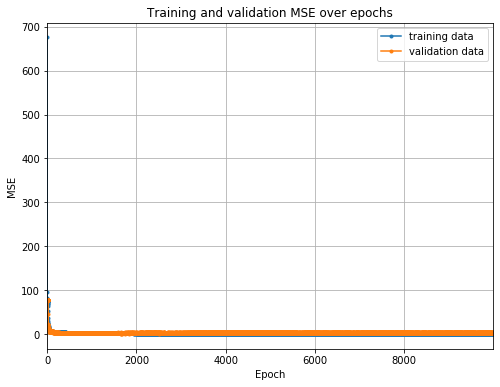

In [106]:
fig, ax = plt.subplots(figsize=(8,6))
result.plot(y=['loss', 'val_loss'], marker='.', ax=ax)
ax.set_xlabel('Epoch')
ax.set_ylabel('MSE')
ax.set_title('Training and validation MSE over epochs')
ax.legend(['training data', 'validation data'])
ax.grid()
fig.savefig('Training and validation MSE over epochs')

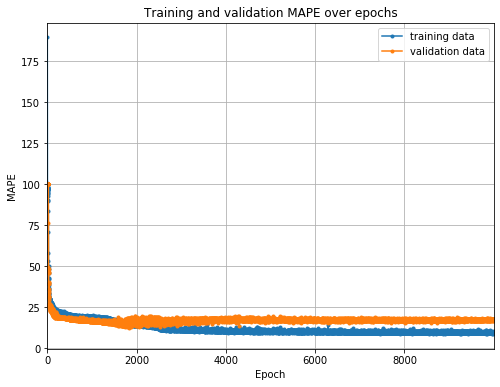

In [107]:
fig, ax = plt.subplots(figsize=(8,6))
result.plot(y=['mape', 'val_mape'], marker='.', ax=ax)
ax.set_xlabel('Epoch')
ax.set_ylabel('MAPE')
ax.set_title('Training and validation MAPE over epochs')
ax.legend(['training data', 'validation data'])
ax.grid()
fig.savefig('Training and validation MAPE over epochs')

In [108]:
train_loss = model.evaluate(x_train, y_train, verbose=0)[0]
train_mape = model.evaluate(x_train, y_train, verbose=0)[1]
#train_mse = model.evaluate(x_train, y_train, verbose=0)[2]
print('training loss (MSE):', train_loss, '\ntraining MAPE:', train_mape, '%\n')
#print('training MSE (custom):', train_mse, '\n')

val_loss = model.evaluate(x_val, y_val, verbose=0)[0]
val_mape = model.evaluate(x_val, y_val, verbose=0)[1]
#val_mse = model.evaluate(x_val, y_val, verbose=0)[2]
print('validation loss (MSE):', val_loss, '\nvalidation MAPE:', val_mape, '%\n')
#print('validation MSE (custom):', val_mse, '\n')

test_loss = model.evaluate(x_test, y_test, verbose=0)[0]
test_mape = model.evaluate(x_test, y_test, verbose=0)[1]
#test_mse = model.evaluate(x_test, y_test, verbose=0)[2]
print('test loss (MSE):', test_loss, '\ntest MAPE:', test_mape, '%')
#print('test MSE (custom):', test_mse, '\n')

training loss (MSE): 3.7849611749232244 
training MAPE: 16.617193 %

validation loss (MSE): 3.6545087273357906 
validation MAPE: 16.619553 %

test loss (MSE): 4.370333576202393 
test MAPE: 17.766846 %


### 5th try

In [109]:
#create model instance
model = Sequential()

#input layer
model.add(Dense(units=32, input_dim=n_features, activation='relu')) 

#hidden layers
model.add(Dense(units=24, input_dim=n_features, activation='relu', 
                      use_bias=True, kernel_regularizer=l2(0.0), bias_regularizer=l2(0.0)))
model.add(Dropout(rate=0.2))
model.add(Dense(units=16, input_dim=n_features, activation='relu', 
                      use_bias=True, kernel_regularizer=l2(0.0), bias_regularizer=l2(0.0)))
model.add(Dropout(rate=0.2))
#...

#output layer
model.add(Dense(units=1, activation='relu'))

In [110]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_41 (Dense)             (None, 24)                792       
_________________________________________________________________
dropout_10 (Dropout)         (None, 24)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 16)                400       
_________________________________________________________________
dropout_11 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 17        
Total params: 1,561
Trainable params: 1,561
Non-trainable params: 0
___________________________________________________

In [111]:
# Compile the model using adam as optimizer and custom_loss as the loss. Use MAPE and MSE as metrics
model.compile(optimizer='adam', loss='mse', metrics=['mape'])

In [112]:
# Train the model. use batch_size=32 and train it for 3000 epochs. use x_val and y_val as validation_data
history = model.fit(x_train, y_train, batch_size=64, epochs=10000, validation_data=(x_val, y_val))

Train on 1533 samples, validate on 171 samples
Epoch 1/10000
1533/1533 [==============================] - 0s 271us/sample - loss: 832.9033 - mape: 221.0233 - val_loss: 78.3557 - val_mape: 100.0000
Epoch 2/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 98.5738 - mape: 100.4536 - val_loss: 78.3557 - val_mape: 100.0000
Epoch 3/10000
1533/1533 [==============================] - ETA: 0s - loss: 78.4682 - mape: 92.20 - 0s 30us/sample - loss: 78.0658 - mape: 96.7404 - val_loss: 78.3557 - val_mape: 100.0000
Epoch 4/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 76.7891 - mape: 95.3842 - val_loss: 78.3557 - val_mape: 100.0000
Epoch 5/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 75.4827 - mape: 95.1890 - val_loss: 78.3557 - val_mape: 100.0000
Epoch 6/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 77.7231 - mape: 95.6375 - val_loss: 78.3557 - val_mape: 100.0000
Epoch 7/10000
1533/1533 [==

1533/1533 [==============================] - 0s 27us/sample - loss: 13.2206 - mape: 33.4816 - val_loss: 14.1286 - val_mape: 37.2530
Epoch 56/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 12.6759 - mape: 33.5005 - val_loss: 11.2677 - val_mape: 32.2964
Epoch 57/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 12.8330 - mape: 33.0865 - val_loss: 11.1472 - val_mape: 32.0739
Epoch 58/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 12.5470 - mape: 32.6586 - val_loss: 10.4223 - val_mape: 30.9547
Epoch 59/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 12.0398 - mape: 32.4528 - val_loss: 9.3593 - val_mape: 29.2378
Epoch 60/10000
1533/1533 [==============================] - ETA: 0s - loss: 13.1087 - mape: 30.34 - 0s 26us/sample - loss: 11.9048 - mape: 31.9698 - val_loss: 12.2822 - val_mape: 34.0537
Epoch 61/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 12.1183 - m

Epoch 111/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 8.1927 - mape: 26.9093 - val_loss: 6.0726 - val_mape: 22.9471
Epoch 112/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 8.3879 - mape: 27.4463 - val_loss: 6.1813 - val_mape: 23.1076
Epoch 113/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 8.3018 - mape: 27.5216 - val_loss: 6.3978 - val_mape: 23.4063
Epoch 114/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 7.8709 - mape: 26.6674 - val_loss: 6.1073 - val_mape: 22.9562
Epoch 115/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 8.3043 - mape: 27.5519 - val_loss: 7.8981 - val_mape: 25.9048
Epoch 116/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 8.2666 - mape: 27.5538 - val_loss: 6.9800 - val_mape: 24.3401
Epoch 117/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 7.6031 - mape: 26.7078 - val_loss: 6.780

1533/1533 [==============================] - 0s 27us/sample - loss: 6.7910 - mape: 25.5745 - val_loss: 5.1617 - val_mape: 20.7179
Epoch 168/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 6.7434 - mape: 24.9112 - val_loss: 5.1657 - val_mape: 20.8297
Epoch 169/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 6.6463 - mape: 24.9377 - val_loss: 3.8840 - val_mape: 18.8293
Epoch 170/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 7.3245 - mape: 26.2940 - val_loss: 5.3629 - val_mape: 21.4894
Epoch 171/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 6.8875 - mape: 25.2403 - val_loss: 5.0977 - val_mape: 21.0441
Epoch 172/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 6.8651 - mape: 25.2658 - val_loss: 5.5169 - val_mape: 21.7207
Epoch 173/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 7.4033 - mape: 26.5782 - val_loss: 5.4802 - val_mape: 21

1533/1533 [==============================] - 0s 26us/sample - loss: 6.0057 - mape: 24.5131 - val_loss: 4.5131 - val_mape: 19.6707
Epoch 224/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 6.0355 - mape: 24.4135 - val_loss: 4.4843 - val_mape: 19.5913
Epoch 225/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 6.0028 - mape: 24.0562 - val_loss: 4.6760 - val_mape: 19.9107
Epoch 226/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 5.7836 - mape: 23.6877 - val_loss: 5.0349 - val_mape: 20.5191
Epoch 227/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 6.1755 - mape: 24.4166 - val_loss: 4.3773 - val_mape: 19.4761
Epoch 228/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 6.3314 - mape: 24.3686 - val_loss: 4.6677 - val_mape: 19.8084
Epoch 229/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 5.7969 - mape: 23.9418 - val_loss: 4.3112 - val_mape: 19

Epoch 279/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 5.4861 - mape: 23.3351 - val_loss: 4.2798 - val_mape: 19.2092
Epoch 280/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 5.2719 - mape: 23.0575 - val_loss: 4.2295 - val_mape: 19.0994
Epoch 281/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 5.2078 - mape: 22.6772 - val_loss: 4.2481 - val_mape: 19.0273
Epoch 282/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 5.4501 - mape: 23.1559 - val_loss: 4.2885 - val_mape: 19.1390
Epoch 283/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 5.4728 - mape: 23.1006 - val_loss: 3.9084 - val_mape: 18.7528
Epoch 284/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 5.2675 - mape: 22.9637 - val_loss: 3.8298 - val_mape: 18.7189
Epoch 285/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 5.0290 - mape: 22.5867 - val_loss: 4.456

Epoch 335/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 4.7625 - mape: 22.0430 - val_loss: 3.6080 - val_mape: 18.3452
Epoch 336/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 4.6875 - mape: 21.9316 - val_loss: 3.5631 - val_mape: 18.4310
Epoch 337/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 4.7804 - mape: 22.1835 - val_loss: 3.4612 - val_mape: 18.3636
Epoch 338/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 4.7768 - mape: 22.1876 - val_loss: 3.5553 - val_mape: 18.3706
Epoch 339/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 4.6101 - mape: 21.7020 - val_loss: 3.7091 - val_mape: 18.3565
Epoch 340/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 4.8386 - mape: 22.1463 - val_loss: 3.3906 - val_mape: 18.5155
Epoch 341/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 4.7895 - mape: 22.2586 - val_loss: 3.715

Epoch 391/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 4.3358 - mape: 21.1699 - val_loss: 3.5807 - val_mape: 18.3000
Epoch 392/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 4.4724 - mape: 21.2049 - val_loss: 3.4950 - val_mape: 18.3136
Epoch 393/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 4.4424 - mape: 21.1738 - val_loss: 3.3295 - val_mape: 18.5396
Epoch 394/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 4.3970 - mape: 21.5902 - val_loss: 3.3682 - val_mape: 18.2875
Epoch 395/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 4.3774 - mape: 21.3553 - val_loss: 3.2958 - val_mape: 18.3932
Epoch 396/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 4.4359 - mape: 21.4029 - val_loss: 3.6084 - val_mape: 18.3037
Epoch 397/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 4.2567 - mape: 21.0327 - val_loss: 3.501

1533/1533 [==============================] - 0s 27us/sample - loss: 4.2206 - mape: 21.0848 - val_loss: 3.5999 - val_mape: 18.4027
Epoch 448/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 4.1400 - mape: 20.6052 - val_loss: 3.4425 - val_mape: 18.4695
Epoch 449/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 4.2511 - mape: 21.0877 - val_loss: 3.3844 - val_mape: 18.5642
Epoch 450/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 4.2077 - mape: 21.0953 - val_loss: 3.3140 - val_mape: 18.2670
Epoch 451/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 4.0747 - mape: 20.7332 - val_loss: 3.5812 - val_mape: 18.4418
Epoch 452/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 4.1801 - mape: 20.8255 - val_loss: 3.4601 - val_mape: 18.4243
Epoch 453/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 4.0269 - mape: 20.4211 - val_loss: 3.4642 - val_mape: 18

1533/1533 [==============================] - 0s 27us/sample - loss: 3.9885 - mape: 20.6230 - val_loss: 3.3418 - val_mape: 18.4955
Epoch 504/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.9605 - mape: 20.6058 - val_loss: 3.2615 - val_mape: 18.4810
Epoch 505/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 3.9610 - mape: 20.4080 - val_loss: 3.5037 - val_mape: 18.4521
Epoch 506/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 3.9367 - mape: 20.5297 - val_loss: 3.4009 - val_mape: 18.5007
Epoch 507/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.9516 - mape: 20.5569 - val_loss: 3.4378 - val_mape: 18.3615
Epoch 508/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.8567 - mape: 20.0759 - val_loss: 3.3577 - val_mape: 18.5151
Epoch 509/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.9088 - mape: 20.2074 - val_loss: 3.3892 - val_mape: 18

1533/1533 [==============================] - 0s 36us/sample - loss: 3.8723 - mape: 20.2053 - val_loss: 3.2736 - val_mape: 18.3457
Epoch 560/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 3.8022 - mape: 20.1012 - val_loss: 3.2692 - val_mape: 18.5091
Epoch 561/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 3.8789 - mape: 20.2842 - val_loss: 3.4759 - val_mape: 18.4867
Epoch 562/10000
1533/1533 [==============================] - 0s 24us/sample - loss: 3.8431 - mape: 20.2412 - val_loss: 3.4038 - val_mape: 18.3647
Epoch 563/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.8751 - mape: 20.1758 - val_loss: 3.3384 - val_mape: 18.3575
Epoch 564/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 3.7669 - mape: 20.5575 - val_loss: 3.6840 - val_mape: 18.5656
Epoch 565/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 3.9446 - mape: 20.5653 - val_loss: 3.5554 - val_mape: 18

Epoch 615/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.7405 - mape: 20.0986 - val_loss: 3.4290 - val_mape: 18.3448
Epoch 616/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 3.7111 - mape: 20.0505 - val_loss: 3.4186 - val_mape: 18.1880
Epoch 617/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.8781 - mape: 20.4595 - val_loss: 3.3382 - val_mape: 18.2793
Epoch 618/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.7077 - mape: 19.9115 - val_loss: 3.3129 - val_mape: 18.2316
Epoch 619/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.7158 - mape: 20.0635 - val_loss: 3.3605 - val_mape: 18.0910
Epoch 620/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 3.6421 - mape: 20.0579 - val_loss: 3.4680 - val_mape: 18.2131
Epoch 621/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.7709 - mape: 20.1294 - val_loss: 3.281

1533/1533 [==============================] - 0s 34us/sample - loss: 3.6321 - mape: 19.8626 - val_loss: 3.2045 - val_mape: 18.1160
Epoch 672/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 3.5948 - mape: 19.7184 - val_loss: 3.3228 - val_mape: 17.9776
Epoch 673/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 3.7551 - mape: 20.2475 - val_loss: 3.4484 - val_mape: 18.1226
Epoch 674/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 3.7374 - mape: 19.9693 - val_loss: 3.2885 - val_mape: 18.4525
Epoch 675/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 3.7282 - mape: 20.0299 - val_loss: 3.2006 - val_mape: 18.4386
Epoch 676/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 3.7075 - mape: 20.2500 - val_loss: 3.1963 - val_mape: 18.4257
Epoch 677/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 3.6479 - mape: 19.9284 - val_loss: 3.1823 - val_mape: 18

Epoch 727/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.6609 - mape: 20.0163 - val_loss: 3.1509 - val_mape: 18.7152
Epoch 728/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.6232 - mape: 19.9078 - val_loss: 3.1744 - val_mape: 18.4885
Epoch 729/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.5426 - mape: 19.8174 - val_loss: 3.1545 - val_mape: 18.2441
Epoch 730/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.5600 - mape: 19.8664 - val_loss: 3.1931 - val_mape: 18.0691
Epoch 731/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.6343 - mape: 19.9210 - val_loss: 3.1652 - val_mape: 17.9211
Epoch 732/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.6704 - mape: 19.9797 - val_loss: 3.0837 - val_mape: 18.0041
Epoch 733/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.6632 - mape: 20.0772 - val_loss: 3.121

1533/1533 [==============================] - 0s 25us/sample - loss: 3.4715 - mape: 19.3096 - val_loss: 3.0436 - val_mape: 18.1146
Epoch 784/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.5299 - mape: 19.6438 - val_loss: 3.1152 - val_mape: 17.9109
Epoch 785/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 3.5297 - mape: 19.6389 - val_loss: 3.2014 - val_mape: 18.3360
Epoch 786/10000
1533/1533 [==============================] - 0s 39us/sample - loss: 3.5894 - mape: 19.9457 - val_loss: 3.2685 - val_mape: 17.9197
Epoch 787/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 3.6723 - mape: 20.0424 - val_loss: 3.1791 - val_mape: 17.8076
Epoch 788/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 3.5023 - mape: 19.5980 - val_loss: 3.0533 - val_mape: 18.3874
Epoch 789/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 3.4837 - mape: 19.5015 - val_loss: 3.1479 - val_mape: 18

1533/1533 [==============================] - 0s 33us/sample - loss: 3.5066 - mape: 19.6948 - val_loss: 3.1245 - val_mape: 18.1758
Epoch 840/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 3.5408 - mape: 19.7021 - val_loss: 3.0308 - val_mape: 17.7575
Epoch 841/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.5486 - mape: 19.7377 - val_loss: 3.1399 - val_mape: 18.5471
Epoch 842/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 3.5420 - mape: 19.8470 - val_loss: 3.1666 - val_mape: 17.6649
Epoch 843/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 3.5920 - mape: 19.8073 - val_loss: 3.1237 - val_mape: 17.8521
Epoch 844/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.4867 - mape: 19.5642 - val_loss: 3.0943 - val_mape: 18.1789
Epoch 845/10000
1533/1533 [==============================] - ETA: 0s - loss: 4.4688 - mape: 23.257 - 0s 28us/sample - loss: 3.5074 - mape: 1

1533/1533 [==============================] - 0s 27us/sample - loss: 3.5469 - mape: 19.6408 - val_loss: 3.1578 - val_mape: 18.5176
Epoch 895/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.4928 - mape: 19.8077 - val_loss: 2.9984 - val_mape: 18.2972
Epoch 896/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 3.5647 - mape: 19.9044 - val_loss: 2.9994 - val_mape: 18.0512
Epoch 897/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 3.5563 - mape: 19.6404 - val_loss: 3.0444 - val_mape: 18.0957
Epoch 898/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 3.4386 - mape: 19.2912 - val_loss: 3.0820 - val_mape: 18.1410
Epoch 899/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.5262 - mape: 19.5649 - val_loss: 3.0910 - val_mape: 18.0021
Epoch 900/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.5509 - mape: 19.8881 - val_loss: 3.0897 - val_mape: 17

1533/1533 [==============================] - 0s 27us/sample - loss: 3.4236 - mape: 19.4512 - val_loss: 3.1174 - val_mape: 18.0735
Epoch 951/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.4570 - mape: 19.3474 - val_loss: 3.0935 - val_mape: 18.2936
Epoch 952/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.4730 - mape: 19.4023 - val_loss: 2.9954 - val_mape: 17.5756
Epoch 953/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.5570 - mape: 19.8574 - val_loss: 3.0172 - val_mape: 18.2059
Epoch 954/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.4548 - mape: 19.3654 - val_loss: 3.0790 - val_mape: 18.0192
Epoch 955/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.4380 - mape: 19.4465 - val_loss: 2.9272 - val_mape: 17.9415
Epoch 956/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 3.5083 - mape: 19.4812 - val_loss: 2.9611 - val_mape: 18

1533/1533 [==============================] - 0s 25us/sample - loss: 3.4466 - mape: 19.3201 - val_loss: 2.9715 - val_mape: 17.4957
Epoch 1007/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.4196 - mape: 19.2097 - val_loss: 3.0057 - val_mape: 17.3840
Epoch 1008/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.4586 - mape: 19.3967 - val_loss: 3.1723 - val_mape: 17.5313
Epoch 1009/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.5413 - mape: 19.5361 - val_loss: 2.9935 - val_mape: 17.7385
Epoch 1010/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.4087 - mape: 19.2494 - val_loss: 2.9852 - val_mape: 17.1207
Epoch 1011/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.4054 - mape: 19.1679 - val_loss: 3.0304 - val_mape: 17.9026
Epoch 1012/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.5169 - mape: 19.5713 - val_loss: 3.1235 - val_ma

Epoch 1062/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.4104 - mape: 19.0332 - val_loss: 2.9794 - val_mape: 17.4673
Epoch 1063/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.4259 - mape: 19.3205 - val_loss: 3.0767 - val_mape: 18.1731
Epoch 1064/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.5041 - mape: 19.7943 - val_loss: 3.1330 - val_mape: 18.5298
Epoch 1065/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.4823 - mape: 19.2255 - val_loss: 3.0287 - val_mape: 17.7231
Epoch 1066/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.4380 - mape: 19.1931 - val_loss: 2.9583 - val_mape: 17.5410
Epoch 1067/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.4791 - mape: 19.4090 - val_loss: 2.9605 - val_mape: 17.9645
Epoch 1068/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.5086 - mape: 19.3364 - val_loss

Epoch 1118/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 3.4468 - mape: 19.2928 - val_loss: 2.9651 - val_mape: 17.9483
Epoch 1119/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 3.4369 - mape: 19.2906 - val_loss: 3.0569 - val_mape: 17.6495
Epoch 1120/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 3.4080 - mape: 19.0777 - val_loss: 2.8976 - val_mape: 17.2646
Epoch 1121/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.3813 - mape: 19.0594 - val_loss: 2.9551 - val_mape: 17.7901
Epoch 1122/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.3719 - mape: 18.9320 - val_loss: 2.9283 - val_mape: 17.4694
Epoch 1123/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.4655 - mape: 19.4749 - val_loss: 2.9346 - val_mape: 17.4082
Epoch 1124/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 3.3858 - mape: 18.9537 - val_loss

Epoch 1174/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.3539 - mape: 18.6171 - val_loss: 2.7645 - val_mape: 16.5265
Epoch 1175/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.3087 - mape: 18.8288 - val_loss: 2.8380 - val_mape: 16.6424
Epoch 1176/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.2852 - mape: 18.4528 - val_loss: 2.7669 - val_mape: 16.7055
Epoch 1177/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 3.3384 - mape: 18.7604 - val_loss: 2.8197 - val_mape: 16.9429
Epoch 1178/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.2905 - mape: 18.5843 - val_loss: 2.7999 - val_mape: 16.6459
Epoch 1179/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.3322 - mape: 18.7024 - val_loss: 2.8037 - val_mape: 16.5680
Epoch 1180/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 3.3427 - mape: 18.7631 - val_loss

Epoch 1230/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 3.3204 - mape: 18.6201 - val_loss: 2.8297 - val_mape: 17.3014
Epoch 1231/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.3914 - mape: 18.8417 - val_loss: 2.8470 - val_mape: 16.7454
Epoch 1232/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 3.3507 - mape: 18.5411 - val_loss: 2.7925 - val_mape: 16.6739
Epoch 1233/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.3244 - mape: 18.6406 - val_loss: 2.8701 - val_mape: 16.5086
Epoch 1234/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 3.2854 - mape: 18.6469 - val_loss: 2.7605 - val_mape: 16.9019
Epoch 1235/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 3.1996 - mape: 18.4737 - val_loss: 2.7604 - val_mape: 16.6165
Epoch 1236/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.2843 - mape: 18.4692 - val_loss

Epoch 1286/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 3.3415 - mape: 18.8070 - val_loss: 2.8931 - val_mape: 16.9486
Epoch 1287/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.2759 - mape: 18.3707 - val_loss: 2.7827 - val_mape: 16.8716
Epoch 1288/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.2289 - mape: 18.2179 - val_loss: 2.7976 - val_mape: 16.6093
Epoch 1289/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.2695 - mape: 18.4787 - val_loss: 2.7746 - val_mape: 16.7600
Epoch 1290/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.2300 - mape: 18.3251 - val_loss: 2.7604 - val_mape: 16.6612
Epoch 1291/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.1564 - mape: 17.9806 - val_loss: 2.7709 - val_mape: 16.4217
Epoch 1292/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.2461 - mape: 18.4737 - val_loss

Epoch 1342/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 3.3676 - mape: 18.6043 - val_loss: 2.8056 - val_mape: 16.9908
Epoch 1343/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.2976 - mape: 18.5558 - val_loss: 2.7585 - val_mape: 16.9148
Epoch 1344/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.2754 - mape: 18.3356 - val_loss: 2.9124 - val_mape: 16.9167
Epoch 1345/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.4319 - mape: 19.0412 - val_loss: 3.0192 - val_mape: 16.7248
Epoch 1346/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.3653 - mape: 18.5190 - val_loss: 2.7718 - val_mape: 16.7753
Epoch 1347/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.3019 - mape: 18.5118 - val_loss: 2.8227 - val_mape: 16.6371
Epoch 1348/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 3.3414 - mape: 18.6062 - val_loss

Epoch 1398/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 3.2953 - mape: 18.5078 - val_loss: 2.9022 - val_mape: 16.7036
Epoch 1399/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.0939 - mape: 18.0191 - val_loss: 2.7834 - val_mape: 17.0763
Epoch 1400/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.2482 - mape: 18.5586 - val_loss: 2.8637 - val_mape: 17.3357
Epoch 1401/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.1904 - mape: 18.2318 - val_loss: 2.7793 - val_mape: 16.4683
Epoch 1402/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 3.3006 - mape: 18.5760 - val_loss: 2.7340 - val_mape: 16.6827
Epoch 1403/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.1561 - mape: 18.1877 - val_loss: 2.8117 - val_mape: 17.2228
Epoch 1404/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.2878 - mape: 18.3669 - val_loss

Epoch 1454/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.2403 - mape: 18.2613 - val_loss: 2.8335 - val_mape: 16.8743
Epoch 1455/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 3.2041 - mape: 18.0694 - val_loss: 2.8781 - val_mape: 16.5870
Epoch 1456/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 3.2264 - mape: 18.6036 - val_loss: 2.7681 - val_mape: 16.8854
Epoch 1457/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.1953 - mape: 18.2319 - val_loss: 2.7416 - val_mape: 16.8197
Epoch 1458/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.1991 - mape: 18.4336 - val_loss: 2.7630 - val_mape: 16.7528
Epoch 1459/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.1692 - mape: 18.1951 - val_loss: 2.7642 - val_mape: 16.8106
Epoch 1460/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.1980 - mape: 18.3407 - val_loss

Epoch 1510/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.2661 - mape: 18.7147 - val_loss: 2.8035 - val_mape: 16.9686
Epoch 1511/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.3116 - mape: 18.3449 - val_loss: 2.8018 - val_mape: 16.4864
Epoch 1512/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.1994 - mape: 18.3796 - val_loss: 2.7498 - val_mape: 16.5697
Epoch 1513/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.2402 - mape: 18.3135 - val_loss: 2.9140 - val_mape: 16.8735
Epoch 1514/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 3.2481 - mape: 18.2627 - val_loss: 2.8889 - val_mape: 16.8336
Epoch 1515/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 3.2294 - mape: 18.1139 - val_loss: 2.7412 - val_mape: 16.8302
Epoch 1516/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.2315 - mape: 18.2197 - val_loss

Epoch 1566/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 3.1972 - mape: 18.1928 - val_loss: 2.6363 - val_mape: 16.5758
Epoch 1567/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.2009 - mape: 18.3332 - val_loss: 2.8856 - val_mape: 16.8879
Epoch 1568/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.2981 - mape: 18.5453 - val_loss: 2.8845 - val_mape: 16.6492
Epoch 1569/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.2400 - mape: 18.3154 - val_loss: 2.7176 - val_mape: 16.6969
Epoch 1570/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.3600 - mape: 18.5091 - val_loss: 2.8010 - val_mape: 16.7849
Epoch 1571/10000
1533/1533 [==============================] - 0s 46us/sample - loss: 3.3612 - mape: 18.6529 - val_loss: 2.8541 - val_mape: 17.0397
Epoch 1572/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 3.1756 - mape: 18.0325 - val_loss

Epoch 1622/10000
1533/1533 [==============================] - ETA: 0s - loss: 2.8704 - mape: 17.814 - 0s 29us/sample - loss: 3.2810 - mape: 18.1961 - val_loss: 2.8638 - val_mape: 16.5770
Epoch 1623/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.2454 - mape: 18.4960 - val_loss: 2.7021 - val_mape: 16.5453
Epoch 1624/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.1912 - mape: 18.1588 - val_loss: 2.8240 - val_mape: 16.9337
Epoch 1625/10000
1533/1533 [==============================] - ETA: 0s - loss: 3.1387 - mape: 17.619 - 0s 30us/sample - loss: 3.3303 - mape: 18.9802 - val_loss: 2.8853 - val_mape: 17.2376
Epoch 1626/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 3.3232 - mape: 18.5868 - val_loss: 2.7604 - val_mape: 16.6844
Epoch 1627/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 3.2605 - mape: 18.3439 - val_loss: 2.7808 - val_mape: 16.7431
Epoch 1628/10000
1533/1533 [==========

1533/1533 [==============================] - 0s 29us/sample - loss: 3.3228 - mape: 18.6965 - val_loss: 2.7789 - val_mape: 17.0314
Epoch 1678/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.0932 - mape: 17.8989 - val_loss: 2.8327 - val_mape: 16.6213
Epoch 1679/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 3.3127 - mape: 18.5726 - val_loss: 2.7432 - val_mape: 16.6671
Epoch 1680/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.2308 - mape: 18.3816 - val_loss: 2.7681 - val_mape: 16.8747
Epoch 1681/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 3.2774 - mape: 18.4256 - val_loss: 2.7792 - val_mape: 17.1264
Epoch 1682/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.2178 - mape: 18.5339 - val_loss: 2.6891 - val_mape: 16.6821
Epoch 1683/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.2421 - mape: 18.4370 - val_loss: 2.8214 - val_ma

1533/1533 [==============================] - 0s 30us/sample - loss: 3.2437 - mape: 18.4788 - val_loss: 2.8044 - val_mape: 16.7838
Epoch 1733/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 3.2789 - mape: 18.5287 - val_loss: 2.7553 - val_mape: 16.5072
Epoch 1734/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 3.2794 - mape: 18.3615 - val_loss: 2.7025 - val_mape: 16.2999
Epoch 1735/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 3.2750 - mape: 18.5921 - val_loss: 2.9305 - val_mape: 16.7315
Epoch 1736/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.2163 - mape: 18.2352 - val_loss: 2.7516 - val_mape: 16.8207
Epoch 1737/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.3391 - mape: 18.7053 - val_loss: 2.8849 - val_mape: 17.0689
Epoch 1738/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 3.2572 - mape: 18.1368 - val_loss: 2.7719 - val_ma

1533/1533 [==============================] - 0s 28us/sample - loss: 3.2802 - mape: 18.4818 - val_loss: 2.7138 - val_mape: 16.6296
Epoch 1788/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 3.1909 - mape: 18.2744 - val_loss: 2.7798 - val_mape: 16.4789
Epoch 1789/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.1833 - mape: 18.1032 - val_loss: 2.7260 - val_mape: 16.9698
Epoch 1790/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.2345 - mape: 18.3341 - val_loss: 2.8494 - val_mape: 16.7569
Epoch 1791/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 3.1092 - mape: 18.0054 - val_loss: 2.6101 - val_mape: 16.5497
Epoch 1792/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.2033 - mape: 18.3021 - val_loss: 2.7318 - val_mape: 16.4997
Epoch 1793/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 3.2348 - mape: 18.2098 - val_loss: 2.8016 - val_ma

Epoch 1843/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 3.2155 - mape: 18.2231 - val_loss: 2.8147 - val_mape: 16.7083
Epoch 1844/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.2821 - mape: 18.3106 - val_loss: 2.9056 - val_mape: 16.6736
Epoch 1845/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 3.2399 - mape: 18.4638 - val_loss: 2.6553 - val_mape: 16.3374
Epoch 1846/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 3.2190 - mape: 18.3352 - val_loss: 2.7779 - val_mape: 16.4685
Epoch 1847/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.0876 - mape: 17.8534 - val_loss: 2.6778 - val_mape: 16.6573
Epoch 1848/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.2274 - mape: 18.3145 - val_loss: 2.7973 - val_mape: 16.9186
Epoch 1849/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 3.2216 - mape: 18.4106 - val_loss

Epoch 1899/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.1662 - mape: 18.4099 - val_loss: 2.7251 - val_mape: 16.6948
Epoch 1900/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.1956 - mape: 18.1897 - val_loss: 2.7826 - val_mape: 16.6097
Epoch 1901/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.2812 - mape: 18.2363 - val_loss: 2.6807 - val_mape: 16.7252
Epoch 1902/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.3213 - mape: 18.4082 - val_loss: 2.7761 - val_mape: 16.7294
Epoch 1903/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.1521 - mape: 18.1438 - val_loss: 2.7113 - val_mape: 16.4715
Epoch 1904/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.2154 - mape: 18.4595 - val_loss: 3.0172 - val_mape: 17.2220
Epoch 1905/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.2467 - mape: 18.4039 - val_loss

1533/1533 [==============================] - 0s 30us/sample - loss: 3.2679 - mape: 18.4521 - val_loss: 2.7629 - val_mape: 16.8863
Epoch 1955/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.2484 - mape: 18.4069 - val_loss: 2.7144 - val_mape: 16.2997
Epoch 1956/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 3.1701 - mape: 17.9482 - val_loss: 2.6334 - val_mape: 16.1022
Epoch 1957/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.1464 - mape: 17.9420 - val_loss: 2.7454 - val_mape: 16.2055
Epoch 1958/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.1507 - mape: 17.8734 - val_loss: 2.7119 - val_mape: 16.3399
Epoch 1959/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.1894 - mape: 18.1904 - val_loss: 2.7792 - val_mape: 16.6725
Epoch 1960/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.1812 - mape: 18.0221 - val_loss: 2.6517 - val_ma

1533/1533 [==============================] - 0s 31us/sample - loss: 3.2836 - mape: 18.5449 - val_loss: 2.9159 - val_mape: 16.8964
Epoch 2010/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.2714 - mape: 18.5864 - val_loss: 2.8543 - val_mape: 16.7689
Epoch 2011/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.2729 - mape: 18.3873 - val_loss: 2.8123 - val_mape: 16.9983
Epoch 2012/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 3.3168 - mape: 18.6090 - val_loss: 2.9697 - val_mape: 17.2548
Epoch 2013/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 3.2163 - mape: 18.2385 - val_loss: 2.7644 - val_mape: 16.8477
Epoch 2014/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.2079 - mape: 18.3486 - val_loss: 2.9114 - val_mape: 16.9636
Epoch 2015/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.1723 - mape: 17.9598 - val_loss: 2.7607 - val_ma

1533/1533 [==============================] - 0s 31us/sample - loss: 3.1754 - mape: 18.3332 - val_loss: 2.6434 - val_mape: 16.4648
Epoch 2065/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.1088 - mape: 18.0027 - val_loss: 2.6817 - val_mape: 16.3191
Epoch 2066/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 3.0470 - mape: 17.7681 - val_loss: 2.7013 - val_mape: 16.2601
Epoch 2067/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.1832 - mape: 18.2475 - val_loss: 2.7475 - val_mape: 16.5565
Epoch 2068/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.1819 - mape: 18.2535 - val_loss: 2.5912 - val_mape: 16.1386
Epoch 2069/10000
1533/1533 [==============================] - ETA: 0s - loss: 2.8528 - mape: 17.761 - 0s 29us/sample - loss: 3.3303 - mape: 18.9519 - val_loss: 2.9692 - val_mape: 18.4843
Epoch 2070/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.2398 - m

1533/1533 [==============================] - 0s 30us/sample - loss: 3.1848 - mape: 18.2397 - val_loss: 2.5370 - val_mape: 16.1937
Epoch 2120/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.9420 - mape: 17.6140 - val_loss: 2.4873 - val_mape: 15.9405
Epoch 2121/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.0414 - mape: 17.7691 - val_loss: 2.6814 - val_mape: 16.6228
Epoch 2122/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.1992 - mape: 18.2432 - val_loss: 2.5853 - val_mape: 16.0500
Epoch 2123/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.2175 - mape: 18.3174 - val_loss: 2.7914 - val_mape: 16.2704
Epoch 2124/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 3.0628 - mape: 17.7288 - val_loss: 2.5960 - val_mape: 16.3526
Epoch 2125/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.1003 - mape: 17.9263 - val_loss: 2.6737 - val_ma

1533/1533 [==============================] - 0s 28us/sample - loss: 2.9829 - mape: 17.7099 - val_loss: 2.5302 - val_mape: 16.8715
Epoch 2175/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.9583 - mape: 17.7105 - val_loss: 2.3585 - val_mape: 15.6462
Epoch 2176/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.9697 - mape: 17.7154 - val_loss: 2.4959 - val_mape: 16.1647
Epoch 2177/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.0288 - mape: 17.7748 - val_loss: 2.8889 - val_mape: 18.3548
Epoch 2178/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.0431 - mape: 17.9136 - val_loss: 2.6063 - val_mape: 16.4738
Epoch 2179/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 3.0208 - mape: 17.9841 - val_loss: 2.5000 - val_mape: 16.4734
Epoch 2180/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.9004 - mape: 17.2353 - val_loss: 2.6117 - val_ma

Epoch 2230/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.8024 - mape: 17.2354 - val_loss: 2.4467 - val_mape: 16.5364
Epoch 2231/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.7794 - mape: 17.0311 - val_loss: 2.5224 - val_mape: 16.3778
Epoch 2232/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.8683 - mape: 17.3693 - val_loss: 2.3778 - val_mape: 16.0873
Epoch 2233/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.8586 - mape: 17.6629 - val_loss: 2.3898 - val_mape: 16.3486
Epoch 2234/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 2.8527 - mape: 17.2543 - val_loss: 2.5052 - val_mape: 16.6361
Epoch 2235/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.9356 - mape: 17.5071 - val_loss: 2.5280 - val_mape: 15.7904
Epoch 2236/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.6804 - mape: 16.6887 - val_loss

1533/1533 [==============================] - 0s 30us/sample - loss: 2.6955 - mape: 16.6148 - val_loss: 2.4529 - val_mape: 16.4301
Epoch 2286/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.7309 - mape: 16.8336 - val_loss: 2.2137 - val_mape: 15.8459
Epoch 2287/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 2.6180 - mape: 16.3863 - val_loss: 2.2306 - val_mape: 15.8833
Epoch 2288/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 2.6789 - mape: 16.5133 - val_loss: 2.2272 - val_mape: 15.9469
Epoch 2289/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 2.7034 - mape: 16.6560 - val_loss: 2.2813 - val_mape: 15.7111
Epoch 2290/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.6898 - mape: 16.6369 - val_loss: 2.0648 - val_mape: 15.4204
Epoch 2291/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.7994 - mape: 16.8426 - val_loss: 2.4181 - val_ma

1533/1533 [==============================] - 0s 31us/sample - loss: 2.6443 - mape: 16.5175 - val_loss: 2.3629 - val_mape: 16.1176
Epoch 2341/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.6528 - mape: 16.3972 - val_loss: 2.2167 - val_mape: 15.7203
Epoch 2342/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.6674 - mape: 16.4313 - val_loss: 2.4306 - val_mape: 16.2174
Epoch 2343/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 2.7092 - mape: 16.5553 - val_loss: 2.1461 - val_mape: 15.2241
Epoch 2344/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.5668 - mape: 16.0844 - val_loss: 2.2169 - val_mape: 15.8752
Epoch 2345/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 2.6911 - mape: 16.5040 - val_loss: 2.5864 - val_mape: 16.5885
Epoch 2346/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 2.7864 - mape: 16.9633 - val_loss: 1.9986 - val_ma

Epoch 2396/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.6196 - mape: 16.5678 - val_loss: 2.2264 - val_mape: 15.5624
Epoch 2397/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 2.7150 - mape: 16.5987 - val_loss: 1.9385 - val_mape: 14.6805
Epoch 2398/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.7129 - mape: 16.5160 - val_loss: 2.3250 - val_mape: 16.1669
Epoch 2399/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 2.5878 - mape: 16.2268 - val_loss: 2.3532 - val_mape: 16.1578
Epoch 2400/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.6700 - mape: 16.6541 - val_loss: 2.1952 - val_mape: 15.5954
Epoch 2401/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 2.6683 - mape: 16.2622 - val_loss: 2.0296 - val_mape: 15.2801
Epoch 2402/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.5828 - mape: 16.4458 - val_loss

Epoch 2452/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 2.5915 - mape: 16.2997 - val_loss: 2.2512 - val_mape: 15.8199
Epoch 2453/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.6000 - mape: 16.4921 - val_loss: 2.4647 - val_mape: 16.5024
Epoch 2454/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.6457 - mape: 16.2377 - val_loss: 2.0151 - val_mape: 14.7833
Epoch 2455/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.5677 - mape: 16.1423 - val_loss: 2.2118 - val_mape: 15.5550
Epoch 2456/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.5139 - mape: 15.7785 - val_loss: 2.1917 - val_mape: 15.5903
Epoch 2457/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 2.4979 - mape: 15.9245 - val_loss: 2.0801 - val_mape: 15.0108
Epoch 2458/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 2.6350 - mape: 16.2329 - val_loss

Epoch 2508/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.6835 - mape: 16.6975 - val_loss: 2.3165 - val_mape: 15.7827
Epoch 2509/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 2.6544 - mape: 16.1716 - val_loss: 2.0501 - val_mape: 14.9454
Epoch 2510/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.6285 - mape: 16.2798 - val_loss: 2.1924 - val_mape: 15.3716
Epoch 2511/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.6002 - mape: 16.1758 - val_loss: 2.1966 - val_mape: 15.4725
Epoch 2512/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.6020 - mape: 16.2725 - val_loss: 1.9190 - val_mape: 14.4671
Epoch 2513/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.4863 - mape: 16.1215 - val_loss: 2.4123 - val_mape: 16.2572
Epoch 2514/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.5486 - mape: 16.2189 - val_loss

1533/1533 [==============================] - 0s 29us/sample - loss: 2.4885 - mape: 15.7701 - val_loss: 1.9892 - val_mape: 14.9806
Epoch 2564/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.5643 - mape: 16.1744 - val_loss: 2.1458 - val_mape: 15.4207
Epoch 2565/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.5399 - mape: 16.0800 - val_loss: 2.0502 - val_mape: 14.7448
Epoch 2566/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 2.4929 - mape: 15.8624 - val_loss: 2.0436 - val_mape: 14.7839
Epoch 2567/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.6109 - mape: 16.0942 - val_loss: 2.5296 - val_mape: 16.3037
Epoch 2568/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.5672 - mape: 16.2819 - val_loss: 1.9138 - val_mape: 14.2978
Epoch 2569/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.7033 - mape: 16.4157 - val_loss: 2.6954 - val_ma

Epoch 2619/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 2.5388 - mape: 16.0008 - val_loss: 2.1329 - val_mape: 15.2461
Epoch 2620/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.5579 - mape: 15.9713 - val_loss: 2.3166 - val_mape: 15.6573
Epoch 2621/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.5937 - mape: 16.0290 - val_loss: 2.1127 - val_mape: 15.1673
Epoch 2622/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.5579 - mape: 16.1459 - val_loss: 2.4210 - val_mape: 15.7522
Epoch 2623/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.5527 - mape: 16.0553 - val_loss: 2.2154 - val_mape: 15.1968
Epoch 2624/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.6689 - mape: 16.4184 - val_loss: 1.9068 - val_mape: 14.3833
Epoch 2625/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.6297 - mape: 16.2813 - val_loss

Epoch 2675/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.5721 - mape: 16.2766 - val_loss: 2.3977 - val_mape: 16.1098
Epoch 2676/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.5269 - mape: 16.0593 - val_loss: 2.0621 - val_mape: 14.9196
Epoch 2677/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.4809 - mape: 15.9808 - val_loss: 2.0558 - val_mape: 14.5398
Epoch 2678/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.5560 - mape: 16.1222 - val_loss: 2.0698 - val_mape: 14.5990
Epoch 2679/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.5254 - mape: 16.1936 - val_loss: 1.9197 - val_mape: 14.0963
Epoch 2680/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.6940 - mape: 16.4318 - val_loss: 2.1080 - val_mape: 15.1365
Epoch 2681/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.5874 - mape: 16.1455 - val_loss

1533/1533 [==============================] - 0s 30us/sample - loss: 2.5827 - mape: 16.1951 - val_loss: 2.0908 - val_mape: 14.9683
Epoch 2731/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.5016 - mape: 15.6759 - val_loss: 1.9327 - val_mape: 14.1348
Epoch 2732/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 2.4399 - mape: 15.6557 - val_loss: 1.8492 - val_mape: 14.1286
Epoch 2733/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.5166 - mape: 16.0807 - val_loss: 2.2157 - val_mape: 15.4578
Epoch 2734/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.5113 - mape: 15.9462 - val_loss: 1.8552 - val_mape: 14.1267
Epoch 2735/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.3471 - mape: 15.4647 - val_loss: 2.1702 - val_mape: 15.0100
Epoch 2736/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.3874 - mape: 15.4440 - val_loss: 1.8040 - val_ma

1533/1533 [==============================] - 0s 27us/sample - loss: 2.4155 - mape: 15.3360 - val_loss: 2.0551 - val_mape: 15.1396
Epoch 2786/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.4076 - mape: 15.7932 - val_loss: 1.9624 - val_mape: 14.5865
Epoch 2787/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.5754 - mape: 16.0820 - val_loss: 1.7486 - val_mape: 13.7097
Epoch 2788/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.4828 - mape: 16.0772 - val_loss: 2.1885 - val_mape: 15.2124
Epoch 2789/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 2.4316 - mape: 15.7370 - val_loss: 2.3968 - val_mape: 15.4558
Epoch 2790/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.5300 - mape: 16.0001 - val_loss: 2.1426 - val_mape: 14.8115
Epoch 2791/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.4098 - mape: 15.4717 - val_loss: 2.4070 - val_ma

Epoch 2841/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 2.5217 - mape: 16.1395 - val_loss: 1.8154 - val_mape: 14.1533
Epoch 2842/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.4303 - mape: 15.6469 - val_loss: 1.7816 - val_mape: 14.0370
Epoch 2843/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.4347 - mape: 15.8161 - val_loss: 1.8718 - val_mape: 13.8931
Epoch 2844/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.4107 - mape: 15.6403 - val_loss: 2.0912 - val_mape: 15.0437
Epoch 2845/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.5422 - mape: 16.0005 - val_loss: 1.8286 - val_mape: 14.0330
Epoch 2846/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.5236 - mape: 16.0714 - val_loss: 2.1780 - val_mape: 15.6690
Epoch 2847/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 2.4784 - mape: 15.9458 - val_loss

Epoch 2897/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.6216 - mape: 16.3405 - val_loss: 2.0327 - val_mape: 14.9834
Epoch 2898/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.4103 - mape: 15.5919 - val_loss: 1.8148 - val_mape: 13.9313
Epoch 2899/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.3885 - mape: 15.4490 - val_loss: 1.8854 - val_mape: 13.8263
Epoch 2900/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.4365 - mape: 15.6758 - val_loss: 1.9449 - val_mape: 14.2203
Epoch 2901/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.3314 - mape: 15.1495 - val_loss: 2.0257 - val_mape: 14.7678
Epoch 2902/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.6003 - mape: 16.1120 - val_loss: 1.9760 - val_mape: 14.6123
Epoch 2903/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.6981 - mape: 16.6448 - val_loss

Epoch 2953/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.5378 - mape: 15.8467 - val_loss: 2.0375 - val_mape: 14.4493
Epoch 2954/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.5644 - mape: 16.2817 - val_loss: 1.7736 - val_mape: 13.3218
Epoch 2955/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.4058 - mape: 15.2953 - val_loss: 2.2765 - val_mape: 15.2298
Epoch 2956/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.4339 - mape: 15.5339 - val_loss: 1.7105 - val_mape: 13.3057
Epoch 2957/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.4454 - mape: 15.8154 - val_loss: 2.3822 - val_mape: 15.7075
Epoch 2958/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.2814 - mape: 15.2299 - val_loss: 1.9719 - val_mape: 14.3948
Epoch 2959/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.2478 - mape: 15.1665 - val_loss

Epoch 3009/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 2.3759 - mape: 15.6475 - val_loss: 1.7885 - val_mape: 13.5416
Epoch 3010/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.3554 - mape: 15.3141 - val_loss: 2.0198 - val_mape: 14.5560
Epoch 3011/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.3943 - mape: 15.3804 - val_loss: 1.6531 - val_mape: 12.9308
Epoch 3012/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.2468 - mape: 14.8227 - val_loss: 1.6779 - val_mape: 13.1529
Epoch 3013/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 2.3563 - mape: 15.1541 - val_loss: 1.9273 - val_mape: 14.5244
Epoch 3014/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.1934 - mape: 14.7621 - val_loss: 1.9074 - val_mape: 14.1424
Epoch 3015/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.3552 - mape: 15.2025 - val_loss

Epoch 3065/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.4778 - mape: 15.6848 - val_loss: 2.1335 - val_mape: 15.1975
Epoch 3066/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 2.2851 - mape: 15.1232 - val_loss: 2.2607 - val_mape: 15.0471
Epoch 3067/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.3408 - mape: 15.1062 - val_loss: 1.6603 - val_mape: 12.9997
Epoch 3068/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.3458 - mape: 15.3348 - val_loss: 1.5566 - val_mape: 12.4798
Epoch 3069/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.2621 - mape: 15.1587 - val_loss: 1.6710 - val_mape: 13.2045
Epoch 3070/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.2680 - mape: 15.0020 - val_loss: 2.2088 - val_mape: 15.4875
Epoch 3071/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.4901 - mape: 15.5709 - val_loss

Epoch 3121/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.2743 - mape: 15.0835 - val_loss: 1.5544 - val_mape: 12.7874
Epoch 3122/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 2.0624 - mape: 14.2459 - val_loss: 1.9930 - val_mape: 14.8321
Epoch 3123/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.1707 - mape: 14.7844 - val_loss: 1.8096 - val_mape: 13.4332
Epoch 3124/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 2.1235 - mape: 14.7556 - val_loss: 1.5725 - val_mape: 12.5848
Epoch 3125/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.1358 - mape: 14.4382 - val_loss: 1.3357 - val_mape: 11.3537
Epoch 3126/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.3491 - mape: 15.3802 - val_loss: 1.9141 - val_mape: 14.4295
Epoch 3127/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.1461 - mape: 14.6795 - val_loss

Epoch 3177/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.2801 - mape: 15.0924 - val_loss: 1.5625 - val_mape: 12.7243
Epoch 3178/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.1202 - mape: 14.3518 - val_loss: 1.6924 - val_mape: 12.1589
Epoch 3179/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.0084 - mape: 14.1132 - val_loss: 1.6506 - val_mape: 12.6448
Epoch 3180/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.0362 - mape: 13.9513 - val_loss: 1.5501 - val_mape: 12.5448
Epoch 3181/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.0804 - mape: 14.1812 - val_loss: 1.5505 - val_mape: 12.1353
Epoch 3182/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 2.1093 - mape: 14.4047 - val_loss: 1.6422 - val_mape: 12.8176
Epoch 3183/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.1028 - mape: 14.3204 - val_loss

Epoch 3233/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.8570 - mape: 13.5111 - val_loss: 1.4439 - val_mape: 11.6433
Epoch 3234/10000
1533/1533 [==============================] - 0s 24us/sample - loss: 2.1073 - mape: 14.4399 - val_loss: 1.3944 - val_mape: 11.6280
Epoch 3235/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.0513 - mape: 14.1744 - val_loss: 1.4353 - val_mape: 12.1825
Epoch 3236/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.9995 - mape: 13.9993 - val_loss: 1.5629 - val_mape: 12.8288
Epoch 3237/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.0210 - mape: 14.1880 - val_loss: 1.4376 - val_mape: 12.0380
Epoch 3238/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.9842 - mape: 13.8940 - val_loss: 1.4641 - val_mape: 12.1920
Epoch 3239/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.9964 - mape: 14.0441 - val_loss

Epoch 3289/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.0375 - mape: 14.0880 - val_loss: 1.5650 - val_mape: 12.9023
Epoch 3290/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.9940 - mape: 13.8747 - val_loss: 1.7055 - val_mape: 13.1256
Epoch 3291/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.0219 - mape: 14.0910 - val_loss: 1.6226 - val_mape: 13.3667
Epoch 3292/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.0457 - mape: 14.3267 - val_loss: 1.6094 - val_mape: 12.8271
Epoch 3293/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.9830 - mape: 13.9287 - val_loss: 1.6564 - val_mape: 12.9699
Epoch 3294/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.0410 - mape: 14.1310 - val_loss: 1.6920 - val_mape: 13.2915
Epoch 3295/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.9856 - mape: 14.0215 - val_loss

Epoch 3345/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.9350 - mape: 13.4729 - val_loss: 1.4253 - val_mape: 12.6392
Epoch 3346/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.9915 - mape: 13.7802 - val_loss: 1.8682 - val_mape: 13.8032
Epoch 3347/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.0300 - mape: 13.8087 - val_loss: 1.4237 - val_mape: 12.2486
Epoch 3348/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.8973 - mape: 13.6525 - val_loss: 1.7383 - val_mape: 13.6946
Epoch 3349/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 2.0095 - mape: 13.9990 - val_loss: 1.3704 - val_mape: 11.9823
Epoch 3350/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.0407 - mape: 14.0612 - val_loss: 1.4875 - val_mape: 12.7461
Epoch 3351/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.8814 - mape: 13.4232 - val_loss

1533/1533 [==============================] - 0s 29us/sample - loss: 1.8322 - mape: 13.1602 - val_loss: 1.5014 - val_mape: 12.5782
Epoch 3401/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.9062 - mape: 13.6725 - val_loss: 1.4376 - val_mape: 12.4266
Epoch 3402/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.9077 - mape: 13.4187 - val_loss: 1.3688 - val_mape: 11.7810
Epoch 3403/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.8920 - mape: 13.1448 - val_loss: 1.6470 - val_mape: 13.0782
Epoch 3404/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.9842 - mape: 13.8706 - val_loss: 1.3056 - val_mape: 11.8209
Epoch 3405/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.8774 - mape: 13.4826 - val_loss: 1.3262 - val_mape: 11.8074
Epoch 3406/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.8953 - mape: 13.6313 - val_loss: 1.3213 - val_ma

Epoch 3456/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.8753 - mape: 13.1853 - val_loss: 1.3154 - val_mape: 11.6898
Epoch 3457/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.8773 - mape: 13.2305 - val_loss: 1.3586 - val_mape: 11.9411
Epoch 3458/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.7384 - mape: 12.9075 - val_loss: 1.3532 - val_mape: 12.2388
Epoch 3459/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.7596 - mape: 12.8447 - val_loss: 1.4453 - val_mape: 12.6152
Epoch 3460/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.7441 - mape: 12.7970 - val_loss: 1.5122 - val_mape: 12.2082
Epoch 3461/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.7377 - mape: 12.6512 - val_loss: 1.3212 - val_mape: 12.0309
Epoch 3462/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.8254 - mape: 12.9351 - val_loss

1533/1533 [==============================] - 0s 27us/sample - loss: 1.6770 - mape: 12.5229 - val_loss: 1.1436 - val_mape: 10.9735
Epoch 3512/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.8658 - mape: 13.1496 - val_loss: 1.3270 - val_mape: 11.7324
Epoch 3513/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.7167 - mape: 12.8461 - val_loss: 1.2613 - val_mape: 11.4176
Epoch 3514/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.7168 - mape: 12.7420 - val_loss: 1.6221 - val_mape: 13.3476
Epoch 3515/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.9309 - mape: 13.4637 - val_loss: 1.5657 - val_mape: 12.9871
Epoch 3516/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.8504 - mape: 13.2545 - val_loss: 1.3563 - val_mape: 12.1023
Epoch 3517/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.7452 - mape: 12.7740 - val_loss: 1.4425 - val_ma

1533/1533 [==============================] - 0s 29us/sample - loss: 1.7519 - mape: 12.8206 - val_loss: 1.2682 - val_mape: 11.8414
Epoch 3567/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.7055 - mape: 12.6499 - val_loss: 1.2149 - val_mape: 11.3917
Epoch 3568/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.6645 - mape: 12.3982 - val_loss: 1.6754 - val_mape: 13.3571
Epoch 3569/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.6902 - mape: 12.7614 - val_loss: 1.3299 - val_mape: 12.2737
Epoch 3570/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.6167 - mape: 12.4564 - val_loss: 1.1706 - val_mape: 11.0187
Epoch 3571/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.6264 - mape: 12.3351 - val_loss: 1.4384 - val_mape: 12.6270
Epoch 3572/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.6293 - mape: 12.3943 - val_loss: 1.2166 - val_ma

Epoch 3622/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.7093 - mape: 12.8186 - val_loss: 1.4783 - val_mape: 12.3933
Epoch 3623/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 1.6892 - mape: 12.4824 - val_loss: 1.2730 - val_mape: 11.9241
Epoch 3624/10000
1533/1533 [==============================] - 0s 39us/sample - loss: 1.7534 - mape: 13.1010 - val_loss: 1.1425 - val_mape: 11.1597
Epoch 3625/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.6304 - mape: 12.3268 - val_loss: 1.2506 - val_mape: 11.8435
Epoch 3626/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.9155 - mape: 13.5934 - val_loss: 1.1570 - val_mape: 11.4072
Epoch 3627/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.8113 - mape: 13.0752 - val_loss: 1.5845 - val_mape: 12.6718
Epoch 3628/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.8725 - mape: 13.3302 - val_loss

1533/1533 [==============================] - 0s 31us/sample - loss: 1.6636 - mape: 12.6045 - val_loss: 1.1558 - val_mape: 11.2097
Epoch 3678/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.6356 - mape: 12.1913 - val_loss: 1.3953 - val_mape: 12.2707
Epoch 3679/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.6950 - mape: 12.7071 - val_loss: 1.0721 - val_mape: 10.8105
Epoch 3680/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.7690 - mape: 12.9504 - val_loss: 1.3096 - val_mape: 11.8124
Epoch 3681/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.6065 - mape: 12.3913 - val_loss: 1.2510 - val_mape: 11.3791
Epoch 3682/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.6210 - mape: 12.3106 - val_loss: 1.2881 - val_mape: 12.1345
Epoch 3683/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.5609 - mape: 12.1421 - val_loss: 1.2001 - val_ma

1533/1533 [==============================] - 0s 33us/sample - loss: 2.1282 - mape: 14.4798 - val_loss: 1.5748 - val_mape: 12.0740
Epoch 3733/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.8291 - mape: 13.1532 - val_loss: 1.4575 - val_mape: 11.9164
Epoch 3734/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.6354 - mape: 12.4058 - val_loss: 1.1983 - val_mape: 11.2292
Epoch 3735/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.5573 - mape: 11.8753 - val_loss: 1.1180 - val_mape: 11.0715
Epoch 3736/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.7278 - mape: 12.5770 - val_loss: 1.5079 - val_mape: 12.2202
Epoch 3737/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.6429 - mape: 12.6074 - val_loss: 1.2311 - val_mape: 11.2845
Epoch 3738/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.6088 - mape: 12.3633 - val_loss: 1.2811 - val_ma

1533/1533 [==============================] - 0s 31us/sample - loss: 1.6492 - mape: 12.5622 - val_loss: 1.5351 - val_mape: 12.7136
Epoch 3788/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.7266 - mape: 12.7277 - val_loss: 1.2544 - val_mape: 11.3685
Epoch 3789/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.8282 - mape: 13.2435 - val_loss: 1.8912 - val_mape: 14.0693
Epoch 3790/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.6675 - mape: 12.3984 - val_loss: 1.1306 - val_mape: 11.0172
Epoch 3791/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.7402 - mape: 13.0661 - val_loss: 1.3787 - val_mape: 12.4224
Epoch 3792/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.6645 - mape: 12.3135 - val_loss: 1.0642 - val_mape: 10.5036
Epoch 3793/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.5647 - mape: 12.0657 - val_loss: 1.3078 - val_ma

1533/1533 [==============================] - 0s 28us/sample - loss: 1.6146 - mape: 12.0887 - val_loss: 1.0770 - val_mape: 11.1176
Epoch 3843/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.5372 - mape: 12.1757 - val_loss: 1.3934 - val_mape: 12.3836
Epoch 3844/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.6533 - mape: 12.3007 - val_loss: 1.3095 - val_mape: 11.8835
Epoch 3845/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.6434 - mape: 12.5069 - val_loss: 1.2026 - val_mape: 11.6430
Epoch 3846/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.5083 - mape: 11.8713 - val_loss: 1.0914 - val_mape: 11.6376
Epoch 3847/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.6673 - mape: 12.3681 - val_loss: 1.6450 - val_mape: 13.5389
Epoch 3848/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.5655 - mape: 12.2118 - val_loss: 1.0531 - val_ma

1533/1533 [==============================] - 0s 30us/sample - loss: 1.5629 - mape: 12.2760 - val_loss: 1.0286 - val_mape: 10.4709
Epoch 3898/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.6221 - mape: 12.2594 - val_loss: 1.4118 - val_mape: 11.9218
Epoch 3899/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.6861 - mape: 12.6001 - val_loss: 1.2087 - val_mape: 11.3152
Epoch 3900/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.4915 - mape: 11.9608 - val_loss: 1.1975 - val_mape: 11.2081
Epoch 3901/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.6744 - mape: 12.7355 - val_loss: 1.1206 - val_mape: 11.0061
Epoch 3902/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.5465 - mape: 11.8411 - val_loss: 1.2713 - val_mape: 11.7930
Epoch 3903/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.5824 - mape: 12.1066 - val_loss: 1.0206 - val_ma

1533/1533 [==============================] - 0s 30us/sample - loss: 1.4828 - mape: 11.7282 - val_loss: 1.0983 - val_mape: 11.0356
Epoch 3953/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.5210 - mape: 11.9920 - val_loss: 1.1298 - val_mape: 11.1217
Epoch 3954/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.6096 - mape: 12.3324 - val_loss: 1.2606 - val_mape: 11.5393
Epoch 3955/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.4379 - mape: 11.5352 - val_loss: 1.1380 - val_mape: 11.1843
Epoch 3956/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.5574 - mape: 12.0251 - val_loss: 1.3308 - val_mape: 11.7793
Epoch 3957/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.5380 - mape: 11.9913 - val_loss: 1.5917 - val_mape: 13.0454
Epoch 3958/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.6091 - mape: 12.2622 - val_loss: 1.2461 - val_ma

Epoch 4008/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.6115 - mape: 12.1330 - val_loss: 1.3002 - val_mape: 11.8511
Epoch 4009/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.4669 - mape: 11.5853 - val_loss: 1.1168 - val_mape: 11.1694
Epoch 4010/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.5210 - mape: 12.0482 - val_loss: 0.9988 - val_mape: 10.3075
Epoch 4011/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.4900 - mape: 11.9838 - val_loss: 1.1384 - val_mape: 11.2012
Epoch 4012/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.4767 - mape: 11.8335 - val_loss: 0.9972 - val_mape: 10.6488
Epoch 4013/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.3968 - mape: 11.2939 - val_loss: 1.0149 - val_mape: 10.8755
Epoch 4014/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.6421 - mape: 12.2905 - val_loss

Epoch 4063/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.6147 - mape: 12.1938 - val_loss: 1.0771 - val_mape: 10.7008
Epoch 4064/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.5198 - mape: 11.9591 - val_loss: 1.3143 - val_mape: 12.1448
Epoch 4065/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.4504 - mape: 11.9864 - val_loss: 1.2238 - val_mape: 11.9660
Epoch 4066/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.5652 - mape: 11.9541 - val_loss: 1.1284 - val_mape: 11.4837
Epoch 4067/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.4886 - mape: 12.0659 - val_loss: 1.3130 - val_mape: 11.9340
Epoch 4068/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.5159 - mape: 11.9623 - val_loss: 1.0106 - val_mape: 10.1507
Epoch 4069/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.4987 - mape: 11.9022 - val_loss

1533/1533 [==============================] - 0s 29us/sample - loss: 1.5883 - mape: 12.1565 - val_loss: 1.3332 - val_mape: 11.5905
Epoch 4119/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.4182 - mape: 11.5821 - val_loss: 1.1313 - val_mape: 10.8588
Epoch 4120/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.4678 - mape: 11.6489 - val_loss: 1.2196 - val_mape: 11.8078
Epoch 4121/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.4561 - mape: 11.8324 - val_loss: 1.1277 - val_mape: 11.2795
Epoch 4122/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.5179 - mape: 12.0640 - val_loss: 1.2223 - val_mape: 11.9155
Epoch 4123/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.5115 - mape: 11.9472 - val_loss: 1.0273 - val_mape: 10.9867
Epoch 4124/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.6825 - mape: 12.6792 - val_loss: 1.0944 - val_ma

1533/1533 [==============================] - 0s 29us/sample - loss: 1.4535 - mape: 11.6485 - val_loss: 0.9487 - val_mape: 10.2174
Epoch 4174/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.5613 - mape: 12.1733 - val_loss: 1.1988 - val_mape: 11.5889
Epoch 4175/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.5754 - mape: 12.2017 - val_loss: 1.6613 - val_mape: 13.7633
Epoch 4176/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.5628 - mape: 12.2472 - val_loss: 1.0493 - val_mape: 10.7320
Epoch 4177/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.6425 - mape: 12.4986 - val_loss: 1.3594 - val_mape: 12.5428
Epoch 4178/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.5136 - mape: 11.9878 - val_loss: 1.1920 - val_mape: 11.4384
Epoch 4179/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.4889 - mape: 11.8680 - val_loss: 1.0123 - val_ma

Epoch 4229/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.4729 - mape: 11.7200 - val_loss: 1.1225 - val_mape: 11.5634
Epoch 4230/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.9366 - mape: 13.6821 - val_loss: 1.6292 - val_mape: 13.8574
Epoch 4231/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.5129 - mape: 11.8374 - val_loss: 1.0210 - val_mape: 10.5067
Epoch 4232/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.5204 - mape: 12.0097 - val_loss: 1.0787 - val_mape: 10.5541
Epoch 4233/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.5619 - mape: 12.0560 - val_loss: 1.2341 - val_mape: 11.3961
Epoch 4234/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.4866 - mape: 11.5114 - val_loss: 1.0045 - val_mape: 10.5163
Epoch 4235/10000
1533/1533 [==============================] - ETA: 0s - loss: 1.3925 - mape: 10.847 - 0s 28us/sample -

1533/1533 [==============================] - 0s 30us/sample - loss: 1.5012 - mape: 11.8594 - val_loss: 1.1151 - val_mape: 11.5073
Epoch 4285/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.4691 - mape: 11.7589 - val_loss: 1.0501 - val_mape: 10.5234
Epoch 4286/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.5388 - mape: 12.0700 - val_loss: 1.2619 - val_mape: 11.1678
Epoch 4287/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.5535 - mape: 12.0024 - val_loss: 1.1583 - val_mape: 11.8633
Epoch 4288/10000
1533/1533 [==============================] - ETA: 0s - loss: 1.0529 - mape: 10.765 - 0s 27us/sample - loss: 1.4981 - mape: 11.7970 - val_loss: 0.9689 - val_mape: 10.3059
Epoch 4289/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.5725 - mape: 12.2191 - val_loss: 1.0743 - val_mape: 11.1721
Epoch 4290/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.4406 - m

1533/1533 [==============================] - 0s 30us/sample - loss: 1.4949 - mape: 11.7427 - val_loss: 1.1276 - val_mape: 11.5297
Epoch 4340/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.4802 - mape: 11.7398 - val_loss: 1.0286 - val_mape: 10.5109
Epoch 4341/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.3503 - mape: 11.2719 - val_loss: 1.2219 - val_mape: 11.7840
Epoch 4342/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.5077 - mape: 11.7760 - val_loss: 1.0363 - val_mape: 10.9907
Epoch 4343/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.4268 - mape: 11.5826 - val_loss: 0.9503 - val_mape: 10.6041
Epoch 4344/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.3528 - mape: 11.0901 - val_loss: 1.1152 - val_mape: 11.4143
Epoch 4345/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.5088 - mape: 11.9128 - val_loss: 1.3400 - val_ma

Epoch 4395/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.2302 - mape: 10.7909 - val_loss: 1.0107 - val_mape: 11.0569
Epoch 4396/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.4814 - mape: 11.8448 - val_loss: 1.2510 - val_mape: 12.0903
Epoch 4397/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.3168 - mape: 11.1145 - val_loss: 1.1227 - val_mape: 11.4229
Epoch 4398/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.3028 - mape: 11.0381 - val_loss: 1.0813 - val_mape: 11.2710
Epoch 4399/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.2876 - mape: 10.8151 - val_loss: 1.1317 - val_mape: 11.1084
Epoch 4400/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.5245 - mape: 11.8681 - val_loss: 0.8295 - val_mape: 9.6273
Epoch 4401/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.4312 - mape: 11.5057 - val_loss:

1533/1533 [==============================] - 0s 30us/sample - loss: 1.4401 - mape: 11.6524 - val_loss: 1.5363 - val_mape: 13.1645
Epoch 4451/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.4285 - mape: 11.6326 - val_loss: 0.9948 - val_mape: 10.7235
Epoch 4452/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.3712 - mape: 11.1937 - val_loss: 0.9371 - val_mape: 9.9921
Epoch 4453/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.3107 - mape: 11.0826 - val_loss: 1.1009 - val_mape: 11.3555
Epoch 4454/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.4580 - mape: 11.6246 - val_loss: 1.0668 - val_mape: 11.0563
Epoch 4455/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.3963 - mape: 11.3986 - val_loss: 1.4409 - val_mape: 12.7443
Epoch 4456/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.3783 - mape: 11.4775 - val_loss: 1.0137 - val_map

1533/1533 [==============================] - 0s 30us/sample - loss: 1.3472 - mape: 11.1043 - val_loss: 1.1208 - val_mape: 11.4537
Epoch 4506/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.3639 - mape: 11.2364 - val_loss: 1.0908 - val_mape: 10.6961
Epoch 4507/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.4051 - mape: 11.4097 - val_loss: 1.0327 - val_mape: 11.1257
Epoch 4508/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.4884 - mape: 11.5398 - val_loss: 1.0827 - val_mape: 11.1681
Epoch 4509/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.3845 - mape: 11.1404 - val_loss: 1.0675 - val_mape: 10.8952
Epoch 4510/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.4335 - mape: 11.6225 - val_loss: 1.0549 - val_mape: 10.7502
Epoch 4511/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.3537 - mape: 11.0986 - val_loss: 1.0881 - val_ma

1533/1533 [==============================] - 0s 31us/sample - loss: 1.2633 - mape: 10.6079 - val_loss: 1.1206 - val_mape: 11.4207
Epoch 4561/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.3653 - mape: 11.0328 - val_loss: 1.1905 - val_mape: 12.0842
Epoch 4562/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.4520 - mape: 11.4616 - val_loss: 1.0005 - val_mape: 10.7209
Epoch 4563/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.3159 - mape: 10.9559 - val_loss: 1.0765 - val_mape: 11.3285
Epoch 4564/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.3647 - mape: 11.0958 - val_loss: 0.8902 - val_mape: 10.0041
Epoch 4565/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.3359 - mape: 11.1171 - val_loss: 1.1242 - val_mape: 11.6571
Epoch 4566/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.4681 - mape: 11.5097 - val_loss: 0.9747 - val_ma

1533/1533 [==============================] - 0s 30us/sample - loss: 1.4087 - mape: 11.1571 - val_loss: 1.0388 - val_mape: 10.9423
Epoch 4616/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.4189 - mape: 11.2366 - val_loss: 1.0307 - val_mape: 11.0319
Epoch 4617/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.5455 - mape: 11.5245 - val_loss: 0.9827 - val_mape: 10.5932
Epoch 4618/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.3841 - mape: 11.1057 - val_loss: 1.1291 - val_mape: 11.5666
Epoch 4619/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.4140 - mape: 11.2160 - val_loss: 1.1734 - val_mape: 11.8705
Epoch 4620/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.4250 - mape: 11.3639 - val_loss: 0.9962 - val_mape: 10.6782
Epoch 4621/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.2832 - mape: 10.6648 - val_loss: 1.0523 - val_ma

1533/1533 [==============================] - 0s 28us/sample - loss: 1.3047 - mape: 10.8085 - val_loss: 1.0127 - val_mape: 10.9779
Epoch 4671/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3540 - mape: 11.0352 - val_loss: 0.9654 - val_mape: 10.4369
Epoch 4672/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.2748 - mape: 10.5954 - val_loss: 1.1677 - val_mape: 11.7912
Epoch 4673/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.2356 - mape: 10.5291 - val_loss: 0.9943 - val_mape: 10.8161
Epoch 4674/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2829 - mape: 10.7417 - val_loss: 1.2030 - val_mape: 12.1045
Epoch 4675/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.3920 - mape: 11.2194 - val_loss: 0.9842 - val_mape: 10.6222
Epoch 4676/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.4040 - mape: 11.3128 - val_loss: 1.0592 - val_ma

1533/1533 [==============================] - 0s 27us/sample - loss: 1.4034 - mape: 11.1948 - val_loss: 1.0517 - val_mape: 11.1149
Epoch 4726/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.2415 - mape: 10.4398 - val_loss: 0.9805 - val_mape: 10.6767
Epoch 4727/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.2069 - mape: 10.3848 - val_loss: 1.0584 - val_mape: 11.2874
Epoch 4728/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.1779 - mape: 10.2641 - val_loss: 0.9714 - val_mape: 10.7471
Epoch 4729/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.2113 - mape: 10.4064 - val_loss: 0.9433 - val_mape: 10.5065
Epoch 4730/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.2679 - mape: 10.7599 - val_loss: 0.9149 - val_mape: 10.4068
Epoch 4731/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3652 - mape: 11.2048 - val_loss: 1.0178 - val_ma

Epoch 4781/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.2215 - mape: 10.4447 - val_loss: 0.9992 - val_mape: 11.0006
Epoch 4782/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.1821 - mape: 10.2976 - val_loss: 0.9066 - val_mape: 10.2302
Epoch 4783/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3132 - mape: 10.7780 - val_loss: 0.9731 - val_mape: 10.7168
Epoch 4784/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.2844 - mape: 10.9682 - val_loss: 1.0149 - val_mape: 10.9984
Epoch 4785/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.2233 - mape: 10.3750 - val_loss: 0.9795 - val_mape: 10.8177
Epoch 4786/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.2690 - mape: 10.6670 - val_loss: 1.0974 - val_mape: 11.5015
Epoch 4787/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2312 - mape: 10.6049 - val_loss

1533/1533 [==============================] - 0s 29us/sample - loss: 1.3443 - mape: 11.0794 - val_loss: 0.9596 - val_mape: 10.7711
Epoch 4837/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.2786 - mape: 10.4530 - val_loss: 1.0099 - val_mape: 11.1440
Epoch 4838/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.1921 - mape: 10.2689 - val_loss: 1.0039 - val_mape: 11.0356
Epoch 4839/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.2562 - mape: 10.4642 - val_loss: 0.9589 - val_mape: 10.7209
Epoch 4840/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.2126 - mape: 10.3641 - val_loss: 0.8322 - val_mape: 9.7403
Epoch 4841/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.1625 - mape: 10.1162 - val_loss: 0.9866 - val_mape: 10.8804
Epoch 4842/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1230 - mape: 10.1225 - val_loss: 1.0142 - val_map

Epoch 4892/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.2820 - mape: 10.5356 - val_loss: 1.1432 - val_mape: 11.7537
Epoch 4893/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1691 - mape: 10.2554 - val_loss: 0.9589 - val_mape: 10.7659
Epoch 4894/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.2096 - mape: 10.2900 - val_loss: 0.9968 - val_mape: 11.0872
Epoch 4895/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1029 - mape: 10.0630 - val_loss: 0.8372 - val_mape: 9.9204
Epoch 4896/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.3176 - mape: 10.8004 - val_loss: 0.9820 - val_mape: 10.9636
Epoch 4897/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.2209 - mape: 10.4082 - val_loss: 0.8734 - val_mape: 10.1564
Epoch 4898/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1905 - mape: 10.2317 - val_loss:

Epoch 4948/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1508 - mape: 10.3095 - val_loss: 1.0059 - val_mape: 11.0480
Epoch 4949/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.2198 - mape: 10.6377 - val_loss: 1.1619 - val_mape: 11.8996
Epoch 4950/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2553 - mape: 10.6937 - val_loss: 0.8904 - val_mape: 10.3624
Epoch 4951/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1483 - mape: 10.2583 - val_loss: 0.9565 - val_mape: 10.8323
Epoch 4952/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.0824 - mape: 9.9421 - val_loss: 0.8713 - val_mape: 10.3659
Epoch 4953/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.2175 - mape: 10.3677 - val_loss: 1.0514 - val_mape: 11.4646
Epoch 4954/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0890 - mape: 9.9123 - val_loss: 

Epoch 5004/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1833 - mape: 10.4276 - val_loss: 1.0742 - val_mape: 11.4196
Epoch 5005/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.2137 - mape: 10.4623 - val_loss: 0.7741 - val_mape: 9.5747
Epoch 5006/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2299 - mape: 10.4931 - val_loss: 0.8814 - val_mape: 10.3737
Epoch 5007/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.0792 - mape: 10.1040 - val_loss: 0.9693 - val_mape: 10.9484
Epoch 5008/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0886 - mape: 9.9792 - val_loss: 0.9000 - val_mape: 10.5807
Epoch 5009/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1597 - mape: 10.4109 - val_loss: 1.0040 - val_mape: 11.0594
Epoch 5010/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.1408 - mape: 10.1015 - val_loss: 

Epoch 5060/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.2268 - mape: 10.5568 - val_loss: 0.9564 - val_mape: 10.9942
Epoch 5061/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1603 - mape: 10.3854 - val_loss: 1.0905 - val_mape: 11.7383
Epoch 5062/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.5408 - mape: 11.8803 - val_loss: 0.9716 - val_mape: 10.9572
Epoch 5063/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1072 - mape: 9.8441 - val_loss: 1.0453 - val_mape: 11.1530
Epoch 5064/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.0844 - mape: 9.7661 - val_loss: 0.9837 - val_mape: 11.0375
Epoch 5065/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.1815 - mape: 10.2869 - val_loss: 0.9779 - val_mape: 10.9431
Epoch 5066/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.0662 - mape: 9.7583 - val_loss: 0

1533/1533 [==============================] - 0s 35us/sample - loss: 1.5311 - mape: 11.8337 - val_loss: 1.3529 - val_mape: 13.0166
Epoch 5116/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.2453 - mape: 10.7288 - val_loss: 0.8273 - val_mape: 9.9708
Epoch 5117/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.2836 - mape: 10.7436 - val_loss: 1.1508 - val_mape: 11.7577
Epoch 5118/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.0684 - mape: 9.8066 - val_loss: 0.8400 - val_mape: 10.1743
Epoch 5119/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.0894 - mape: 9.7334 - val_loss: 0.8146 - val_mape: 9.7980
Epoch 5120/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.0896 - mape: 10.0447 - val_loss: 0.9267 - val_mape: 10.4695
Epoch 5121/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.1758 - mape: 10.4436 - val_loss: 0.7548 - val_mape: 

1533/1533 [==============================] - 0s 30us/sample - loss: 1.0627 - mape: 9.7358 - val_loss: 0.7614 - val_mape: 9.5988
Epoch 5172/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.1315 - mape: 9.9953 - val_loss: 1.2453 - val_mape: 12.1057
Epoch 5173/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.1789 - mape: 10.3448 - val_loss: 0.9684 - val_mape: 11.1129
Epoch 5174/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.1066 - mape: 9.9553 - val_loss: 0.8381 - val_mape: 9.9693
Epoch 5175/10000
1533/1533 [==============================] - ETA: 0s - loss: 0.9363 - mape: 9.45 - 0s 29us/sample - loss: 1.0625 - mape: 9.8573 - val_loss: 0.9578 - val_mape: 10.7999
Epoch 5176/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1026 - mape: 9.8649 - val_loss: 0.9294 - val_mape: 10.8674
Epoch 5177/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.2330 - mape: 10.4

1533/1533 [==============================] - 0s 27us/sample - loss: 1.1400 - mape: 10.1383 - val_loss: 0.8401 - val_mape: 10.2085
Epoch 5227/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.0189 - mape: 9.8179 - val_loss: 1.0201 - val_mape: 11.3562
Epoch 5228/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0698 - mape: 9.7495 - val_loss: 0.9088 - val_mape: 10.6331
Epoch 5229/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2205 - mape: 10.5930 - val_loss: 0.9118 - val_mape: 10.6825
Epoch 5230/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 1.0493 - mape: 9.8546 - val_loss: 0.7706 - val_mape: 9.5895
Epoch 5231/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1154 - mape: 9.8855 - val_loss: 0.8560 - val_mape: 10.1787
Epoch 5232/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0564 - mape: 9.7038 - val_loss: 0.7990 - val_mape: 9.

Epoch 5282/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0457 - mape: 9.6791 - val_loss: 0.8328 - val_mape: 10.2161
Epoch 5283/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1096 - mape: 9.8279 - val_loss: 0.8439 - val_mape: 10.0142
Epoch 5284/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 1.1346 - mape: 10.1387 - val_loss: 0.9794 - val_mape: 11.1003
Epoch 5285/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 1.0472 - mape: 9.7132 - val_loss: 0.8079 - val_mape: 9.9134
Epoch 5286/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.1127 - mape: 9.9746 - val_loss: 0.8806 - val_mape: 10.5183
Epoch 5287/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.9709 - mape: 9.3367 - val_loss: 0.8411 - val_mape: 10.2317
Epoch 5288/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.9992 - mape: 9.5548 - val_loss: 0.794

1533/1533 [==============================] - 0s 27us/sample - loss: 1.0139 - mape: 9.6520 - val_loss: 0.8938 - val_mape: 10.4864
Epoch 5339/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0233 - mape: 9.6154 - val_loss: 0.9869 - val_mape: 10.8641
Epoch 5340/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.0325 - mape: 9.7503 - val_loss: 0.9593 - val_mape: 10.9118
Epoch 5341/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.2954 - mape: 10.9571 - val_loss: 1.1279 - val_mape: 11.8506
Epoch 5342/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.1840 - mape: 10.3114 - val_loss: 1.0312 - val_mape: 11.0812
Epoch 5343/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0009 - mape: 9.5352 - val_loss: 0.8659 - val_mape: 10.2850
Epoch 5344/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.0892 - mape: 9.7560 - val_loss: 0.8550 - val_mape: 1

1533/1533 [==============================] - 0s 29us/sample - loss: 1.0979 - mape: 9.9314 - val_loss: 0.8066 - val_mape: 9.9552
Epoch 5395/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.9968 - mape: 9.6168 - val_loss: 0.8927 - val_mape: 10.3964
Epoch 5396/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0867 - mape: 9.7973 - val_loss: 0.8232 - val_mape: 9.9913
Epoch 5397/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.9867 - mape: 9.4687 - val_loss: 0.9788 - val_mape: 11.1062
Epoch 5398/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.0385 - mape: 9.5124 - val_loss: 0.6978 - val_mape: 9.1741
Epoch 5399/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0836 - mape: 10.0518 - val_loss: 0.8809 - val_mape: 10.5458
Epoch 5400/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2765 - mape: 10.8375 - val_loss: 0.8760 - val_mape: 10.3

1533/1533 [==============================] - 0s 29us/sample - loss: 1.1410 - mape: 10.0152 - val_loss: 0.8508 - val_mape: 10.1061
Epoch 5451/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.2069 - mape: 10.0577 - val_loss: 0.8990 - val_mape: 10.4619
Epoch 5452/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.1668 - mape: 10.1757 - val_loss: 1.1996 - val_mape: 11.8606
Epoch 5453/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2685 - mape: 10.4312 - val_loss: 0.8648 - val_mape: 10.3366
Epoch 5454/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.0609 - mape: 9.6945 - val_loss: 0.8216 - val_mape: 9.9682
Epoch 5455/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.0753 - mape: 9.7877 - val_loss: 0.8089 - val_mape: 9.9642
Epoch 5456/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0091 - mape: 9.4557 - val_loss: 0.9783 - val_mape: 1

1533/1533 [==============================] - 0s 29us/sample - loss: 0.9933 - mape: 9.4874 - val_loss: 0.7474 - val_mape: 9.4407
Epoch 5507/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0338 - mape: 9.4557 - val_loss: 0.8976 - val_mape: 10.4420
Epoch 5508/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.1020 - mape: 9.7897 - val_loss: 0.8118 - val_mape: 9.8752
Epoch 5509/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.0150 - mape: 9.4148 - val_loss: 0.7552 - val_mape: 9.6215
Epoch 5510/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0907 - mape: 9.7911 - val_loss: 0.7861 - val_mape: 9.5750
Epoch 5511/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1408 - mape: 9.8755 - val_loss: 1.1291 - val_mape: 11.6345
Epoch 5512/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1615 - mape: 10.1429 - val_loss: 0.8160 - val_mape: 9.9832

1533/1533 [==============================] - 0s 29us/sample - loss: 1.1148 - mape: 9.8934 - val_loss: 0.7729 - val_mape: 9.7001
Epoch 5563/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.0559 - mape: 9.8059 - val_loss: 0.9212 - val_mape: 10.5439
Epoch 5564/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.9517 - mape: 9.2071 - val_loss: 0.7537 - val_mape: 9.5049
Epoch 5565/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.0448 - mape: 9.6556 - val_loss: 0.9216 - val_mape: 10.6732
Epoch 5566/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 0.9761 - mape: 9.6223 - val_loss: 0.7764 - val_mape: 9.5686
Epoch 5567/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.0771 - mape: 9.6609 - val_loss: 0.8246 - val_mape: 10.0325
Epoch 5568/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1786 - mape: 10.1396 - val_loss: 0.8356 - val_mape: 10.18

1533/1533 [==============================] - 0s 27us/sample - loss: 1.0648 - mape: 9.6823 - val_loss: 0.8498 - val_mape: 10.2079
Epoch 5619/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.0248 - mape: 9.5319 - val_loss: 0.9141 - val_mape: 10.5246
Epoch 5620/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0260 - mape: 9.6467 - val_loss: 0.8555 - val_mape: 10.1495
Epoch 5621/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2322 - mape: 10.5972 - val_loss: 1.1342 - val_mape: 11.5820
Epoch 5622/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.1594 - mape: 10.2565 - val_loss: 0.7647 - val_mape: 9.6139
Epoch 5623/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.0362 - mape: 9.4749 - val_loss: 0.8802 - val_mape: 10.4044
Epoch 5624/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.9904 - mape: 9.4229 - val_loss: 0.8235 - val_mape: 10

1533/1533 [==============================] - 0s 29us/sample - loss: 1.1357 - mape: 10.1357 - val_loss: 0.8845 - val_mape: 10.3722
Epoch 5675/10000
1533/1533 [==============================] - ETA: 0s - loss: 1.0759 - mape: 9.90 - 0s 29us/sample - loss: 0.9913 - mape: 9.4251 - val_loss: 0.8476 - val_mape: 10.2635
Epoch 5676/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.9873 - mape: 9.6174 - val_loss: 0.7578 - val_mape: 9.6805
Epoch 5677/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.0468 - mape: 9.6403 - val_loss: 1.0417 - val_mape: 11.2437
Epoch 5678/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1845 - mape: 10.2742 - val_loss: 0.7077 - val_mape: 9.1308
Epoch 5679/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.9607 - mape: 9.2749 - val_loss: 0.8643 - val_mape: 10.4285
Epoch 5680/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1011 - mape: 9.8

Epoch 5730/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.9063 - mape: 9.0358 - val_loss: 0.9485 - val_mape: 10.9655
Epoch 5731/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.0980 - mape: 9.9050 - val_loss: 0.9061 - val_mape: 10.5580
Epoch 5732/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.1050 - mape: 10.0901 - val_loss: 0.9231 - val_mape: 10.8383
Epoch 5733/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.0670 - mape: 9.9192 - val_loss: 0.6791 - val_mape: 8.4970
Epoch 5734/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.0346 - mape: 9.6183 - val_loss: 0.9117 - val_mape: 10.5489
Epoch 5735/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0427 - mape: 9.5201 - val_loss: 0.7593 - val_mape: 9.5460
Epoch 5736/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0812 - mape: 9.6724 - val_loss: 1.1567

Epoch 5786/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.2337 - mape: 10.5350 - val_loss: 0.8259 - val_mape: 10.0784
Epoch 5787/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0589 - mape: 9.7292 - val_loss: 0.8532 - val_mape: 10.3789
Epoch 5788/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.0345 - mape: 9.6932 - val_loss: 0.9090 - val_mape: 10.6990
Epoch 5789/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.0799 - mape: 9.6587 - val_loss: 0.7972 - val_mape: 9.8741
Epoch 5790/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1593 - mape: 10.1576 - val_loss: 0.9045 - val_mape: 10.6702
Epoch 5791/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1291 - mape: 9.9840 - val_loss: 0.7822 - val_mape: 9.6982
Epoch 5792/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.1216 - mape: 10.1856 - val_loss: 0.83

Epoch 5842/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.1565 - mape: 10.2492 - val_loss: 0.8221 - val_mape: 9.9880
Epoch 5843/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0175 - mape: 9.6297 - val_loss: 0.9959 - val_mape: 10.6539
Epoch 5844/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0891 - mape: 9.9599 - val_loss: 0.7285 - val_mape: 9.3988
Epoch 5845/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1036 - mape: 9.9599 - val_loss: 1.1763 - val_mape: 12.2060
Epoch 5846/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.2132 - mape: 10.2870 - val_loss: 1.4320 - val_mape: 12.1831
Epoch 5847/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.2893 - mape: 10.9285 - val_loss: 0.9776 - val_mape: 10.6447
Epoch 5848/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.1304 - mape: 10.1010 - val_loss: 0.9

Epoch 5898/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.1431 - mape: 10.1542 - val_loss: 0.8425 - val_mape: 10.1902
Epoch 5899/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0786 - mape: 9.6644 - val_loss: 0.9083 - val_mape: 10.4579
Epoch 5900/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.2869 - mape: 10.7426 - val_loss: 0.8424 - val_mape: 9.9480
Epoch 5901/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.1552 - mape: 10.3182 - val_loss: 1.0286 - val_mape: 11.3271
Epoch 5902/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0996 - mape: 9.5472 - val_loss: 0.7445 - val_mape: 9.5579
Epoch 5903/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.0491 - mape: 9.6397 - val_loss: 0.8121 - val_mape: 10.2077
Epoch 5904/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.2154 - mape: 10.5436 - val_loss: 1.0

1533/1533 [==============================] - 0s 31us/sample - loss: 1.3029 - mape: 10.9495 - val_loss: 1.0835 - val_mape: 11.5682
Epoch 5955/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.2127 - mape: 10.3873 - val_loss: 0.8182 - val_mape: 10.0587
Epoch 5956/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0559 - mape: 9.7904 - val_loss: 0.7511 - val_mape: 9.4799
Epoch 5957/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.0708 - mape: 9.8320 - val_loss: 0.9506 - val_mape: 11.0650
Epoch 5958/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.0290 - mape: 9.5126 - val_loss: 0.8434 - val_mape: 9.9103
Epoch 5959/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.1027 - mape: 9.7998 - val_loss: 0.6966 - val_mape: 9.1478
Epoch 5960/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.1120 - mape: 9.8767 - val_loss: 0.7415 - val_mape: 9.44

1533/1533 [==============================] - 0s 29us/sample - loss: 1.0230 - mape: 9.3129 - val_loss: 0.7393 - val_mape: 9.2800
Epoch 6010/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.9161 - mape: 9.1980 - val_loss: 0.8294 - val_mape: 10.1928
Epoch 6011/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0075 - mape: 9.5153 - val_loss: 0.7130 - val_mape: 9.3357
Epoch 6012/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.9957 - mape: 9.2619 - val_loss: 0.7598 - val_mape: 9.6721
Epoch 6013/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.0407 - mape: 9.5013 - val_loss: 0.8645 - val_mape: 10.1159
Epoch 6014/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.9861 - mape: 9.1152 - val_loss: 0.7112 - val_mape: 9.3453
Epoch 6015/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.9988 - mape: 9.5246 - val_loss: 0.7609 - val_mape: 9.7162


1533/1533 [==============================] - 0s 29us/sample - loss: 1.2020 - mape: 10.4837 - val_loss: 1.1192 - val_mape: 11.6998
Epoch 6066/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.9644 - mape: 9.3051 - val_loss: 0.7291 - val_mape: 9.4901
Epoch 6067/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.9984 - mape: 9.4652 - val_loss: 0.6800 - val_mape: 9.0585
Epoch 6068/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.0601 - mape: 9.6004 - val_loss: 0.9401 - val_mape: 10.8705
Epoch 6069/10000
1533/1533 [==============================] - ETA: 0s - loss: 0.8876 - mape: 9.07 - 0s 29us/sample - loss: 0.8986 - mape: 9.1856 - val_loss: 0.7081 - val_mape: 9.2783
Epoch 6070/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.1762 - mape: 10.0994 - val_loss: 0.8353 - val_mape: 9.9278
Epoch 6071/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.9293 - mape: 9.166

Epoch 6121/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.9668 - mape: 9.3169 - val_loss: 0.6884 - val_mape: 8.9864
Epoch 6122/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.9640 - mape: 9.3075 - val_loss: 0.6940 - val_mape: 9.3316
Epoch 6123/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.0851 - mape: 9.6527 - val_loss: 0.7044 - val_mape: 9.1839
Epoch 6124/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.1481 - mape: 10.1697 - val_loss: 0.8909 - val_mape: 10.0986
Epoch 6125/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0593 - mape: 9.8157 - val_loss: 0.7070 - val_mape: 9.2819
Epoch 6126/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1018 - mape: 9.8713 - val_loss: 0.8615 - val_mape: 10.1845
Epoch 6127/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.9724 - mape: 9.5716 - val_loss: 0.7598 -

Epoch 6177/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.9222 - mape: 9.1638 - val_loss: 0.8861 - val_mape: 10.4483
Epoch 6178/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.9668 - mape: 9.6042 - val_loss: 0.8972 - val_mape: 10.6596
Epoch 6179/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.0926 - mape: 9.6587 - val_loss: 0.8331 - val_mape: 10.0640
Epoch 6180/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.9771 - mape: 9.4163 - val_loss: 0.7066 - val_mape: 9.0956
Epoch 6181/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0964 - mape: 9.9942 - val_loss: 0.9714 - val_mape: 11.3481
Epoch 6182/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1584 - mape: 10.1401 - val_loss: 0.7651 - val_mape: 9.5415
Epoch 6183/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0790 - mape: 9.7802 - val_loss: 0.7290

1533/1533 [==============================] - 0s 30us/sample - loss: 1.0363 - mape: 9.6708 - val_loss: 0.6663 - val_mape: 9.0017
Epoch 6234/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0130 - mape: 9.2654 - val_loss: 0.6768 - val_mape: 9.0100
Epoch 6235/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.8749 - mape: 8.9057 - val_loss: 0.7089 - val_mape: 9.3388
Epoch 6236/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.9795 - mape: 9.1510 - val_loss: 0.8186 - val_mape: 9.9927
Epoch 6237/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.9276 - mape: 9.2618 - val_loss: 0.7644 - val_mape: 9.8612
Epoch 6238/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.9564 - mape: 9.2770 - val_loss: 0.7225 - val_mape: 9.5634
Epoch 6239/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8863 - mape: 9.0812 - val_loss: 0.6618 - val_mape: 9.0205
Ep

1533/1533 [==============================] - 0s 30us/sample - loss: 1.0610 - mape: 9.9314 - val_loss: 0.8385 - val_mape: 10.2588
Epoch 6290/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8896 - mape: 9.0715 - val_loss: 0.8249 - val_mape: 9.8461
Epoch 6291/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.9527 - mape: 9.4825 - val_loss: 0.8244 - val_mape: 9.7081
Epoch 6292/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1605 - mape: 10.2911 - val_loss: 0.9341 - val_mape: 10.8286
Epoch 6293/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.2399 - mape: 10.2904 - val_loss: 1.0322 - val_mape: 11.0535
Epoch 6294/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.2781 - mape: 10.9747 - val_loss: 0.7757 - val_mape: 9.4760
Epoch 6295/10000
1533/1533 [==============================] - ETA: 0s - loss: 0.8567 - mape: 9.00 - 0s 31us/sample - loss: 0.9580 - mape: 9.4

1533/1533 [==============================] - 0s 31us/sample - loss: 1.5047 - mape: 11.3488 - val_loss: 1.5994 - val_mape: 14.5164
Epoch 6345/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.2187 - mape: 10.5297 - val_loss: 0.7260 - val_mape: 9.2170
Epoch 6346/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.9642 - mape: 9.2608 - val_loss: 0.7438 - val_mape: 9.5796
Epoch 6347/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8327 - mape: 8.7115 - val_loss: 0.6918 - val_mape: 9.2110
Epoch 6348/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.9290 - mape: 9.1069 - val_loss: 0.9218 - val_mape: 10.3379
Epoch 6349/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.0504 - mape: 9.8290 - val_loss: 0.8759 - val_mape: 10.1809
Epoch 6350/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.9959 - mape: 9.5389 - val_loss: 0.7526 - val_mape: 9.57

1533/1533 [==============================] - 0s 33us/sample - loss: 0.8735 - mape: 8.9527 - val_loss: 0.6765 - val_mape: 9.1344
Epoch 6401/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.9195 - mape: 9.2864 - val_loss: 0.7792 - val_mape: 9.9025
Epoch 6402/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0852 - mape: 9.8848 - val_loss: 0.9486 - val_mape: 10.7607
Epoch 6403/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.2251 - mape: 10.5803 - val_loss: 0.8365 - val_mape: 10.4072
Epoch 6404/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.0246 - mape: 9.6739 - val_loss: 0.7791 - val_mape: 9.6468
Epoch 6405/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.0643 - mape: 9.7361 - val_loss: 0.7653 - val_mape: 9.4842
Epoch 6406/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.9755 - mape: 9.1585 - val_loss: 0.7473 - val_mape: 9.4591

1533/1533 [==============================] - 0s 32us/sample - loss: 1.1446 - mape: 10.2062 - val_loss: 0.9162 - val_mape: 10.2918
Epoch 6457/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0347 - mape: 9.5378 - val_loss: 0.7063 - val_mape: 9.2098
Epoch 6458/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.9128 - mape: 9.1724 - val_loss: 0.7487 - val_mape: 9.5504
Epoch 6459/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0562 - mape: 9.7693 - val_loss: 0.7666 - val_mape: 9.3094
Epoch 6460/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.9362 - mape: 9.4584 - val_loss: 0.6799 - val_mape: 9.0895
Epoch 6461/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8779 - mape: 8.9674 - val_loss: 0.7265 - val_mape: 9.4850
Epoch 6462/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.8747 - mape: 9.0037 - val_loss: 0.7383 - val_mape: 9.5945


1533/1533 [==============================] - 0s 32us/sample - loss: 0.8943 - mape: 9.0059 - val_loss: 0.7290 - val_mape: 9.5002
Epoch 6513/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.9029 - mape: 9.0248 - val_loss: 0.6980 - val_mape: 9.1638
Epoch 6514/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.8356 - mape: 9.0791 - val_loss: 0.7125 - val_mape: 9.4785
Epoch 6515/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.9371 - mape: 9.1324 - val_loss: 0.6758 - val_mape: 8.9496
Epoch 6516/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0921 - mape: 10.0249 - val_loss: 0.8978 - val_mape: 10.5549
Epoch 6517/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.9822 - mape: 9.4935 - val_loss: 0.7764 - val_mape: 9.6601
Epoch 6518/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8784 - mape: 9.0658 - val_loss: 0.7190 - val_mape: 8.9096


1533/1533 [==============================] - 0s 29us/sample - loss: 1.5187 - mape: 11.7601 - val_loss: 1.0067 - val_mape: 10.7564
Epoch 6569/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.9535 - mape: 9.3314 - val_loss: 0.7189 - val_mape: 9.4362
Epoch 6570/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.8101 - mape: 8.5370 - val_loss: 0.6475 - val_mape: 8.9003
Epoch 6571/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.9426 - mape: 9.2712 - val_loss: 0.6965 - val_mape: 9.1916
Epoch 6572/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.7988 - mape: 8.6997 - val_loss: 0.7573 - val_mape: 9.4300
Epoch 6573/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.8422 - mape: 9.0284 - val_loss: 0.6668 - val_mape: 9.0569
Epoch 6574/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.8779 - mape: 8.9369 - val_loss: 1.5014 - val_mape: 12.8134

1533/1533 [==============================] - 0s 30us/sample - loss: 0.8280 - mape: 8.8218 - val_loss: 0.6237 - val_mape: 8.6528
Epoch 6625/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8918 - mape: 8.8454 - val_loss: 0.6475 - val_mape: 8.8241
Epoch 6626/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.9770 - mape: 9.4473 - val_loss: 0.7359 - val_mape: 9.4761
Epoch 6627/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.9096 - mape: 9.2763 - val_loss: 0.6014 - val_mape: 8.5949
Epoch 6628/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7797 - mape: 8.5279 - val_loss: 0.6223 - val_mape: 8.6581
Epoch 6629/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.8128 - mape: 8.6855 - val_loss: 0.6442 - val_mape: 9.0626
Epoch 6630/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8934 - mape: 8.8925 - val_loss: 0.6235 - val_mape: 8.6304
Ep

1533/1533 [==============================] - 0s 31us/sample - loss: 0.7509 - mape: 8.3050 - val_loss: 0.6879 - val_mape: 9.1506
Epoch 6681/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.8274 - mape: 8.6840 - val_loss: 0.6848 - val_mape: 8.9810
Epoch 6682/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.8780 - mape: 8.9779 - val_loss: 0.6881 - val_mape: 9.3159
Epoch 6683/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7915 - mape: 8.5994 - val_loss: 0.6950 - val_mape: 9.2151
Epoch 6684/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7738 - mape: 8.4182 - val_loss: 0.6583 - val_mape: 8.8904
Epoch 6685/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.4704 - mape: 11.4672 - val_loss: 0.8755 - val_mape: 9.8080
Epoch 6686/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.9567 - mape: 9.4360 - val_loss: 0.6329 - val_mape: 8.7274
E

1533/1533 [==============================] - 0s 31us/sample - loss: 0.7766 - mape: 8.4570 - val_loss: 0.6552 - val_mape: 8.9716
Epoch 6737/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7000 - mape: 8.2650 - val_loss: 0.6277 - val_mape: 8.7984
Epoch 6738/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7820 - mape: 8.6071 - val_loss: 0.7144 - val_mape: 9.0179
Epoch 6739/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.8588 - mape: 8.8883 - val_loss: 0.5984 - val_mape: 8.6721
Epoch 6740/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.8048 - mape: 8.6694 - val_loss: 0.7511 - val_mape: 9.7163
Epoch 6741/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.8745 - mape: 8.9946 - val_loss: 0.7709 - val_mape: 9.5279
Epoch 6742/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.8392 - mape: 8.8459 - val_loss: 0.6872 - val_mape: 9.3408
Ep

1533/1533 [==============================] - 0s 30us/sample - loss: 0.7587 - mape: 8.3216 - val_loss: 0.6855 - val_mape: 9.2454
Epoch 6793/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.8433 - mape: 8.6836 - val_loss: 0.6803 - val_mape: 9.1133
Epoch 6794/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.7931 - mape: 8.5814 - val_loss: 0.6008 - val_mape: 8.5026
Epoch 6795/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 0.7358 - mape: 8.1890 - val_loss: 0.5850 - val_mape: 8.4962
Epoch 6796/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8065 - mape: 8.5721 - val_loss: 0.6830 - val_mape: 9.0939
Epoch 6797/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7970 - mape: 8.6348 - val_loss: 0.6641 - val_mape: 9.1231
Epoch 6798/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7855 - mape: 8.4095 - val_loss: 0.7455 - val_mape: 9.6449
Ep

1533/1533 [==============================] - 0s 31us/sample - loss: 0.7888 - mape: 8.5381 - val_loss: 0.6756 - val_mape: 8.9587
Epoch 6849/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7894 - mape: 8.5098 - val_loss: 0.6920 - val_mape: 9.2849
Epoch 6850/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.7657 - mape: 8.4592 - val_loss: 0.6648 - val_mape: 8.6654
Epoch 6851/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7812 - mape: 8.4496 - val_loss: 0.6983 - val_mape: 9.3652
Epoch 6852/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7999 - mape: 8.4211 - val_loss: 0.8150 - val_mape: 10.2835
Epoch 6853/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.9198 - mape: 9.0678 - val_loss: 0.7793 - val_mape: 9.8780
Epoch 6854/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7797 - mape: 8.3262 - val_loss: 0.6497 - val_mape: 8.7899
E

1533/1533 [==============================] - 0s 30us/sample - loss: 0.7999 - mape: 8.5455 - val_loss: 0.7601 - val_mape: 9.4403
Epoch 6905/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7200 - mape: 8.2785 - val_loss: 0.6831 - val_mape: 9.0488
Epoch 6906/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7281 - mape: 8.2468 - val_loss: 0.6808 - val_mape: 9.2676
Epoch 6907/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7209 - mape: 8.2487 - val_loss: 0.6568 - val_mape: 8.9828
Epoch 6908/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7968 - mape: 8.4779 - val_loss: 0.6685 - val_mape: 9.1821
Epoch 6909/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.8155 - mape: 8.7511 - val_loss: 0.6514 - val_mape: 8.6768
Epoch 6910/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7648 - mape: 8.5728 - val_loss: 0.6506 - val_mape: 8.8608
Ep

1533/1533 [==============================] - 0s 30us/sample - loss: 0.7842 - mape: 8.4934 - val_loss: 0.6236 - val_mape: 8.7932
Epoch 6961/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7791 - mape: 8.6536 - val_loss: 0.6452 - val_mape: 9.0594
Epoch 6962/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8215 - mape: 8.6577 - val_loss: 0.6457 - val_mape: 8.9242
Epoch 6963/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7427 - mape: 8.4075 - val_loss: 0.6228 - val_mape: 8.8055
Epoch 6964/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7805 - mape: 8.3779 - val_loss: 0.6612 - val_mape: 8.9968
Epoch 6965/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.8824 - mape: 9.1399 - val_loss: 0.6022 - val_mape: 8.4932
Epoch 6966/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.6960 - mape: 8.0820 - val_loss: 0.9334 - val_mape: 10.4410
E

1533/1533 [==============================] - 0s 29us/sample - loss: 0.7260 - mape: 8.2814 - val_loss: 0.6730 - val_mape: 9.0581
Epoch 7017/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7674 - mape: 8.5152 - val_loss: 0.6132 - val_mape: 8.4755
Epoch 7018/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8539 - mape: 8.9456 - val_loss: 0.6748 - val_mape: 8.9597
Epoch 7019/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8519 - mape: 8.8070 - val_loss: 0.5978 - val_mape: 8.3115
Epoch 7020/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7303 - mape: 8.3834 - val_loss: 0.6379 - val_mape: 8.6663
Epoch 7021/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7439 - mape: 8.4745 - val_loss: 0.6229 - val_mape: 8.5984
Epoch 7022/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.8277 - mape: 8.7103 - val_loss: 0.6378 - val_mape: 8.7915
Ep

1533/1533 [==============================] - 0s 33us/sample - loss: 0.7368 - mape: 8.4750 - val_loss: 0.8149 - val_mape: 9.6703
Epoch 7073/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.8854 - mape: 9.0460 - val_loss: 0.6722 - val_mape: 8.9385
Epoch 7074/10000
1533/1533 [==============================] - ETA: 0s - loss: 0.8554 - mape: 9.00 - 0s 30us/sample - loss: 0.7730 - mape: 8.4725 - val_loss: 0.5922 - val_mape: 8.4785
Epoch 7075/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7103 - mape: 8.0990 - val_loss: 0.6726 - val_mape: 9.2244
Epoch 7076/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.7600 - mape: 8.3568 - val_loss: 0.5728 - val_mape: 8.3105
Epoch 7077/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7696 - mape: 8.6298 - val_loss: 0.5599 - val_mape: 8.2479
Epoch 7078/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6908 - mape: 8.0221 - 

1533/1533 [==============================] - 0s 30us/sample - loss: 0.7016 - mape: 8.3135 - val_loss: 0.6252 - val_mape: 8.6942
Epoch 7129/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7630 - mape: 8.4032 - val_loss: 0.6775 - val_mape: 9.0049
Epoch 7130/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7176 - mape: 8.2568 - val_loss: 0.6055 - val_mape: 8.6030
Epoch 7131/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7992 - mape: 8.5115 - val_loss: 1.3752 - val_mape: 12.3242
Epoch 7132/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.0169 - mape: 9.6749 - val_loss: 0.9313 - val_mape: 10.5803
Epoch 7133/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.9147 - mape: 9.3391 - val_loss: 0.7070 - val_mape: 9.0744
Epoch 7134/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7488 - mape: 8.2798 - val_loss: 0.6662 - val_mape: 8.9337


1533/1533 [==============================] - 0s 31us/sample - loss: 0.7145 - mape: 8.2183 - val_loss: 0.6212 - val_mape: 8.7263
Epoch 7185/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6862 - mape: 8.0138 - val_loss: 0.6307 - val_mape: 8.7304
Epoch 7186/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7637 - mape: 8.1297 - val_loss: 0.6472 - val_mape: 8.9370
Epoch 7187/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6986 - mape: 8.2489 - val_loss: 0.5943 - val_mape: 8.5097
Epoch 7188/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7236 - mape: 8.2157 - val_loss: 0.5687 - val_mape: 8.3717
Epoch 7189/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7405 - mape: 8.1653 - val_loss: 0.6715 - val_mape: 8.8655
Epoch 7190/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6936 - mape: 8.0561 - val_loss: 0.6087 - val_mape: 8.7118
Ep

1533/1533 [==============================] - 0s 29us/sample - loss: 0.7141 - mape: 8.1708 - val_loss: 0.6139 - val_mape: 8.6030
Epoch 7241/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7768 - mape: 8.4653 - val_loss: 0.5940 - val_mape: 8.2946
Epoch 7242/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7800 - mape: 8.5740 - val_loss: 0.6012 - val_mape: 8.5625
Epoch 7243/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.8861 - mape: 8.8671 - val_loss: 0.6369 - val_mape: 8.5919
Epoch 7244/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7678 - mape: 8.5168 - val_loss: 0.6388 - val_mape: 8.8589
Epoch 7245/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7780 - mape: 8.2700 - val_loss: 0.6403 - val_mape: 8.9410
Epoch 7246/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7437 - mape: 8.0771 - val_loss: 0.5947 - val_mape: 8.4450
Ep

1533/1533 [==============================] - 0s 30us/sample - loss: 0.6792 - mape: 8.1158 - val_loss: 0.6666 - val_mape: 9.0299
Epoch 7297/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7937 - mape: 8.5682 - val_loss: 0.5726 - val_mape: 8.2553
Epoch 7298/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8069 - mape: 8.4672 - val_loss: 0.6022 - val_mape: 8.5222
Epoch 7299/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7628 - mape: 8.4384 - val_loss: 0.9472 - val_mape: 10.3555
Epoch 7300/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7831 - mape: 8.6428 - val_loss: 0.6276 - val_mape: 8.8192
Epoch 7301/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7650 - mape: 8.4093 - val_loss: 0.6292 - val_mape: 8.8433
Epoch 7302/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7107 - mape: 8.1958 - val_loss: 0.5994 - val_mape: 8.4460
E

1533/1533 [==============================] - 0s 33us/sample - loss: 0.7294 - mape: 8.4637 - val_loss: 0.6425 - val_mape: 8.8805
Epoch 7353/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7744 - mape: 8.6715 - val_loss: 0.7869 - val_mape: 9.7423
Epoch 7354/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7244 - mape: 8.3557 - val_loss: 0.5427 - val_mape: 8.0752
Epoch 7355/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6782 - mape: 7.8783 - val_loss: 0.5395 - val_mape: 7.9931
Epoch 7356/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7179 - mape: 8.4040 - val_loss: 0.6818 - val_mape: 9.1672
Epoch 7357/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7210 - mape: 8.1629 - val_loss: 0.5617 - val_mape: 8.2145
Epoch 7358/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6583 - mape: 7.9299 - val_loss: 0.5884 - val_mape: 8.4081
Ep

1533/1533 [==============================] - 0s 31us/sample - loss: 0.7109 - mape: 8.3332 - val_loss: 0.5820 - val_mape: 8.4364
Epoch 7409/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7932 - mape: 8.5195 - val_loss: 0.6180 - val_mape: 8.5637
Epoch 7410/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7633 - mape: 8.4451 - val_loss: 0.7303 - val_mape: 9.4343
Epoch 7411/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.7717 - mape: 8.6283 - val_loss: 0.6795 - val_mape: 9.0667
Epoch 7412/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.6374 - mape: 7.9106 - val_loss: 0.6695 - val_mape: 8.9222
Epoch 7413/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7643 - mape: 8.4125 - val_loss: 0.6432 - val_mape: 8.8744
Epoch 7414/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7312 - mape: 8.2506 - val_loss: 0.6368 - val_mape: 8.7040
Ep

1533/1533 [==============================] - 0s 28us/sample - loss: 0.6837 - mape: 8.0466 - val_loss: 0.6899 - val_mape: 9.0825
Epoch 7465/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7180 - mape: 8.1460 - val_loss: 0.6850 - val_mape: 9.1909
Epoch 7466/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.9341 - mape: 9.2369 - val_loss: 0.6857 - val_mape: 9.1208
Epoch 7467/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7016 - mape: 8.2478 - val_loss: 0.6052 - val_mape: 8.5416
Epoch 7468/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7061 - mape: 8.1918 - val_loss: 0.5326 - val_mape: 7.9525
Epoch 7469/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6901 - mape: 8.1018 - val_loss: 0.6268 - val_mape: 8.8050
Epoch 7470/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.8085 - mape: 8.7324 - val_loss: 0.6086 - val_mape: 8.4726
Ep

1533/1533 [==============================] - 0s 30us/sample - loss: 0.7596 - mape: 8.5750 - val_loss: 0.8380 - val_mape: 9.8393
Epoch 7521/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7334 - mape: 8.4176 - val_loss: 0.5448 - val_mape: 8.0258
Epoch 7522/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6803 - mape: 7.9515 - val_loss: 0.5940 - val_mape: 8.5350
Epoch 7523/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6970 - mape: 8.2103 - val_loss: 0.5539 - val_mape: 8.2254
Epoch 7524/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6222 - mape: 7.7568 - val_loss: 0.7049 - val_mape: 9.1168
Epoch 7525/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7382 - mape: 8.4020 - val_loss: 0.6284 - val_mape: 8.8440
Epoch 7526/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6944 - mape: 8.1114 - val_loss: 0.5651 - val_mape: 8.3462
Ep

1533/1533 [==============================] - 0s 30us/sample - loss: 0.7600 - mape: 8.5369 - val_loss: 0.6063 - val_mape: 8.7289
Epoch 7577/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6119 - mape: 7.9048 - val_loss: 0.6105 - val_mape: 8.5591
Epoch 7578/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6602 - mape: 8.0383 - val_loss: 0.5914 - val_mape: 8.5717
Epoch 7579/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6513 - mape: 7.9038 - val_loss: 0.5764 - val_mape: 8.3595
Epoch 7580/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6750 - mape: 8.0054 - val_loss: 0.7595 - val_mape: 9.5707
Epoch 7581/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7523 - mape: 8.6066 - val_loss: 0.9719 - val_mape: 10.3394
Epoch 7582/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8163 - mape: 8.7783 - val_loss: 0.9503 - val_mape: 9.9342
E

1533/1533 [==============================] - 0s 31us/sample - loss: 0.6749 - mape: 8.0382 - val_loss: 0.5995 - val_mape: 8.6239
Epoch 7633/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6862 - mape: 7.9102 - val_loss: 0.6082 - val_mape: 8.6218
Epoch 7634/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6192 - mape: 7.8057 - val_loss: 0.6016 - val_mape: 8.5585
Epoch 7635/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6391 - mape: 7.8790 - val_loss: 0.5601 - val_mape: 8.2205
Epoch 7636/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6765 - mape: 8.1026 - val_loss: 0.5885 - val_mape: 8.2543
Epoch 7637/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5929 - mape: 7.5907 - val_loss: 0.6119 - val_mape: 8.6779
Epoch 7638/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6957 - mape: 8.1346 - val_loss: 0.6709 - val_mape: 9.2219
Ep

1533/1533 [==============================] - 0s 40us/sample - loss: 0.6535 - mape: 7.8575 - val_loss: 0.6000 - val_mape: 8.4292
Epoch 7689/10000
1533/1533 [==============================] - 0s 42us/sample - loss: 0.6361 - mape: 7.9797 - val_loss: 0.6301 - val_mape: 8.9053
Epoch 7690/10000
1533/1533 [==============================] - 0s 47us/sample - loss: 0.7133 - mape: 8.0970 - val_loss: 0.6081 - val_mape: 8.5070
Epoch 7691/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.7143 - mape: 8.3533 - val_loss: 0.5798 - val_mape: 8.3877
Epoch 7692/10000
1533/1533 [==============================] - 0s 39us/sample - loss: 0.7700 - mape: 8.4541 - val_loss: 0.5609 - val_mape: 8.2351
Epoch 7693/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 0.6702 - mape: 8.0403 - val_loss: 0.5912 - val_mape: 8.6091
Epoch 7694/10000
1533/1533 [==============================] - 0s 41us/sample - loss: 0.6621 - mape: 7.9375 - val_loss: 0.6091 - val_mape: 8.6315
Ep

1533/1533 [==============================] - 0s 36us/sample - loss: 0.6696 - mape: 8.0123 - val_loss: 0.6252 - val_mape: 8.5742
Epoch 7745/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7506 - mape: 8.3887 - val_loss: 0.6121 - val_mape: 8.6321
Epoch 7746/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6907 - mape: 8.2442 - val_loss: 0.6152 - val_mape: 8.7213
Epoch 7747/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6609 - mape: 7.9295 - val_loss: 0.6914 - val_mape: 9.1552
Epoch 7748/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.6861 - mape: 8.1549 - val_loss: 0.5606 - val_mape: 8.2226
Epoch 7749/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8933 - mape: 9.1437 - val_loss: 0.6236 - val_mape: 8.4280
Epoch 7750/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6819 - mape: 8.0624 - val_loss: 0.5443 - val_mape: 8.0759
Ep

1533/1533 [==============================] - 0s 31us/sample - loss: 0.6895 - mape: 8.1577 - val_loss: 0.6360 - val_mape: 8.7161
Epoch 7801/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7102 - mape: 8.2486 - val_loss: 0.6357 - val_mape: 8.6661
Epoch 7802/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.6594 - mape: 7.8420 - val_loss: 0.7168 - val_mape: 9.3930
Epoch 7803/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.6926 - mape: 8.1873 - val_loss: 0.6039 - val_mape: 8.5795
Epoch 7804/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6575 - mape: 7.9753 - val_loss: 0.6442 - val_mape: 8.9562
Epoch 7805/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7010 - mape: 8.1542 - val_loss: 0.6849 - val_mape: 8.9110
Epoch 7806/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7155 - mape: 8.3523 - val_loss: 0.6859 - val_mape: 9.2421
Ep

1533/1533 [==============================] - 0s 31us/sample - loss: 0.6508 - mape: 7.9109 - val_loss: 0.6430 - val_mape: 8.7292
Epoch 7857/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6217 - mape: 7.8366 - val_loss: 0.5974 - val_mape: 8.6164
Epoch 7858/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7272 - mape: 8.1023 - val_loss: 0.6178 - val_mape: 8.7132
Epoch 7859/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6161 - mape: 7.6087 - val_loss: 0.6166 - val_mape: 8.6871
Epoch 7860/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6441 - mape: 7.8644 - val_loss: 0.5689 - val_mape: 8.2500
Epoch 7861/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6826 - mape: 7.9306 - val_loss: 0.5902 - val_mape: 8.4005
Epoch 7862/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6636 - mape: 7.9590 - val_loss: 0.6751 - val_mape: 9.1985
Ep

1533/1533 [==============================] - 0s 30us/sample - loss: 0.6642 - mape: 7.9617 - val_loss: 0.5542 - val_mape: 8.2435
Epoch 7913/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6923 - mape: 8.0212 - val_loss: 0.5645 - val_mape: 8.2293
Epoch 7914/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.7341 - mape: 8.1898 - val_loss: 0.6878 - val_mape: 9.0357
Epoch 7915/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6444 - mape: 7.8237 - val_loss: 0.6741 - val_mape: 8.8792
Epoch 7916/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6456 - mape: 7.6882 - val_loss: 0.6331 - val_mape: 8.7360
Epoch 7917/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.6661 - mape: 7.9686 - val_loss: 0.5746 - val_mape: 8.4146
Epoch 7918/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.6404 - mape: 7.8355 - val_loss: 0.6148 - val_mape: 8.6348
Ep

1533/1533 [==============================] - 0s 32us/sample - loss: 0.7369 - mape: 8.3016 - val_loss: 0.5899 - val_mape: 8.5556
Epoch 7969/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.6436 - mape: 7.8648 - val_loss: 0.6061 - val_mape: 8.5511
Epoch 7970/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6839 - mape: 8.0610 - val_loss: 0.6407 - val_mape: 8.9898
Epoch 7971/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.6341 - mape: 7.8345 - val_loss: 0.6033 - val_mape: 8.6629
Epoch 7972/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6940 - mape: 8.1656 - val_loss: 0.5780 - val_mape: 8.3506
Epoch 7973/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6849 - mape: 7.9109 - val_loss: 0.6013 - val_mape: 8.5300
Epoch 7974/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6086 - mape: 7.6795 - val_loss: 0.6046 - val_mape: 8.4173
Ep

1533/1533 [==============================] - 0s 29us/sample - loss: 0.6381 - mape: 7.8461 - val_loss: 0.6437 - val_mape: 8.6334
Epoch 8025/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.6907 - mape: 8.0478 - val_loss: 0.6198 - val_mape: 8.5097
Epoch 8026/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6395 - mape: 7.8309 - val_loss: 0.6269 - val_mape: 8.6410
Epoch 8027/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6326 - mape: 7.6367 - val_loss: 0.6671 - val_mape: 8.6845
Epoch 8028/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6228 - mape: 7.8107 - val_loss: 0.5573 - val_mape: 8.0883
Epoch 8029/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6638 - mape: 8.0256 - val_loss: 0.6663 - val_mape: 9.0811
Epoch 8030/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.6960 - mape: 8.2362 - val_loss: 0.6506 - val_mape: 8.7836
Ep

1533/1533 [==============================] - 0s 31us/sample - loss: 0.8747 - mape: 8.9161 - val_loss: 0.6086 - val_mape: 8.6817
Epoch 8081/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7256 - mape: 8.3593 - val_loss: 0.6650 - val_mape: 9.2147
Epoch 8082/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6037 - mape: 7.6406 - val_loss: 0.5543 - val_mape: 8.2182
Epoch 8083/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6378 - mape: 7.7107 - val_loss: 0.5329 - val_mape: 7.9553
Epoch 8084/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6949 - mape: 8.0774 - val_loss: 0.6513 - val_mape: 9.0196
Epoch 8085/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7195 - mape: 8.2567 - val_loss: 0.5646 - val_mape: 8.2676
Epoch 8086/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7031 - mape: 8.1489 - val_loss: 0.7391 - val_mape: 9.4708
Ep

1533/1533 [==============================] - 0s 33us/sample - loss: 0.6345 - mape: 7.7275 - val_loss: 0.6099 - val_mape: 8.6599
Epoch 8137/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6285 - mape: 7.7743 - val_loss: 0.6119 - val_mape: 8.6599
Epoch 8138/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7949 - mape: 8.5542 - val_loss: 0.7976 - val_mape: 9.5505
Epoch 8139/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.7841 - mape: 8.5551 - val_loss: 0.9746 - val_mape: 11.3179
Epoch 8140/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.7756 - mape: 8.5500 - val_loss: 0.6548 - val_mape: 8.9169
Epoch 8141/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7084 - mape: 8.0511 - val_loss: 0.6133 - val_mape: 8.6811
Epoch 8142/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6631 - mape: 7.8185 - val_loss: 0.5932 - val_mape: 8.4658
E

1533/1533 [==============================] - 0s 32us/sample - loss: 0.6326 - mape: 7.8250 - val_loss: 0.5953 - val_mape: 8.5405
Epoch 8193/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6733 - mape: 7.9420 - val_loss: 0.5413 - val_mape: 8.0345
Epoch 8194/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6402 - mape: 7.8073 - val_loss: 0.5630 - val_mape: 8.3054
Epoch 8195/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6768 - mape: 8.0939 - val_loss: 0.6039 - val_mape: 8.6781
Epoch 8196/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6214 - mape: 7.6665 - val_loss: 0.5924 - val_mape: 8.5954
Epoch 8197/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6234 - mape: 7.7314 - val_loss: 0.6815 - val_mape: 9.0123
Epoch 8198/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6467 - mape: 8.0025 - val_loss: 0.5755 - val_mape: 8.4538
Ep

1533/1533 [==============================] - 0s 29us/sample - loss: 0.7022 - mape: 8.1175 - val_loss: 0.6120 - val_mape: 8.6212
Epoch 8249/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.5438 - mape: 7.1201 - val_loss: 0.5728 - val_mape: 8.2827
Epoch 8250/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6636 - mape: 7.8591 - val_loss: 0.7102 - val_mape: 9.1228
Epoch 8251/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6815 - mape: 8.1097 - val_loss: 0.6061 - val_mape: 8.3990
Epoch 8252/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7065 - mape: 8.2390 - val_loss: 0.6637 - val_mape: 8.9129
Epoch 8253/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7305 - mape: 8.3417 - val_loss: 0.6030 - val_mape: 8.5429
Epoch 8254/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6864 - mape: 8.0691 - val_loss: 0.6438 - val_mape: 8.5478
Ep

1533/1533 [==============================] - 0s 31us/sample - loss: 0.6945 - mape: 8.0873 - val_loss: 0.5630 - val_mape: 8.0733
Epoch 8305/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6752 - mape: 8.0162 - val_loss: 0.5879 - val_mape: 8.3250
Epoch 8306/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6939 - mape: 8.1962 - val_loss: 0.7123 - val_mape: 9.4149
Epoch 8307/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7930 - mape: 8.6291 - val_loss: 0.4915 - val_mape: 7.2725
Epoch 8308/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.7364 - mape: 8.3005 - val_loss: 0.5869 - val_mape: 8.3256
Epoch 8309/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6507 - mape: 7.9672 - val_loss: 0.5437 - val_mape: 8.0120
Epoch 8310/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6150 - mape: 7.6172 - val_loss: 0.7612 - val_mape: 9.6317
Ep

1533/1533 [==============================] - 0s 30us/sample - loss: 0.6351 - mape: 7.6951 - val_loss: 0.5501 - val_mape: 7.9793
Epoch 8361/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7250 - mape: 8.2811 - val_loss: 0.6935 - val_mape: 8.9285
Epoch 8362/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6924 - mape: 8.2546 - val_loss: 0.5495 - val_mape: 7.9368
Epoch 8363/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6494 - mape: 7.8557 - val_loss: 0.6606 - val_mape: 8.7748
Epoch 8364/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6076 - mape: 7.7170 - val_loss: 0.5975 - val_mape: 8.5474
Epoch 8365/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6916 - mape: 8.0361 - val_loss: 0.7562 - val_mape: 9.6407
Epoch 8366/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6453 - mape: 7.8433 - val_loss: 0.5548 - val_mape: 8.2815
Ep

1533/1533 [==============================] - 0s 32us/sample - loss: 0.6864 - mape: 7.8815 - val_loss: 0.5987 - val_mape: 8.5264
Epoch 8417/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.8032 - mape: 8.5086 - val_loss: 0.7329 - val_mape: 9.4612
Epoch 8418/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7331 - mape: 8.3437 - val_loss: 0.6875 - val_mape: 8.9693
Epoch 8419/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6427 - mape: 7.9014 - val_loss: 0.5790 - val_mape: 8.2927
Epoch 8420/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6922 - mape: 8.0344 - val_loss: 0.6302 - val_mape: 8.8473
Epoch 8421/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6885 - mape: 8.0226 - val_loss: 0.6413 - val_mape: 8.8217
Epoch 8422/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7254 - mape: 8.3131 - val_loss: 0.5584 - val_mape: 8.1977
Ep

1533/1533 [==============================] - 0s 34us/sample - loss: 0.6572 - mape: 8.1374 - val_loss: 0.5202 - val_mape: 8.0186
Epoch 8473/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.8082 - mape: 8.5615 - val_loss: 0.5795 - val_mape: 8.3984
Epoch 8474/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8120 - mape: 8.7152 - val_loss: 0.6151 - val_mape: 8.6363
Epoch 8475/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7189 - mape: 7.8206 - val_loss: 0.5475 - val_mape: 7.9894
Epoch 8476/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5957 - mape: 7.6794 - val_loss: 0.5314 - val_mape: 7.7906
Epoch 8477/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6917 - mape: 8.0847 - val_loss: 0.6973 - val_mape: 9.1215
Epoch 8478/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6481 - mape: 7.7255 - val_loss: 0.5629 - val_mape: 8.1510
Ep

1533/1533 [==============================] - 0s 33us/sample - loss: 0.7572 - mape: 8.3386 - val_loss: 0.6365 - val_mape: 8.6858
Epoch 8529/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6311 - mape: 7.9205 - val_loss: 0.5982 - val_mape: 8.5459
Epoch 8530/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6264 - mape: 7.7476 - val_loss: 0.5532 - val_mape: 8.1650
Epoch 8531/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.8932 - mape: 8.9689 - val_loss: 1.4731 - val_mape: 12.9381
Epoch 8532/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8237 - mape: 8.8347 - val_loss: 0.6499 - val_mape: 8.7732
Epoch 8533/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6652 - mape: 8.0371 - val_loss: 0.5286 - val_mape: 7.9243
Epoch 8534/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6589 - mape: 7.7781 - val_loss: 0.5361 - val_mape: 8.0094
E

1533/1533 [==============================] - 0s 30us/sample - loss: 0.6664 - mape: 7.8938 - val_loss: 0.5941 - val_mape: 8.3958
Epoch 8585/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6889 - mape: 8.1301 - val_loss: 0.5709 - val_mape: 8.1735
Epoch 8586/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6245 - mape: 7.6282 - val_loss: 0.5323 - val_mape: 7.9170
Epoch 8587/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6782 - mape: 7.9221 - val_loss: 0.5310 - val_mape: 7.9040
Epoch 8588/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6216 - mape: 7.7238 - val_loss: 0.6108 - val_mape: 8.5285
Epoch 8589/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.8026 - mape: 8.5205 - val_loss: 0.5896 - val_mape: 8.4818
Epoch 8590/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6504 - mape: 7.9002 - val_loss: 0.5784 - val_mape: 8.3636
Ep

1533/1533 [==============================] - 0s 29us/sample - loss: 0.6283 - mape: 7.7423 - val_loss: 0.5633 - val_mape: 8.0973
Epoch 8641/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6743 - mape: 7.9934 - val_loss: 0.4889 - val_mape: 7.5879
Epoch 8642/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6247 - mape: 7.5767 - val_loss: 0.5720 - val_mape: 8.3992
Epoch 8643/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6322 - mape: 7.6900 - val_loss: 0.5480 - val_mape: 8.2605
Epoch 8644/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6499 - mape: 7.9262 - val_loss: 0.5606 - val_mape: 8.3429
Epoch 8645/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6408 - mape: 7.8803 - val_loss: 0.5908 - val_mape: 8.5437
Epoch 8646/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6807 - mape: 7.8402 - val_loss: 0.5088 - val_mape: 7.6633
Ep

1533/1533 [==============================] - 0s 31us/sample - loss: 0.6250 - mape: 7.8022 - val_loss: 0.5879 - val_mape: 8.3659
Epoch 8697/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6335 - mape: 7.8688 - val_loss: 0.5483 - val_mape: 8.1654
Epoch 8698/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.5853 - mape: 7.5323 - val_loss: 0.5304 - val_mape: 8.0235
Epoch 8699/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.5866 - mape: 7.5369 - val_loss: 0.5698 - val_mape: 8.3436
Epoch 8700/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6680 - mape: 7.9413 - val_loss: 0.5766 - val_mape: 8.3389
Epoch 8701/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5984 - mape: 7.7394 - val_loss: 0.5762 - val_mape: 8.2961
Epoch 8702/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.5797 - mape: 7.5363 - val_loss: 0.5300 - val_mape: 7.9733
Ep

1533/1533 [==============================] - 0s 31us/sample - loss: 0.5683 - mape: 7.2782 - val_loss: 0.5379 - val_mape: 7.9241
Epoch 8753/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6404 - mape: 7.9084 - val_loss: 0.5663 - val_mape: 8.1876
Epoch 8754/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6561 - mape: 7.7414 - val_loss: 0.5412 - val_mape: 7.8210
Epoch 8755/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6495 - mape: 7.6329 - val_loss: 0.5500 - val_mape: 8.0844
Epoch 8756/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6028 - mape: 7.6047 - val_loss: 0.5649 - val_mape: 8.1878
Epoch 8757/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6165 - mape: 7.6645 - val_loss: 0.5393 - val_mape: 8.1093
Epoch 8758/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6604 - mape: 7.8243 - val_loss: 0.5599 - val_mape: 8.1265
Ep

1533/1533 [==============================] - 0s 30us/sample - loss: 0.6325 - mape: 7.9338 - val_loss: 0.5443 - val_mape: 8.1540
Epoch 8809/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6302 - mape: 7.8423 - val_loss: 0.5775 - val_mape: 8.2741
Epoch 8810/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7155 - mape: 8.2617 - val_loss: 0.5686 - val_mape: 8.3881
Epoch 8811/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6042 - mape: 7.6523 - val_loss: 0.5285 - val_mape: 7.9445
Epoch 8812/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6497 - mape: 7.7044 - val_loss: 0.5600 - val_mape: 8.2156
Epoch 8813/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.5490 - mape: 7.3488 - val_loss: 0.5003 - val_mape: 7.7049
Epoch 8814/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6061 - mape: 7.6825 - val_loss: 0.5190 - val_mape: 7.7522
Ep

1533/1533 [==============================] - 0s 28us/sample - loss: 0.6543 - mape: 7.9233 - val_loss: 0.5646 - val_mape: 8.2068
Epoch 8865/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6465 - mape: 7.7281 - val_loss: 0.5879 - val_mape: 8.3690
Epoch 8866/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5842 - mape: 7.5240 - val_loss: 0.5714 - val_mape: 8.2650
Epoch 8867/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6445 - mape: 7.8345 - val_loss: 0.5791 - val_mape: 8.1981
Epoch 8868/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7300 - mape: 8.1086 - val_loss: 0.6000 - val_mape: 8.5727
Epoch 8869/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6737 - mape: 7.9046 - val_loss: 0.5746 - val_mape: 8.2928
Epoch 8870/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6635 - mape: 7.8783 - val_loss: 0.6644 - val_mape: 8.6701
Ep

1533/1533 [==============================] - 0s 26us/sample - loss: 0.7448 - mape: 8.3941 - val_loss: 0.6568 - val_mape: 9.1094
Epoch 8921/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6456 - mape: 7.7621 - val_loss: 0.5774 - val_mape: 8.3929
Epoch 8922/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6625 - mape: 7.8724 - val_loss: 0.5136 - val_mape: 7.8049
Epoch 8923/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.6083 - mape: 7.5695 - val_loss: 0.5504 - val_mape: 8.0008
Epoch 8924/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6580 - mape: 7.9302 - val_loss: 0.5628 - val_mape: 8.0280
Epoch 8925/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.6414 - mape: 7.8937 - val_loss: 0.4983 - val_mape: 7.5355
Epoch 8926/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6063 - mape: 7.6538 - val_loss: 0.6406 - val_mape: 8.7678
Ep

1533/1533 [==============================] - 0s 30us/sample - loss: 0.6303 - mape: 7.8393 - val_loss: 0.5583 - val_mape: 8.0126
Epoch 8977/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6246 - mape: 7.7224 - val_loss: 0.4930 - val_mape: 7.4961
Epoch 8978/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6940 - mape: 8.1020 - val_loss: 0.7401 - val_mape: 9.2838
Epoch 8979/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6669 - mape: 7.8788 - val_loss: 0.5139 - val_mape: 7.8409
Epoch 8980/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7117 - mape: 8.0997 - val_loss: 0.5834 - val_mape: 8.1506
Epoch 8981/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6401 - mape: 7.8124 - val_loss: 0.5168 - val_mape: 7.7818
Epoch 8982/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6158 - mape: 7.4975 - val_loss: 0.5507 - val_mape: 8.0508
Ep

1533/1533 [==============================] - 0s 31us/sample - loss: 0.6886 - mape: 8.0198 - val_loss: 0.6217 - val_mape: 8.6358
Epoch 9033/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6711 - mape: 7.9170 - val_loss: 0.5605 - val_mape: 8.3152
Epoch 9034/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6522 - mape: 7.8216 - val_loss: 0.5768 - val_mape: 8.1029
Epoch 9035/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6628 - mape: 7.9890 - val_loss: 0.6236 - val_mape: 8.7878
Epoch 9036/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7547 - mape: 8.4122 - val_loss: 0.7301 - val_mape: 8.7480
Epoch 9037/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7152 - mape: 8.1793 - val_loss: 0.7414 - val_mape: 9.3486
Epoch 9038/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6584 - mape: 7.8670 - val_loss: 0.5267 - val_mape: 7.6903
Ep

1533/1533 [==============================] - 0s 29us/sample - loss: 0.7003 - mape: 8.1824 - val_loss: 0.5931 - val_mape: 8.5790
Epoch 9089/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6205 - mape: 7.7146 - val_loss: 0.5355 - val_mape: 8.0815
Epoch 9090/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6633 - mape: 7.9138 - val_loss: 0.6521 - val_mape: 9.0220
Epoch 9091/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5857 - mape: 7.5366 - val_loss: 0.5575 - val_mape: 7.9936
Epoch 9092/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6662 - mape: 7.8721 - val_loss: 0.5283 - val_mape: 7.8726
Epoch 9093/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7025 - mape: 7.8097 - val_loss: 0.5923 - val_mape: 8.4926
Epoch 9094/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.7005 - mape: 8.2263 - val_loss: 0.4956 - val_mape: 7.6673
Ep

1533/1533 [==============================] - 0s 29us/sample - loss: 0.6992 - mape: 8.0274 - val_loss: 0.6936 - val_mape: 8.9580
Epoch 9145/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6831 - mape: 7.9974 - val_loss: 0.5735 - val_mape: 8.3156
Epoch 9146/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6828 - mape: 8.0239 - val_loss: 0.6357 - val_mape: 8.7622
Epoch 9147/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6320 - mape: 7.8244 - val_loss: 0.5790 - val_mape: 8.3721
Epoch 9148/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.6549 - mape: 7.9539 - val_loss: 0.7039 - val_mape: 8.8095
Epoch 9149/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6857 - mape: 7.9079 - val_loss: 0.5940 - val_mape: 8.4341
Epoch 9150/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7397 - mape: 8.3399 - val_loss: 0.6017 - val_mape: 8.4733
Ep

1533/1533 [==============================] - 0s 28us/sample - loss: 0.5982 - mape: 7.6643 - val_loss: 0.5092 - val_mape: 7.7716
Epoch 9201/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5949 - mape: 7.5853 - val_loss: 0.5775 - val_mape: 8.4879
Epoch 9202/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.7014 - mape: 8.2560 - val_loss: 0.6192 - val_mape: 8.6038
Epoch 9203/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 0.7204 - mape: 8.2908 - val_loss: 0.7560 - val_mape: 9.4918
Epoch 9204/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.7115 - mape: 7.9354 - val_loss: 0.5965 - val_mape: 8.5631
Epoch 9205/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6361 - mape: 7.7205 - val_loss: 0.6252 - val_mape: 8.6638
Epoch 9206/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.6557 - mape: 7.9024 - val_loss: 0.5294 - val_mape: 7.9348
Ep

1533/1533 [==============================] - 0s 29us/sample - loss: 0.6645 - mape: 7.9204 - val_loss: 0.5520 - val_mape: 7.9621
Epoch 9257/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6225 - mape: 7.6095 - val_loss: 0.5028 - val_mape: 7.6199
Epoch 9258/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.6888 - mape: 8.0253 - val_loss: 0.5687 - val_mape: 8.2465
Epoch 9259/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 0.6313 - mape: 7.6702 - val_loss: 0.5141 - val_mape: 7.7556
Epoch 9260/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7504 - mape: 8.2660 - val_loss: 0.7936 - val_mape: 9.6681
Epoch 9261/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 0.7470 - mape: 8.3813 - val_loss: 0.6108 - val_mape: 8.6595
Epoch 9262/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7108 - mape: 8.0267 - val_loss: 0.6130 - val_mape: 8.5002
Ep

1533/1533 [==============================] - 0s 31us/sample - loss: 0.6252 - mape: 7.6221 - val_loss: 0.4809 - val_mape: 7.5977
Epoch 9312/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6469 - mape: 7.9095 - val_loss: 0.5507 - val_mape: 8.1352
Epoch 9313/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6077 - mape: 7.5015 - val_loss: 0.5616 - val_mape: 8.1600
Epoch 9314/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.6901 - mape: 8.0911 - val_loss: 0.6548 - val_mape: 8.7669
Epoch 9315/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6820 - mape: 7.9192 - val_loss: 0.5622 - val_mape: 7.9637
Epoch 9316/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6291 - mape: 7.9258 - val_loss: 0.5929 - val_mape: 8.1673
Epoch 9317/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6051 - mape: 7.6332 - val_loss: 0.5575 - val_mape: 8.0697
Ep

1533/1533 [==============================] - 0s 30us/sample - loss: 0.6391 - mape: 7.7256 - val_loss: 0.8291 - val_mape: 9.4381
Epoch 9368/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7855 - mape: 8.4964 - val_loss: 0.5792 - val_mape: 8.0476
Epoch 9369/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6707 - mape: 7.9635 - val_loss: 0.5256 - val_mape: 7.9296
Epoch 9370/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6504 - mape: 7.6941 - val_loss: 0.5475 - val_mape: 7.9984
Epoch 9371/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5639 - mape: 7.2609 - val_loss: 0.5099 - val_mape: 7.7212
Epoch 9372/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6331 - mape: 7.7370 - val_loss: 0.5434 - val_mape: 8.0128
Epoch 9373/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6303 - mape: 7.6311 - val_loss: 0.5930 - val_mape: 8.0823
Ep

1533/1533 [==============================] - 0s 29us/sample - loss: 0.5620 - mape: 7.5060 - val_loss: 0.5432 - val_mape: 7.9808
Epoch 9424/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.5738 - mape: 7.4547 - val_loss: 0.4923 - val_mape: 7.5928
Epoch 9425/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6750 - mape: 7.8993 - val_loss: 0.6478 - val_mape: 8.8720
Epoch 9426/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7148 - mape: 8.2424 - val_loss: 0.5394 - val_mape: 8.0643
Epoch 9427/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6738 - mape: 8.0499 - val_loss: 0.6762 - val_mape: 9.1904
Epoch 9428/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.8250 - mape: 8.5091 - val_loss: 1.0294 - val_mape: 10.2374
Epoch 9429/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8805 - mape: 8.9056 - val_loss: 0.6345 - val_mape: 8.8050
E

1533/1533 [==============================] - 0s 30us/sample - loss: 0.6142 - mape: 7.5007 - val_loss: 0.5700 - val_mape: 8.2703
Epoch 9480/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5999 - mape: 7.6183 - val_loss: 0.5514 - val_mape: 8.0439
Epoch 9481/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 0.5814 - mape: 7.4231 - val_loss: 0.5215 - val_mape: 7.7478
Epoch 9482/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5980 - mape: 7.4708 - val_loss: 0.6136 - val_mape: 8.3495
Epoch 9483/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6999 - mape: 8.1345 - val_loss: 0.5633 - val_mape: 8.1423
Epoch 9484/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5934 - mape: 7.5228 - val_loss: 0.5448 - val_mape: 7.9744
Epoch 9485/10000
1533/1533 [==============================] - ETA: 0s - loss: 0.5208 - mape: 7.06 - 0s 29us/sample - loss: 0.6396 - mape: 7.7541 - 

Epoch 9535/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.6894 - mape: 7.9906 - val_loss: 0.5262 - val_mape: 7.9232
Epoch 9536/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.5929 - mape: 7.3961 - val_loss: 0.4887 - val_mape: 7.5666
Epoch 9537/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.8378 - mape: 8.6317 - val_loss: 0.5747 - val_mape: 8.2311
Epoch 9538/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6362 - mape: 7.7831 - val_loss: 0.5232 - val_mape: 7.9042
Epoch 9539/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6866 - mape: 8.1493 - val_loss: 0.5202 - val_mape: 7.8327
Epoch 9540/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6137 - mape: 7.6796 - val_loss: 0.7195 - val_mape: 9.1050
Epoch 9541/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5889 - mape: 7.5095 - val_loss: 0.5526 - va

1533/1533 [==============================] - 0s 25us/sample - loss: 0.6920 - mape: 7.9197 - val_loss: 0.6382 - val_mape: 8.7762
Epoch 9592/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6346 - mape: 7.8893 - val_loss: 0.5948 - val_mape: 8.4906
Epoch 9593/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6595 - mape: 7.9003 - val_loss: 0.5523 - val_mape: 8.1755
Epoch 9594/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6010 - mape: 7.5837 - val_loss: 0.5646 - val_mape: 8.2150
Epoch 9595/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6463 - mape: 7.7554 - val_loss: 0.5634 - val_mape: 8.1911
Epoch 9596/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6538 - mape: 7.9489 - val_loss: 0.5579 - val_mape: 8.0361
Epoch 9597/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6455 - mape: 7.6514 - val_loss: 0.5697 - val_mape: 7.9101
Ep

1533/1533 [==============================] - 0s 30us/sample - loss: 0.6299 - mape: 7.6246 - val_loss: 0.4674 - val_mape: 7.2825
Epoch 9648/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.5779 - mape: 7.3908 - val_loss: 0.4953 - val_mape: 7.5907
Epoch 9649/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.5826 - mape: 7.3357 - val_loss: 0.4971 - val_mape: 7.6297
Epoch 9650/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6079 - mape: 7.7139 - val_loss: 0.5286 - val_mape: 8.0371
Epoch 9651/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6014 - mape: 7.7358 - val_loss: 0.5082 - val_mape: 7.7573
Epoch 9652/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6329 - mape: 7.7546 - val_loss: 0.5754 - val_mape: 8.4187
Epoch 9653/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6359 - mape: 7.7663 - val_loss: 0.6780 - val_mape: 8.7913
Ep

1533/1533 [==============================] - 0s 30us/sample - loss: 0.6797 - mape: 8.1133 - val_loss: 0.4757 - val_mape: 7.4093
Epoch 9704/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6708 - mape: 7.7348 - val_loss: 0.6207 - val_mape: 8.6539
Epoch 9705/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.6542 - mape: 7.9939 - val_loss: 0.5487 - val_mape: 8.1265
Epoch 9706/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 0.7237 - mape: 8.1120 - val_loss: 0.5004 - val_mape: 7.6725
Epoch 9707/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7154 - mape: 8.1341 - val_loss: 0.5720 - val_mape: 8.3398
Epoch 9708/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.6544 - mape: 7.8825 - val_loss: 0.5380 - val_mape: 7.9438
Epoch 9709/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6786 - mape: 7.8606 - val_loss: 0.4942 - val_mape: 7.4849
Ep

1533/1533 [==============================] - 0s 29us/sample - loss: 0.6375 - mape: 7.7614 - val_loss: 0.5030 - val_mape: 7.7679
Epoch 9760/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.5982 - mape: 7.6100 - val_loss: 0.5643 - val_mape: 8.1225
Epoch 9761/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.6273 - mape: 7.7501 - val_loss: 0.5292 - val_mape: 8.0499
Epoch 9762/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 0.6347 - mape: 7.6879 - val_loss: 0.5424 - val_mape: 8.0120
Epoch 9763/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6355 - mape: 7.7463 - val_loss: 0.5269 - val_mape: 7.9409
Epoch 9764/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6226 - mape: 7.5975 - val_loss: 0.5751 - val_mape: 8.4204
Epoch 9765/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.6220 - mape: 7.5635 - val_loss: 0.5857 - val_mape: 8.4680
Ep

1533/1533 [==============================] - 0s 27us/sample - loss: 0.6601 - mape: 7.7351 - val_loss: 0.5612 - val_mape: 8.1126
Epoch 9816/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.6806 - mape: 8.0761 - val_loss: 0.9074 - val_mape: 10.0619
Epoch 9817/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7096 - mape: 8.1193 - val_loss: 0.5522 - val_mape: 8.0818
Epoch 9818/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7158 - mape: 8.1144 - val_loss: 0.5795 - val_mape: 8.3990
Epoch 9819/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6343 - mape: 7.6385 - val_loss: 0.5508 - val_mape: 8.1750
Epoch 9820/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6090 - mape: 7.6751 - val_loss: 0.5808 - val_mape: 8.5088
Epoch 9821/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.5952 - mape: 7.5384 - val_loss: 0.5396 - val_mape: 8.1550
E

1533/1533 [==============================] - 0s 33us/sample - loss: 0.5967 - mape: 7.5007 - val_loss: 0.5538 - val_mape: 8.0845
Epoch 9872/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.5858 - mape: 7.4772 - val_loss: 0.5688 - val_mape: 8.1892
Epoch 9873/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6063 - mape: 7.4846 - val_loss: 0.5942 - val_mape: 8.4564
Epoch 9874/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6909 - mape: 8.0512 - val_loss: 0.5296 - val_mape: 7.8381
Epoch 9875/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 0.7238 - mape: 7.8461 - val_loss: 0.5499 - val_mape: 8.1491
Epoch 9876/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7101 - mape: 8.2363 - val_loss: 0.6532 - val_mape: 8.9145
Epoch 9877/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6589 - mape: 8.0686 - val_loss: 0.5503 - val_mape: 8.1667
Ep

1533/1533 [==============================] - 0s 33us/sample - loss: 0.6257 - mape: 7.6948 - val_loss: 0.5498 - val_mape: 8.1190
Epoch 9928/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6849 - mape: 8.1472 - val_loss: 0.6316 - val_mape: 8.4932
Epoch 9929/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.5931 - mape: 7.4765 - val_loss: 0.5128 - val_mape: 7.6303
Epoch 9930/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6329 - mape: 7.6077 - val_loss: 0.5461 - val_mape: 8.0461
Epoch 9931/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5747 - mape: 7.3968 - val_loss: 0.5049 - val_mape: 7.7361
Epoch 9932/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6533 - mape: 7.8620 - val_loss: 0.5840 - val_mape: 8.1866
Epoch 9933/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6458 - mape: 7.8054 - val_loss: 0.5220 - val_mape: 7.8186
Ep

Epoch 9983/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6053 - mape: 7.6236 - val_loss: 1.1942 - val_mape: 10.9749
Epoch 9984/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7982 - mape: 8.5548 - val_loss: 0.5658 - val_mape: 8.0345
Epoch 9985/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6151 - mape: 7.7778 - val_loss: 0.5854 - val_mape: 8.2352
Epoch 9986/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6466 - mape: 7.8199 - val_loss: 0.5606 - val_mape: 8.0717
Epoch 9987/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.6621 - mape: 7.9378 - val_loss: 0.8173 - val_mape: 9.7026
Epoch 9988/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6231 - mape: 7.7208 - val_loss: 0.4924 - val_mape: 7.5835
Epoch 9989/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6215 - mape: 7.6589 - val_loss: 0.5060 - v

In [113]:
result = pd.DataFrame(history.history)

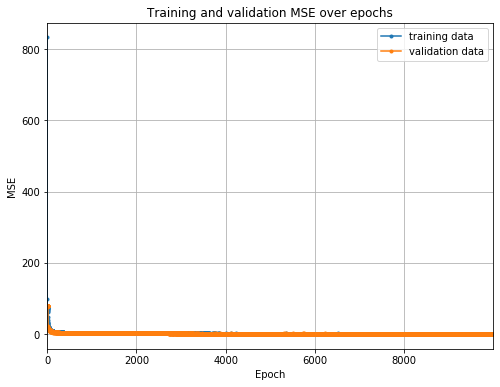

In [114]:
fig, ax = plt.subplots(figsize=(8,6))
result.plot(y=['loss', 'val_loss'], marker='.', ax=ax)
ax.set_xlabel('Epoch')
ax.set_ylabel('MSE')
ax.set_title('Training and validation MSE over epochs')
ax.legend(['training data', 'validation data'])
ax.grid()
fig.savefig('Training and validation MSE over epochs')

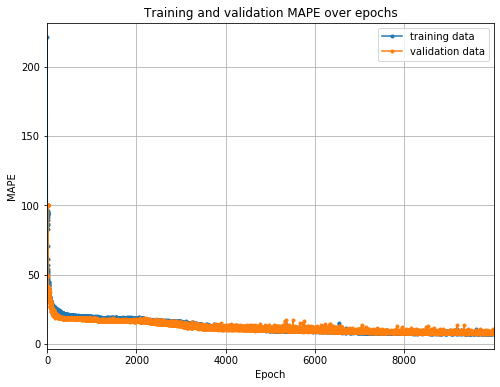

In [115]:
fig, ax = plt.subplots(figsize=(8,6))
result.plot(y=['mape', 'val_mape'], marker='.', ax=ax)
ax.set_xlabel('Epoch')
ax.set_ylabel('MAPE')
ax.set_title('Training and validation MAPE over epochs')
ax.legend(['training data', 'validation data'])
ax.grid()
fig.savefig('Training and validation MAPE over epochs')

In [116]:
train_loss = model.evaluate(x_train, y_train, verbose=0)[0]
train_mape = model.evaluate(x_train, y_train, verbose=0)[1]
#train_mse = model.evaluate(x_train, y_train, verbose=0)[2]
print('training loss (MSE):', train_loss, '\ntraining MAPE:', train_mape, '%\n')
#print('training MSE (custom):', train_mse, '\n')

val_loss = model.evaluate(x_val, y_val, verbose=0)[0]
val_mape = model.evaluate(x_val, y_val, verbose=0)[1]
#val_mse = model.evaluate(x_val, y_val, verbose=0)[2]
print('validation loss (MSE):', val_loss, '\nvalidation MAPE:', val_mape, '%\n')
#print('validation MSE (custom):', val_mse, '\n')

test_loss = model.evaluate(x_test, y_test, verbose=0)[0]
test_mape = model.evaluate(x_test, y_test, verbose=0)[1]
#test_mse = model.evaluate(x_test, y_test, verbose=0)[2]
print('test loss (MSE):', test_loss, '\ntest MAPE:', test_mape, '%')
#print('test MSE (custom):', test_mse, '\n')

training loss (MSE): 0.6005607337556629 
training MAPE: 8.330758 %

validation loss (MSE): 0.586525645520952 
validation MAPE: 8.401582 %

test loss (MSE): 0.6542070200568751 
test MAPE: 8.453566 %


### 6th try

In [117]:
#create model instance
model = Sequential()

#input layer
model.add(Dense(units=32, input_dim=n_features, activation='relu')) 

#hidden layers
model.add(Dense(units=24, input_dim=n_features, activation='relu', 
                      use_bias=True, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(rate=0.2))
model.add(Dense(units=16, input_dim=n_features, activation='relu', 
                      use_bias=True, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
#model.add(Dropout(rate=0.2))
#...

#output layer
model.add(Dense(units=1, activation='relu'))

In [118]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_45 (Dense)             (None, 24)                792       
_________________________________________________________________
dropout_12 (Dropout)         (None, 24)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 16)                400       
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 17        
Total params: 1,561
Trainable params: 1,561
Non-trainable params: 0
_________________________________________________________________


In [119]:
# Compile the model using adam as optimizer and custom_loss as the loss. Use MAPE and MSE as metrics
model.compile(optimizer='adam', loss='mse', metrics=['mape'])

In [120]:
# Train the model. use batch_size=32 and train it for 3000 epochs. use x_val and y_val as validation_data
history = model.fit(x_train, y_train, batch_size=64, epochs=10000, validation_data=(x_val, y_val))

Train on 1533 samples, validate on 171 samples
Epoch 1/10000
1533/1533 [==============================] - 0s 294us/sample - loss: 2121.2632 - mape: 333.7958 - val_loss: 78.7679 - val_mape: 100.0000
Epoch 2/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 91.1895 - mape: 101.0656 - val_loss: 78.7216 - val_mape: 100.0000
Epoch 3/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 82.7435 - mape: 99.6926 - val_loss: 78.6839 - val_mape: 100.0000
Epoch 4/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 85.9843 - mape: 100.5430 - val_loss: 78.6531 - val_mape: 100.0000
Epoch 5/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 83.7298 - mape: 100.1853 - val_loss: 78.6281 - val_mape: 100.0000
Epoch 6/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 82.7389 - mape: 99.8892 - val_loss: 78.6079 - val_mape: 100.0000
Epoch 7/10000
1533/1533 [==============================] - 0s 27

1533/1533 [==============================] - 0s 25us/sample - loss: 78.1165 - mape: 98.7400 - val_loss: 78.5301 - val_mape: 100.0000
Epoch 56/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 78.0548 - mape: 98.5613 - val_loss: 78.5301 - val_mape: 100.0000
Epoch 57/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 78.0248 - mape: 98.3484 - val_loss: 78.5300 - val_mape: 100.0000
Epoch 58/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 77.7002 - mape: 98.5253 - val_loss: 78.5300 - val_mape: 100.0000
Epoch 59/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 78.5757 - mape: 98.9791 - val_loss: 78.5300 - val_mape: 100.0000
Epoch 60/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 78.6767 - mape: 99.0450 - val_loss: 78.5300 - val_mape: 100.0000
Epoch 61/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 77.9237 - mape: 98.3157 - val_loss: 78.5301 

Epoch 110/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 77.2246 - mape: 97.5266 - val_loss: 78.5311 - val_mape: 100.0000
Epoch 111/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 77.4226 - mape: 97.7747 - val_loss: 78.5311 - val_mape: 100.0000
Epoch 112/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 77.5410 - mape: 97.8714 - val_loss: 78.5311 - val_mape: 100.0000
Epoch 113/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 77.6412 - mape: 98.1926 - val_loss: 78.5311 - val_mape: 100.0000
Epoch 114/10000
1533/1533 [==============================] - ETA: 0s - loss: 84.9570 - mape: 99.79 - 0s 25us/sample - loss: 77.7100 - mape: 98.0261 - val_loss: 78.5312 - val_mape: 100.0000
Epoch 115/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 78.3892 - mape: 97.9538 - val_loss: 78.5312 - val_mape: 100.0000
Epoch 116/10000
1533/1533 [==============================] - 0s 25

1533/1533 [==============================] - 0s 37us/sample - loss: 5.5362 - mape: 23.0934 - val_loss: 6.1690 - val_mape: 23.3430
Epoch 166/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 5.7903 - mape: 23.2489 - val_loss: 6.1904 - val_mape: 23.3386
Epoch 167/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 6.0277 - mape: 23.1521 - val_loss: 6.2503 - val_mape: 23.3982
Epoch 168/10000
1533/1533 [==============================] - 0s 48us/sample - loss: 5.4368 - mape: 22.5380 - val_loss: 6.2807 - val_mape: 23.4317
Epoch 169/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 5.5429 - mape: 22.8223 - val_loss: 6.4837 - val_mape: 23.7563
Epoch 170/10000
1533/1533 [==============================] - 0s 23us/sample - loss: 5.9071 - mape: 23.0309 - val_loss: 5.0103 - val_mape: 21.4675
Epoch 171/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 6.0762 - mape: 23.5235 - val_loss: 6.3267 - val_mape: 23

1533/1533 [==============================] - 0s 27us/sample - loss: 4.6659 - mape: 21.4531 - val_loss: 7.4465 - val_mape: 24.7568
Epoch 222/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 4.8704 - mape: 21.8692 - val_loss: 5.7401 - val_mape: 21.7950
Epoch 223/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 4.7028 - mape: 21.6092 - val_loss: 5.7688 - val_mape: 21.7245
Epoch 224/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 4.7684 - mape: 21.7807 - val_loss: 8.0512 - val_mape: 25.7880
Epoch 225/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 4.7911 - mape: 21.4940 - val_loss: 5.5384 - val_mape: 21.3384
Epoch 226/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 4.6191 - mape: 21.2957 - val_loss: 6.1865 - val_mape: 22.4614
Epoch 227/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 4.6358 - mape: 21.4669 - val_loss: 5.9918 - val_mape: 22

1533/1533 [==============================] - 0s 44us/sample - loss: 4.5025 - mape: 20.9205 - val_loss: 4.7096 - val_mape: 19.5928
Epoch 278/10000
1533/1533 [==============================] - 0s 44us/sample - loss: 4.4785 - mape: 20.9773 - val_loss: 4.5342 - val_mape: 19.2958
Epoch 279/10000
1533/1533 [==============================] - 0s 42us/sample - loss: 4.5527 - mape: 21.3950 - val_loss: 5.5415 - val_mape: 20.8936
Epoch 280/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 4.4011 - mape: 20.7259 - val_loss: 4.8130 - val_mape: 19.9367
Epoch 281/10000
1533/1533 [==============================] - 0s 39us/sample - loss: 4.7842 - mape: 21.6764 - val_loss: 5.7228 - val_mape: 21.4507
Epoch 282/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 4.8278 - mape: 21.8344 - val_loss: 5.0927 - val_mape: 20.1679
Epoch 283/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 4.6467 - mape: 21.4487 - val_loss: 3.9911 - val_mape: 18

1533/1533 [==============================] - 0s 28us/sample - loss: 4.3312 - mape: 20.7341 - val_loss: 5.0784 - val_mape: 19.9588
Epoch 334/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 4.2213 - mape: 20.7486 - val_loss: 6.5560 - val_mape: 22.6003
Epoch 335/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 4.3587 - mape: 20.6684 - val_loss: 5.0887 - val_mape: 19.9102
Epoch 336/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 4.1903 - mape: 20.3882 - val_loss: 5.6802 - val_mape: 21.0716
Epoch 337/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 4.3602 - mape: 20.8470 - val_loss: 5.4220 - val_mape: 20.5128
Epoch 338/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 4.3193 - mape: 20.8922 - val_loss: 4.2828 - val_mape: 18.8358
Epoch 339/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 4.3458 - mape: 20.8778 - val_loss: 5.9767 - val_mape: 21

1533/1533 [==============================] - 0s 25us/sample - loss: 4.2911 - mape: 20.7011 - val_loss: 4.7610 - val_mape: 19.4358
Epoch 390/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 4.1179 - mape: 20.4476 - val_loss: 4.8585 - val_mape: 19.6353
Epoch 391/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 4.1842 - mape: 20.7384 - val_loss: 5.1070 - val_mape: 19.8864
Epoch 392/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 4.1500 - mape: 20.6199 - val_loss: 4.8142 - val_mape: 19.4546
Epoch 393/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 4.1921 - mape: 20.4605 - val_loss: 5.2846 - val_mape: 20.2480
Epoch 394/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 4.3443 - mape: 20.8251 - val_loss: 5.5472 - val_mape: 20.6534
Epoch 395/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 4.1234 - mape: 20.4716 - val_loss: 4.9870 - val_mape: 19

Epoch 445/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 4.0980 - mape: 20.5314 - val_loss: 4.8551 - val_mape: 19.4958
Epoch 446/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 4.1013 - mape: 20.4538 - val_loss: 4.8129 - val_mape: 19.4275
Epoch 447/10000
1533/1533 [==============================] - 0s 55us/sample - loss: 3.9369 - mape: 20.2031 - val_loss: 5.7247 - val_mape: 20.9945
Epoch 448/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 4.1949 - mape: 20.7010 - val_loss: 4.7190 - val_mape: 19.3092
Epoch 449/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 4.1306 - mape: 20.7274 - val_loss: 4.3894 - val_mape: 18.8782
Epoch 450/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 4.3367 - mape: 20.9153 - val_loss: 5.1255 - val_mape: 19.9297
Epoch 451/10000
1533/1533 [==============================] - 0s 22us/sample - loss: 4.0960 - mape: 20.3559 - val_loss: 5.035

1533/1533 [==============================] - 0s 31us/sample - loss: 4.0288 - mape: 20.4126 - val_loss: 4.7518 - val_mape: 19.2942
Epoch 502/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 4.0958 - mape: 20.5196 - val_loss: 4.6813 - val_mape: 19.2095
Epoch 503/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 4.0140 - mape: 20.3572 - val_loss: 4.1867 - val_mape: 18.5852
Epoch 504/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 3.9644 - mape: 20.2749 - val_loss: 4.2929 - val_mape: 18.7013
Epoch 505/10000
1533/1533 [==============================] - 0s 43us/sample - loss: 4.0184 - mape: 20.5654 - val_loss: 4.8051 - val_mape: 19.3682
Epoch 506/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 4.0250 - mape: 20.3164 - val_loss: 4.0548 - val_mape: 18.4213
Epoch 507/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 4.1682 - mape: 20.4870 - val_loss: 3.6296 - val_mape: 18

1533/1533 [==============================] - 0s 29us/sample - loss: 4.0219 - mape: 20.5177 - val_loss: 5.6230 - val_mape: 20.7939
Epoch 558/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 4.0980 - mape: 20.6370 - val_loss: 5.1877 - val_mape: 19.9953
Epoch 559/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 3.9019 - mape: 20.0908 - val_loss: 4.5394 - val_mape: 19.0058
Epoch 560/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 3.9417 - mape: 20.3295 - val_loss: 4.2819 - val_mape: 18.7024
Epoch 561/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 4.0393 - mape: 20.4477 - val_loss: 4.7507 - val_mape: 19.3159
Epoch 562/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 4.0812 - mape: 20.4095 - val_loss: 4.5968 - val_mape: 19.1313
Epoch 563/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 4.0192 - mape: 20.2375 - val_loss: 4.6034 - val_mape: 19

Epoch 613/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.9539 - mape: 20.4656 - val_loss: 4.6271 - val_mape: 19.1215
Epoch 614/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 4.0223 - mape: 20.1649 - val_loss: 3.9768 - val_mape: 18.4626
Epoch 615/10000
1533/1533 [==============================] - ETA: 0s - loss: 5.0818 - mape: 23.486 - 0s 28us/sample - loss: 4.0002 - mape: 20.5557 - val_loss: 4.5682 - val_mape: 19.0602
Epoch 616/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 3.8406 - mape: 20.1858 - val_loss: 4.2466 - val_mape: 18.6602
Epoch 617/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 3.9127 - mape: 20.4236 - val_loss: 4.2328 - val_mape: 18.6568
Epoch 618/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 3.9477 - mape: 20.3105 - val_loss: 4.3501 - val_mape: 18.7587
Epoch 619/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 

1533/1533 [==============================] - 0s 32us/sample - loss: 3.8204 - mape: 20.2739 - val_loss: 4.8339 - val_mape: 19.5578
Epoch 669/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 3.8093 - mape: 20.1321 - val_loss: 4.7627 - val_mape: 19.4633
Epoch 670/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 3.8300 - mape: 19.9945 - val_loss: 4.9594 - val_mape: 19.7647
Epoch 671/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 3.8810 - mape: 20.4096 - val_loss: 4.6106 - val_mape: 19.2473
Epoch 672/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.9528 - mape: 20.2214 - val_loss: 3.9087 - val_mape: 18.4973
Epoch 673/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 3.9874 - mape: 20.3232 - val_loss: 4.0351 - val_mape: 18.5740
Epoch 674/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 3.8404 - mape: 20.3432 - val_loss: 4.2946 - val_mape: 18

1533/1533 [==============================] - 0s 36us/sample - loss: 3.8066 - mape: 20.1997 - val_loss: 4.8011 - val_mape: 19.5377
Epoch 724/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 3.7766 - mape: 20.1858 - val_loss: 4.4251 - val_mape: 19.0152
Epoch 725/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 3.7987 - mape: 20.1284 - val_loss: 4.0868 - val_mape: 18.6274
Epoch 726/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 3.9149 - mape: 20.3971 - val_loss: 4.2615 - val_mape: 18.8070
Epoch 727/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.8227 - mape: 20.3077 - val_loss: 4.9488 - val_mape: 19.7847
Epoch 728/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 3.8914 - mape: 20.4258 - val_loss: 5.3849 - val_mape: 20.4072
Epoch 729/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.8099 - mape: 20.1563 - val_loss: 3.9772 - val_mape: 18

1533/1533 [==============================] - 0s 31us/sample - loss: 3.7991 - mape: 20.2419 - val_loss: 4.8359 - val_mape: 19.5625
Epoch 780/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 3.7219 - mape: 19.8029 - val_loss: 4.4616 - val_mape: 19.0165
Epoch 781/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 3.7739 - mape: 20.1314 - val_loss: 4.9630 - val_mape: 19.7859
Epoch 782/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 3.7524 - mape: 20.1533 - val_loss: 4.3577 - val_mape: 18.8939
Epoch 783/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 3.7283 - mape: 20.1392 - val_loss: 4.1685 - val_mape: 18.6512
Epoch 784/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.7748 - mape: 20.2028 - val_loss: 4.3378 - val_mape: 18.8025
Epoch 785/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 3.7741 - mape: 20.2192 - val_loss: 4.1185 - val_mape: 18

Epoch 835/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 3.7746 - mape: 20.2397 - val_loss: 4.6774 - val_mape: 19.3354
Epoch 836/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 3.9528 - mape: 20.4698 - val_loss: 3.6406 - val_mape: 18.2728
Epoch 837/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 3.8268 - mape: 20.3103 - val_loss: 3.8770 - val_mape: 18.4153
Epoch 838/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 3.7758 - mape: 19.9915 - val_loss: 3.9352 - val_mape: 18.4207
Epoch 839/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 3.7656 - mape: 20.4421 - val_loss: 4.4552 - val_mape: 19.0125
Epoch 840/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.7500 - mape: 20.1106 - val_loss: 4.3114 - val_mape: 18.8081
Epoch 841/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 3.7103 - mape: 20.0012 - val_loss: 4.145

1533/1533 [==============================] - 0s 31us/sample - loss: 3.8290 - mape: 20.4459 - val_loss: 5.2642 - val_mape: 20.2317
Epoch 891/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 3.8045 - mape: 20.2239 - val_loss: 4.2305 - val_mape: 18.6776
Epoch 892/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 3.7662 - mape: 20.1034 - val_loss: 5.3169 - val_mape: 20.3399
Epoch 893/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 3.7973 - mape: 19.9716 - val_loss: 4.0364 - val_mape: 18.5056
Epoch 894/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 3.7958 - mape: 20.3415 - val_loss: 4.4204 - val_mape: 18.9069
Epoch 895/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 3.6944 - mape: 19.8903 - val_loss: 4.2987 - val_mape: 18.6900
Epoch 896/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 3.7770 - mape: 20.2553 - val_loss: 4.1467 - val_mape: 18

1533/1533 [==============================] - 0s 30us/sample - loss: 3.7652 - mape: 20.3651 - val_loss: 4.3548 - val_mape: 18.8638
Epoch 947/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 3.6793 - mape: 19.9613 - val_loss: 3.9077 - val_mape: 18.4245
Epoch 948/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 3.7187 - mape: 20.1056 - val_loss: 4.4381 - val_mape: 18.9396
Epoch 949/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 3.6633 - mape: 19.8694 - val_loss: 4.4515 - val_mape: 18.9734
Epoch 950/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 3.7052 - mape: 19.9945 - val_loss: 3.8775 - val_mape: 18.3253
Epoch 951/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.6926 - mape: 20.0587 - val_loss: 4.1855 - val_mape: 18.6350
Epoch 952/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 3.7783 - mape: 20.1747 - val_loss: 3.6129 - val_mape: 18

1533/1533 [==============================] - 0s 36us/sample - loss: 3.6831 - mape: 20.1175 - val_loss: 4.5183 - val_mape: 19.0541
Epoch 1002/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 3.7631 - mape: 20.1879 - val_loss: 4.1195 - val_mape: 18.5301
Epoch 1003/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 3.7342 - mape: 20.0548 - val_loss: 4.1139 - val_mape: 18.4518
Epoch 1004/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 3.7337 - mape: 20.1800 - val_loss: 4.3481 - val_mape: 18.7171
Epoch 1005/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 3.7030 - mape: 19.9808 - val_loss: 3.8425 - val_mape: 18.3171
Epoch 1006/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 3.7191 - mape: 20.1211 - val_loss: 4.1112 - val_mape: 18.5175
Epoch 1007/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 3.6893 - mape: 20.0462 - val_loss: 3.9527 - val_ma

1533/1533 [==============================] - 0s 29us/sample - loss: 3.7483 - mape: 19.8545 - val_loss: 3.9379 - val_mape: 18.2985
Epoch 1057/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 3.7240 - mape: 20.1972 - val_loss: 4.1934 - val_mape: 18.6141
Epoch 1058/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.6464 - mape: 19.7430 - val_loss: 3.7136 - val_mape: 18.1253
Epoch 1059/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 3.7230 - mape: 20.3588 - val_loss: 4.3596 - val_mape: 18.7096
Epoch 1060/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.8177 - mape: 20.0632 - val_loss: 4.2059 - val_mape: 18.5476
Epoch 1061/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.7696 - mape: 20.2644 - val_loss: 3.7326 - val_mape: 18.1660
Epoch 1062/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 3.7262 - mape: 20.0678 - val_loss: 4.1107 - val_ma

1533/1533 [==============================] - 0s 29us/sample - loss: 3.6782 - mape: 19.9428 - val_loss: 3.9339 - val_mape: 18.2146
Epoch 1112/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 3.7061 - mape: 20.2538 - val_loss: 4.0960 - val_mape: 18.4252
Epoch 1113/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.7014 - mape: 19.8326 - val_loss: 3.7084 - val_mape: 18.1112
Epoch 1114/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.7079 - mape: 20.3331 - val_loss: 4.1157 - val_mape: 18.4363
Epoch 1115/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 3.7077 - mape: 19.9221 - val_loss: 3.9495 - val_mape: 18.2608
Epoch 1116/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 3.9050 - mape: 20.6243 - val_loss: 3.5792 - val_mape: 18.0734
Epoch 1117/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 3.7236 - mape: 19.7858 - val_loss: 4.5111 - val_ma

1533/1533 [==============================] - 0s 33us/sample - loss: 3.6182 - mape: 19.9551 - val_loss: 3.8909 - val_mape: 18.1421
Epoch 1167/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.7131 - mape: 19.9945 - val_loss: 3.8460 - val_mape: 18.1876
Epoch 1168/10000
1533/1533 [==============================] - ETA: 0s - loss: 3.1226 - mape: 18.385 - 0s 31us/sample - loss: 3.7071 - mape: 20.1057 - val_loss: 3.6220 - val_mape: 17.9605
Epoch 1169/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 3.6339 - mape: 20.0232 - val_loss: 3.7644 - val_mape: 18.0748
Epoch 1170/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 3.6958 - mape: 19.8700 - val_loss: 3.8718 - val_mape: 18.1955
Epoch 1171/10000
1533/1533 [==============================] - 0s 39us/sample - loss: 3.6419 - mape: 19.9137 - val_loss: 4.3788 - val_mape: 18.7369
Epoch 1172/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.6471 - m

1533/1533 [==============================] - 0s 30us/sample - loss: 3.6645 - mape: 19.9168 - val_loss: 3.8268 - val_mape: 18.0188
Epoch 1222/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 3.6078 - mape: 19.7949 - val_loss: 3.5433 - val_mape: 17.7922
Epoch 1223/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 3.6647 - mape: 19.9614 - val_loss: 4.4904 - val_mape: 18.7011
Epoch 1224/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 3.6322 - mape: 19.5763 - val_loss: 4.1546 - val_mape: 18.2867
Epoch 1225/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 3.6163 - mape: 20.0066 - val_loss: 4.3404 - val_mape: 18.7371
Epoch 1226/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 3.7782 - mape: 20.1808 - val_loss: 3.7514 - val_mape: 17.9732
Epoch 1227/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 3.6533 - mape: 19.8415 - val_loss: 3.6560 - val_ma

Epoch 1277/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 3.5238 - mape: 19.7108 - val_loss: 3.7468 - val_mape: 17.5542
Epoch 1278/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 3.4630 - mape: 19.3123 - val_loss: 3.6385 - val_mape: 17.5447
Epoch 1279/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 3.4258 - mape: 19.1089 - val_loss: 3.3657 - val_mape: 17.3084
Epoch 1280/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 3.4814 - mape: 19.5571 - val_loss: 3.9649 - val_mape: 17.7103
Epoch 1281/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.4538 - mape: 19.1592 - val_loss: 3.7787 - val_mape: 17.4965
Epoch 1282/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 3.4385 - mape: 19.2400 - val_loss: 3.6759 - val_mape: 17.5451
Epoch 1283/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.4767 - mape: 19.5059 - val_loss

Epoch 1333/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 3.2695 - mape: 18.6246 - val_loss: 3.8405 - val_mape: 16.5770
Epoch 1334/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 3.2239 - mape: 18.2080 - val_loss: 3.2240 - val_mape: 16.2015
Epoch 1335/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 3.2042 - mape: 18.5023 - val_loss: 3.4177 - val_mape: 16.2532
Epoch 1336/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 3.1882 - mape: 18.2231 - val_loss: 3.8041 - val_mape: 16.3803
Epoch 1337/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 3.1911 - mape: 18.1666 - val_loss: 3.3866 - val_mape: 15.9529
Epoch 1338/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 3.2920 - mape: 18.6049 - val_loss: 3.0751 - val_mape: 16.4454
Epoch 1339/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 3.1681 - mape: 18.0301 - val_loss

1533/1533 [==============================] - 0s 29us/sample - loss: 2.8600 - mape: 16.7746 - val_loss: 3.1212 - val_mape: 14.8297
Epoch 1389/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 2.9146 - mape: 17.2542 - val_loss: 3.1800 - val_mape: 15.0308
Epoch 1390/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 2.7318 - mape: 16.4042 - val_loss: 3.5650 - val_mape: 15.7637
Epoch 1391/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 2.7072 - mape: 16.1805 - val_loss: 2.7061 - val_mape: 14.4940
Epoch 1392/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.7162 - mape: 16.1949 - val_loss: 2.8692 - val_mape: 14.9741
Epoch 1393/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 2.8006 - mape: 16.7458 - val_loss: 3.4732 - val_mape: 15.6832
Epoch 1394/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 2.7305 - mape: 16.3531 - val_loss: 2.9531 - val_ma

Epoch 1443/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 2.3773 - mape: 14.7956 - val_loss: 2.5758 - val_mape: 13.8898
Epoch 1444/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 2.4332 - mape: 15.1466 - val_loss: 2.6979 - val_mape: 13.6225
Epoch 1445/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 2.4577 - mape: 15.2562 - val_loss: 2.7887 - val_mape: 14.0465
Epoch 1446/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 2.4807 - mape: 15.2337 - val_loss: 2.9579 - val_mape: 14.4313
Epoch 1447/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.4000 - mape: 14.9534 - val_loss: 2.5559 - val_mape: 13.6816
Epoch 1448/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 2.5407 - mape: 15.5495 - val_loss: 2.5684 - val_mape: 13.7280
Epoch 1449/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 2.3541 - mape: 14.7300 - val_loss

1533/1533 [==============================] - 0s 31us/sample - loss: 2.1754 - mape: 13.9514 - val_loss: 2.4905 - val_mape: 13.0647
Epoch 1499/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.2780 - mape: 14.3020 - val_loss: 2.9808 - val_mape: 14.4686
Epoch 1500/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 2.1530 - mape: 13.8547 - val_loss: 3.0579 - val_mape: 14.6689
Epoch 1501/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.1953 - mape: 13.8120 - val_loss: 2.3085 - val_mape: 12.4348
Epoch 1502/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.0581 - mape: 13.3450 - val_loss: 2.3259 - val_mape: 12.6002
Epoch 1503/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.1241 - mape: 13.6408 - val_loss: 2.3237 - val_mape: 12.8035
Epoch 1504/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 2.0279 - mape: 13.2203 - val_loss: 2.5797 - val_ma

1533/1533 [==============================] - 0s 31us/sample - loss: 1.8788 - mape: 12.6531 - val_loss: 2.2399 - val_mape: 12.6324
Epoch 1554/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.9227 - mape: 12.8906 - val_loss: 2.5780 - val_mape: 13.7819
Epoch 1555/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.8590 - mape: 12.5471 - val_loss: 2.4074 - val_mape: 13.1072
Epoch 1556/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.9248 - mape: 12.8593 - val_loss: 2.0570 - val_mape: 12.0701
Epoch 1557/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.8277 - mape: 12.5560 - val_loss: 2.2045 - val_mape: 12.6219
Epoch 1558/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.8149 - mape: 12.4234 - val_loss: 2.4848 - val_mape: 13.6824
Epoch 1559/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.7967 - mape: 12.2611 - val_loss: 2.1300 - val_ma

1533/1533 [==============================] - 0s 28us/sample - loss: 1.8105 - mape: 12.4651 - val_loss: 2.1400 - val_mape: 12.5174
Epoch 1609/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.7453 - mape: 12.0296 - val_loss: 2.4919 - val_mape: 13.5592
Epoch 1610/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.8124 - mape: 12.2256 - val_loss: 2.0329 - val_mape: 12.1093
Epoch 1611/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.7750 - mape: 12.1873 - val_loss: 2.2358 - val_mape: 12.4028
Epoch 1612/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 1.6752 - mape: 11.8491 - val_loss: 2.4180 - val_mape: 13.2163
Epoch 1613/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.8543 - mape: 12.6014 - val_loss: 1.7828 - val_mape: 11.6311
Epoch 1614/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.9474 - mape: 13.0667 - val_loss: 2.3792 - val_ma

Epoch 1664/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 1.6885 - mape: 11.9656 - val_loss: 2.8345 - val_mape: 14.6782
Epoch 1665/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.7215 - mape: 11.9590 - val_loss: 1.9089 - val_mape: 11.5823
Epoch 1666/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.6841 - mape: 11.8460 - val_loss: 2.1046 - val_mape: 12.1173
Epoch 1667/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.6813 - mape: 11.9207 - val_loss: 2.4870 - val_mape: 13.7332
Epoch 1668/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.6899 - mape: 11.8563 - val_loss: 2.4336 - val_mape: 13.9605
Epoch 1669/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.6814 - mape: 11.8852 - val_loss: 2.4180 - val_mape: 13.4649
Epoch 1670/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.7417 - mape: 12.1135 - val_loss

Epoch 1719/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.6369 - mape: 11.5494 - val_loss: 2.2655 - val_mape: 13.0903
Epoch 1720/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.6279 - mape: 11.5673 - val_loss: 2.6848 - val_mape: 14.1905
Epoch 1721/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.7094 - mape: 11.8929 - val_loss: 1.8750 - val_mape: 11.3709
Epoch 1722/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.7978 - mape: 12.2611 - val_loss: 1.6565 - val_mape: 10.8316
Epoch 1723/10000
1533/1533 [==============================] - ETA: 0s - loss: 1.6831 - mape: 12.295 - 0s 29us/sample - loss: 1.8194 - mape: 12.5006 - val_loss: 2.1343 - val_mape: 12.3365
Epoch 1724/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 1.7286 - mape: 12.1959 - val_loss: 2.5927 - val_mape: 13.9624
Epoch 1725/10000
1533/1533 [==============================] - 0s 33us/sample -

1533/1533 [==============================] - 0s 29us/sample - loss: 1.6395 - mape: 11.7950 - val_loss: 1.9607 - val_mape: 11.8711
Epoch 1775/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.5772 - mape: 11.4950 - val_loss: 2.1113 - val_mape: 12.2700
Epoch 1776/10000
1533/1533 [==============================] - ETA: 0s - loss: 1.5601 - mape: 11.580 - 0s 31us/sample - loss: 1.5193 - mape: 11.1556 - val_loss: 2.3570 - val_mape: 13.1091
Epoch 1777/10000
1533/1533 [==============================] - 0s 39us/sample - loss: 1.6107 - mape: 11.2981 - val_loss: 3.2475 - val_mape: 16.0348
Epoch 1778/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.6031 - mape: 11.4807 - val_loss: 1.7632 - val_mape: 11.6366
Epoch 1779/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.4914 - mape: 11.0836 - val_loss: 2.8926 - val_mape: 14.8437
Epoch 1780/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.5636 - m

1533/1533 [==============================] - 0s 25us/sample - loss: 1.4975 - mape: 11.0000 - val_loss: 1.8954 - val_mape: 11.4041
Epoch 1830/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.4789 - mape: 10.9892 - val_loss: 2.3713 - val_mape: 13.3387
Epoch 1831/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.4871 - mape: 10.9426 - val_loss: 2.3324 - val_mape: 13.0781
Epoch 1832/10000
1533/1533 [==============================] - 0s 43us/sample - loss: 1.4992 - mape: 10.9845 - val_loss: 2.2130 - val_mape: 12.6510
Epoch 1833/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.5032 - mape: 11.1208 - val_loss: 2.2430 - val_mape: 12.9245
Epoch 1834/10000
1533/1533 [==============================] - 0s 24us/sample - loss: 1.5519 - mape: 11.2230 - val_loss: 1.6085 - val_mape: 10.6005
Epoch 1835/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.4098 - mape: 10.5470 - val_loss: 2.3140 - val_ma

Epoch 1885/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.4200 - mape: 10.4581 - val_loss: 2.4465 - val_mape: 13.4578
Epoch 1886/10000
1533/1533 [==============================] - 0s 47us/sample - loss: 1.4532 - mape: 10.7475 - val_loss: 1.9049 - val_mape: 11.8712
Epoch 1887/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 1.4234 - mape: 10.5425 - val_loss: 2.2326 - val_mape: 13.1276
Epoch 1888/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3930 - mape: 10.4400 - val_loss: 1.8799 - val_mape: 11.6933
Epoch 1889/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.3512 - mape: 10.3632 - val_loss: 1.7604 - val_mape: 11.1354
Epoch 1890/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.5081 - mape: 10.9280 - val_loss: 2.4515 - val_mape: 13.2436
Epoch 1891/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3471 - mape: 10.3148 - val_loss

Epoch 1941/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3501 - mape: 10.4556 - val_loss: 2.5366 - val_mape: 13.9440
Epoch 1942/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.4280 - mape: 10.5651 - val_loss: 2.3060 - val_mape: 13.3565
Epoch 1943/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3681 - mape: 10.3947 - val_loss: 1.7680 - val_mape: 11.5105
Epoch 1944/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.3107 - mape: 10.2368 - val_loss: 2.1443 - val_mape: 12.4080
Epoch 1945/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.3636 - mape: 10.2506 - val_loss: 1.7608 - val_mape: 11.1739
Epoch 1946/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.2856 - mape: 10.1114 - val_loss: 1.5095 - val_mape: 10.1710
Epoch 1947/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 1.2940 - mape: 9.9235 - val_loss:

Epoch 1997/10000
1533/1533 [==============================] - 0s 24us/sample - loss: 1.3837 - mape: 10.5600 - val_loss: 2.3504 - val_mape: 13.6874
Epoch 1998/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2781 - mape: 10.0337 - val_loss: 1.7311 - val_mape: 11.3850
Epoch 1999/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.3492 - mape: 10.3511 - val_loss: 2.1299 - val_mape: 12.4779
Epoch 2000/10000
1533/1533 [==============================] - 0s 51us/sample - loss: 1.2873 - mape: 9.8852 - val_loss: 1.9894 - val_mape: 12.2726
Epoch 2001/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.2512 - mape: 9.7327 - val_loss: 2.3804 - val_mape: 13.5791
Epoch 2002/10000
1533/1533 [==============================] - 0s 24us/sample - loss: 1.3610 - mape: 10.3607 - val_loss: 1.8996 - val_mape: 11.5052
Epoch 2003/10000
1533/1533 [==============================] - 0s 24us/sample - loss: 1.3513 - mape: 10.2661 - val_loss: 

Epoch 2053/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 1.4897 - mape: 11.0441 - val_loss: 2.9760 - val_mape: 15.1671
Epoch 2054/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 1.2916 - mape: 10.0757 - val_loss: 2.4192 - val_mape: 14.0552
Epoch 2055/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.2309 - mape: 9.7415 - val_loss: 2.2386 - val_mape: 13.0551
Epoch 2056/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.2248 - mape: 9.8044 - val_loss: 1.6203 - val_mape: 10.8829
Epoch 2057/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3052 - mape: 10.0610 - val_loss: 2.4677 - val_mape: 13.8508
Epoch 2058/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2681 - mape: 10.0271 - val_loss: 2.1081 - val_mape: 12.9762
Epoch 2059/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2271 - mape: 9.7438 - val_loss: 1

1533/1533 [==============================] - 0s 25us/sample - loss: 1.2154 - mape: 9.8062 - val_loss: 2.2053 - val_mape: 13.3182
Epoch 2109/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.2128 - mape: 9.8360 - val_loss: 2.6279 - val_mape: 14.8118
Epoch 2110/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.4427 - mape: 10.7879 - val_loss: 2.2771 - val_mape: 13.2302
Epoch 2111/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 1.2472 - mape: 10.1784 - val_loss: 2.3987 - val_mape: 14.1751
Epoch 2112/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.2645 - mape: 9.9795 - val_loss: 2.5700 - val_mape: 14.2205
Epoch 2113/10000
1533/1533 [==============================] - 0s 24us/sample - loss: 1.2877 - mape: 10.1496 - val_loss: 2.3795 - val_mape: 13.9579
Epoch 2114/10000
1533/1533 [==============================] - ETA: 0s - loss: 1.3807 - mape: 10.492 - 0s 25us/sample - loss: 1.3756 - mape

Epoch 2164/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.0944 - mape: 9.2205 - val_loss: 2.3340 - val_mape: 13.9071
Epoch 2165/10000
1533/1533 [==============================] - 0s 24us/sample - loss: 1.2603 - mape: 10.0136 - val_loss: 2.7078 - val_mape: 14.1979
Epoch 2166/10000
1533/1533 [==============================] - ETA: 0s - loss: 1.0956 - mape: 10.065 - 0s 25us/sample - loss: 1.2003 - mape: 9.7543 - val_loss: 1.8494 - val_mape: 11.5814
Epoch 2167/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2268 - mape: 9.6030 - val_loss: 2.2708 - val_mape: 13.4753
Epoch 2168/10000
1533/1533 [==============================] - 0s 41us/sample - loss: 1.1924 - mape: 9.5033 - val_loss: 1.8248 - val_mape: 11.8274
Epoch 2169/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.1887 - mape: 9.6754 - val_loss: 1.9472 - val_mape: 11.8371
Epoch 2170/10000
1533/1533 [==============================] - 0s 24us/sample - loss

1533/1533 [==============================] - 0s 26us/sample - loss: 1.2921 - mape: 10.1279 - val_loss: 2.1119 - val_mape: 12.6802
Epoch 2220/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.2008 - mape: 9.8279 - val_loss: 2.2725 - val_mape: 13.3401
Epoch 2221/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.1110 - mape: 9.3474 - val_loss: 1.9363 - val_mape: 12.4168
Epoch 2222/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2359 - mape: 9.8550 - val_loss: 1.8464 - val_mape: 12.0774
Epoch 2223/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.2652 - mape: 10.0668 - val_loss: 2.1958 - val_mape: 12.9040
Epoch 2224/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1955 - mape: 9.6904 - val_loss: 2.5339 - val_mape: 14.2909
Epoch 2225/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 1.1630 - mape: 9.5002 - val_loss: 1.8224 - val_mape: 1

1533/1533 [==============================] - 0s 25us/sample - loss: 1.1780 - mape: 9.6714 - val_loss: 2.9375 - val_mape: 14.9540
Epoch 2276/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.3337 - mape: 10.2848 - val_loss: 2.5320 - val_mape: 13.8271
Epoch 2277/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.2208 - mape: 9.8592 - val_loss: 1.9771 - val_mape: 12.4140
Epoch 2278/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.0999 - mape: 9.2795 - val_loss: 1.9458 - val_mape: 12.0756
Epoch 2279/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.0836 - mape: 9.0771 - val_loss: 1.9516 - val_mape: 12.2824
Epoch 2280/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.0928 - mape: 9.1031 - val_loss: 1.6213 - val_mape: 10.9084
Epoch 2281/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2387 - mape: 9.9913 - val_loss: 1.6174 - val_mape: 10

Epoch 2331/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.1784 - mape: 9.5356 - val_loss: 1.4393 - val_mape: 9.8406
Epoch 2332/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.1903 - mape: 9.6360 - val_loss: 1.7370 - val_mape: 11.4159
Epoch 2333/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2340 - mape: 9.8821 - val_loss: 1.8595 - val_mape: 12.0316
Epoch 2334/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2559 - mape: 9.8064 - val_loss: 1.7565 - val_mape: 11.5717
Epoch 2335/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.1351 - mape: 9.3485 - val_loss: 2.2033 - val_mape: 13.0781
Epoch 2336/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.1795 - mape: 9.3986 - val_loss: 2.1385 - val_mape: 12.3253
Epoch 2337/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.0616 - mape: 9.1792 - val_loss: 2.3127

1533/1533 [==============================] - 0s 38us/sample - loss: 1.1090 - mape: 9.2951 - val_loss: 2.3076 - val_mape: 12.7082
Epoch 2388/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.2022 - mape: 9.7421 - val_loss: 2.9521 - val_mape: 15.7710
Epoch 2389/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.1303 - mape: 9.4631 - val_loss: 1.8431 - val_mape: 11.8209
Epoch 2390/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.1973 - mape: 9.6884 - val_loss: 1.8090 - val_mape: 11.9311
Epoch 2391/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.1624 - mape: 9.5086 - val_loss: 2.5005 - val_mape: 14.3999
Epoch 2392/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.1258 - mape: 9.2642 - val_loss: 2.2007 - val_mape: 13.2366
Epoch 2393/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1156 - mape: 9.3772 - val_loss: 2.7585 - val_mape: 15.

1533/1533 [==============================] - 0s 25us/sample - loss: 1.0694 - mape: 9.0582 - val_loss: 2.3025 - val_mape: 13.5213
Epoch 2443/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.1653 - mape: 9.5565 - val_loss: 1.6558 - val_mape: 10.8315
Epoch 2444/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.0417 - mape: 8.9875 - val_loss: 2.1408 - val_mape: 12.7811
Epoch 2445/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 1.0343 - mape: 8.9333 - val_loss: 2.1251 - val_mape: 13.1321
Epoch 2446/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0713 - mape: 9.0793 - val_loss: 2.1009 - val_mape: 12.8307
Epoch 2447/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.0442 - mape: 9.0125 - val_loss: 1.5026 - val_mape: 10.4846
Epoch 2448/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0297 - mape: 8.9680 - val_loss: 1.6571 - val_mape: 11.

Epoch 2498/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3565 - mape: 10.4323 - val_loss: 2.6538 - val_mape: 14.9923
Epoch 2499/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1912 - mape: 9.8870 - val_loss: 1.7017 - val_mape: 10.9549
Epoch 2500/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.1116 - mape: 9.3398 - val_loss: 1.4820 - val_mape: 10.3328
Epoch 2501/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 1.1918 - mape: 9.5035 - val_loss: 2.2977 - val_mape: 13.8427
Epoch 2502/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.1056 - mape: 9.2862 - val_loss: 1.4461 - val_mape: 10.5276
Epoch 2503/10000
1533/1533 [==============================] - 0s 24us/sample - loss: 1.0657 - mape: 8.9704 - val_loss: 2.1733 - val_mape: 12.9204
Epoch 2504/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.1209 - mape: 9.4664 - val_loss: 1.62

1533/1533 [==============================] - 0s 32us/sample - loss: 1.1458 - mape: 9.7098 - val_loss: 1.4091 - val_mape: 10.2149
Epoch 2554/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.0314 - mape: 8.8453 - val_loss: 3.0953 - val_mape: 15.8558
Epoch 2555/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.0732 - mape: 9.1164 - val_loss: 1.9718 - val_mape: 12.6263
Epoch 2556/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0924 - mape: 9.1167 - val_loss: 2.5372 - val_mape: 13.9145
Epoch 2557/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1721 - mape: 9.4377 - val_loss: 2.0213 - val_mape: 12.2966
Epoch 2558/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.1080 - mape: 9.2869 - val_loss: 1.9261 - val_mape: 12.0780
Epoch 2559/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.0903 - mape: 9.0286 - val_loss: 2.3615 - val_mape: 13.

1533/1533 [==============================] - 0s 30us/sample - loss: 1.0207 - mape: 8.9034 - val_loss: 2.1367 - val_mape: 13.3940
Epoch 2609/10000
1533/1533 [==============================] - ETA: 0s - loss: 0.8335 - mape: 7.52 - 0s 33us/sample - loss: 1.1004 - mape: 9.1152 - val_loss: 2.1945 - val_mape: 12.9951
Epoch 2610/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 1.0488 - mape: 9.1031 - val_loss: 1.9829 - val_mape: 12.6414
Epoch 2611/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0113 - mape: 8.8258 - val_loss: 2.0892 - val_mape: 12.9113
Epoch 2612/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0572 - mape: 9.1416 - val_loss: 1.7573 - val_mape: 11.1415
Epoch 2613/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.0458 - mape: 9.0881 - val_loss: 1.4508 - val_mape: 10.7524
Epoch 2614/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0802 - mape: 9.2

Epoch 2664/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.0542 - mape: 8.9682 - val_loss: 2.0340 - val_mape: 12.8095
Epoch 2665/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.9551 - mape: 8.6967 - val_loss: 2.2909 - val_mape: 13.7815
Epoch 2666/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 1.0170 - mape: 8.7805 - val_loss: 1.9696 - val_mape: 12.8652
Epoch 2667/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0630 - mape: 8.8363 - val_loss: 2.2507 - val_mape: 13.5237
Epoch 2668/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.9678 - mape: 8.6121 - val_loss: 1.8244 - val_mape: 12.1171
Epoch 2669/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.0294 - mape: 8.9634 - val_loss: 1.9105 - val_mape: 11.8405
Epoch 2670/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.1229 - mape: 9.3054 - val_loss: 1.467

1533/1533 [==============================] - 0s 46us/sample - loss: 0.9294 - mape: 8.5924 - val_loss: 2.0988 - val_mape: 13.2571
Epoch 2721/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 0.9754 - mape: 8.5399 - val_loss: 2.2753 - val_mape: 13.8538
Epoch 2722/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.0079 - mape: 8.9095 - val_loss: 2.0303 - val_mape: 12.4843
Epoch 2723/10000
1533/1533 [==============================] - 0s 44us/sample - loss: 1.0675 - mape: 9.0054 - val_loss: 2.0773 - val_mape: 12.9584
Epoch 2724/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 0.9553 - mape: 8.6792 - val_loss: 2.1983 - val_mape: 13.3730
Epoch 2725/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 1.0394 - mape: 9.0611 - val_loss: 2.4847 - val_mape: 14.7384
Epoch 2726/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 1.0232 - mape: 8.8145 - val_loss: 2.0982 - val_mape: 13.

Epoch 2776/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.9789 - mape: 8.8100 - val_loss: 1.8711 - val_mape: 12.2035
Epoch 2777/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.9796 - mape: 8.7881 - val_loss: 2.1689 - val_mape: 13.5844
Epoch 2778/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0025 - mape: 8.7209 - val_loss: 2.1738 - val_mape: 13.1705
Epoch 2779/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 1.1350 - mape: 9.3866 - val_loss: 2.3959 - val_mape: 14.1636
Epoch 2780/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.0897 - mape: 9.2587 - val_loss: 1.8061 - val_mape: 11.6202
Epoch 2781/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0400 - mape: 9.0772 - val_loss: 1.8254 - val_mape: 11.9951
Epoch 2782/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0667 - mape: 9.1915 - val_loss: 2.036

1533/1533 [==============================] - 0s 28us/sample - loss: 0.9724 - mape: 8.6479 - val_loss: 1.9353 - val_mape: 12.7228
Epoch 2833/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.0279 - mape: 8.9841 - val_loss: 1.9805 - val_mape: 12.4164
Epoch 2834/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.2380 - mape: 10.0423 - val_loss: 1.9946 - val_mape: 13.0223
Epoch 2835/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.9570 - mape: 8.6440 - val_loss: 1.5436 - val_mape: 10.9118
Epoch 2836/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.0099 - mape: 9.0319 - val_loss: 2.6761 - val_mape: 14.7704
Epoch 2837/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.0912 - mape: 9.2763 - val_loss: 1.8329 - val_mape: 11.8298
Epoch 2838/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 1.0402 - mape: 9.0475 - val_loss: 2.0689 - val_mape: 12

Epoch 2888/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.9989 - mape: 8.7923 - val_loss: 1.6132 - val_mape: 11.2820
Epoch 2889/10000
1533/1533 [==============================] - 0s 42us/sample - loss: 1.0002 - mape: 8.9576 - val_loss: 1.7766 - val_mape: 11.6046
Epoch 2890/10000
1533/1533 [==============================] - 0s 49us/sample - loss: 0.9722 - mape: 8.6697 - val_loss: 2.1957 - val_mape: 13.3284
Epoch 2891/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.0273 - mape: 9.0224 - val_loss: 2.0568 - val_mape: 12.6876
Epoch 2892/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 0.9869 - mape: 8.9504 - val_loss: 1.9653 - val_mape: 12.3342
Epoch 2893/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.9962 - mape: 8.6769 - val_loss: 1.6706 - val_mape: 11.3609
Epoch 2894/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0112 - mape: 9.0069 - val_loss: 1.910

1533/1533 [==============================] - 0s 32us/sample - loss: 0.9454 - mape: 8.6891 - val_loss: 2.4569 - val_mape: 14.1586
Epoch 2945/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.9471 - mape: 8.5450 - val_loss: 1.6161 - val_mape: 11.3956
Epoch 2946/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.9218 - mape: 8.5203 - val_loss: 1.9323 - val_mape: 12.2596
Epoch 2947/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.9401 - mape: 8.6476 - val_loss: 1.6054 - val_mape: 11.1910
Epoch 2948/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.9676 - mape: 8.8080 - val_loss: 1.3710 - val_mape: 10.5222
Epoch 2949/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.9019 - mape: 8.5739 - val_loss: 1.7171 - val_mape: 11.4450
Epoch 2950/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.9471 - mape: 8.6303 - val_loss: 1.3581 - val_mape: 10.

1533/1533 [==============================] - 0s 37us/sample - loss: 0.9290 - mape: 8.5981 - val_loss: 1.8169 - val_mape: 12.0977
Epoch 3000/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.9513 - mape: 8.6786 - val_loss: 1.9270 - val_mape: 12.1535
Epoch 3001/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.0406 - mape: 9.1386 - val_loss: 1.7072 - val_mape: 11.6326
Epoch 3002/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 0.9164 - mape: 8.3291 - val_loss: 1.6299 - val_mape: 11.2606
Epoch 3003/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.9609 - mape: 8.5286 - val_loss: 1.1933 - val_mape: 9.5788
Epoch 3004/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.8470 - mape: 8.1085 - val_loss: 1.6110 - val_mape: 11.4862
Epoch 3005/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.9161 - mape: 8.5424 - val_loss: 1.7345 - val_mape: 11.1

Epoch 3055/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0526 - mape: 9.0455 - val_loss: 1.8805 - val_mape: 12.4563
Epoch 3056/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.9395 - mape: 8.5759 - val_loss: 1.2762 - val_mape: 10.1207
Epoch 3057/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0219 - mape: 8.9789 - val_loss: 1.4456 - val_mape: 10.5937
Epoch 3058/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.9919 - mape: 8.8670 - val_loss: 1.3894 - val_mape: 10.0575
Epoch 3059/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.9943 - mape: 8.9003 - val_loss: 1.1691 - val_mape: 9.3059
Epoch 3060/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8603 - mape: 8.2237 - val_loss: 2.0689 - val_mape: 12.7035
Epoch 3061/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8748 - mape: 8.2681 - val_loss: 1.9349

Epoch 3111/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.9891 - mape: 8.8291 - val_loss: 1.5581 - val_mape: 11.2519
Epoch 3112/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.9292 - mape: 8.5324 - val_loss: 1.6257 - val_mape: 11.2513
Epoch 3113/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.8572 - mape: 8.1549 - val_loss: 1.5022 - val_mape: 11.1280
Epoch 3114/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.8769 - mape: 8.2541 - val_loss: 1.4603 - val_mape: 11.0477
Epoch 3115/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8339 - mape: 8.1008 - val_loss: 1.2716 - val_mape: 9.9435
Epoch 3116/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8421 - mape: 7.8994 - val_loss: 1.4088 - val_mape: 10.9816
Epoch 3117/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8096 - mape: 7.9195 - val_loss: 1.5987

1533/1533 [==============================] - 0s 33us/sample - loss: 0.9309 - mape: 8.6275 - val_loss: 1.6868 - val_mape: 12.0790
Epoch 3167/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.8728 - mape: 8.3076 - val_loss: 1.4062 - val_mape: 10.6050
Epoch 3168/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8678 - mape: 8.1331 - val_loss: 1.5547 - val_mape: 11.5571
Epoch 3169/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.8203 - mape: 8.0555 - val_loss: 1.6837 - val_mape: 12.0149
Epoch 3170/10000
1533/1533 [==============================] - ETA: 0s - loss: 0.9229 - mape: 8.35 - 0s 30us/sample - loss: 0.8700 - mape: 8.2390 - val_loss: 1.8797 - val_mape: 12.5618
Epoch 3171/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.8877 - mape: 8.2196 - val_loss: 1.3111 - val_mape: 10.1097
Epoch 3172/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8452 - mape: 8.0

1533/1533 [==============================] - 0s 30us/sample - loss: 0.8421 - mape: 8.0132 - val_loss: 2.4241 - val_mape: 14.1604
Epoch 3222/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.8533 - mape: 8.1376 - val_loss: 2.7527 - val_mape: 15.2703
Epoch 3223/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.9438 - mape: 8.5764 - val_loss: 1.7608 - val_mape: 12.2632
Epoch 3224/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8895 - mape: 8.3988 - val_loss: 1.2918 - val_mape: 10.1405
Epoch 3225/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.9138 - mape: 8.4713 - val_loss: 2.0551 - val_mape: 13.3861
Epoch 3226/10000
1533/1533 [==============================] - 0s 39us/sample - loss: 0.8836 - mape: 8.2591 - val_loss: 2.3819 - val_mape: 14.0723
Epoch 3227/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.8620 - mape: 8.1792 - val_loss: 1.9277 - val_mape: 13.

Epoch 3277/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.8630 - mape: 8.3253 - val_loss: 1.8797 - val_mape: 12.7066
Epoch 3278/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.8339 - mape: 8.0439 - val_loss: 1.4595 - val_mape: 10.9000
Epoch 3279/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.8721 - mape: 8.3358 - val_loss: 1.5516 - val_mape: 11.6605
Epoch 3280/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.8142 - mape: 8.0504 - val_loss: 1.9109 - val_mape: 12.9615
Epoch 3281/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.9426 - mape: 8.6762 - val_loss: 2.2995 - val_mape: 14.3037
Epoch 3282/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.9983 - mape: 8.9549 - val_loss: 2.2813 - val_mape: 14.0946
Epoch 3283/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.9189 - mape: 8.5199 - val_loss: 1.740

1533/1533 [==============================] - 0s 29us/sample - loss: 0.8543 - mape: 8.2104 - val_loss: 2.1258 - val_mape: 13.1920
Epoch 3334/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.8436 - mape: 8.1099 - val_loss: 1.5221 - val_mape: 11.0880
Epoch 3335/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.8122 - mape: 7.8236 - val_loss: 1.5766 - val_mape: 11.6473
Epoch 3336/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 0.8055 - mape: 7.9224 - val_loss: 1.9905 - val_mape: 13.0504
Epoch 3337/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.8929 - mape: 8.3583 - val_loss: 1.5021 - val_mape: 11.2832
Epoch 3338/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.8232 - mape: 7.9378 - val_loss: 1.9191 - val_mape: 12.8915
Epoch 3339/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.7791 - mape: 7.8261 - val_loss: 1.8735 - val_mape: 12.

Epoch 3389/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7914 - mape: 7.8507 - val_loss: 1.8941 - val_mape: 12.7459
Epoch 3390/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7896 - mape: 7.9591 - val_loss: 1.7551 - val_mape: 12.2512
Epoch 3391/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7892 - mape: 7.9349 - val_loss: 1.8645 - val_mape: 12.6314
Epoch 3392/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7923 - mape: 7.9219 - val_loss: 1.9234 - val_mape: 13.0784
Epoch 3393/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8689 - mape: 8.1520 - val_loss: 2.1545 - val_mape: 13.7825
Epoch 3394/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.8345 - mape: 8.0866 - val_loss: 1.9193 - val_mape: 12.9905
Epoch 3395/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7132 - mape: 7.5115 - val_loss: 1.571

1533/1533 [==============================] - 0s 30us/sample - loss: 0.7936 - mape: 8.0042 - val_loss: 1.8263 - val_mape: 12.5257
Epoch 3446/10000
1533/1533 [==============================] - ETA: 0s - loss: 0.7294 - mape: 7.73 - 0s 31us/sample - loss: 0.8322 - mape: 8.0505 - val_loss: 1.4509 - val_mape: 10.7183
Epoch 3447/10000
1533/1533 [==============================] - 0s 46us/sample - loss: 0.7532 - mape: 7.6832 - val_loss: 1.8429 - val_mape: 12.3864
Epoch 3448/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.8050 - mape: 7.9074 - val_loss: 2.0751 - val_mape: 13.4295
Epoch 3449/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.9460 - mape: 8.8472 - val_loss: 2.0264 - val_mape: 12.7453
Epoch 3450/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7888 - mape: 7.8976 - val_loss: 1.4407 - val_mape: 10.9169
Epoch 3451/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7400 - mape: 7.7

Epoch 3501/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7762 - mape: 7.7660 - val_loss: 1.6776 - val_mape: 12.0685
Epoch 3502/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8359 - mape: 8.0281 - val_loss: 1.5859 - val_mape: 11.6436
Epoch 3503/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7446 - mape: 7.6815 - val_loss: 1.9106 - val_mape: 13.2823
Epoch 3504/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.7583 - mape: 7.6837 - val_loss: 1.5710 - val_mape: 11.5857
Epoch 3505/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7665 - mape: 7.7610 - val_loss: 1.5325 - val_mape: 11.8605
Epoch 3506/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7468 - mape: 7.7097 - val_loss: 1.2452 - val_mape: 10.2660
Epoch 3507/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 0.8104 - mape: 8.0299 - val_loss: 2.288

Epoch 3557/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8449 - mape: 8.1416 - val_loss: 1.6491 - val_mape: 11.9600
Epoch 3558/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.8884 - mape: 8.4585 - val_loss: 2.4173 - val_mape: 14.5071
Epoch 3559/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.8711 - mape: 8.4025 - val_loss: 2.3580 - val_mape: 14.5153
Epoch 3560/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7514 - mape: 7.6732 - val_loss: 1.5117 - val_mape: 11.3387
Epoch 3561/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7053 - mape: 7.5219 - val_loss: 1.7796 - val_mape: 12.3282
Epoch 3562/10000
1533/1533 [==============================] - ETA: 0s - loss: 0.7306 - mape: 7.42 - 0s 31us/sample - loss: 0.7061 - mape: 7.4337 - val_loss: 1.7034 - val_mape: 12.2493
Epoch 3563/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0

1533/1533 [==============================] - 0s 29us/sample - loss: 0.7389 - mape: 7.8180 - val_loss: 1.8374 - val_mape: 12.7315
Epoch 3613/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8338 - mape: 8.2025 - val_loss: 2.4529 - val_mape: 14.4058
Epoch 3614/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7745 - mape: 7.8119 - val_loss: 1.5852 - val_mape: 11.9625
Epoch 3615/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7461 - mape: 7.7276 - val_loss: 1.5046 - val_mape: 11.4543
Epoch 3616/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7734 - mape: 7.9632 - val_loss: 1.4655 - val_mape: 11.3172
Epoch 3617/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7818 - mape: 7.9174 - val_loss: 1.8772 - val_mape: 12.9037
Epoch 3618/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 0.8734 - mape: 8.3040 - val_loss: 2.8822 - val_mape: 16.

Epoch 3668/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8298 - mape: 8.1810 - val_loss: 1.9754 - val_mape: 13.3581
Epoch 3669/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7823 - mape: 7.9355 - val_loss: 1.5080 - val_mape: 11.3367
Epoch 3670/10000
1533/1533 [==============================] - ETA: 0s - loss: 0.6315 - mape: 6.85 - 0s 29us/sample - loss: 0.7774 - mape: 7.7488 - val_loss: 1.9819 - val_mape: 12.9204
Epoch 3671/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.8026 - mape: 8.0165 - val_loss: 1.4737 - val_mape: 11.4067
Epoch 3672/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7681 - mape: 7.7946 - val_loss: 1.7477 - val_mape: 12.4251
Epoch 3673/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.9045 - mape: 8.5296 - val_loss: 1.5310 - val_mape: 11.6553
Epoch 3674/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0

1533/1533 [==============================] - 0s 31us/sample - loss: 0.7267 - mape: 7.6137 - val_loss: 1.5564 - val_mape: 11.6873
Epoch 3724/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.6702 - mape: 7.3512 - val_loss: 2.0611 - val_mape: 13.6054
Epoch 3725/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7038 - mape: 7.4170 - val_loss: 1.2519 - val_mape: 10.4176
Epoch 3726/10000
1533/1533 [==============================] - 0s 39us/sample - loss: 0.8411 - mape: 8.2834 - val_loss: 1.4974 - val_mape: 11.1472
Epoch 3727/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.7672 - mape: 7.8964 - val_loss: 1.9703 - val_mape: 12.9261
Epoch 3728/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7613 - mape: 7.8899 - val_loss: 1.5314 - val_mape: 11.7919
Epoch 3729/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7480 - mape: 7.6474 - val_loss: 1.0893 - val_mape: 9.4

1533/1533 [==============================] - 0s 32us/sample - loss: 0.6844 - mape: 7.4415 - val_loss: 1.2792 - val_mape: 10.6496
Epoch 3780/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.8549 - mape: 8.2054 - val_loss: 2.2681 - val_mape: 13.8030
Epoch 3781/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8017 - mape: 8.0156 - val_loss: 2.0592 - val_mape: 13.6871
Epoch 3782/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6777 - mape: 7.3847 - val_loss: 1.6171 - val_mape: 12.0082
Epoch 3783/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7873 - mape: 7.9332 - val_loss: 2.2975 - val_mape: 14.1770
Epoch 3784/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.9140 - mape: 8.5203 - val_loss: 1.8086 - val_mape: 12.9724
Epoch 3785/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.7022 - mape: 7.5188 - val_loss: 1.6423 - val_mape: 12.

1533/1533 [==============================] - 0s 32us/sample - loss: 0.8444 - mape: 8.2177 - val_loss: 2.4683 - val_mape: 15.0592
Epoch 3836/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.9216 - mape: 8.4882 - val_loss: 2.5784 - val_mape: 14.8850
Epoch 3837/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8455 - mape: 8.1623 - val_loss: 1.9556 - val_mape: 13.5770
Epoch 3838/10000
1533/1533 [==============================] - ETA: 0s - loss: 0.6103 - mape: 7.07 - 0s 29us/sample - loss: 0.7133 - mape: 7.5773 - val_loss: 1.9241 - val_mape: 13.0144
Epoch 3839/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.6925 - mape: 7.4483 - val_loss: 2.1321 - val_mape: 13.9055
Epoch 3840/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.7250 - mape: 7.6977 - val_loss: 1.5646 - val_mape: 11.9097
Epoch 3841/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.7436 - mape: 7.6

Epoch 3891/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7207 - mape: 7.6321 - val_loss: 1.5094 - val_mape: 11.5921
Epoch 3892/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7330 - mape: 7.6630 - val_loss: 2.0231 - val_mape: 13.5412
Epoch 3893/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7124 - mape: 7.3738 - val_loss: 1.3527 - val_mape: 10.8702
Epoch 3894/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6716 - mape: 7.3866 - val_loss: 1.4970 - val_mape: 11.5523
Epoch 3895/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7289 - mape: 7.6842 - val_loss: 2.2700 - val_mape: 14.4392
Epoch 3896/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7818 - mape: 7.9118 - val_loss: 1.5113 - val_mape: 11.6773
Epoch 3897/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.7445 - mape: 7.8428 - val_loss: 1.902

Epoch 3947/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7960 - mape: 7.8703 - val_loss: 1.7568 - val_mape: 12.3036
Epoch 3948/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7127 - mape: 7.5225 - val_loss: 1.7626 - val_mape: 12.7001
Epoch 3949/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7644 - mape: 7.8349 - val_loss: 2.0472 - val_mape: 13.5433
Epoch 3950/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6580 - mape: 7.1416 - val_loss: 1.3119 - val_mape: 10.7477
Epoch 3951/10000
1533/1533 [==============================] - ETA: 0s - loss: 0.4629 - mape: 7.07 - 0s 38us/sample - loss: 0.6820 - mape: 7.2802 - val_loss: 1.4061 - val_mape: 11.3855
Epoch 3952/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.7024 - mape: 7.5579 - val_loss: 2.3251 - val_mape: 14.4766
Epoch 3953/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0

1533/1533 [==============================] - 0s 33us/sample - loss: 0.7183 - mape: 7.6410 - val_loss: 2.0826 - val_mape: 14.0212
Epoch 4003/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7455 - mape: 7.7556 - val_loss: 2.3356 - val_mape: 14.2608
Epoch 4004/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8489 - mape: 8.2904 - val_loss: 1.8780 - val_mape: 13.1326
Epoch 4005/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6936 - mape: 7.4112 - val_loss: 2.0400 - val_mape: 13.4647
Epoch 4006/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7391 - mape: 7.7292 - val_loss: 1.5448 - val_mape: 11.5322
Epoch 4007/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6997 - mape: 7.4762 - val_loss: 1.6158 - val_mape: 12.0974
Epoch 4008/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7041 - mape: 7.4890 - val_loss: 1.5179 - val_mape: 11.

1533/1533 [==============================] - 0s 32us/sample - loss: 0.7669 - mape: 7.9623 - val_loss: 2.0605 - val_mape: 13.6880
Epoch 4059/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7039 - mape: 7.4951 - val_loss: 1.6581 - val_mape: 12.0599
Epoch 4060/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6970 - mape: 7.3816 - val_loss: 1.8529 - val_mape: 12.8761
Epoch 4061/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6758 - mape: 7.3401 - val_loss: 1.7839 - val_mape: 12.6261
Epoch 4062/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.7714 - mape: 7.9330 - val_loss: 2.1689 - val_mape: 13.7902
Epoch 4063/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.7713 - mape: 7.9917 - val_loss: 1.9603 - val_mape: 13.3535
Epoch 4064/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7664 - mape: 7.7979 - val_loss: 2.0033 - val_mape: 13.

1533/1533 [==============================] - 0s 33us/sample - loss: 0.6544 - mape: 7.2946 - val_loss: 2.1538 - val_mape: 13.8211
Epoch 4115/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7076 - mape: 7.4488 - val_loss: 1.7429 - val_mape: 12.7247
Epoch 4116/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7533 - mape: 7.9383 - val_loss: 1.9823 - val_mape: 13.2781
Epoch 4117/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.8068 - mape: 7.8834 - val_loss: 1.4943 - val_mape: 11.3269
Epoch 4118/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7423 - mape: 7.7405 - val_loss: 1.3086 - val_mape: 10.8132
Epoch 4119/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8282 - mape: 8.0188 - val_loss: 2.9309 - val_mape: 16.3802
Epoch 4120/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7656 - mape: 7.8793 - val_loss: 1.4473 - val_mape: 11.

Epoch 4170/10000
1533/1533 [==============================] - ETA: 0s - loss: 1.0683 - mape: 9.67 - 0s 30us/sample - loss: 0.8614 - mape: 8.3060 - val_loss: 1.4529 - val_mape: 10.8629
Epoch 4171/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 0.7732 - mape: 8.0337 - val_loss: 2.3286 - val_mape: 14.8637
Epoch 4172/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 0.7490 - mape: 7.8798 - val_loss: 1.7519 - val_mape: 12.6656
Epoch 4173/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.7026 - mape: 7.4906 - val_loss: 1.8565 - val_mape: 12.9966
Epoch 4174/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7571 - mape: 7.8213 - val_loss: 1.5530 - val_mape: 11.8837
Epoch 4175/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7237 - mape: 7.7799 - val_loss: 2.0023 - val_mape: 13.2628
Epoch 4176/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0

1533/1533 [==============================] - 0s 32us/sample - loss: 0.7630 - mape: 7.9198 - val_loss: 1.2235 - val_mape: 10.4880
Epoch 4226/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7643 - mape: 7.9594 - val_loss: 1.2988 - val_mape: 10.3379
Epoch 4227/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7078 - mape: 7.6523 - val_loss: 1.8287 - val_mape: 12.9846
Epoch 4228/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6618 - mape: 7.2842 - val_loss: 1.5702 - val_mape: 12.1557
Epoch 4229/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7092 - mape: 7.4987 - val_loss: 1.3015 - val_mape: 10.6972
Epoch 4230/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6729 - mape: 7.3852 - val_loss: 2.2506 - val_mape: 14.5657
Epoch 4231/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7313 - mape: 7.5962 - val_loss: 1.6548 - val_mape: 11.

Epoch 4281/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8276 - mape: 8.1773 - val_loss: 1.2656 - val_mape: 10.4577
Epoch 4282/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 0.7461 - mape: 7.6597 - val_loss: 2.1083 - val_mape: 13.5990
Epoch 4283/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 0.7586 - mape: 7.7659 - val_loss: 1.4097 - val_mape: 10.2865
Epoch 4284/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7403 - mape: 7.7632 - val_loss: 1.6686 - val_mape: 11.6297
Epoch 4285/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7810 - mape: 7.9984 - val_loss: 1.7966 - val_mape: 11.6484
Epoch 4286/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.9880 - mape: 9.0365 - val_loss: 1.8547 - val_mape: 12.8494
Epoch 4287/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7145 - mape: 7.6049 - val_loss: 1.365

Epoch 4337/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7291 - mape: 7.5850 - val_loss: 1.5495 - val_mape: 11.5870
Epoch 4338/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7414 - mape: 7.8053 - val_loss: 2.1524 - val_mape: 13.7792
Epoch 4339/10000
1533/1533 [==============================] - ETA: 0s - loss: 0.6544 - mape: 7.57 - 0s 31us/sample - loss: 0.7593 - mape: 7.7184 - val_loss: 1.5701 - val_mape: 11.7730
Epoch 4340/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7382 - mape: 7.7269 - val_loss: 1.9771 - val_mape: 12.8079
Epoch 4341/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7409 - mape: 7.6558 - val_loss: 2.2490 - val_mape: 14.1593
Epoch 4342/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.8297 - mape: 8.2871 - val_loss: 2.2848 - val_mape: 13.9717
Epoch 4343/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 0

1533/1533 [==============================] - 0s 30us/sample - loss: 0.6618 - mape: 7.2332 - val_loss: 1.6234 - val_mape: 11.9682
Epoch 4393/10000
1533/1533 [==============================] - 0s 41us/sample - loss: 0.6735 - mape: 7.2911 - val_loss: 2.0049 - val_mape: 13.3788
Epoch 4394/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7487 - mape: 7.7516 - val_loss: 1.7012 - val_mape: 12.2553
Epoch 4395/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6773 - mape: 7.3698 - val_loss: 1.8407 - val_mape: 12.9819
Epoch 4396/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6772 - mape: 7.2246 - val_loss: 1.4931 - val_mape: 11.1147
Epoch 4397/10000
1533/1533 [==============================] - ETA: 0s - loss: 0.6848 - mape: 8.58 - 0s 33us/sample - loss: 0.6827 - mape: 7.3819 - val_loss: 1.5589 - val_mape: 11.7983
Epoch 4398/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7375 - mape: 7.6

1533/1533 [==============================] - 0s 29us/sample - loss: 0.6811 - mape: 7.2246 - val_loss: 1.7461 - val_mape: 12.5567
Epoch 4448/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.7585 - mape: 7.7741 - val_loss: 1.5138 - val_mape: 11.4049
Epoch 4449/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6504 - mape: 7.2853 - val_loss: 1.9151 - val_mape: 13.0635
Epoch 4450/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6657 - mape: 7.2359 - val_loss: 1.8435 - val_mape: 12.8992
Epoch 4451/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.7093 - mape: 7.4803 - val_loss: 1.4254 - val_mape: 10.9560
Epoch 4452/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6846 - mape: 7.3784 - val_loss: 1.6816 - val_mape: 12.2291
Epoch 4453/10000
1533/1533 [==============================] - 0s 47us/sample - loss: 0.6518 - mape: 7.2368 - val_loss: 1.3753 - val_mape: 10.

Epoch 4503/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 0.7037 - mape: 7.5120 - val_loss: 1.6556 - val_mape: 11.6632
Epoch 4504/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.7564 - mape: 7.8320 - val_loss: 1.2795 - val_mape: 10.4659
Epoch 4505/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6814 - mape: 7.3460 - val_loss: 1.5934 - val_mape: 11.9432
Epoch 4506/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7171 - mape: 7.6137 - val_loss: 2.0580 - val_mape: 13.7330
Epoch 4507/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7196 - mape: 7.5326 - val_loss: 1.5363 - val_mape: 11.8109
Epoch 4508/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7007 - mape: 7.4946 - val_loss: 1.3572 - val_mape: 10.7551
Epoch 4509/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6839 - mape: 7.3187 - val_loss: 2.041

Epoch 4559/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6671 - mape: 7.3238 - val_loss: 1.9482 - val_mape: 13.2432
Epoch 4560/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7119 - mape: 7.6929 - val_loss: 1.4643 - val_mape: 11.4997
Epoch 4561/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7231 - mape: 7.6507 - val_loss: 1.4667 - val_mape: 11.4169
Epoch 4562/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 0.7596 - mape: 7.8085 - val_loss: 2.0929 - val_mape: 13.7016
Epoch 4563/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 0.6636 - mape: 7.2855 - val_loss: 1.6451 - val_mape: 12.3642
Epoch 4564/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6554 - mape: 7.2714 - val_loss: 1.7069 - val_mape: 12.7700
Epoch 4565/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6762 - mape: 7.3662 - val_loss: 1.876

1533/1533 [==============================] - 0s 30us/sample - loss: 0.6740 - mape: 7.3647 - val_loss: 1.5672 - val_mape: 11.8314
Epoch 4615/10000
1533/1533 [==============================] - 0s 51us/sample - loss: 0.6732 - mape: 7.2754 - val_loss: 1.4345 - val_mape: 11.1742
Epoch 4616/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.6651 - mape: 7.2425 - val_loss: 1.7614 - val_mape: 12.6736
Epoch 4617/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6983 - mape: 7.4021 - val_loss: 1.2868 - val_mape: 10.9449
Epoch 4618/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7705 - mape: 7.8163 - val_loss: 1.9358 - val_mape: 12.9653
Epoch 4619/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6986 - mape: 7.5541 - val_loss: 1.3335 - val_mape: 11.0202
Epoch 4620/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6925 - mape: 7.3946 - val_loss: 1.8664 - val_mape: 12.

1533/1533 [==============================] - 0s 33us/sample - loss: 0.6453 - mape: 7.1866 - val_loss: 2.0284 - val_mape: 13.7153
Epoch 4671/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6986 - mape: 7.4501 - val_loss: 1.3140 - val_mape: 10.6840
Epoch 4672/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6552 - mape: 7.3317 - val_loss: 1.9498 - val_mape: 13.2897
Epoch 4673/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7574 - mape: 7.8339 - val_loss: 0.9503 - val_mape: 8.8248
Epoch 4674/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.6820 - mape: 7.4715 - val_loss: 1.8928 - val_mape: 13.0190
Epoch 4675/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.5895 - mape: 6.8365 - val_loss: 1.8199 - val_mape: 12.9523
Epoch 4676/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6435 - mape: 7.1739 - val_loss: 2.1574 - val_mape: 13.9

Epoch 4726/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.6618 - mape: 7.3343 - val_loss: 1.7820 - val_mape: 12.7816
Epoch 4727/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6888 - mape: 7.3280 - val_loss: 1.4435 - val_mape: 11.3207
Epoch 4728/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7075 - mape: 7.6333 - val_loss: 2.5285 - val_mape: 15.1872
Epoch 4729/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.7102 - mape: 7.4113 - val_loss: 1.4440 - val_mape: 10.9838
Epoch 4730/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6127 - mape: 6.8352 - val_loss: 1.5662 - val_mape: 11.9825
Epoch 4731/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6150 - mape: 7.0549 - val_loss: 1.3075 - val_mape: 10.6919
Epoch 4732/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6172 - mape: 7.0694 - val_loss: 1.709

1533/1533 [==============================] - 0s 31us/sample - loss: 0.7046 - mape: 7.5078 - val_loss: 1.8325 - val_mape: 12.8924
Epoch 4783/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6792 - mape: 7.2695 - val_loss: 1.8633 - val_mape: 13.1211
Epoch 4784/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 0.6519 - mape: 7.2917 - val_loss: 1.5132 - val_mape: 11.9021
Epoch 4785/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6659 - mape: 7.2188 - val_loss: 1.0505 - val_mape: 9.3403
Epoch 4786/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6971 - mape: 7.5355 - val_loss: 1.6854 - val_mape: 12.6024
Epoch 4787/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7529 - mape: 7.6678 - val_loss: 2.2053 - val_mape: 14.3429
Epoch 4788/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7287 - mape: 7.7081 - val_loss: 1.4709 - val_mape: 11.4

Epoch 4838/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6800 - mape: 7.4252 - val_loss: 1.3283 - val_mape: 11.2456
Epoch 4839/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6365 - mape: 7.0913 - val_loss: 1.4464 - val_mape: 10.8983
Epoch 4840/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6661 - mape: 7.2873 - val_loss: 1.6880 - val_mape: 12.7026
Epoch 4841/10000
1533/1533 [==============================] - ETA: 0s - loss: 0.5803 - mape: 6.37 - 0s 31us/sample - loss: 0.6373 - mape: 6.9991 - val_loss: 1.6121 - val_mape: 12.1785
Epoch 4842/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6434 - mape: 7.1221 - val_loss: 1.9000 - val_mape: 13.3327
Epoch 4843/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6539 - mape: 7.2309 - val_loss: 1.6654 - val_mape: 12.2680
Epoch 4844/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0

Epoch 4894/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6357 - mape: 7.0741 - val_loss: 1.3670 - val_mape: 11.0200
Epoch 4895/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6900 - mape: 7.4415 - val_loss: 1.6273 - val_mape: 12.3074
Epoch 4896/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.6623 - mape: 7.3288 - val_loss: 1.8446 - val_mape: 12.8666
Epoch 4897/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.7153 - mape: 7.6539 - val_loss: 1.7986 - val_mape: 12.6676
Epoch 4898/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7373 - mape: 7.5766 - val_loss: 1.7815 - val_mape: 12.8935
Epoch 4899/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7093 - mape: 7.5055 - val_loss: 1.5838 - val_mape: 12.0312
Epoch 4900/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5967 - mape: 6.9380 - val_loss: 1.441

Epoch 4950/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6635 - mape: 7.3280 - val_loss: 1.8170 - val_mape: 12.9131
Epoch 4951/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6810 - mape: 7.3375 - val_loss: 1.6640 - val_mape: 12.4789
Epoch 4952/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7352 - mape: 7.7243 - val_loss: 1.3756 - val_mape: 10.9002
Epoch 4953/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6359 - mape: 7.1625 - val_loss: 2.1824 - val_mape: 14.3399
Epoch 4954/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7143 - mape: 7.4295 - val_loss: 2.1044 - val_mape: 12.9317
Epoch 4955/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7412 - mape: 7.7372 - val_loss: 1.9904 - val_mape: 13.3059
Epoch 4956/10000
1533/1533 [==============================] - 0s 39us/sample - loss: 0.7440 - mape: 7.7465 - val_loss: 1.467

Epoch 5006/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 0.6822 - mape: 7.4738 - val_loss: 1.9427 - val_mape: 13.2968
Epoch 5007/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6624 - mape: 7.1931 - val_loss: 1.6810 - val_mape: 12.4060
Epoch 5008/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.6451 - mape: 7.2575 - val_loss: 1.7633 - val_mape: 12.2570
Epoch 5009/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6602 - mape: 7.1788 - val_loss: 1.8666 - val_mape: 12.8750
Epoch 5010/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6299 - mape: 7.0656 - val_loss: 1.7532 - val_mape: 12.5568
Epoch 5011/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6434 - mape: 7.2004 - val_loss: 1.6890 - val_mape: 12.1371
Epoch 5012/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6466 - mape: 7.2716 - val_loss: 1.400

1533/1533 [==============================] - 0s 33us/sample - loss: 0.6424 - mape: 7.1682 - val_loss: 1.5510 - val_mape: 11.8672
Epoch 5063/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6377 - mape: 7.1590 - val_loss: 1.9334 - val_mape: 13.3731
Epoch 5064/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6592 - mape: 7.3184 - val_loss: 1.4545 - val_mape: 11.1081
Epoch 5065/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.7541 - mape: 7.7585 - val_loss: 1.9153 - val_mape: 13.3978
Epoch 5066/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.6253 - mape: 7.1407 - val_loss: 1.9372 - val_mape: 13.2071
Epoch 5067/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6657 - mape: 7.3868 - val_loss: 1.8809 - val_mape: 13.0362
Epoch 5068/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.6314 - mape: 7.1088 - val_loss: 1.4447 - val_mape: 11.

1533/1533 [==============================] - 0s 52us/sample - loss: 0.6193 - mape: 7.0355 - val_loss: 1.6638 - val_mape: 12.3299
Epoch 5119/10000
1533/1533 [==============================] - 0s 52us/sample - loss: 0.6027 - mape: 6.9685 - val_loss: 1.7651 - val_mape: 12.7651
Epoch 5120/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.6276 - mape: 7.0299 - val_loss: 1.0735 - val_mape: 9.8428
Epoch 5121/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.6201 - mape: 6.9728 - val_loss: 1.7644 - val_mape: 12.6410
Epoch 5122/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7300 - mape: 7.6707 - val_loss: 1.2039 - val_mape: 10.4113
Epoch 5123/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6469 - mape: 7.2414 - val_loss: 1.5812 - val_mape: 12.2054
Epoch 5124/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6760 - mape: 7.3676 - val_loss: 2.3177 - val_mape: 14.6

1533/1533 [==============================] - 0s 35us/sample - loss: 0.5955 - mape: 6.9381 - val_loss: 1.4885 - val_mape: 11.7612
Epoch 5175/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.6079 - mape: 6.9801 - val_loss: 1.8992 - val_mape: 13.3045
Epoch 5176/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 0.5994 - mape: 6.9380 - val_loss: 1.6770 - val_mape: 12.4839
Epoch 5177/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.6002 - mape: 6.9478 - val_loss: 1.8049 - val_mape: 12.7362
Epoch 5178/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6330 - mape: 7.0412 - val_loss: 1.3196 - val_mape: 10.7663
Epoch 5179/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.6436 - mape: 7.0885 - val_loss: 1.4235 - val_mape: 11.3920
Epoch 5180/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6505 - mape: 7.2074 - val_loss: 1.5304 - val_mape: 11.

1533/1533 [==============================] - 0s 32us/sample - loss: 0.5956 - mape: 6.8360 - val_loss: 1.3249 - val_mape: 11.0058
Epoch 5231/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.6265 - mape: 7.1689 - val_loss: 1.0756 - val_mape: 9.7218
Epoch 5232/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.6885 - mape: 7.4526 - val_loss: 1.9666 - val_mape: 13.4665
Epoch 5233/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6787 - mape: 7.4532 - val_loss: 1.8649 - val_mape: 12.8010
Epoch 5234/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6920 - mape: 7.4584 - val_loss: 1.3862 - val_mape: 11.2397
Epoch 5235/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6181 - mape: 7.0773 - val_loss: 1.5113 - val_mape: 11.8571
Epoch 5236/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.6596 - mape: 7.2924 - val_loss: 1.4203 - val_mape: 11.1

1533/1533 [==============================] - 0s 34us/sample - loss: 0.6273 - mape: 7.2172 - val_loss: 1.8574 - val_mape: 12.8414
Epoch 5287/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6212 - mape: 7.1530 - val_loss: 1.2534 - val_mape: 10.7193
Epoch 5288/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.6304 - mape: 7.1302 - val_loss: 1.7290 - val_mape: 12.5467
Epoch 5289/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6504 - mape: 7.2018 - val_loss: 1.3827 - val_mape: 11.1743
Epoch 5290/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 0.6721 - mape: 7.3971 - val_loss: 1.6777 - val_mape: 12.1991
Epoch 5291/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7186 - mape: 7.6500 - val_loss: 1.8297 - val_mape: 12.9227
Epoch 5292/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6546 - mape: 7.2379 - val_loss: 1.4620 - val_mape: 11.

1533/1533 [==============================] - 0s 32us/sample - loss: 0.5808 - mape: 6.9014 - val_loss: 1.5084 - val_mape: 11.6296
Epoch 5343/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6485 - mape: 7.2665 - val_loss: 1.8307 - val_mape: 13.0623
Epoch 5344/10000
1533/1533 [==============================] - ETA: 0s - loss: 0.8441 - mape: 8.20 - 0s 31us/sample - loss: 0.6559 - mape: 7.3543 - val_loss: 1.3594 - val_mape: 11.0869
Epoch 5345/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.7070 - mape: 7.4417 - val_loss: 1.5275 - val_mape: 11.6659
Epoch 5346/10000
1533/1533 [==============================] - ETA: 0s - loss: 0.7182 - mape: 8.34 - 0s 32us/sample - loss: 0.6750 - mape: 7.3482 - val_loss: 1.4088 - val_mape: 10.9513
Epoch 5347/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.6474 - mape: 7.2311 - val_loss: 1.7143 - val_mape: 12.4380
Epoch 5348/10000
1533/1533 [==============================] - 0s 

Epoch 5398/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.6659 - mape: 7.2782 - val_loss: 1.7535 - val_mape: 12.7468
Epoch 5399/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6449 - mape: 7.2887 - val_loss: 1.8618 - val_mape: 13.2254
Epoch 5400/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.6822 - mape: 7.4520 - val_loss: 1.6035 - val_mape: 12.2451
Epoch 5401/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6599 - mape: 7.2445 - val_loss: 1.6390 - val_mape: 12.2675
Epoch 5402/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6912 - mape: 7.4801 - val_loss: 1.6998 - val_mape: 12.1122
Epoch 5403/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6238 - mape: 7.1630 - val_loss: 1.7194 - val_mape: 12.4779
Epoch 5404/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6589 - mape: 7.2318 - val_loss: 1.298

1533/1533 [==============================] - 0s 32us/sample - loss: 0.6099 - mape: 7.0991 - val_loss: 2.3973 - val_mape: 14.9681
Epoch 5455/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 0.6920 - mape: 7.4163 - val_loss: 1.7068 - val_mape: 12.5152
Epoch 5456/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.6173 - mape: 6.9928 - val_loss: 1.9817 - val_mape: 13.0687
Epoch 5457/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7239 - mape: 7.6415 - val_loss: 1.4434 - val_mape: 11.4242
Epoch 5458/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.6384 - mape: 7.1578 - val_loss: 1.4848 - val_mape: 11.8006
Epoch 5459/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6528 - mape: 7.2254 - val_loss: 1.5532 - val_mape: 11.9064
Epoch 5460/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5899 - mape: 6.9582 - val_loss: 1.3492 - val_mape: 11.

Epoch 5510/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6171 - mape: 7.0164 - val_loss: 1.1746 - val_mape: 10.3029
Epoch 5511/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6051 - mape: 7.0214 - val_loss: 1.6166 - val_mape: 11.8659
Epoch 5512/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6548 - mape: 7.3406 - val_loss: 1.6432 - val_mape: 12.5778
Epoch 5513/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7045 - mape: 7.6293 - val_loss: 1.8725 - val_mape: 13.0751
Epoch 5514/10000
1533/1533 [==============================] - 0s 51us/sample - loss: 0.5715 - mape: 6.8583 - val_loss: 1.9067 - val_mape: 13.3945
Epoch 5515/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6077 - mape: 7.0364 - val_loss: 1.5236 - val_mape: 11.4246
Epoch 5516/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.6393 - mape: 7.1436 - val_loss: 1.525

1533/1533 [==============================] - 0s 31us/sample - loss: 0.6266 - mape: 7.1631 - val_loss: 1.3848 - val_mape: 11.1878
Epoch 5567/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.6146 - mape: 6.9562 - val_loss: 1.6883 - val_mape: 12.5600
Epoch 5568/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6905 - mape: 7.3434 - val_loss: 1.5720 - val_mape: 11.8407
Epoch 5569/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7230 - mape: 7.7111 - val_loss: 1.8180 - val_mape: 12.8965
Epoch 5570/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.6613 - mape: 7.2643 - val_loss: 1.8147 - val_mape: 12.9608
Epoch 5571/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7237 - mape: 7.6758 - val_loss: 1.4610 - val_mape: 11.3920
Epoch 5572/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.6878 - mape: 7.5075 - val_loss: 1.9472 - val_mape: 13.

Epoch 5622/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 0.6716 - mape: 7.3564 - val_loss: 1.2060 - val_mape: 10.4989
Epoch 5623/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7006 - mape: 7.5980 - val_loss: 2.0745 - val_mape: 13.8181
Epoch 5624/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6227 - mape: 7.2148 - val_loss: 1.6622 - val_mape: 11.7631
Epoch 5625/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6527 - mape: 7.2654 - val_loss: 1.2126 - val_mape: 10.5602
Epoch 5626/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6112 - mape: 7.0560 - val_loss: 1.6595 - val_mape: 12.2838
Epoch 5627/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6104 - mape: 6.9923 - val_loss: 1.6434 - val_mape: 12.1809
Epoch 5628/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8266 - mape: 8.1169 - val_loss: 2.433

Epoch 5678/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6469 - mape: 7.1642 - val_loss: 1.8160 - val_mape: 12.7350
Epoch 5679/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.6140 - mape: 6.9690 - val_loss: 1.5162 - val_mape: 11.7190
Epoch 5680/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.5652 - mape: 6.8043 - val_loss: 1.2286 - val_mape: 10.3708
Epoch 5681/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.5902 - mape: 6.9604 - val_loss: 1.2764 - val_mape: 10.5948
Epoch 5682/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.7089 - mape: 7.6412 - val_loss: 1.5816 - val_mape: 11.2698
Epoch 5683/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6235 - mape: 7.0369 - val_loss: 1.6430 - val_mape: 12.3163
Epoch 5684/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6204 - mape: 7.1262 - val_loss: 1.808

1533/1533 [==============================] - 0s 33us/sample - loss: 0.6724 - mape: 7.3876 - val_loss: 1.4163 - val_mape: 11.1768
Epoch 5735/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.6360 - mape: 7.2377 - val_loss: 1.4186 - val_mape: 11.3951
Epoch 5736/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6054 - mape: 6.9329 - val_loss: 1.8093 - val_mape: 12.3952
Epoch 5737/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6533 - mape: 7.2828 - val_loss: 1.7994 - val_mape: 12.7364
Epoch 5738/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.6658 - mape: 7.2951 - val_loss: 1.5927 - val_mape: 12.1718
Epoch 5739/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.5900 - mape: 6.8008 - val_loss: 1.5406 - val_mape: 12.0115
Epoch 5740/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6441 - mape: 7.2214 - val_loss: 1.6280 - val_mape: 12.

1533/1533 [==============================] - 0s 32us/sample - loss: 0.6059 - mape: 6.8696 - val_loss: 1.6800 - val_mape: 12.6552
Epoch 5791/10000
1533/1533 [==============================] - 0s 42us/sample - loss: 0.6506 - mape: 7.1269 - val_loss: 1.2414 - val_mape: 10.8784
Epoch 5792/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6308 - mape: 7.1538 - val_loss: 1.5240 - val_mape: 11.9628
Epoch 5793/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6328 - mape: 7.2037 - val_loss: 1.6399 - val_mape: 12.2503
Epoch 5794/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.5749 - mape: 6.8108 - val_loss: 1.6227 - val_mape: 12.1378
Epoch 5795/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.5772 - mape: 6.7575 - val_loss: 1.6626 - val_mape: 12.3899
Epoch 5796/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.6257 - mape: 7.1717 - val_loss: 1.6278 - val_mape: 12.

1533/1533 [==============================] - 0s 33us/sample - loss: 0.6189 - mape: 7.1111 - val_loss: 1.7298 - val_mape: 12.6162
Epoch 5847/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.6510 - mape: 7.2412 - val_loss: 1.3228 - val_mape: 10.8672
Epoch 5848/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6601 - mape: 7.4228 - val_loss: 1.1748 - val_mape: 10.4046
Epoch 5849/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.5970 - mape: 6.9885 - val_loss: 1.4567 - val_mape: 11.6046
Epoch 5850/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5933 - mape: 6.9042 - val_loss: 1.2756 - val_mape: 10.6212
Epoch 5851/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.5845 - mape: 6.8292 - val_loss: 1.6844 - val_mape: 12.3423
Epoch 5852/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.5879 - mape: 6.8819 - val_loss: 1.4899 - val_mape: 11.

1533/1533 [==============================] - 0s 31us/sample - loss: 0.6518 - mape: 7.2033 - val_loss: 1.7374 - val_mape: 12.8971
Epoch 5903/10000
1533/1533 [==============================] - 0s 39us/sample - loss: 0.6031 - mape: 7.0300 - val_loss: 1.4053 - val_mape: 11.3180
Epoch 5904/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6456 - mape: 7.1787 - val_loss: 1.4773 - val_mape: 11.3511
Epoch 5905/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6609 - mape: 7.4333 - val_loss: 1.5579 - val_mape: 11.8776
Epoch 5906/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6485 - mape: 7.3220 - val_loss: 1.3742 - val_mape: 11.1911
Epoch 5907/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.6186 - mape: 7.1244 - val_loss: 2.0405 - val_mape: 13.6813
Epoch 5908/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.6501 - mape: 7.2417 - val_loss: 1.6930 - val_mape: 12.

1533/1533 [==============================] - 0s 31us/sample - loss: 0.6189 - mape: 7.0739 - val_loss: 1.6834 - val_mape: 12.4229
Epoch 5959/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6189 - mape: 7.1485 - val_loss: 1.4886 - val_mape: 11.5272
Epoch 5960/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.6224 - mape: 7.0805 - val_loss: 1.7252 - val_mape: 12.2053
Epoch 5961/10000
1533/1533 [==============================] - 0s 41us/sample - loss: 0.6570 - mape: 7.2943 - val_loss: 1.5403 - val_mape: 11.9427
Epoch 5962/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6269 - mape: 7.1159 - val_loss: 1.4013 - val_mape: 11.1977
Epoch 5963/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.6504 - mape: 7.1560 - val_loss: 1.1360 - val_mape: 9.9144
Epoch 5964/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6262 - mape: 6.9891 - val_loss: 2.0470 - val_mape: 13.7

1533/1533 [==============================] - 0s 34us/sample - loss: 0.5901 - mape: 6.9508 - val_loss: 1.3075 - val_mape: 10.9000
Epoch 6015/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.5718 - mape: 6.8249 - val_loss: 1.1326 - val_mape: 9.8337
Epoch 6016/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6531 - mape: 7.3658 - val_loss: 1.3929 - val_mape: 11.1025
Epoch 6017/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.5697 - mape: 6.8489 - val_loss: 1.3841 - val_mape: 11.2711
Epoch 6018/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6067 - mape: 7.0626 - val_loss: 1.2254 - val_mape: 10.4693
Epoch 6019/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 0.6417 - mape: 7.1738 - val_loss: 1.2756 - val_mape: 10.5150
Epoch 6020/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6700 - mape: 7.3177 - val_loss: 1.6942 - val_mape: 12.4

Epoch 6070/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6702 - mape: 7.3941 - val_loss: 1.1847 - val_mape: 10.1905
Epoch 6071/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6385 - mape: 7.1673 - val_loss: 2.1590 - val_mape: 13.9903
Epoch 6072/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6169 - mape: 7.1829 - val_loss: 1.5480 - val_mape: 11.9279
Epoch 6073/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.5984 - mape: 6.9770 - val_loss: 1.7116 - val_mape: 12.1017
Epoch 6074/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6800 - mape: 7.3945 - val_loss: 1.8415 - val_mape: 13.0665
Epoch 6075/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6925 - mape: 7.4300 - val_loss: 1.6341 - val_mape: 12.0228
Epoch 6076/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6102 - mape: 6.9941 - val_loss: 1.789

Epoch 6126/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 0.6326 - mape: 7.1434 - val_loss: 1.7852 - val_mape: 12.5085
Epoch 6127/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6465 - mape: 7.1651 - val_loss: 1.3540 - val_mape: 10.7839
Epoch 6128/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6292 - mape: 7.1211 - val_loss: 1.4313 - val_mape: 11.7245
Epoch 6129/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6394 - mape: 7.1464 - val_loss: 1.6772 - val_mape: 12.0048
Epoch 6130/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6948 - mape: 7.5417 - val_loss: 1.4964 - val_mape: 11.5561
Epoch 6131/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6128 - mape: 6.9810 - val_loss: 1.6017 - val_mape: 12.0957
Epoch 6132/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6474 - mape: 7.3439 - val_loss: 1.496

1533/1533 [==============================] - 0s 38us/sample - loss: 0.6206 - mape: 7.1350 - val_loss: 1.6612 - val_mape: 12.2491
Epoch 6183/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.5584 - mape: 6.7430 - val_loss: 1.5205 - val_mape: 11.9260
Epoch 6184/10000
1533/1533 [==============================] - 0s 39us/sample - loss: 0.6158 - mape: 7.0593 - val_loss: 1.0901 - val_mape: 9.8763
Epoch 6185/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6345 - mape: 7.3959 - val_loss: 1.6881 - val_mape: 12.4907
Epoch 6186/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6004 - mape: 7.0391 - val_loss: 1.6158 - val_mape: 12.2562
Epoch 6187/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.5978 - mape: 6.9206 - val_loss: 1.5995 - val_mape: 12.0641
Epoch 6188/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.5986 - mape: 7.0960 - val_loss: 1.4537 - val_mape: 11.5

1533/1533 [==============================] - 0s 33us/sample - loss: 0.5731 - mape: 6.8222 - val_loss: 1.3045 - val_mape: 10.8451
Epoch 6239/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.5858 - mape: 6.9532 - val_loss: 1.6715 - val_mape: 12.1098
Epoch 6240/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.6631 - mape: 7.2776 - val_loss: 1.5791 - val_mape: 11.6786
Epoch 6241/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.5773 - mape: 6.9307 - val_loss: 1.3127 - val_mape: 10.7783
Epoch 6242/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 0.6375 - mape: 7.2203 - val_loss: 1.6160 - val_mape: 12.2904
Epoch 6243/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.5785 - mape: 6.8721 - val_loss: 1.3324 - val_mape: 11.0847
Epoch 6244/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.5892 - mape: 6.8822 - val_loss: 1.7352 - val_mape: 12.

1533/1533 [==============================] - 0s 34us/sample - loss: 0.6029 - mape: 7.0019 - val_loss: 1.1504 - val_mape: 9.9011
Epoch 6295/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 0.6486 - mape: 7.3447 - val_loss: 1.3121 - val_mape: 10.9524
Epoch 6296/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6034 - mape: 7.0889 - val_loss: 1.7255 - val_mape: 12.4094
Epoch 6297/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5739 - mape: 6.8976 - val_loss: 1.6188 - val_mape: 12.0025
Epoch 6298/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 0.5894 - mape: 6.8871 - val_loss: 1.7705 - val_mape: 12.8121
Epoch 6299/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.5971 - mape: 7.0417 - val_loss: 1.4447 - val_mape: 11.4568
Epoch 6300/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6594 - mape: 7.2994 - val_loss: 1.3970 - val_mape: 11.2

1533/1533 [==============================] - 0s 35us/sample - loss: 0.6539 - mape: 7.2726 - val_loss: 1.4479 - val_mape: 11.6173
Epoch 6351/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.6710 - mape: 7.3015 - val_loss: 1.3665 - val_mape: 11.2382
Epoch 6352/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6360 - mape: 7.1948 - val_loss: 2.1093 - val_mape: 14.0167
Epoch 6353/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.5916 - mape: 6.9745 - val_loss: 1.6722 - val_mape: 12.4092
Epoch 6354/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5584 - mape: 6.8248 - val_loss: 1.3765 - val_mape: 11.1845
Epoch 6355/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.5796 - mape: 6.8616 - val_loss: 1.9218 - val_mape: 13.5184
Epoch 6356/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6189 - mape: 7.1079 - val_loss: 1.2389 - val_mape: 10.

1533/1533 [==============================] - 0s 33us/sample - loss: 0.5896 - mape: 6.9261 - val_loss: 1.7754 - val_mape: 12.9839
Epoch 6407/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5881 - mape: 6.9260 - val_loss: 1.5148 - val_mape: 11.6560
Epoch 6408/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.6279 - mape: 7.1260 - val_loss: 1.5925 - val_mape: 12.2374
Epoch 6409/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.5841 - mape: 7.0001 - val_loss: 1.3587 - val_mape: 11.0800
Epoch 6410/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6493 - mape: 7.2863 - val_loss: 1.5023 - val_mape: 11.7864
Epoch 6411/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6354 - mape: 6.9930 - val_loss: 1.3853 - val_mape: 11.0362
Epoch 6412/10000
1533/1533 [==============================] - 0s 39us/sample - loss: 0.6548 - mape: 7.2961 - val_loss: 1.9162 - val_mape: 12.

1533/1533 [==============================] - 0s 36us/sample - loss: 0.6594 - mape: 7.3970 - val_loss: 2.2270 - val_mape: 14.1724
Epoch 6463/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7155 - mape: 7.6371 - val_loss: 1.1569 - val_mape: 10.1795
Epoch 6464/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6212 - mape: 7.1179 - val_loss: 1.8065 - val_mape: 13.0338
Epoch 6465/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.5976 - mape: 7.1340 - val_loss: 1.3558 - val_mape: 11.1360
Epoch 6466/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.6351 - mape: 7.2273 - val_loss: 1.1535 - val_mape: 10.0940
Epoch 6467/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6098 - mape: 6.9415 - val_loss: 1.4469 - val_mape: 11.1823
Epoch 6468/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6025 - mape: 7.0773 - val_loss: 1.6422 - val_mape: 12.

1533/1533 [==============================] - 0s 39us/sample - loss: 0.5871 - mape: 6.8130 - val_loss: 1.2788 - val_mape: 10.8763
Epoch 6519/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.6034 - mape: 7.0224 - val_loss: 1.5615 - val_mape: 12.0533
Epoch 6520/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.5614 - mape: 6.7893 - val_loss: 1.1152 - val_mape: 10.0157
Epoch 6521/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.5645 - mape: 6.7687 - val_loss: 1.3832 - val_mape: 11.5300
Epoch 6522/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6778 - mape: 7.3693 - val_loss: 1.0648 - val_mape: 9.8187
Epoch 6523/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.6273 - mape: 7.1456 - val_loss: 1.7284 - val_mape: 12.7391
Epoch 6524/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.5528 - mape: 6.7174 - val_loss: 1.6112 - val_mape: 12.3

1533/1533 [==============================] - 0s 31us/sample - loss: 0.5835 - mape: 6.8679 - val_loss: 1.7294 - val_mape: 12.7879
Epoch 6575/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.5956 - mape: 6.9105 - val_loss: 1.4412 - val_mape: 11.2509
Epoch 6576/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.5856 - mape: 6.9740 - val_loss: 2.0442 - val_mape: 13.6213
Epoch 6577/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.6628 - mape: 7.2479 - val_loss: 1.2035 - val_mape: 10.0946
Epoch 6578/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.6567 - mape: 7.3351 - val_loss: 1.5640 - val_mape: 11.9771
Epoch 6579/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.5999 - mape: 6.9392 - val_loss: 1.8759 - val_mape: 13.1490
Epoch 6580/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6811 - mape: 7.5278 - val_loss: 1.4355 - val_mape: 10.

1533/1533 [==============================] - 0s 34us/sample - loss: 0.5912 - mape: 6.9236 - val_loss: 1.5642 - val_mape: 11.9661
Epoch 6631/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6080 - mape: 6.9891 - val_loss: 1.5208 - val_mape: 11.9476
Epoch 6632/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6256 - mape: 7.1834 - val_loss: 1.3602 - val_mape: 10.7611
Epoch 6633/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5909 - mape: 7.0163 - val_loss: 1.7375 - val_mape: 12.6730
Epoch 6634/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 0.5786 - mape: 6.9539 - val_loss: 1.2299 - val_mape: 10.7336
Epoch 6635/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6868 - mape: 7.3980 - val_loss: 2.3130 - val_mape: 14.7029
Epoch 6636/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6292 - mape: 7.1935 - val_loss: 1.2138 - val_mape: 10.

1533/1533 [==============================] - 0s 34us/sample - loss: 0.5822 - mape: 6.9561 - val_loss: 1.0588 - val_mape: 9.7277
Epoch 6687/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.7724 - mape: 8.0501 - val_loss: 1.3604 - val_mape: 11.5150
Epoch 6688/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6935 - mape: 7.5272 - val_loss: 2.2780 - val_mape: 14.2574
Epoch 6689/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.5694 - mape: 6.9135 - val_loss: 1.2274 - val_mape: 10.5090
Epoch 6690/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6257 - mape: 7.2021 - val_loss: 1.8590 - val_mape: 12.9421
Epoch 6691/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 0.6358 - mape: 7.1319 - val_loss: 1.5096 - val_mape: 11.6377
Epoch 6692/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.6047 - mape: 7.1326 - val_loss: 1.2972 - val_mape: 10.8

1533/1533 [==============================] - 0s 35us/sample - loss: 0.6176 - mape: 7.0564 - val_loss: 1.4468 - val_mape: 11.6277
Epoch 6743/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.5783 - mape: 6.8386 - val_loss: 1.3978 - val_mape: 11.2260
Epoch 6744/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.5981 - mape: 7.0893 - val_loss: 1.9772 - val_mape: 13.2216
Epoch 6745/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.5974 - mape: 7.0046 - val_loss: 1.6912 - val_mape: 12.7380
Epoch 6746/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.5933 - mape: 6.8645 - val_loss: 1.4815 - val_mape: 11.7067
Epoch 6747/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5521 - mape: 6.7544 - val_loss: 1.2448 - val_mape: 10.5626
Epoch 6748/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 0.5658 - mape: 6.7775 - val_loss: 1.8420 - val_mape: 12.

1533/1533 [==============================] - 0s 39us/sample - loss: 0.6257 - mape: 7.2269 - val_loss: 1.5628 - val_mape: 11.8612
Epoch 6799/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.6055 - mape: 7.0843 - val_loss: 1.2311 - val_mape: 10.5579
Epoch 6800/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6416 - mape: 7.2466 - val_loss: 1.5617 - val_mape: 12.1369
Epoch 6801/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6256 - mape: 7.1357 - val_loss: 2.1887 - val_mape: 14.0372
Epoch 6802/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6299 - mape: 7.2355 - val_loss: 1.1886 - val_mape: 10.4090
Epoch 6803/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5799 - mape: 6.8959 - val_loss: 1.8372 - val_mape: 12.9189
Epoch 6804/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.6284 - mape: 7.1985 - val_loss: 1.4528 - val_mape: 11.

1533/1533 [==============================] - 0s 31us/sample - loss: 0.6469 - mape: 7.2505 - val_loss: 1.4973 - val_mape: 11.9011
Epoch 6855/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6261 - mape: 7.2194 - val_loss: 1.8038 - val_mape: 12.9469
Epoch 6856/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.5871 - mape: 7.0114 - val_loss: 1.2537 - val_mape: 10.4229
Epoch 6857/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5979 - mape: 7.0120 - val_loss: 1.2966 - val_mape: 11.0260
Epoch 6858/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6092 - mape: 7.1167 - val_loss: 1.5912 - val_mape: 12.0117
Epoch 6859/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6116 - mape: 7.1131 - val_loss: 1.5405 - val_mape: 11.9836
Epoch 6860/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.5620 - mape: 6.7653 - val_loss: 1.5489 - val_mape: 11.

Epoch 6910/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.5906 - mape: 6.9221 - val_loss: 1.6353 - val_mape: 12.3454
Epoch 6911/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6252 - mape: 6.9998 - val_loss: 1.6772 - val_mape: 12.3651
Epoch 6912/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6033 - mape: 6.9953 - val_loss: 1.7236 - val_mape: 12.8001
Epoch 6913/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6592 - mape: 7.4487 - val_loss: 1.0461 - val_mape: 9.4159
Epoch 6914/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6088 - mape: 6.9653 - val_loss: 1.3063 - val_mape: 10.8993
Epoch 6915/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6090 - mape: 7.1472 - val_loss: 1.3456 - val_mape: 11.1151
Epoch 6916/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5889 - mape: 7.0967 - val_loss: 1.5789

1533/1533 [==============================] - 0s 32us/sample - loss: 0.6122 - mape: 6.9100 - val_loss: 1.4442 - val_mape: 11.6541
Epoch 6967/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.5534 - mape: 6.7466 - val_loss: 1.7788 - val_mape: 13.1684
Epoch 6968/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.5711 - mape: 6.7659 - val_loss: 1.2161 - val_mape: 10.5837
Epoch 6969/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5712 - mape: 6.7954 - val_loss: 1.7266 - val_mape: 12.4305
Epoch 6970/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.5520 - mape: 6.7586 - val_loss: 1.4367 - val_mape: 11.4841
Epoch 6971/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5732 - mape: 6.8739 - val_loss: 1.8691 - val_mape: 13.2887
Epoch 6972/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.5960 - mape: 6.9146 - val_loss: 1.1184 - val_mape: 9.8

1533/1533 [==============================] - 0s 31us/sample - loss: 0.6018 - mape: 7.1116 - val_loss: 1.4277 - val_mape: 11.5404
Epoch 7023/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6692 - mape: 7.5443 - val_loss: 1.9799 - val_mape: 13.3685
Epoch 7024/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.6542 - mape: 7.2851 - val_loss: 1.4432 - val_mape: 11.2219
Epoch 7025/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 0.6317 - mape: 7.0146 - val_loss: 1.1947 - val_mape: 10.0056
Epoch 7026/10000
1533/1533 [==============================] - 0s 51us/sample - loss: 0.7112 - mape: 7.5942 - val_loss: 1.3315 - val_mape: 10.4925
Epoch 7027/10000
1533/1533 [==============================] - 0s 52us/sample - loss: 0.5941 - mape: 6.8777 - val_loss: 1.3926 - val_mape: 11.3964
Epoch 7028/10000
1533/1533 [==============================] - ETA: 0s - loss: 0.5917 - mape: 6.94 - 0s 51us/sample - loss: 0.5857 - mape: 6.9

Epoch 7078/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.5643 - mape: 6.8317 - val_loss: 1.3439 - val_mape: 11.0202
Epoch 7079/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5723 - mape: 6.7405 - val_loss: 1.3488 - val_mape: 11.0068
Epoch 7080/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.5916 - mape: 6.8667 - val_loss: 1.9562 - val_mape: 13.4337
Epoch 7081/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.5500 - mape: 6.6846 - val_loss: 1.7124 - val_mape: 12.7356
Epoch 7082/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6301 - mape: 7.0232 - val_loss: 1.5440 - val_mape: 11.8715
Epoch 7083/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5434 - mape: 6.7512 - val_loss: 1.3935 - val_mape: 11.2542
Epoch 7084/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5317 - mape: 6.6961 - val_loss: 1.615

1533/1533 [==============================] - 0s 31us/sample - loss: 0.6093 - mape: 7.0737 - val_loss: 1.2856 - val_mape: 11.0689
Epoch 7135/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5963 - mape: 7.0510 - val_loss: 1.6179 - val_mape: 12.1251
Epoch 7136/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6038 - mape: 6.9669 - val_loss: 1.1156 - val_mape: 9.9688
Epoch 7137/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6078 - mape: 7.1036 - val_loss: 1.8577 - val_mape: 12.7984
Epoch 7138/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.5655 - mape: 6.7773 - val_loss: 1.7336 - val_mape: 12.5582
Epoch 7139/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6002 - mape: 6.9608 - val_loss: 1.3444 - val_mape: 10.9908
Epoch 7140/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5935 - mape: 6.9783 - val_loss: 1.4231 - val_mape: 11.5

1533/1533 [==============================] - 0s 31us/sample - loss: 0.6183 - mape: 7.2462 - val_loss: 1.5337 - val_mape: 11.7905
Epoch 7191/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.5719 - mape: 6.8035 - val_loss: 1.3008 - val_mape: 10.8832
Epoch 7192/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5870 - mape: 6.9488 - val_loss: 1.5303 - val_mape: 11.9392
Epoch 7193/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.5723 - mape: 6.8621 - val_loss: 1.3831 - val_mape: 11.1903
Epoch 7194/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.6235 - mape: 7.0851 - val_loss: 1.4692 - val_mape: 11.2113
Epoch 7195/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.6550 - mape: 7.2826 - val_loss: 1.4265 - val_mape: 11.3458
Epoch 7196/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.5931 - mape: 6.9797 - val_loss: 1.4190 - val_mape: 11.

1533/1533 [==============================] - 0s 31us/sample - loss: 0.6221 - mape: 7.2290 - val_loss: 1.9014 - val_mape: 13.3359
Epoch 7247/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.6067 - mape: 7.0894 - val_loss: 1.2405 - val_mape: 10.6310
Epoch 7248/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6039 - mape: 6.8998 - val_loss: 1.0945 - val_mape: 9.7503
Epoch 7249/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5877 - mape: 7.0128 - val_loss: 1.2440 - val_mape: 10.6169
Epoch 7250/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5870 - mape: 6.9340 - val_loss: 1.2630 - val_mape: 10.7324
Epoch 7251/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.5824 - mape: 6.9251 - val_loss: 1.5023 - val_mape: 11.8237
Epoch 7252/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.5498 - mape: 6.7979 - val_loss: 1.1199 - val_mape: 10.0

1533/1533 [==============================] - 0s 32us/sample - loss: 0.5992 - mape: 7.0226 - val_loss: 1.3270 - val_mape: 11.1132
Epoch 7303/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.5877 - mape: 6.9235 - val_loss: 1.4185 - val_mape: 11.1535
Epoch 7304/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6104 - mape: 7.1293 - val_loss: 1.4872 - val_mape: 12.0731
Epoch 7305/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6033 - mape: 7.0632 - val_loss: 1.3832 - val_mape: 11.3090
Epoch 7306/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.5814 - mape: 6.9636 - val_loss: 2.0456 - val_mape: 13.5844
Epoch 7307/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6595 - mape: 7.3248 - val_loss: 1.7527 - val_mape: 12.8115
Epoch 7308/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5487 - mape: 6.6995 - val_loss: 1.2087 - val_mape: 10.

1533/1533 [==============================] - 0s 29us/sample - loss: 0.5691 - mape: 6.8484 - val_loss: 1.4398 - val_mape: 11.6442
Epoch 7359/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5789 - mape: 6.8949 - val_loss: 1.1584 - val_mape: 10.3062
Epoch 7360/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.5592 - mape: 6.7098 - val_loss: 1.4564 - val_mape: 11.5428
Epoch 7361/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5976 - mape: 6.9776 - val_loss: 1.2546 - val_mape: 10.5965
Epoch 7362/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5658 - mape: 6.7589 - val_loss: 2.1546 - val_mape: 13.9377
Epoch 7363/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6130 - mape: 7.1140 - val_loss: 1.6449 - val_mape: 12.0934
Epoch 7364/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6298 - mape: 7.1871 - val_loss: 1.2278 - val_mape: 10.

1533/1533 [==============================] - 0s 39us/sample - loss: 0.5637 - mape: 6.7848 - val_loss: 1.3101 - val_mape: 11.0510
Epoch 7415/10000
1533/1533 [==============================] - 0s 39us/sample - loss: 0.6156 - mape: 7.0661 - val_loss: 1.3428 - val_mape: 11.1680
Epoch 7416/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.5929 - mape: 6.9691 - val_loss: 1.2569 - val_mape: 10.7449
Epoch 7417/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 0.5599 - mape: 6.7821 - val_loss: 1.1658 - val_mape: 10.1152
Epoch 7418/10000
1533/1533 [==============================] - 0s 51us/sample - loss: 0.5753 - mape: 6.8939 - val_loss: 1.4188 - val_mape: 11.5634
Epoch 7419/10000
1533/1533 [==============================] - 0s 50us/sample - loss: 0.5858 - mape: 6.9522 - val_loss: 1.5478 - val_mape: 12.0915
Epoch 7420/10000
1533/1533 [==============================] - 0s 53us/sample - loss: 0.5249 - mape: 6.5933 - val_loss: 1.3176 - val_mape: 11.

1533/1533 [==============================] - 0s 31us/sample - loss: 0.6236 - mape: 7.0875 - val_loss: 0.9675 - val_mape: 9.3426
Epoch 7471/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6185 - mape: 7.0846 - val_loss: 1.6895 - val_mape: 12.6457
Epoch 7472/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.5445 - mape: 6.6185 - val_loss: 1.4808 - val_mape: 11.9263
Epoch 7473/10000
1533/1533 [==============================] - 0s 43us/sample - loss: 0.5289 - mape: 6.6241 - val_loss: 1.5336 - val_mape: 11.9592
Epoch 7474/10000
1533/1533 [==============================] - 0s 42us/sample - loss: 0.5960 - mape: 7.1128 - val_loss: 1.4658 - val_mape: 11.5254
Epoch 7475/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.6008 - mape: 6.9659 - val_loss: 1.7629 - val_mape: 12.4711
Epoch 7476/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.5658 - mape: 6.8003 - val_loss: 1.3886 - val_mape: 11.2

1533/1533 [==============================] - 0s 33us/sample - loss: 0.6365 - mape: 7.2194 - val_loss: 1.7353 - val_mape: 12.8368
Epoch 7527/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6421 - mape: 7.1677 - val_loss: 1.0371 - val_mape: 9.6864
Epoch 7528/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 0.6248 - mape: 7.2998 - val_loss: 1.3252 - val_mape: 11.0937
Epoch 7529/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.5773 - mape: 6.8276 - val_loss: 1.0324 - val_mape: 9.7736
Epoch 7530/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 0.6029 - mape: 7.0400 - val_loss: 1.4191 - val_mape: 11.5376
Epoch 7531/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 0.6103 - mape: 7.0429 - val_loss: 1.1680 - val_mape: 10.3002
Epoch 7532/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 0.5695 - mape: 6.8543 - val_loss: 1.0088 - val_mape: 9.373

1533/1533 [==============================] - 0s 31us/sample - loss: 0.5882 - mape: 6.9681 - val_loss: 1.4333 - val_mape: 11.5246
Epoch 7583/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.5602 - mape: 6.7507 - val_loss: 1.2703 - val_mape: 10.7790
Epoch 7584/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.5972 - mape: 6.9623 - val_loss: 1.4115 - val_mape: 11.5148
Epoch 7585/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.5983 - mape: 7.0120 - val_loss: 1.8669 - val_mape: 12.8759
Epoch 7586/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6547 - mape: 7.3186 - val_loss: 0.8903 - val_mape: 8.8012
Epoch 7587/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6476 - mape: 7.4056 - val_loss: 1.2473 - val_mape: 10.4542
Epoch 7588/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.5603 - mape: 6.7186 - val_loss: 1.4040 - val_mape: 11.2

Epoch 7638/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.6232 - mape: 7.1741 - val_loss: 1.7700 - val_mape: 12.8575
Epoch 7639/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.5557 - mape: 6.6524 - val_loss: 1.3209 - val_mape: 11.0847
Epoch 7640/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.5999 - mape: 6.9592 - val_loss: 1.5830 - val_mape: 11.8779
Epoch 7641/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.5492 - mape: 6.7367 - val_loss: 1.4628 - val_mape: 11.4328
Epoch 7642/10000
1533/1533 [==============================] - 0s 42us/sample - loss: 0.6147 - mape: 7.2302 - val_loss: 1.5439 - val_mape: 11.8957
Epoch 7643/10000
1533/1533 [==============================] - 0s 59us/sample - loss: 0.5631 - mape: 6.8540 - val_loss: 1.2003 - val_mape: 10.5206
Epoch 7644/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.5730 - mape: 6.8824 - val_loss: 1.028

Epoch 7694/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 0.5879 - mape: 6.9740 - val_loss: 1.4553 - val_mape: 11.6779
Epoch 7695/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 0.6269 - mape: 7.1530 - val_loss: 1.9450 - val_mape: 13.1541
Epoch 7696/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 0.5621 - mape: 6.8874 - val_loss: 1.6708 - val_mape: 12.4403
Epoch 7697/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 0.5908 - mape: 6.9291 - val_loss: 1.0307 - val_mape: 9.6867
Epoch 7698/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.5695 - mape: 6.8485 - val_loss: 1.1229 - val_mape: 9.9365
Epoch 7699/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6102 - mape: 7.0574 - val_loss: 1.9064 - val_mape: 13.6867
Epoch 7700/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.5708 - mape: 6.8179 - val_loss: 1.5954 

1533/1533 [==============================] - 0s 32us/sample - loss: 0.6473 - mape: 7.2842 - val_loss: 1.2641 - val_mape: 10.7556
Epoch 7751/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.5187 - mape: 6.5411 - val_loss: 1.2708 - val_mape: 10.6880
Epoch 7752/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.6456 - mape: 7.1886 - val_loss: 1.1594 - val_mape: 10.3828
Epoch 7753/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.6336 - mape: 7.3643 - val_loss: 1.6724 - val_mape: 12.6820
Epoch 7754/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.5575 - mape: 6.7996 - val_loss: 1.5994 - val_mape: 12.3179
Epoch 7755/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6130 - mape: 7.0342 - val_loss: 1.5942 - val_mape: 12.0615
Epoch 7756/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 0.6624 - mape: 7.3907 - val_loss: 1.0903 - val_mape: 9.8

1533/1533 [==============================] - 0s 34us/sample - loss: 0.6137 - mape: 7.1591 - val_loss: 1.4407 - val_mape: 11.6109
Epoch 7807/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.6364 - mape: 7.2427 - val_loss: 1.0806 - val_mape: 9.6802
Epoch 7808/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.5516 - mape: 6.7993 - val_loss: 1.2392 - val_mape: 10.6370
Epoch 7809/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 0.5607 - mape: 6.6365 - val_loss: 1.3999 - val_mape: 11.4974
Epoch 7810/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6151 - mape: 7.0667 - val_loss: 1.4401 - val_mape: 11.3426
Epoch 7811/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 0.6116 - mape: 7.0385 - val_loss: 1.2314 - val_mape: 10.6132
Epoch 7812/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.5568 - mape: 6.8206 - val_loss: 1.7084 - val_mape: 12.5

1533/1533 [==============================] - 0s 31us/sample - loss: 0.6206 - mape: 7.1448 - val_loss: 1.5453 - val_mape: 12.0371
Epoch 7863/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5962 - mape: 6.9153 - val_loss: 1.7581 - val_mape: 12.7965
Epoch 7864/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.6420 - mape: 7.2997 - val_loss: 1.6243 - val_mape: 12.3969
Epoch 7865/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6448 - mape: 7.3242 - val_loss: 1.4502 - val_mape: 11.7798
Epoch 7866/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.5841 - mape: 6.7429 - val_loss: 1.6844 - val_mape: 12.4221
Epoch 7867/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5339 - mape: 6.5588 - val_loss: 1.1807 - val_mape: 10.5914
Epoch 7868/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.5711 - mape: 6.8007 - val_loss: 1.4162 - val_mape: 11.

1533/1533 [==============================] - 0s 34us/sample - loss: 0.5739 - mape: 6.7896 - val_loss: 1.2794 - val_mape: 11.0312
Epoch 7919/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5817 - mape: 6.9379 - val_loss: 1.5292 - val_mape: 12.1633
Epoch 7920/10000
1533/1533 [==============================] - 0s 39us/sample - loss: 0.5734 - mape: 6.8686 - val_loss: 1.0502 - val_mape: 9.2802
Epoch 7921/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5982 - mape: 7.0357 - val_loss: 1.3194 - val_mape: 11.0766
Epoch 7922/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5262 - mape: 6.5973 - val_loss: 1.4453 - val_mape: 11.5365
Epoch 7923/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5996 - mape: 7.0839 - val_loss: 1.7828 - val_mape: 12.7774
Epoch 7924/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.6262 - mape: 7.1852 - val_loss: 1.1931 - val_mape: 10.6

1533/1533 [==============================] - 0s 36us/sample - loss: 0.5376 - mape: 6.7256 - val_loss: 1.1231 - val_mape: 10.1878
Epoch 7975/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.5525 - mape: 6.8025 - val_loss: 1.6864 - val_mape: 12.4640
Epoch 7976/10000
1533/1533 [==============================] - 0s 39us/sample - loss: 0.5267 - mape: 6.5711 - val_loss: 1.2280 - val_mape: 10.5318
Epoch 7977/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.5589 - mape: 6.7188 - val_loss: 1.3997 - val_mape: 11.2856
Epoch 7978/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 0.5728 - mape: 6.9149 - val_loss: 1.5587 - val_mape: 11.6457
Epoch 7979/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.5996 - mape: 7.1039 - val_loss: 1.3399 - val_mape: 10.2807
Epoch 7980/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 0.6642 - mape: 7.4106 - val_loss: 1.0358 - val_mape: 9.5

1533/1533 [==============================] - 0s 31us/sample - loss: 0.5584 - mape: 6.7274 - val_loss: 1.5662 - val_mape: 12.0337
Epoch 8031/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.5874 - mape: 7.0089 - val_loss: 1.4659 - val_mape: 11.6697
Epoch 8032/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.5564 - mape: 6.6438 - val_loss: 1.2567 - val_mape: 10.8799
Epoch 8033/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.5728 - mape: 6.7687 - val_loss: 1.2019 - val_mape: 10.4840
Epoch 8034/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5864 - mape: 6.9019 - val_loss: 1.3870 - val_mape: 11.0981
Epoch 8035/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5585 - mape: 6.8242 - val_loss: 1.2579 - val_mape: 10.5712
Epoch 8036/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.5282 - mape: 6.5976 - val_loss: 1.4600 - val_mape: 11.

1533/1533 [==============================] - 0s 31us/sample - loss: 0.6133 - mape: 7.0647 - val_loss: 1.3900 - val_mape: 11.5405
Epoch 8087/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.5522 - mape: 6.7318 - val_loss: 1.7975 - val_mape: 13.0628
Epoch 8088/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.5612 - mape: 6.6838 - val_loss: 1.4230 - val_mape: 11.3743
Epoch 8089/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.5943 - mape: 6.9976 - val_loss: 1.3299 - val_mape: 10.9932
Epoch 8090/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.5841 - mape: 6.9369 - val_loss: 1.5642 - val_mape: 11.8377
Epoch 8091/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.5453 - mape: 6.6915 - val_loss: 1.5385 - val_mape: 12.1701
Epoch 8092/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.5256 - mape: 6.6543 - val_loss: 1.5541 - val_mape: 12.

1533/1533 [==============================] - 0s 33us/sample - loss: 0.5255 - mape: 6.6425 - val_loss: 1.6190 - val_mape: 12.3140
Epoch 8143/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.5755 - mape: 6.8962 - val_loss: 1.5715 - val_mape: 12.5063
Epoch 8144/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.5545 - mape: 6.7844 - val_loss: 1.5198 - val_mape: 11.8092
Epoch 8145/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.5355 - mape: 6.6429 - val_loss: 1.3086 - val_mape: 11.0792
Epoch 8146/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.5585 - mape: 6.6674 - val_loss: 1.5243 - val_mape: 11.8702
Epoch 8147/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.5307 - mape: 6.6978 - val_loss: 1.6742 - val_mape: 12.7125
Epoch 8148/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5254 - mape: 6.5151 - val_loss: 1.4719 - val_mape: 11.

1533/1533 [==============================] - 0s 32us/sample - loss: 0.6943 - mape: 7.5464 - val_loss: 1.3892 - val_mape: 11.4152
Epoch 8199/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6242 - mape: 7.1364 - val_loss: 2.2199 - val_mape: 14.4871
Epoch 8200/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5581 - mape: 6.7499 - val_loss: 1.2801 - val_mape: 10.9026
Epoch 8201/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6071 - mape: 7.0340 - val_loss: 1.1146 - val_mape: 10.4471
Epoch 8202/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.5830 - mape: 6.8986 - val_loss: 1.6907 - val_mape: 12.4985
Epoch 8203/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.5403 - mape: 6.6696 - val_loss: 1.5299 - val_mape: 12.1873
Epoch 8204/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.5906 - mape: 6.8973 - val_loss: 1.2019 - val_mape: 10.

1533/1533 [==============================] - 0s 32us/sample - loss: 0.5298 - mape: 6.6491 - val_loss: 1.5577 - val_mape: 12.1867
Epoch 8255/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.5631 - mape: 6.8004 - val_loss: 1.2944 - val_mape: 11.0199
Epoch 8256/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5755 - mape: 6.9134 - val_loss: 1.4613 - val_mape: 11.8017
Epoch 8257/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.5800 - mape: 6.8911 - val_loss: 1.1997 - val_mape: 10.5877
Epoch 8258/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6169 - mape: 7.2212 - val_loss: 1.3377 - val_mape: 11.1380
Epoch 8259/10000
1533/1533 [==============================] - ETA: 0s - loss: 0.5459 - mape: 6.77 - 0s 31us/sample - loss: 0.5997 - mape: 6.8783 - val_loss: 1.8446 - val_mape: 13.2788
Epoch 8260/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5753 - mape: 6.8

Epoch 8310/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.5799 - mape: 6.9223 - val_loss: 1.0686 - val_mape: 9.7834
Epoch 8311/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.5733 - mape: 6.9092 - val_loss: 1.5354 - val_mape: 12.1406
Epoch 8312/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5492 - mape: 6.6380 - val_loss: 1.7994 - val_mape: 12.8279
Epoch 8313/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5805 - mape: 6.9956 - val_loss: 1.1863 - val_mape: 10.5424
Epoch 8314/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5650 - mape: 6.9335 - val_loss: 1.3664 - val_mape: 11.1898
Epoch 8315/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.5692 - mape: 6.9223 - val_loss: 1.6276 - val_mape: 12.0454
Epoch 8316/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5480 - mape: 6.6170 - val_loss: 1.8555

Epoch 8366/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.5569 - mape: 6.7984 - val_loss: 1.5300 - val_mape: 11.5069
Epoch 8367/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6296 - mape: 7.1755 - val_loss: 1.8343 - val_mape: 13.2117
Epoch 8368/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5854 - mape: 6.9583 - val_loss: 1.8298 - val_mape: 13.0857
Epoch 8369/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6250 - mape: 7.2929 - val_loss: 0.8747 - val_mape: 8.6257
Epoch 8370/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6235 - mape: 7.0929 - val_loss: 1.4667 - val_mape: 11.8157
Epoch 8371/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5708 - mape: 6.8896 - val_loss: 1.6882 - val_mape: 12.5581
Epoch 8372/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.5511 - mape: 6.7837 - val_loss: 1.3584

Epoch 8422/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5747 - mape: 6.8013 - val_loss: 1.2625 - val_mape: 11.0776
Epoch 8423/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5456 - mape: 6.6767 - val_loss: 1.4162 - val_mape: 11.4353
Epoch 8424/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.5751 - mape: 6.8720 - val_loss: 1.2108 - val_mape: 10.2214
Epoch 8425/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.5608 - mape: 6.8722 - val_loss: 1.6796 - val_mape: 12.4383
Epoch 8426/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5841 - mape: 7.0955 - val_loss: 1.1742 - val_mape: 10.1914
Epoch 8427/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.5849 - mape: 6.9504 - val_loss: 1.5832 - val_mape: 12.0199
Epoch 8428/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.5978 - mape: 7.0365 - val_loss: 1.664

Epoch 8478/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5475 - mape: 6.7342 - val_loss: 1.4632 - val_mape: 11.6328
Epoch 8479/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.5863 - mape: 6.9510 - val_loss: 1.4042 - val_mape: 11.0449
Epoch 8480/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6090 - mape: 7.1085 - val_loss: 1.2128 - val_mape: 10.4053
Epoch 8481/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5213 - mape: 6.5391 - val_loss: 1.8805 - val_mape: 13.2916
Epoch 8482/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5641 - mape: 6.7986 - val_loss: 1.2472 - val_mape: 10.8879
Epoch 8483/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5659 - mape: 6.6827 - val_loss: 2.1320 - val_mape: 14.0546
Epoch 8484/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5388 - mape: 6.6381 - val_loss: 1.648

1533/1533 [==============================] - 0s 31us/sample - loss: 0.5744 - mape: 6.9380 - val_loss: 1.6829 - val_mape: 12.3577
Epoch 8535/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.5668 - mape: 6.9553 - val_loss: 1.5688 - val_mape: 12.0839
Epoch 8536/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.5587 - mape: 6.8223 - val_loss: 1.5795 - val_mape: 12.3278
Epoch 8537/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.5325 - mape: 6.6574 - val_loss: 1.8803 - val_mape: 13.4122
Epoch 8538/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.5473 - mape: 6.7360 - val_loss: 1.7119 - val_mape: 12.3864
Epoch 8539/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6279 - mape: 7.2966 - val_loss: 1.5959 - val_mape: 11.9533
Epoch 8540/10000
1533/1533 [==============================] - ETA: 0s - loss: 0.4883 - mape: 5.89 - 0s 32us/sample - loss: 0.5873 - mape: 6.8

1533/1533 [==============================] - 0s 32us/sample - loss: 0.6177 - mape: 7.1902 - val_loss: 1.4372 - val_mape: 11.6428
Epoch 8590/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.5597 - mape: 6.8014 - val_loss: 1.5660 - val_mape: 12.0855
Epoch 8591/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6176 - mape: 7.1907 - val_loss: 1.0499 - val_mape: 9.6460
Epoch 8592/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.5689 - mape: 6.7424 - val_loss: 1.3368 - val_mape: 11.0537
Epoch 8593/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6271 - mape: 6.9784 - val_loss: 2.1436 - val_mape: 14.1690
Epoch 8594/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6297 - mape: 7.1519 - val_loss: 1.2137 - val_mape: 10.6772
Epoch 8595/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6134 - mape: 7.1862 - val_loss: 1.4230 - val_mape: 11.2

1533/1533 [==============================] - 0s 39us/sample - loss: 0.5437 - mape: 6.7073 - val_loss: 1.5602 - val_mape: 12.1826
Epoch 8646/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 0.5685 - mape: 6.9352 - val_loss: 1.5317 - val_mape: 11.7650
Epoch 8647/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5525 - mape: 6.6839 - val_loss: 0.9502 - val_mape: 9.3299
Epoch 8648/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5545 - mape: 6.8593 - val_loss: 1.3583 - val_mape: 11.3954
Epoch 8649/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6197 - mape: 7.1764 - val_loss: 1.0747 - val_mape: 9.7472
Epoch 8650/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5999 - mape: 6.9745 - val_loss: 1.5555 - val_mape: 12.3035
Epoch 8651/10000
1533/1533 [==============================] - 0s 39us/sample - loss: 0.5121 - mape: 6.4512 - val_loss: 1.3821 - val_mape: 11.37

1533/1533 [==============================] - 0s 29us/sample - loss: 0.5601 - mape: 6.7502 - val_loss: 1.5862 - val_mape: 12.2400
Epoch 8702/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5618 - mape: 6.8049 - val_loss: 1.4744 - val_mape: 11.7521
Epoch 8703/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5375 - mape: 6.6518 - val_loss: 1.5950 - val_mape: 12.2259
Epoch 8704/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5903 - mape: 6.9548 - val_loss: 1.3907 - val_mape: 11.1268
Epoch 8705/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5600 - mape: 6.7831 - val_loss: 1.5490 - val_mape: 12.0362
Epoch 8706/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5126 - mape: 6.4922 - val_loss: 1.5408 - val_mape: 12.4100
Epoch 8707/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5481 - mape: 6.6043 - val_loss: 1.0095 - val_mape: 9.5

1533/1533 [==============================] - 0s 28us/sample - loss: 0.5124 - mape: 6.4817 - val_loss: 1.5899 - val_mape: 11.9014
Epoch 8758/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5457 - mape: 6.7424 - val_loss: 1.4095 - val_mape: 11.4221
Epoch 8759/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.5476 - mape: 6.7598 - val_loss: 1.8205 - val_mape: 12.9660
Epoch 8760/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.5651 - mape: 6.8221 - val_loss: 1.5474 - val_mape: 12.0959
Epoch 8761/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.5347 - mape: 6.6949 - val_loss: 1.5540 - val_mape: 12.0813
Epoch 8762/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5572 - mape: 6.7850 - val_loss: 1.5001 - val_mape: 11.9203
Epoch 8763/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5644 - mape: 6.7506 - val_loss: 1.8534 - val_mape: 13.

1533/1533 [==============================] - 0s 29us/sample - loss: 0.5406 - mape: 6.6822 - val_loss: 1.5770 - val_mape: 12.2851
Epoch 8814/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.5422 - mape: 6.8927 - val_loss: 1.1454 - val_mape: 10.4217
Epoch 8815/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.6491 - mape: 7.3662 - val_loss: 1.3331 - val_mape: 10.9785
Epoch 8816/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.6179 - mape: 7.3016 - val_loss: 1.6091 - val_mape: 12.2054
Epoch 8817/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.5401 - mape: 6.7101 - val_loss: 1.8241 - val_mape: 12.9613
Epoch 8818/10000
1533/1533 [==============================] - 0s 43us/sample - loss: 0.5409 - mape: 6.8352 - val_loss: 1.3912 - val_mape: 11.4531
Epoch 8819/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.5367 - mape: 6.7468 - val_loss: 1.2178 - val_mape: 10.

1533/1533 [==============================] - 0s 26us/sample - loss: 0.5611 - mape: 6.8702 - val_loss: 1.2542 - val_mape: 10.8032
Epoch 8870/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5507 - mape: 6.7367 - val_loss: 1.4527 - val_mape: 11.4660
Epoch 8871/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 0.5559 - mape: 6.8187 - val_loss: 1.5468 - val_mape: 11.6844
Epoch 8872/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 0.5621 - mape: 6.8891 - val_loss: 1.1155 - val_mape: 10.0567
Epoch 8873/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.5405 - mape: 6.7825 - val_loss: 1.4277 - val_mape: 11.5845
Epoch 8874/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5582 - mape: 6.6907 - val_loss: 1.5510 - val_mape: 12.2030
Epoch 8875/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5184 - mape: 6.5983 - val_loss: 1.9225 - val_mape: 13.

Epoch 8925/10000
1533/1533 [==============================] - 0s 43us/sample - loss: 0.5474 - mape: 6.8544 - val_loss: 1.4576 - val_mape: 11.2139
Epoch 8926/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 0.5788 - mape: 6.9588 - val_loss: 1.4810 - val_mape: 11.8487
Epoch 8927/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.5259 - mape: 6.8015 - val_loss: 1.4215 - val_mape: 11.5873
Epoch 8928/10000
1533/1533 [==============================] - 0s 42us/sample - loss: 0.5268 - mape: 6.6228 - val_loss: 1.6391 - val_mape: 12.1266
Epoch 8929/10000
1533/1533 [==============================] - 0s 43us/sample - loss: 0.5525 - mape: 6.7231 - val_loss: 1.8523 - val_mape: 13.3344
Epoch 8930/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 0.5460 - mape: 6.6821 - val_loss: 1.4625 - val_mape: 11.4649
Epoch 8931/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.5586 - mape: 6.8032 - val_loss: 1.135

1533/1533 [==============================] - 0s 26us/sample - loss: 0.5355 - mape: 6.7426 - val_loss: 1.5964 - val_mape: 12.0630
Epoch 8982/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.5163 - mape: 6.4746 - val_loss: 1.1000 - val_mape: 9.8748
Epoch 8983/10000
1533/1533 [==============================] - 0s 43us/sample - loss: 0.5684 - mape: 6.8039 - val_loss: 1.2504 - val_mape: 10.5351
Epoch 8984/10000
1533/1533 [==============================] - 0s 53us/sample - loss: 0.5344 - mape: 6.7069 - val_loss: 1.9256 - val_mape: 13.4160
Epoch 8985/10000
1533/1533 [==============================] - 0s 47us/sample - loss: 0.5237 - mape: 6.6467 - val_loss: 1.3908 - val_mape: 11.2271
Epoch 8986/10000
1533/1533 [==============================] - 0s 50us/sample - loss: 0.5242 - mape: 6.6929 - val_loss: 1.8045 - val_mape: 12.8873
Epoch 8987/10000
1533/1533 [==============================] - 0s 48us/sample - loss: 0.5539 - mape: 6.8691 - val_loss: 1.5323 - val_mape: 12.0

1533/1533 [==============================] - 0s 33us/sample - loss: 0.5722 - mape: 6.8827 - val_loss: 1.3206 - val_mape: 10.8747
Epoch 9038/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.5468 - mape: 6.7538 - val_loss: 1.3460 - val_mape: 11.2053
Epoch 9039/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5337 - mape: 6.6270 - val_loss: 1.5396 - val_mape: 11.7029
Epoch 9040/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.5590 - mape: 6.7579 - val_loss: 1.3849 - val_mape: 11.2698
Epoch 9041/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5642 - mape: 6.8368 - val_loss: 1.6975 - val_mape: 12.5287
Epoch 9042/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.5537 - mape: 6.7981 - val_loss: 1.4795 - val_mape: 11.7316
Epoch 9043/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 0.5460 - mape: 6.7838 - val_loss: 1.3604 - val_mape: 10.

Epoch 9093/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 0.5252 - mape: 6.5671 - val_loss: 1.3898 - val_mape: 11.4656
Epoch 9094/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.6232 - mape: 7.2049 - val_loss: 1.0233 - val_mape: 9.5873
Epoch 9095/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5509 - mape: 6.7553 - val_loss: 1.2651 - val_mape: 10.2606
Epoch 9096/10000
1533/1533 [==============================] - 0s 55us/sample - loss: 0.5587 - mape: 6.7361 - val_loss: 1.0822 - val_mape: 10.0322
Epoch 9097/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.5402 - mape: 6.7131 - val_loss: 1.3117 - val_mape: 11.0691
Epoch 9098/10000
1533/1533 [==============================] - 0s 23us/sample - loss: 0.5664 - mape: 6.8731 - val_loss: 1.3644 - val_mape: 11.4565
Epoch 9099/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.4970 - mape: 6.4364 - val_loss: 1.3995

1533/1533 [==============================] - 0s 27us/sample - loss: 0.5244 - mape: 6.6170 - val_loss: 1.1896 - val_mape: 10.3546
Epoch 9150/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.5482 - mape: 6.8685 - val_loss: 1.3867 - val_mape: 11.1452
Epoch 9151/10000
1533/1533 [==============================] - ETA: 0s - loss: 0.6012 - mape: 6.79 - 0s 37us/sample - loss: 0.5905 - mape: 6.9959 - val_loss: 1.2791 - val_mape: 10.8647
Epoch 9152/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.5629 - mape: 6.7412 - val_loss: 1.0468 - val_mape: 9.5623
Epoch 9153/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 0.5133 - mape: 6.5735 - val_loss: 1.4200 - val_mape: 11.7788
Epoch 9154/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 0.5191 - mape: 6.5308 - val_loss: 1.6431 - val_mape: 12.4679
Epoch 9155/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 0.5708 - mape: 6.89

Epoch 9205/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5367 - mape: 6.6686 - val_loss: 1.1673 - val_mape: 10.4268
Epoch 9206/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.5018 - mape: 6.4365 - val_loss: 1.1636 - val_mape: 10.2019
Epoch 9207/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5221 - mape: 6.5844 - val_loss: 1.7655 - val_mape: 13.0707
Epoch 9208/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.5354 - mape: 6.8135 - val_loss: 1.7351 - val_mape: 12.6617
Epoch 9209/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 0.5271 - mape: 6.6348 - val_loss: 1.7830 - val_mape: 12.9129
Epoch 9210/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.5567 - mape: 6.8228 - val_loss: 1.4752 - val_mape: 11.6260
Epoch 9211/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5233 - mape: 6.6323 - val_loss: 1.608

Epoch 9261/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5173 - mape: 6.5352 - val_loss: 1.2260 - val_mape: 10.3758
Epoch 9262/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.5374 - mape: 6.6458 - val_loss: 1.2236 - val_mape: 10.6000
Epoch 9263/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5098 - mape: 6.5860 - val_loss: 1.6751 - val_mape: 12.6800
Epoch 9264/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.5312 - mape: 6.6346 - val_loss: 1.4305 - val_mape: 11.4287
Epoch 9265/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.4995 - mape: 6.4864 - val_loss: 1.4868 - val_mape: 12.0826
Epoch 9266/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5055 - mape: 6.4918 - val_loss: 1.1634 - val_mape: 10.4028
Epoch 9267/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.5344 - mape: 6.6843 - val_loss: 1.141

1533/1533 [==============================] - 0s 27us/sample - loss: 0.5536 - mape: 6.8208 - val_loss: 1.6187 - val_mape: 12.3362
Epoch 9318/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5151 - mape: 6.5985 - val_loss: 1.4029 - val_mape: 11.4658
Epoch 9319/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.5653 - mape: 6.8490 - val_loss: 1.5020 - val_mape: 11.8763
Epoch 9320/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.5196 - mape: 6.4878 - val_loss: 1.3592 - val_mape: 11.2812
Epoch 9321/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5522 - mape: 6.8363 - val_loss: 1.5398 - val_mape: 11.8623
Epoch 9322/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.6100 - mape: 7.0027 - val_loss: 1.7451 - val_mape: 12.7869
Epoch 9323/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5365 - mape: 6.5696 - val_loss: 0.9820 - val_mape: 9.5

Epoch 9373/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5236 - mape: 6.5921 - val_loss: 1.7286 - val_mape: 12.8771
Epoch 9374/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5316 - mape: 6.6722 - val_loss: 1.2991 - val_mape: 10.9137
Epoch 9375/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5137 - mape: 6.6622 - val_loss: 1.5131 - val_mape: 11.6918
Epoch 9376/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.5786 - mape: 6.9946 - val_loss: 1.0427 - val_mape: 9.5762
Epoch 9377/10000
1533/1533 [==============================] - ETA: 0s - loss: 0.3249 - mape: 5.61 - 0s 31us/sample - loss: 0.5173 - mape: 6.5138 - val_loss: 1.4358 - val_mape: 11.4684
Epoch 9378/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.5652 - mape: 6.7736 - val_loss: 1.6397 - val_mape: 12.2105
Epoch 9379/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.

1533/1533 [==============================] - 0s 29us/sample - loss: 0.5155 - mape: 6.6270 - val_loss: 1.2834 - val_mape: 10.6885
Epoch 9429/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5091 - mape: 6.5129 - val_loss: 1.7533 - val_mape: 12.7979
Epoch 9430/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.5344 - mape: 6.7552 - val_loss: 1.5768 - val_mape: 12.0132
Epoch 9431/10000
1533/1533 [==============================] - ETA: 0s - loss: 0.5542 - mape: 6.89 - 0s 29us/sample - loss: 0.5225 - mape: 6.6150 - val_loss: 1.5944 - val_mape: 11.7792
Epoch 9432/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.5699 - mape: 7.0374 - val_loss: 1.6583 - val_mape: 12.5332
Epoch 9433/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.5617 - mape: 6.8328 - val_loss: 2.2355 - val_mape: 14.4824
Epoch 9434/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.5726 - mape: 6.8

Epoch 9484/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.5566 - mape: 6.8771 - val_loss: 1.9474 - val_mape: 13.4160
Epoch 9485/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.6209 - mape: 7.1036 - val_loss: 1.4515 - val_mape: 11.3495
Epoch 9486/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5315 - mape: 6.6315 - val_loss: 1.9077 - val_mape: 13.1162
Epoch 9487/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.5272 - mape: 6.6928 - val_loss: 1.3537 - val_mape: 11.3611
Epoch 9488/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5377 - mape: 6.6959 - val_loss: 1.7544 - val_mape: 12.8165
Epoch 9489/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6198 - mape: 7.2238 - val_loss: 1.8075 - val_mape: 12.7973
Epoch 9490/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5729 - mape: 6.9007 - val_loss: 1.225

1533/1533 [==============================] - 0s 27us/sample - loss: 0.5130 - mape: 6.5368 - val_loss: 1.3178 - val_mape: 10.8599
Epoch 9541/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5341 - mape: 6.6640 - val_loss: 1.4019 - val_mape: 11.4502
Epoch 9542/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5186 - mape: 6.5710 - val_loss: 1.6326 - val_mape: 12.4683
Epoch 9543/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5449 - mape: 6.7121 - val_loss: 1.3819 - val_mape: 11.1929
Epoch 9544/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.5510 - mape: 6.8103 - val_loss: 1.3206 - val_mape: 10.5928
Epoch 9545/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.5847 - mape: 7.0336 - val_loss: 1.2804 - val_mape: 10.6657
Epoch 9546/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.5040 - mape: 6.4702 - val_loss: 1.4718 - val_mape: 11.

Epoch 9596/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5262 - mape: 6.7986 - val_loss: 1.5771 - val_mape: 11.8558
Epoch 9597/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.5591 - mape: 6.9388 - val_loss: 1.5864 - val_mape: 12.1337
Epoch 9598/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5469 - mape: 6.7054 - val_loss: 1.4707 - val_mape: 11.7414
Epoch 9599/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.5310 - mape: 6.6996 - val_loss: 1.3420 - val_mape: 11.0187
Epoch 9600/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5338 - mape: 6.7410 - val_loss: 2.1370 - val_mape: 14.4042
Epoch 9601/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5560 - mape: 6.8426 - val_loss: 1.2655 - val_mape: 10.7816
Epoch 9602/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5722 - mape: 6.9587 - val_loss: 1.244

1533/1533 [==============================] - 0s 28us/sample - loss: 0.5265 - mape: 6.7104 - val_loss: 1.6605 - val_mape: 12.4728
Epoch 9653/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.5978 - mape: 7.0423 - val_loss: 1.6492 - val_mape: 11.9413
Epoch 9654/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.5565 - mape: 6.8338 - val_loss: 1.0555 - val_mape: 9.7247
Epoch 9655/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.5201 - mape: 6.5854 - val_loss: 1.3866 - val_mape: 11.1621
Epoch 9656/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.6138 - mape: 7.2189 - val_loss: 1.1694 - val_mape: 10.1292
Epoch 9657/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.5525 - mape: 6.8165 - val_loss: 1.5141 - val_mape: 11.8038
Epoch 9658/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.5873 - mape: 7.0405 - val_loss: 1.2185 - val_mape: 10.4

1533/1533 [==============================] - 0s 27us/sample - loss: 0.5140 - mape: 6.5951 - val_loss: 1.4465 - val_mape: 11.6713
Epoch 9709/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 0.5356 - mape: 6.6552 - val_loss: 1.5509 - val_mape: 12.0140
Epoch 9710/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 0.5172 - mape: 6.6567 - val_loss: 1.3357 - val_mape: 11.1646
Epoch 9711/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5847 - mape: 7.0848 - val_loss: 1.4490 - val_mape: 11.2572
Epoch 9712/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.5130 - mape: 6.5785 - val_loss: 1.0212 - val_mape: 9.5952
Epoch 9713/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5013 - mape: 6.4864 - val_loss: 1.2987 - val_mape: 11.1390
Epoch 9714/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.5143 - mape: 6.4938 - val_loss: 1.2374 - val_mape: 10.6

Epoch 9764/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.5512 - mape: 6.8119 - val_loss: 1.4315 - val_mape: 11.1626
Epoch 9765/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5165 - mape: 6.6355 - val_loss: 1.2824 - val_mape: 10.9601
Epoch 9766/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.5308 - mape: 6.7547 - val_loss: 1.2438 - val_mape: 10.6773
Epoch 9767/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5546 - mape: 6.8093 - val_loss: 1.8182 - val_mape: 13.1221
Epoch 9768/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.5358 - mape: 6.7229 - val_loss: 1.5617 - val_mape: 12.0900
Epoch 9769/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5561 - mape: 6.7733 - val_loss: 1.1743 - val_mape: 10.2184
Epoch 9770/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.4998 - mape: 6.4734 - val_loss: 1.556

Epoch 9820/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 0.5345 - mape: 6.7410 - val_loss: 1.6240 - val_mape: 11.9181
Epoch 9821/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.5743 - mape: 6.9161 - val_loss: 2.0698 - val_mape: 13.7623
Epoch 9822/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.5819 - mape: 6.9363 - val_loss: 1.3866 - val_mape: 11.2757
Epoch 9823/10000
1533/1533 [==============================] - 0s 24us/sample - loss: 0.5264 - mape: 6.6396 - val_loss: 1.6501 - val_mape: 12.4947
Epoch 9824/10000
1533/1533 [==============================] - 0s 22us/sample - loss: 0.5056 - mape: 6.4855 - val_loss: 1.0967 - val_mape: 9.5876
Epoch 9825/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.5293 - mape: 6.6680 - val_loss: 1.5848 - val_mape: 12.0034
Epoch 9826/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.4939 - mape: 6.4709 - val_loss: 1.9932

1533/1533 [==============================] - 0s 27us/sample - loss: 0.5254 - mape: 6.6509 - val_loss: 1.5399 - val_mape: 11.8696
Epoch 9877/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.5068 - mape: 6.5545 - val_loss: 1.5600 - val_mape: 12.0498
Epoch 9878/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 0.5653 - mape: 6.8822 - val_loss: 1.0659 - val_mape: 9.8600
Epoch 9879/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 0.5381 - mape: 6.8635 - val_loss: 1.4230 - val_mape: 11.4977
Epoch 9880/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.5130 - mape: 6.6636 - val_loss: 1.7797 - val_mape: 12.6479
Epoch 9881/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 0.5183 - mape: 6.6430 - val_loss: 1.4416 - val_mape: 11.5335
Epoch 9882/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.5296 - mape: 6.6835 - val_loss: 1.4975 - val_mape: 11.7

1533/1533 [==============================] - 0s 40us/sample - loss: 0.5368 - mape: 6.6793 - val_loss: 1.4714 - val_mape: 11.7984
Epoch 9933/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.5237 - mape: 6.5916 - val_loss: 0.9974 - val_mape: 9.4700
Epoch 9934/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 0.5327 - mape: 6.7671 - val_loss: 1.6488 - val_mape: 12.1755
Epoch 9935/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 0.5899 - mape: 7.0012 - val_loss: 1.8216 - val_mape: 13.0403
Epoch 9936/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.5769 - mape: 6.9444 - val_loss: 1.3436 - val_mape: 10.9697
Epoch 9937/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6023 - mape: 7.0354 - val_loss: 1.0167 - val_mape: 9.5011
Epoch 9938/10000
1533/1533 [==============================] - 0s 43us/sample - loss: 0.5693 - mape: 6.8571 - val_loss: 1.4535 - val_mape: 11.51

1533/1533 [==============================] - 0s 34us/sample - loss: 0.5333 - mape: 6.7202 - val_loss: 1.9206 - val_mape: 13.3362
Epoch 9989/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.4889 - mape: 6.4049 - val_loss: 1.4289 - val_mape: 11.3790
Epoch 9990/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 0.5199 - mape: 6.7080 - val_loss: 1.8380 - val_mape: 12.8271
Epoch 9991/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.5341 - mape: 6.7073 - val_loss: 1.3342 - val_mape: 10.9566
Epoch 9992/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.5657 - mape: 6.9916 - val_loss: 2.1149 - val_mape: 14.1585
Epoch 9993/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.6299 - mape: 7.2357 - val_loss: 1.4091 - val_mape: 11.2766
Epoch 9994/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.5594 - mape: 6.9003 - val_loss: 1.5631 - val_mape: 11.

In [121]:
result = pd.DataFrame(history.history)

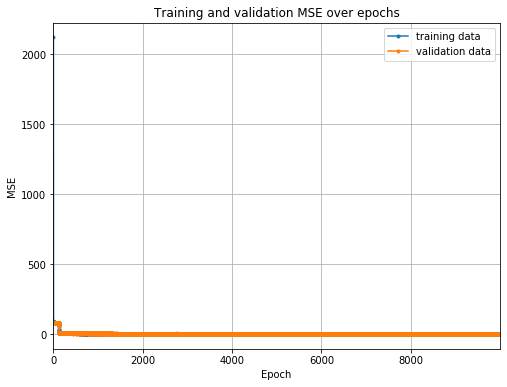

In [122]:
fig, ax = plt.subplots(figsize=(8,6))
result.plot(y=['loss', 'val_loss'], marker='.', ax=ax)
ax.set_xlabel('Epoch')
ax.set_ylabel('MSE')
ax.set_title('Training and validation MSE over epochs')
ax.legend(['training data', 'validation data'])
ax.grid()
fig.savefig('Training and validation MSE over epochs')

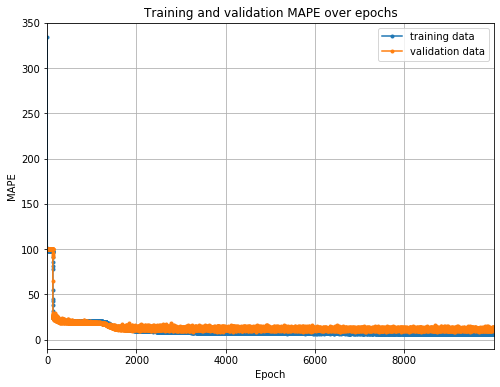

In [123]:
fig, ax = plt.subplots(figsize=(8,6))
result.plot(y=['mape', 'val_mape'], marker='.', ax=ax)
ax.set_xlabel('Epoch')
ax.set_ylabel('MAPE')
ax.set_title('Training and validation MAPE over epochs')
ax.legend(['training data', 'validation data'])
ax.grid()
fig.savefig('Training and validation MAPE over epochs')

In [124]:
train_loss = model.evaluate(x_train, y_train, verbose=0)[0]
train_mape = model.evaluate(x_train, y_train, verbose=0)[1]
#train_mse = model.evaluate(x_train, y_train, verbose=0)[2]
print('training loss (MSE):', train_loss, '\ntraining MAPE:', train_mape, '%\n')
#print('training MSE (custom):', train_mse, '\n')

val_loss = model.evaluate(x_val, y_val, verbose=0)[0]
val_mape = model.evaluate(x_val, y_val, verbose=0)[1]
#val_mse = model.evaluate(x_val, y_val, verbose=0)[2]
print('validation loss (MSE):', val_loss, '\nvalidation MAPE:', val_mape, '%\n')
#print('validation MSE (custom):', val_mse, '\n')

test_loss = model.evaluate(x_test, y_test, verbose=0)[0]
test_mape = model.evaluate(x_test, y_test, verbose=0)[1]
#test_mse = model.evaluate(x_test, y_test, verbose=0)[2]
print('test loss (MSE):', test_loss, '\ntest MAPE:', test_mape, '%')
#print('test MSE (custom):', test_mse, '\n')

training loss (MSE): 1.214225368840354 
training MAPE: 10.168003 %

validation loss (MSE): 1.3400313143144573 
validation MAPE: 11.05364 %

test loss (MSE): 1.2714213145406623 
test MAPE: 9.966177 %


### 3.5. Saving the Yield Prediction model

In [20]:
model.save('G6_yield_prediction_model.h5')